## LABORATORIO 2 - GRUPO 6
# CIUDADANIA DIGITAL
> La ciudadanía digital es el espacio donde es posible aprender, certificarse y entrar en contacto con otras personas interesadas en transformar digital y productivamente sus vidas.
### INTEGRANTES DEL EQUIPO
* MARIA PAULA MOGOLLON
* SERGIO NICOLAS QUINTERO
* LIDA VIVIANA PINEDA


> Para el ejercio vamos a utilizar la fuente de ***gov.co*** que se llama *Ciudadania Digital*
> Enlace: https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/Ciudadan-a-Digital/g4cd-bvpd/about_data

In [1]:
# Importar librerias
import os
import altair as alt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc
import warnings
import sqlite3



<pre>Se realiza la generación del data set para _Ciudadania Digital_ para iniciar la validación de la información</pre>

In [2]:
try:
    # Leer el archivo CSV ubicado en la ruta especificada y asigna los datos a la variable df_resultados
    df_Ciudadania_digital = pd.read_csv('C:/Users/User/Documents/ejercicios python/Laboratorio2/data/Ciudadan_a_Digital_20240418.csv')

    # Si la lectura del archivo es exitosa, imprime un mensaje indicando que el dataset se cargó correctamente
    print("El dataset se cargó exitosamente.")

# Si se produce un error específico de "FileNotFoundError" (archivo no encontrado), ejecuta este bloque de código
except FileNotFoundError as e:
    
    # Imprime un mensaje de error personalizado indicando que el archivo no se pudo encontrar, junto con los detalles específicos del error
    print(f"Error: El archivo no se pudo encontrar. Detalles: {e}")

# Si se produce cualquier otro tipo de error, ejecuta este bloque de código
except Exception as e:
    
    # Imprime un mensaje de error genérico indicando que ocurrió un error inesperado, junto con los detalles específicos del error
    print(f"Error inesperado: {e}")

C:\Users\User\AppData\Local\Temp\ipykernel_7304\2562203358.py:3: DtypeWarning: Columns (3,7,8,20,26,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Ciudadania_digital = pd.read_csv('C:/Users/User/Documents/ejercicios python/Laboratorio2/data/Ciudadan_a_Digital_20240418.csv')


El dataset se cargó exitosamente.


* Se detecta durante la lectura del archivo, que existen 6 columnas que tienen datos mixtos, las cuales se deben ajustar

In [3]:
#Consulta y creación de data set, para validar cantidad de columnas y datos a trabajar
# Se crea un DataFrame nuevo, utilizando los datos existentes del dataset
df_Ciudadania_digital = pd.DataFrame(df_Ciudadania_digital)

# Consulta y validación de la cantidad de filas y columnas del dataframe
num_rows, num_cols = df_Ciudadania_digital.shape

# Imprimir mensaje y valores de salidas del dataframe
print(f'El DataFrame, tiene {num_rows} filas y {num_cols} columnas.')

El DataFrame, tiene 1058349 filas y 49 columnas.


In [4]:
#se realiza la revisiòn de 10 registros aleatorios para validar lo de las primeras columnas identificadas
df_Ciudadania_digital.sample(10)

,TIPO DE DOCUMENTO,DOCUMENTO,NOMBRES,APELLIDOS,EMAIL,CELULAR,TELEFONO,DEPARTAMENTO NACIMIENTO,CIUDAD DE NACIMIENTO,DEPARTAME_NOMBRE,...,VIRTUAL,ID INDICADOR,FechaCorte,FECHA VIGENCIA,META,INVERSION,MUNICIPIO_COD,DEPARTAME_COD,CODIGO DEPARTAMENTO NACIMIENTO,CODIGO MUNICIPIO NACIMIENTO
161881,Cedula de Ciudadania,False,EMIYOLENI,CASTA�O,False,False,False,NaN,NaN,Caquet�,...,0,3987,2012-12-31,2012-12-31,1000,",00",18150,NaN,NaN,NaN
335229,Cedula de Ciudadania,False,EDUAR ANDRES,GONZALEZ MONJE,False,False,False,NaN,NaN,Huila,...,0,3987,2013-12-31,2013-12-31,1000,",00",73268,NaN,NaN,NaN
683976,CC,False,SERGIO,REBOLLEDO,False,False,False,ATLANTICO,BARRANQUILLA,ATLANTICO,...,0,4783,2017-12-31,2017-12-31,432000,NaN,8001,NaN,NaN,NaN
1058124,Cedula de Ciudadania,False,DANIEL OSWALDO,NaN,False,False,False,NaN,NaN,Huila,...,0,3987,2013-12-31,2013-12-31,1000,",00",41001,NaN,NaN,NaN
794256,Cedula de Ciudadania,False,Gustavo,Silva Ramirez,False,False,False,NaN,NaN,Atl�ntico,...,0,3987,2013-12-31,2013-12-31,1000,",00",8001,NaN,NaN,NaN
999495,Cedula de Ciudadania,False,Luz Nayibe,NaN,False,False,False,NaN,NaN,Guaviare,...,0,3987,2013-12-31,2013-12-31,1000,",00",5045,NaN,NaN,NaN
168623,C�dula de Ciudadan�a,False,ORLIS ORLANDO,CASTILLO TENORIO,False,False,False,NaN,NaN,VALLE DEL CAUCA,...,0,3987,2011-12-31,2011-12-31,1000,",00",76001,NaN,NaN,NaN
969191,Cedula de Ciudadania,False,Angie Paola,NaN,False,False,False,NaN,NaN,C�rdoba,...,0,3987,2013-12-31,2013-12-31,1000,",00",23001,NaN,NaN,NaN
617500,Cedula de Ciudadania,False,Walter,Pearson,False,False,False,NaN,NaN,Cesar,...,0,3987,2012-12-31,2012-12-31,1000,",00",20001,NaN,NaN,NaN
549052,TI,False,MARIA JOSE,NARVAEZ ORELLANO,False,False,False,NaN,NaN,MAGDALENA,...,5,6632,2019-12-31,2019-12-31,0,",00",47001,NaN,NaN,NaN


In [4]:
#se realiza listado de las columnas, para identificar columnas a utilizar dentro del analisis
df_Ciudadania_digital.columns

Index(['TIPO DE DOCUMENTO', 'DOCUMENTO', 'NOMBRES', 'APELLIDOS', 'EMAIL',
       'CELULAR', 'TELEFONO', 'DEPARTAMENTO NACIMIENTO',
       'CIUDAD DE NACIMIENTO', 'DEPARTAME_NOMBRE', 'MUNICIPIO_NOMBRE',
       'DIRECCION', 'NIVEL EDUCATIVO', 'SECTOR', 'ESTRATO',
       'FECHA DE NACIMIENTO', 'EDAD', 'EDAD 2', 'GENERO', 'DISCAPACIDAD',
       'ALIADO', 'SECTOR ECONOMICO', 'OCUPACION', 'FECHA DE REGISTRO',
       'COMUNIDAD ETNICA', 'F TICS', 'DINAMIZADOR', 'POBREZA',
       'CABEZA DE HOGAR', 'VICTIMA DE VIOLENCIA', 'VICTIMA INVIERNO', 'LGBTI',
       'VIVIENDA FRONTERIZA', 'SITUACION DE CALLE', 'DESPLAZADO',
       'DESMOVILIZADO REINSERTADO', 'CERTIFICACIONES', 'TIPO', 'PRESENCIAL',
       'VIRTUAL', 'ID INDICADOR', 'FechaCorte', 'FECHA VIGENCIA', 'META',
       'INVERSION', 'MUNICIPIO_COD', 'DEPARTAME_COD',
       'CODIGO DEPARTAMENTO NACIMIENTO', 'CODIGO MUNICIPIO NACIMIENTO'],
      dtype='object')

* Se realiza una primera validación de información detectando que los siguientes campos no tienen información
  * EDAD 2
  * DEPARTAMENTO CODE
  * CODIGO DEPARTAMENTO NACIMIENTO
  * CODIGO MUNICIPIO DEPARTAMENTO
* Se identifica que hay nombres y apellido de personas, por normas de seguridad información se eliminara esta informaciòn

In [5]:
## revisión información general del conjunto de datos
df_Ciudadania_digital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058349 entries, 0 to 1058348
Data columns (total 49 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   TIPO DE DOCUMENTO               1058349 non-null  object 
 1   DOCUMENTO                       1058349 non-null  bool   
 2   NOMBRES                         1058345 non-null  object 
 3   APELLIDOS                       900200 non-null   object 
 4   EMAIL                           1058349 non-null  bool   
 5   CELULAR                         1058349 non-null  bool   
 6   TELEFONO                        1058349 non-null  bool   
 7   DEPARTAMENTO NACIMIENTO         285403 non-null   object 
 8   CIUDAD DE NACIMIENTO            285403 non-null   object 
 9   DEPARTAME_NOMBRE                853583 non-null   object 
 10  MUNICIPIO_NOMBRE                1031684 non-null  object 
 11  DIRECCION                       1058349 non-null  bool   
 12  

In [6]:
#validar las variables, y si pueden ser leidas por python
df_Ciudadania_digital.describe()

,EDAD 2,F TICS,POBREZA,CABEZA DE HOGAR,VICTIMA DE VIOLENCIA,VICTIMA INVIERNO,LGBTI,VIVIENDA FRONTERIZA,SITUACION DE CALLE,DESPLAZADO,DESMOVILIZADO REINSERTADO,PRESENCIAL,VIRTUAL,ID INDICADOR,META,MUNICIPIO_COD,DEPARTAME_COD,CODIGO DEPARTAMENTO NACIMIENTO,CODIGO MUNICIPIO NACIMIENTO
count,0.0,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,1.058349e+06,0.0,0.0,0.0
mean,NaN,1.782966e-02,8.803334e-03,7.862435e-02,5.573776e-03,8.163659e-04,1.703597e-03,2.271462e-03,2.579489e-04,6.293765e-03,2.532246e-04,9.694156e-02,4.983876e-01,4.324643e+03,1.093549e+05,4.011796e+04,NaN,NaN,NaN
std,NaN,1.323321e-01,9.341223e-02,2.691517e-01,7.444941e-02,2.856047e-02,4.123950e-02,4.760572e-02,1.605872e-02,7.908324e-02,1.591102e-02,2.958783e-01,1.905893e+00,6.185810e+02,1.857382e+05,2.820074e+04,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.987000e+03,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.987000e+03,1.000000e+03,1.300100e+04,NaN,NaN,NaN
50%,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.987000e+03,1.000000e+03,2.781000e+04,NaN,NaN,NaN
75%,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.783000e+03,6.200000e+04,6.800100e+04,NaN,NaN,NaN
max,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.400000e+01,6.632000e+03,4.320000e+05,9.977300e+04,NaN,NaN,NaN


In [7]:
# Descripción estadística de las variables numéricas sin notación científica

# Se configura la forma en que los números flotantes se muestran al imprimir un DataFrame en pandas.
    # Se define función lambda que toma un número x y devuelve ese número formateado con 1 decimal.

pd.set_option('display.float_format', lambda x: '%.1f' % x)

df_Ciudadania_digital.describe()

,EDAD 2,F TICS,POBREZA,CABEZA DE HOGAR,VICTIMA DE VIOLENCIA,VICTIMA INVIERNO,LGBTI,VIVIENDA FRONTERIZA,SITUACION DE CALLE,DESPLAZADO,DESMOVILIZADO REINSERTADO,PRESENCIAL,VIRTUAL,ID INDICADOR,META,MUNICIPIO_COD,DEPARTAME_COD,CODIGO DEPARTAMENTO NACIMIENTO,CODIGO MUNICIPIO NACIMIENTO
count,0.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,0.0,0.0,0.0
mean,NaN,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.5,4324.6,109354.9,40118.0,NaN,NaN,NaN
std,NaN,0.1,0.1,0.3,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.3,1.9,618.6,185738.2,28200.7,NaN,NaN,NaN
min,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3987.0,0.0,0.0,NaN,NaN,NaN
25%,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3987.0,1000.0,13001.0,NaN,NaN,NaN
50%,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3987.0,1000.0,27810.0,NaN,NaN,NaN
75%,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4783.0,62000.0,68001.0,NaN,NaN,NaN
max,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,34.0,6632.0,432000.0,99773.0,NaN,NaN,NaN


In [8]:
# Descripción de las variables categóricas

df_Ciudadania_digital.describe(include = ['object'])

,TIPO DE DOCUMENTO,NOMBRES,APELLIDOS,DEPARTAMENTO NACIMIENTO,CIUDAD DE NACIMIENTO,DEPARTAME_NOMBRE,MUNICIPIO_NOMBRE,NIVEL EDUCATIVO,SECTOR,ESTRATO,...,ALIADO,SECTOR ECONOMICO,OCUPACION,FECHA DE REGISTRO,COMUNIDAD ETNICA,DINAMIZADOR,TIPO,FechaCorte,FECHA VIGENCIA,INVERSION
count,1058349,1058345,900200,285403,285403,853583,1031684,1058349,517441,1058349,...,262994,445678,681592,326544,546042,212957,62521,1058349,1058349,795356
unique,13,359937,438148,35,1010,75,1505,13,7,8,...,271,1864,6266,937,21,120,3,8,8,7
top,Cedula de Ciudadania,JUAN CARLOS,RODRIGUEZ,BOGOTA D. C.,BOGOTA D.C.,Antioquia,BOGOT� D.C.,No registra,Urbano,PENDIENTE CLASIFICAR,...,Computadores para Educar,No registra,Docente,2017-11-24 00:00:00.0000000,Ninguno,DIEGO FERNANDO CHAPARRO AYALA,VIRTUAL,2013-12-31,2013-12-31,",00"
freq,517457,3279,1966,87557,91891,50056,67351,520335,447115,523664,...,129188,174594,197023,30803,489905,68576,29483,365941,365941,795350


In [9]:
# Identificar valores únicos por  de Ciudadano Digital
print("\n Valores únicos por columna:")
for column in df_Ciudadania_digital.columns:
    unique_values = df_Ciudadania_digital[column].unique()
    print(f"\n{column} ({len(unique_values)} valores únicos):\n{unique_values[:10]}")
    if len(unique_values) > 10:
        print("....")


 Valores únicos por columna:

TIPO DE DOCUMENTO (13 valores únicos):
['Cedula de Ciudadania' 'CC' 'C�dula de Ciudadan�a' 'TI'
 'Tarjeta de Identidad' 'Cedula de ciudadani�a' 'C�dula de ciudadan�a'
 'NUIP' 'PA' 'C�dula de Extranjer�a']
....

DOCUMENTO (1 valores únicos):
[False]

NOMBRES (359938 valores únicos):
['FERNANDEZ DE' 'CLEMENCIA INES' 'MARIA SULAY' 'MARIA DEL ROSARIO'
 'CAROLINA' 'SAMMY NATALIA' 'fredygarcia' 'EIDER ENRRIQUE' 'Jose Rodrigo'
 nan]
....

APELLIDOS (438149 valores únicos):
['0' '0LAYA REYES' '0RTEGA ORTIZ' '0SPINO PE�ATE' '0SSA' '1006456908'
 '11221617' '1143127905' '12114971' '2']
....

EMAIL (1 valores únicos):
[False]

CELULAR (2 valores únicos):
[False  True]

TELEFONO (2 valores únicos):
[False  True]

DEPARTAMENTO NACIMIENTO (36 valores únicos):
[nan 'BOYACA' 'VALLE DEL CAUCA' 'TOLIMA' 'LA GUAJIRA' 'MAGDALENA'
 'BOGOTA D. C.' 'CESAR' 'CUNDINAMARCA' '-']
....

CIUDAD DE NACIMIENTO (1011 valores únicos):
[nan 'PUERTO BOYACA' 'CALI' 'IBAGUE' 'RIOHACHA' 'SANTA

> Se realiza la eliminaciòn de apellidos y nombre

In [10]:
# Eliminar una columna por su Apellidos 
df_Ciudadania_digital = df_Ciudadania_digital.drop(columns=['NOMBRES'])
print("\nDataFrame después de eliminar la columna 'NOMBRES':")


DataFrame después de eliminar la columna 'NOMBRES':


In [11]:
# Eliminar una columna por su Apellidos 
df_Ciudadania_digital = df_Ciudadania_digital.drop(columns=['APELLIDOS'])
print("\nDataFrame después de eliminar la columna 'APELLIDOS':")



DataFrame después de eliminar la columna 'APELLIDOS':


> Se realiza la eliminación de EDAD 2

In [12]:
# Eliminar una columna por su EDAD 2
df_Ciudadania_digital = df_Ciudadania_digital.drop(columns=['EDAD 2'])
print("\nDataFrame después de eliminar la columna 'EDAD 2':")


DataFrame después de eliminar la columna 'EDAD 2':


> se realiza la eliminacion de DEPARTAMENTO_CODE

In [13]:
# Eliminar una columna por su DEPARTAMENTO_CODE
df_Ciudadania_digital = df_Ciudadania_digital.drop(columns=['DEPARTAME_COD'])
print("\nDataFrame después de eliminar la columna 'DEPARTAME_COD':")


DataFrame después de eliminar la columna 'DEPARTAME_COD':


> SE REALIZA LA ELIMINACIÒN DE DEPARTAMENTO NACIMIENTO

In [14]:
# Eliminar una columna por su CODIGO DEPARTAMENTO NACIMIENTO
df_Ciudadania_digital = df_Ciudadania_digital.drop(columns=['CODIGO DEPARTAMENTO NACIMIENTO'])
print("\nDataFrame después de eliminar la columna 'CODIGO DEPARTAMENTO NACIMIENTO':")


DataFrame después de eliminar la columna 'CODIGO DEPARTAMENTO NACIMIENTO':


> SE REALIZA LA ELIMINACIÒN DE CODIOG DE DEPARTAMENTO NACIMIENTO

In [15]:
df_Ciudadania_digital['COMUNIDAD ETNICA'].unique().tolist()


DataFrame después de eliminar la columna 'CODIGO MUNICIPIO NACIMIENTO':


> SE REALIZA LA REVISIÓN DE COMO QUEDARON LOS DATOS NUMERICOS LUEGO DE ELIMINAR LOS VACIOS

In [16]:
#Se realiza revisiòn estadistica de datos resultantes
pd.set_option('display.float_format', lambda x: '%.1f' % x)

df_Ciudadania_digital.describe()

,F TICS,POBREZA,CABEZA DE HOGAR,VICTIMA DE VIOLENCIA,VICTIMA INVIERNO,LGBTI,VIVIENDA FRONTERIZA,SITUACION DE CALLE,DESPLAZADO,DESMOVILIZADO REINSERTADO,PRESENCIAL,VIRTUAL,ID INDICADOR,META,MUNICIPIO_COD
count,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0,1058349.0
mean,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.5,4324.6,109354.9,40118.0
std,0.1,0.1,0.3,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.3,1.9,618.6,185738.2,28200.7
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3987.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3987.0,1000.0,13001.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3987.0,1000.0,27810.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4783.0,62000.0,68001.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,34.0,6632.0,432000.0,99773.0


> Realizamos diagrama de bigotes, y observamos que no es diciente la informaciòn, por lo que se decide, apra estos casos realizar diagrama de barras o torta dependiendo el caso

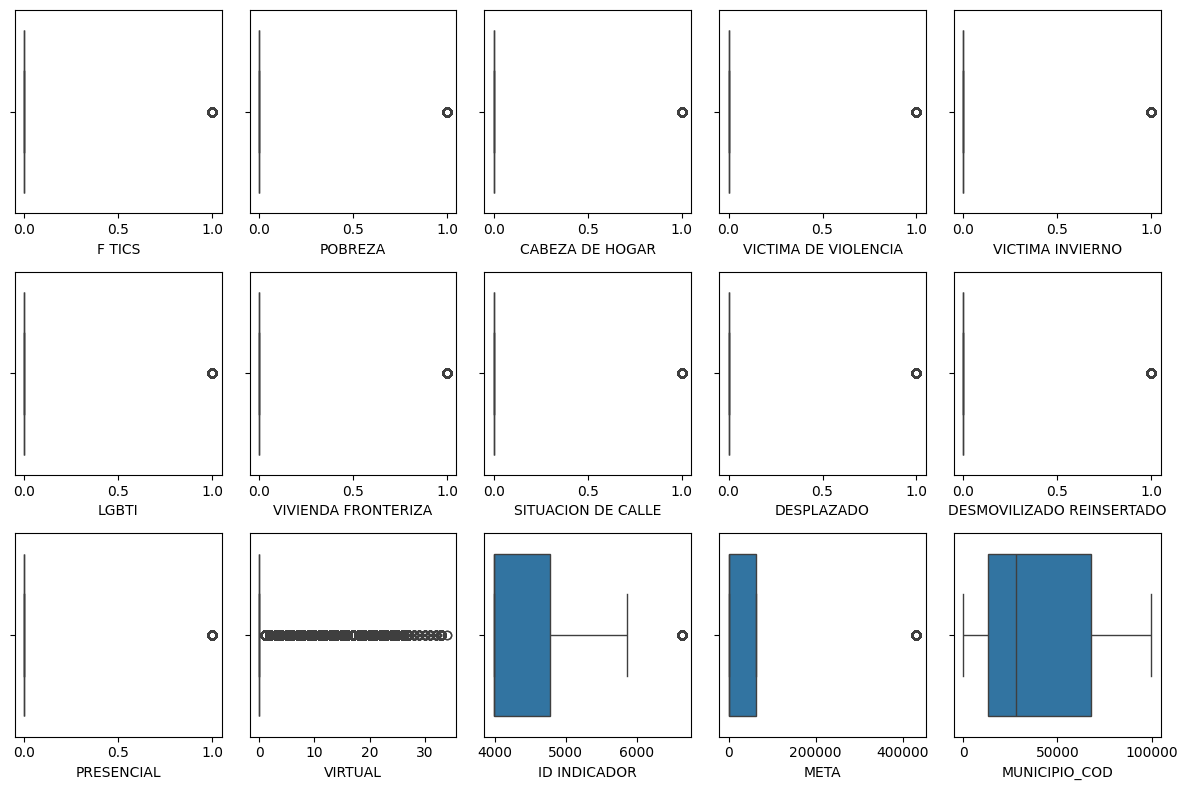

In [17]:
# Identificar valores atípicos en las variables numéricas
numeric_cols = df_Ciudadania_digital.select_dtypes(include=['float','int64']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(data = df_Ciudadania_digital, x = col)

plt.tight_layout()
plt.show()

> Se revisan los datos faltantes para cada una de las variables, con el fin de seguir definiendo los filtros

In [18]:
# Análisis de valores faltantes por columna
datos_faltes = df_Ciudadania_digital.isnull().sum()
porcentajes_faltantes = (df_Ciudadania_digital.isnull().sum()/len(df_Ciudadania_digital))*100

faltantes_df = pd.DataFrame({
    'Valores faltes' : datos_faltes,
    'Porcentaje (%)': porcentajes_faltantes            
})

# Ordenar de manera descendente por porcentaje de valores faltantes
faltantes_df = faltantes_df.sort_values(by = 'Porcentaje (%)', ascending=False)
faltantes_df

,Valores faltes,Porcentaje (%)
TIPO,995828,94.1
DINAMIZADOR,845392,79.9
ALIADO,795355,75.2
DEPARTAMENTO NACIMIENTO,772946,73.0
CIUDAD DE NACIMIENTO,772946,73.0
FECHA DE REGISTRO,731805,69.1
SECTOR ECONOMICO,612671,57.9
EDAD,580971,54.9
FECHA DE NACIMIENTO,556002,52.5
SECTOR,540908,51.1


# LIMPIEZA DE LOS CAMPOS

> Limpieza del campo del tipo de documento

In [19]:
df_Ciudadania_digital['TIPO DE DOCUMENTO'].value_counts()

TIPO DE DOCUMENTO
Cedula de Ciudadania     517457
CC                       254270
C�dula de Ciudadan�a     162776
Tarjeta de Identidad      48787
TI                        48343
Cedula de ciudadani�a     22409
NUIP                       1838
C�dula de ciudadan�a       1728
PA                          296
NIT                         163
No registra                 153
C�dula de Extranjer�a        85
CE                           44
Name: count, dtype: int64

> Transformación de los datos


In [21]:
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
        'Cedula de Ciudadania'      : 'CC',
        'CC'                         : 'CC',
        'C�dula de Ciudadan�a'      : 'CC',
        'Tarjeta de Identidad'     : 'TI',
        'TI'                       : 'TI',
        'Cedula de ciudadani�a'   : 'CC',
        'NUIP'                     : 'NUIP',
        'C�dula de ciudadan�a'    : 'CC',
        'PA'                       : 'PA',
        'NIT'                      : 'NIT',
        'No registra'              : 'NO_REGISTRA',
        'C�dula de Extranjer�a'   : 'CE',
        'CE'                       : 'CE'
}

# Implementar la función .replace
df_Ciudadania_digital['TIPO DE DOCUMENTO'].replace(replace_dict, inplace=True)
df_Ciudadania_digital['TIPO DE DOCUMENTO'].value_counts()

TIPO DE DOCUMENTO
CC             958640
TI              97130
NUIP             1838
PA                296
NIT               163
NO_REGISTRA       153
CE                129
Name: count, dtype: int64

> Grafico de barras para validar 

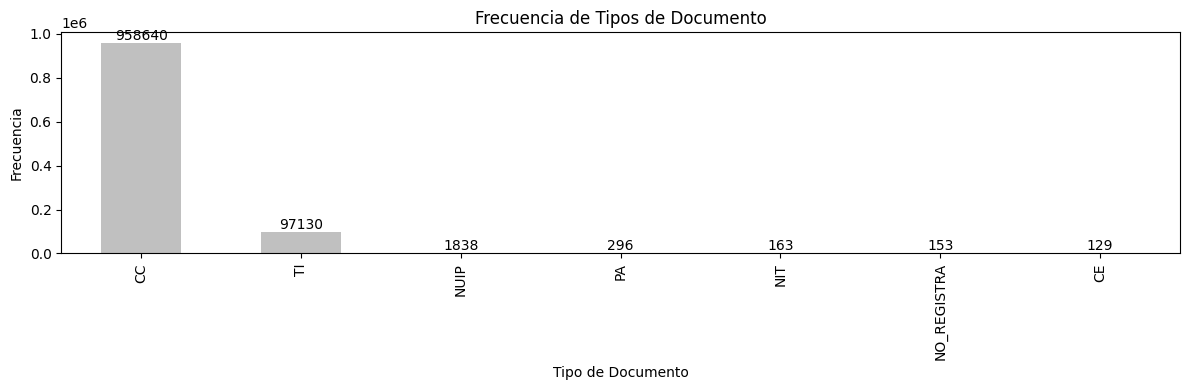

In [22]:
# Obtener valores únicos y su frecuencia en la columna 'ESTU_TIPODOCUMENTO'
tipo_documento_counts = df_Ciudadania_digital['TIPO DE DOCUMENTO'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(12, 4))
ax = tipo_documento_counts.plot(kind='bar', color='#C0C0C0')

# Añadir la cantidad en cada barra
for i, v in enumerate(tipo_documento_counts):
    ax.text(i, v + 1000, str(v), ha='center', va='bottom', fontsize=10)

# Títulos y etiquetas
plt.title('Frecuencia de Tipos de Documento')
plt.xlabel('Tipo de Documento')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

> VALIDACION DE SI LA PERSONA TIENE CELULAR

In [23]:
df_Ciudadania_digital['CELULAR'].value_counts()

CELULAR
False    1057934
True         415
Name: count, dtype: int64

> Creacion grafica

CELULAR
False    1057934
True         415
Name: count, dtype: int64


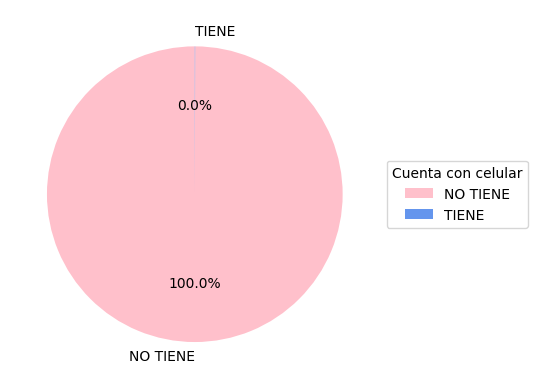

In [24]:
# Cantidad de registros por el tipo de genero

# generar conteo de registros por valor único en la columna ESTU_GENERO
df_celular = df_Ciudadania_digital['CELULAR'].value_counts()

# establecer etiquetas y colores
etiquetas = ['NO TIENE', 'TIENE']
colores = ['#FFC0CB','#6495ED']

# crear gráfico de torta
plt.pie(df_celular, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)

# agregar leyenda
plt.legend(title='Cuenta con celular', loc='center left', bbox_to_anchor=(1.0, 0.5))

# mostrar gráfico
plt.show

# imprimir resultados
print(df_celular)

> CUENTA CON TELEFNO

In [25]:
df_Ciudadania_digital['TELEFONO'].value_counts()

TELEFONO
False    1058242
True         107
Name: count, dtype: int64

TELEFONO
False    1058242
True         107
Name: count, dtype: int64


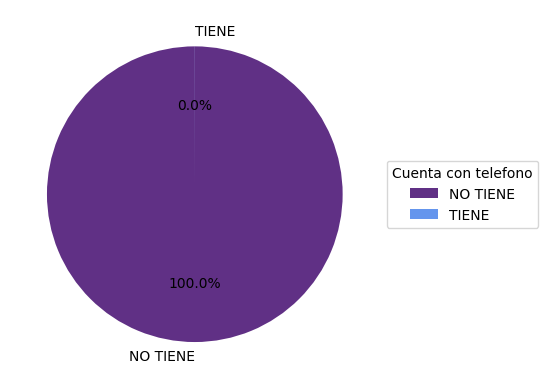

In [26]:
# Cantidad de registros por el tipo de genero

# generar conteo de registros por valor único en la columna ESTU_GENERO
df_telefono = df_Ciudadania_digital['TELEFONO'].value_counts()

# establecer etiquetas y colores
etiquetas = ['NO TIENE', 'TIENE']
colores = ['#603085','#6495ED']

# crear gráfico de torta
plt.pie(df_telefono, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)

# agregar leyenda
plt.legend(title='Cuenta con telefono', loc='center left', bbox_to_anchor=(1.0, 0.5))

# mostrar gráfico
plt.show

# imprimir resultados
print(df_telefono)

> DEPARTAMENTO DE NACIMIENTO

In [27]:
df_Ciudadania_digital['DEPARTAMENTO NACIMIENTO'].value_counts()

DEPARTAMENTO NACIMIENTO
BOGOTA D. C.                      87557
CUNDINAMARCA                      26749
-                                 22409
ANTIOQUIA                         17362
VALLE DEL CAUCA                   16537
TOLIMA                             8928
SANTANDER                          8924
NORTE DE SANTANDER                 8090
QUINDIO                            8001
BOYACA                             7680
RISARALDA                          7082
CORDOBA                            5912
BOLIVAR                            5644
HUILA                              5232
NARIÑO                             5177
CALDAS                             4882
CAUCA                              4827
MAGDALENA                          4745
CESAR                              4533
ATLANTICO                          4497
META                               3946
CHOCO                              3397
LA GUAJIRA                         3254
SUCRE                              2460
CASANARE        

> Se reemplaza el registro  -

In [28]:
# reemplazar valores "-"
df_Ciudadania_digital['DEPARTAMENTO NACIMIENTO'] = df_Ciudadania_digital['DEPARTAMENTO NACIMIENTO'].replace('-','NO TIENE')

# contar registros de la columna 'ESTU_GENERO'
df_Ciudadania_digital['DEPARTAMENTO NACIMIENTO'].value_counts()

DEPARTAMENTO NACIMIENTO
BOGOTA D. C.                      87557
CUNDINAMARCA                      26749
NO TIENE                          22418
ANTIOQUIA                         17362
VALLE DEL CAUCA                   16537
TOLIMA                             8928
SANTANDER                          8924
NORTE DE SANTANDER                 8090
QUINDIO                            8001
BOYACA                             7680
RISARALDA                          7082
CORDOBA                            5912
BOLIVAR                            5644
HUILA                              5232
NARIÑO                             5177
CALDAS                             4882
CAUCA                              4827
MAGDALENA                          4745
CESAR                              4533
ATLANTICO                          4497
META                               3946
CHOCO                              3397
LA GUAJIRA                         3254
SUCRE                              2460
CASANARE        

> Validación de ciudad de nacimiento

In [29]:
df_Ciudadania_digital['CIUDAD DE NACIMIENTO'].unique().tolist()

[nan,
 'PUERTO BOYACA',
 'CALI',
 'IBAGUE',
 'RIOHACHA',
 'SANTA MARTA',
 'BOGOTA D.C.',
 'BOSCONIA',
 'CHIA',
 'OBANDO',
 '-',
 'PALMIRA',
 'CARTAGO',
 'MANIZALES',
 'QUIBDO',
 'TURBO',
 'MEDELLIN',
 'ARMENIA',
 'ALGARROBO',
 'ALMAGUER',
 'CUCUTA',
 'BOJAYA',
 'AGUAZUL',
 'BUESACO',
 'LA MESA',
 'SAN PABLO',
 'VILLAVICENCIO',
 'SINCELEJO',
 'ARENAL',
 'SAN BENITO ABAD',
 'LA MACARENA',
 'CONTRATACION',
 'SANTA ROSALIA',
 'BUCARAMANGA',
 'PUEBLO NUEVO',
 'MONTERIA',
 'TUTA',
 'VIJES',
 'BARRANQUILLA',
 'PAIPA',
 'SEVILLA',
 'LERIDA',
 'MARMATO',
 'GUADALAJARA DE BUGA',
 'PUEBLORRICO',
 'PUERTO WILCHES',
 'ANDALUCIA',
 'ACACIAS',
 'FLORENCIA',
 'GUADUAS',
 'PAMPLONA',
 'MIRAFLORES',
 'SOACHA',
 'VALLEDUPAR',
 'TRINIDAD',
 'LA SALINA',
 'EL ROSAL',
 'ARAUCA',
 'GüICAN',
 'AGUA DE DIOS',
 'CHIQUINQUIRA',
 'MACHETA',
 'CHOCONTA',
 'TUNJA',
 'MONIQUIRA',
 'PAZ DE ARIPORO',
 'PRADERA',
 'LENGUAZAQUE',
 'VILLA DE SAN DIEGO DE UBATE',
 'CHACHAGüI',
 'SALDAÑA',
 'NEIVA',
 'GIRARDOT',
 'FACATATI

In [31]:
# Se realiza filtro y se organizan las ciudades
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
    'nan' :'No registra',
    'PUERTO BOYACA' : 'Puerto Boyaca',
    'CALI': 'Cali',
    'IBAGUE': 'Ibagu',
    'RIOHACHA': 'Riohacha',
    'SANTA MARTA': 'Santa Marta',
    'BOGOTA D.C.': 'Bogota D.C.',
    'BOSCONIA': 'Bosconia',
    'CHIA': 'Chia',
    'OBANDO': 'Obando',
    '-': 'No registra',
    'PALMIRA': 'Palmira',
    'CARTAGO': 'Cartago',
    'MANIZALES': 'Manizales',
    'QUIBDO': 'Quibdo',
    'TURBO': 'Turbo',
    'MEDELLIN': 'Medellin',
    'ARMENIA': 'Armenia',
    'ALGARROBO': 'Algarrobo',
    'ALMAGUER': 'Almaguer',
    'CUCUTA': 'Cucuta',
    'BOJAYA': 'Bojaya',
    'AGUAZUL': 'Aguazul',
    'BUESACO': 'Buesaco',
    'LA MESA': 'La Mesa',
    'SAN PABLO': 'San Pablo',
    'VILLAVICENCIO': 'Villavicencio',
    'SINCELEJO': 'Sincelejo',
    'ARENAL': 'Arenal',
    'SAN BENITO ABAD': 'San Benito Abad',
    'LA MACARENA': 'La Macarena',
    'CONTRATACION': 'Contratacion',
    'SANTA ROSALIA': 'Santa Rosalia',
    'BUCARAMANGA': 'Bucaramanga',
    'PUEBLO NUEVO': 'Pueblo Nuevo',
    'MONTERIA': 'Monteria',
    'TUTA': 'Tuta',
    'VIJES': 'Vijes',
    'BARRANQUILLA': 'Barranquilla',
    'PAIPA': 'Paipa',
    'SEVILLA': 'Sevilla',
    'LERIDA': 'Lerida',
    'MARMATO': 'Marmato',
    'GUADALAJARA DE BUGA': 'Guadalajara de Buga',
    'PUEBLORRICO': 'Pueblorrico',
    'PUERTO WILCHES': 'Puerto Wilches',
    'ANDALUCIA': 'Andalucia',
    'ACACIAS': 'Acacias',
    'FLORENCIA': 'Florencia',
    'GUADUAS': 'Guaduas',
    'PAMPLONA': 'Pamplona',
    'MIRAFLORES': 'Miraflores',
    'SOACHA': 'Soacha',
    'VALLEDUPAR': 'Valledupar',
    'TRINIDAD': 'Trinidad',
    'LA SALINA': 'La Salina',
    'EL ROSAL': 'El Rosal',
    'ARAUCA': 'Arauca',
    'GüICAN': 'Guican',
    'AGUA DE DIOS': 'Agua de Dios',
    'CHIQUINQUIRA': 'Chiquinquirá',
    'MACHETA': 'Macheta',
    'CHOCONTA': 'Choconta',
    'TUNJA': 'Tunja',
    'MONIQUIRA': 'Moniquira',
    'PAZ DE ARIPORO': 'Paz de Ariporo',
    'PRADERA': 'Pradera',
    'LENGUAZAQUE': 'Lenguazaque',
    'VILLA DE SAN DIEGO DE UBATE': 'Villa de San Diego de Ubate',
    'CHACHAGüI': 'Chachagui',
    'SALDAÑA': 'Saldana',
    'NEIVA': 'Neiva',
    'GIRARDOT': 'Girardot',
    'FACATATIVA': 'Facatativa',
    'NEMOCON': 'Nemocon',
    'PALESTINA': 'Palestina',
    'PEREIRA': 'Pereira',
    'SOCORRO': 'Socorro',
    'CARTAGENA': 'Cartagena',
    'MELGAR': 'Melgar',
    'DUITAMA': 'Duitama',
    'SUPATA': 'Supata',
    'SOGAMOSO': 'Sogamoso',
    'NOBSA': 'Nobsa',
    'YOPAL': 'Yopal',
    'FLORIDABLANCA': 'Floridablanca',
    'TASCO': 'Tasco',
    'SAN BERNARDO': 'San Bernardo',
    'PORE': 'Pore',
    'SILVANIA': 'Silvania',
    'BARRANCABERMEJA': 'Barrancabermeja',
    'VENADILLO': 'Venadillo',
    'CEPITA': 'Cepita',
    'MALAGA': 'Malaga',
    'ROLDANILLO': 'Roldanillo',
    'FILANDIA': 'Filandia',
    'ARBOLEDAS': 'Arboledas',
    'CHINAVITA': 'Chinavita',
    'VALDIVIA': 'Valdivia',
    'SAN ANTONIO': 'San Antonio',
    'SAMPUES': 'Sampues',
    'BELEN DE BAJIRA': 'Belen de Bajira',
    'ANSERMANUEVO': 'Ansermanuevo',
    'BUENAVENTURA': 'Buenaventura',
    'JAMUNDI': 'Jamundi',
    'ZARAGOZA': 'Zaragoza',
    'TARAZA': 'Taraza',
    'CAPITANEJO': 'Capitanejo',
    'SAN MIGUEL DE SEMA': 'San Miguel de Sema',
    'EL LITORAL DEL SAN JUAN': 'El Litoral del San Juan',
    'ANDES': 'Andes',
    'ASTREA': 'Astrea',
    'TULUA': 'Tulua',
    'AQUITANIA': 'Aquitania',
    'PEQUE': 'Peque',
    'EL ZULIA': 'El Zulia',
    'TIBU': 'Tibu',
    'YARUMAL': 'Yarumal',
    'ANGOSTURA': 'Angostura',
    'SANTA ROSA DE VITERBO': 'Santa Rosa de Viterbo',
    'LA VICTORIA': 'La Victoria',
    'AGUACHICA': 'Aguachica',
    'ATRATO': 'Atrato',
    'ITAGUI': 'Itagui',
    'ATACO': 'Ataco',
    'YOLOMBO': 'Yolombo',
    'SAN ALBERTO': 'San Alberto',
    'CUASPUD': 'Cuaspud',
    'MAGUI': 'Magui',
    'PUERTO GAITAN': 'Puerto Gaitan',
    'GUARNE': 'Guarne',
    'SALAZAR': 'Salazar',
    'SANTA ROSA DEL SUR': 'Santa Rosa del Sur',
    'ICONONZO': 'Icononzo',
    'TAME': 'Tame',
    'MOMIL': 'Momil',
    'QUIMBAYA': 'Quimbaya',
    'BOLIVAR': 'Bolivar',
    'ACHI': 'Achi',
    'PINCHOTE': 'Pinchote',
    'VEGACHI': 'Vegachi',
    'MOSQUERA' :'Mosquera',
    'POPAYAN': 'Popayan',
    'CONCORDIA': 'Concordia',
    'ARACATACA': 'Aracataca',
    'CALDAS': 'Caldas',
    'PEDRAZA': 'Pedraza',
    'ACEVEDO': 'Acevedo',
    'BARBOSA': 'Barbosa',
    'GAMEZA': 'Gameza',
    'AGUADAS': 'Aguadas',
    'ARMERO': 'Armero',
    'EL PIÑON': 'El Pinon',
    'PIEDECUESTA': 'Piedecuesta',
    'TAMESIS': 'Tamesis',
    'SANTUARIO': 'Santuario',
    'BARICHARA': 'Barichara',
    'FUSAGASUGA': 'Fusagasuga',
    'LA PLATA': 'La Plata',
    'NORCASIA': 'Norcasia',
    'CUCUTILLA': 'Cucutilla',
    'CAJICA': 'Cajica',
    'RAMIRIQUI': 'Ramiriqui',
    'SANTA HELENA DEL OPON': 'Santa Helena del Opon',
    'EL CARMEN DE BOLIVAR': 'El Carmen de Bolivar',
    'RECETOR': 'Recetor',
    'PASTO': 'Pasto',
    'PIENDAMO': 'Piendamo',
    'ARGELIA': 'Argelia',
    'TORIBIO': 'Toribio',
    'LA CUMBRE': 'La Cumbre',
    'PAEZ': 'Paez',
    'JURADO': 'Jurado',
    'LETICIA': 'Leticia',
    'AIPE': 'Aipe',
    'UTICA': 'Utica',
    'GUAMAL': 'Guamal',
    'GUACHETA': 'Guacheta',
    'MOCOA': 'Mocoa',
    'URIBIA' :'Uribia',
    'PURIFICACION': 'Purificacion',
    'CANDELARIA': 'Candelaria',
    'ORTEGA': 'Ortega',
    'PUERTO CARRENO': 'Puerto Carreno',
    'LIBANO': 'Libano',
    'SANTA ISABEL': 'Santa Isabel',
    'BOJACA': 'Bojaca',
    'EL BAGRE': 'El Bagre',
    'MURILLO': 'Murillo',
    'EL CERRITO': 'El Cerrito',
    'ABREGO': 'Abrego',
    'GACHETA': 'Gacheta',
    'MOLAGAVITA': 'Molagavita',
    'CHIRIGUANA': 'Chiriguana',
    'DOSQUEBRADAS': 'Dosquebradas',
    'SAN ANDRES DE SOTAVENTO': 'San Andres de Sotavento',
    'SAN LUIS': 'San Luis',
    'CHAPARRAL': 'Chaparral',
    'ESPINAL': 'Espinal',
    'EL DOVIO': 'El Dovio',
    'SAN PEDRO': 'San Pedro',
    'FUNDACION': 'Fundacion',
    'OCAÑA': 'Ocana',
    'MAGANGUE': 'Magangue',
    'ANCUYA': 'Ancuya',
    'BARRANCAS': 'Barrancas',
    'MADRID': 'Madrid',
    'TALAIGUA NUEVO': 'Talaigua Nuevo',
    'CACERES': 'Caceres',
    'VIOTA': 'Viota',
    'SAN JUAN DEL CESAR': 'San Juan del Cesar',
    'CHIMA': 'Chima',
    'SANTA BARBARA DE PINTO': 'Santa Barbara de Pinto',
    'EL RETEN': 'El Reten',
    'TELLO': 'Tello',
    'REMOLINO': 'Remolino',
    'SAHAGUN': 'Sahagun',
    'FUNZA': 'Funza',
    'PUERTO COLOMBIA': 'Puerto Colombia',
    'MEDINA': 'Medina',
    'CAUCASIA': 'Caucasia',
    'SALAMINA': 'Salamina',
    'ROVIRA': 'Rovira',
    'CIENEGA': 'Cienega',
    'ZONA BANANERA': 'Zona Bananera',
    'AMAGA': 'Amaga',
    'RONCESVALLES': 'Roncesvalles',
    'CUMBAL': 'Cumbal',
    'HACARI': 'Hacari',
    'SOPO': 'Sopo',
    'CICUCO': 'Cicuco',
    'SAN ANDRES 1': 'San Andres',
    'INIRIDA': 'Inirida',
    'SAN CARLOS': 'San Carlos',
    'CERETE': 'Cerete',
    'MAJAGUAL': 'Majagual',
    'FOSCA': 'Fosca',
    'SAN ONOFRE': 'San Onofre',
    'TOCA': 'Toca',
    'BOYACA': 'Boyaca',
    'CALAMAR': 'Calamar',
    'AYAPEL': 'Ayapel',
    'PUERTO LOPEZ': 'Puerto Lopez',
    'PIVIJAY': 'Pivijay',
    'ALGECIRAS': 'Algeciras',
    'CUMARAL': 'Cumaral',
    'GUAYABAL DE SIQUIMA': 'Guayabal de Siquima',
    'MOÑITOS': 'Monitos',
    'TENERIFE': 'Tenerife',
    'PALERMO': 'Palermo',
    'MAICAO': 'Maicao',
    'PANDI': 'Pandi',
    'SAN ZENON': 'San Zenon',
    'ULLOA': 'Ulloa',
    'PELAYA': 'Pelaya',
    'QUETAME': 'Quetame',
    'LORICA': 'Lorica',
    'CHALAN': 'Chalan',
    'LEGUIZAMO': 'Leguizamo',
    'SOLEDAD': 'Soledad',
    'CABRERA': 'Cabrera',
    'VILLANUEVA': 'Villanueva',
    'UBALA': 'Ubala',
    'PITALITO': 'Pitalito',
    'PIEDRAS': 'Piedras',
    'GUALMATAN': 'Gualmatan',
    'PEÑOL': 'Penol',
    'SUAN': 'Suan',
    'SUCRE': 'Sucre',
    'EL BANCO': 'El Banco',
    'SOATA': 'Soata',
    'SAN ANTONIO DEL TEQUENDAMA': 'San Antonio del Tequendama',
    'COPER': 'Coper',
    'SABANALARGA': 'Sabanalarga',
    'NECHI': 'Nechi',
    'NOCAIMA': 'Nocaima',
    'MERCADERES': 'Mercaderes',
    'SAN AGUSTIN': 'San Agustin',
    'PITAL': 'Pital',
    'EL CAIRO': 'El Cairo',
    'VIGIA DEL FUERTE': 'Vigia del Fuerte',
    'TADO': 'Tado',
    'SACAMA': 'Sacama',
    'ISTMINA': 'Istmina',
    'ALBAN': 'Alban',
    'BARANOA': 'Baranoa',
    'GUATICA': 'Guatica',
    'CONCEPCION': 'Concepcion',
    'BELEN': 'Belen',
    'ZAPATOCA': 'Zapatoca',
    'BALBOA': 'Balboa',
    'CHINU': 'Chinu',
    'BARAYA': 'Baraya',
    'ACANDI': 'Acandi',
    'CARTAGENA DEL CHAIRA': 'Cartagena del Chaira',
    'CONSACA': 'Consaca',
    'SIBUNDOY': 'Sibundoy',
    'SUAREZ': 'Suarez',
    'TIMBIO': 'Timbio',
    'YUMBO': 'Yumbo',
    'UNGUIA': 'Unguia',
    'LOPEZ': 'Lopez',
    'CONDOTO': 'Condoto',
    'SINCE': 'Since',
    'MONTELIBANO': 'Montelibano',
    'CAROLINA': 'Carolina',
    'COELLO': 'Coello',
    'CALIMA': 'Calima',
    'COLON': 'Colon',
    'CAICEDONIA': 'Caicedonia',
    'ARCABUCO': 'Arcabuco',
    'FREDONIA': 'Fredonia',
    'CORRALES': 'Corrales',
    'YALI': 'Yali',
    'CASABIANCA': 'Casabianca',
    'EL PEÑOL': 'El Penol',
    'ALEJANDRIA': 'Alejandria',
    'SANTA ROSA DE CABAL': 'Santa Rosa de Cabal',
    'BELALCAZAR': 'Belalcazar',
    'SAN JOSE DE LA MONTAÑA': 'San Jose de la Montana',
    'CIUDAD BOLIVAR': 'Ciudad Bolivar',
    'TOCAIMA': 'Tocaima',
    'LA VIRGINIA': 'La Virginia',
    'PACORA': 'Pacora',
    'ITUANGO': 'Ituango',
    'VALPARAISO': 'Valparaiso',
    'PARATEBUENO': 'Paratebueno',
    'EL CARMEN DE ATRATO': 'El Carmen de Atrato',
    'GUADALUPE': 'Guadalupe',
    'ARANZAZU': 'Aranzazu',
    'LOS PATIOS': 'Los Patios',
    'MARGARITA': 'Margarita',
    'ZARZAL': 'Zarzal',
    'ANSERMA': 'Anserma',
    'ALCALA': 'Alcala',
    'CACHIPAY': 'Cachipay',
    'SAN VICENTE': 'San Vicente',
    'CAMPO DE LA CRUZ': 'Campo de la Cruz',
    'AMALFI': 'Amalfi',
    'ARBELAEZ': 'Arbelaez',
    'ANORI': 'Anori',
    'BELEN DE UMBRIA': 'Belen de Umbria',
    'SOLANO': 'Solano',
    'CALARCA': 'Calarca',
    'LA CELIA': 'La Celia',
    'GALERAS': 'Galeras',
    'EL CALVARIO': 'El Calvario',
    'SAN JUAN DE RIO SECO': 'San Juan de Rio Seco',
    'NILO': 'Nilo',
    'RESTREPO': 'Restrepo',
    'VENECIA': 'Venecia',
    'BELLO': 'Bello',
    'ANZOATEGUI': 'Anzoategui',
    'PLANETA RICA': 'Planeta Rica',
    'ZAPAYAN': 'Zapayan',
    'APARTADO': 'Apartado',
    'VELEZ': 'Velez',
    'AMBALEMA': 'Ambalema',
    'PATIA': 'Patia',
    'ALBANIA': 'Albania',
    'PACOA': 'Pacoa',
    'SABANETA': 'Sabaneta',
    'EL DONCELLO': 'El Doncello',
    'ANAPOIMA': 'Anapoima',
    'SAN GIL': 'San Gil',
    'SAN BERNARDO DEL VIENTO': 'San Bernardo del Viento',
    'BAJO BAUDO': 'Bajo Baudo',
    'BAHIA SOLANO': 'Bahia Solano',
    'TAMALAMEQUE': 'Tamalameque',
    'CRAVO NORTE': 'Cravo Norte',
    'RIO IRO': 'Rio Iro',
    'ISNOS': 'Isnos',
    'EL PAUJIL': 'El Paujil',
    'CHISCAS': 'Chiscas',
    'SAN JOSE DE PARE': 'San Jose de Pare',
    'CARACOLI': 'Caracoli',
    'MEDIO SAN JUAN': 'Medio San Juan',
    'TURBACO': 'Turbaco',
    'DABEIBA': 'Dabeiba',
    'LANDAZURI': 'Landazuri',
    'PLATO': 'Plato',
    'VILLAGARZON': 'Villagarzon',
    'GRANADA': 'Granada',
    'EL CHARCO': 'El Charco',
    'CAJAMARCA': 'Cajamarca',
    'FRESNO': 'Fresno',
    'APIA': 'Apia',
    'HERVEO': 'Herveo',
    'RISARALDA': 'Risaralda',
    'MILAN': 'Milan',
    'GUAPI': 'Guapi',
    'ALVARADO': 'Alvarado',
    'CIENAGA': 'Cienaga',
    'GINEBRA': 'Ginebra',
    'FRONTINO': 'Frontino',
    'MORELIA': 'Morelia',
    'MARSELLA': 'Marsella',
    'ARJONA': 'Arjona',
    'URRAO': 'Urrao',
    'SESQUILE': 'Sesquile',
    'MANAURE': 'Manaure',
    'SUPIA': 'Supia',
    'BECERRIL': 'Becerril',
    'BUCARASICA': 'Bucarasica',
    'PUERTO TEJADA': 'Puerto Tejada',
    'LA CEJA': 'La Ceja',
    'MURINDO': 'Murindo',
    'BETULIA': 'Betulia',
    'EL TAMBO': 'El Tambo',
    'SANTA MARIA': 'Santa Maria',
    'TOLUVIEJO': 'Toluviejo',
    'PUERTO NARIÑO': 'Puerto Narino',
    'PACHO': 'Pacho',
    'LA APARTADA': 'La Apartada',
    'VALENCIA': 'Valencia',
    'FOMEQUE': 'Fomeque',
    'VENTAQUEMADA': 'Ventaquemada',
    'COYAIMA': 'Coyaima',
    'PLANADAS': 'Planadas',
    'BOCHALEMA': 'Bochalema',
    'MUZO': 'Muzo',
    'SAN LUIS DE GACENO': 'San Luis de Gaceno',
    'TAURAMENA': 'Tauramena',
    'CHINCHINA': 'Chinchina',
    'TUMACO': 'Tumaco',
    'SOLITA': 'Solita',
    'MUTATA': 'Mutata',
    'RIOSUCIO': 'Riosucio',
    'FONSECA': 'Fonseca',
    'SANTANDER DE QUILICHAO': 'Santander de Quilichao',
    'GRAMALOTE': 'Gramalote',
    'ENCINO': 'Encino',
    'SAN SEBASTIAN DE BUENAVISTA': 'San Sebastian de Buenavista',
    'ANGELOPOLIS': 'Angelopolis',
    'FLANDES' : 'Flandes',
    'GARZON' : 'Garzon',
    'SIMIJACA' : 'Simijaca',
    'VILLARRICA' : 'Villarrica',
    'SARAVENA' : 'Saravena',
    'SANTAFE DE ANTIOQUIA': 'Santafe de Antioquia',
    'RIONEGRO' : 'Rionegro',
    'LA PINTADA' : 'La Pintada',
    'DON MATIAS' : 'Don Matias',
    'GUATEQUE' : 'Guateque',
    'PUERTO SALGAR' : 'Puerto Salgar',
    'COTA' : 'Cota',
    'RIOBLANCO' : 'Rioblanco',
    'BARBACOAS' : 'Barbacoas',
    'ARAUQUITA' : 'Arauquita',
    'IPIALES' : 'Ipiales',
    'DAGUA' : 'Dagua',
    'FLORIDA' : 'Florida',
    'TIMBIQUI' : 'Timbiqui',
    'SAN RAFAEL' : 'San Rafael',
    'CORDOBA': 'Cordoba',
    'CHIPAQUE': 'Chipaque',
    'CHIGORODO': 'Chigorodo',
    'GUAMO': 'Guamo',
    'TIERRALTA': 'Tierralta',
    'NUEVA GRANADA': 'Nueva Granada',
    'VALLE DEL GUAMUEZ': 'Valle del Guamuez',
    'OVEJAS': 'Ovejas',
    'SANTA ANA': 'Santa Ana',
    'CARMEN DE APICALA': 'Carmen de Apicala',
    'SAN PABLO DE BORBUR': 'San Pablo de Borbur',
    'CHITARAQUE': 'Chitaraque',
    'ZIPAQUIRA': 'Zipaquira',
    'GARAGOA': 'Garoa',
    'SUTATENZA': 'Sutatenza',
    'SUESCA': 'Suesca',
    'SAN PELAYO': 'San Pelayo',
    'CIENAGA DE ORO': 'Cienaga de Oro',
    'PALMITO': 'Palmito',
    'SUSA': 'Susa',
    'ARIGUANI': 'Ariguani',
    'CANALETE': 'Canalete',
    'AGRADO': 'Agrado',
    'TIMANA': 'Timana',
    'GUASCA': 'Guasca',
    'LOS SANTOS': 'Los Santos',
    'VILLAGOMEZ': 'Villagomez',
    'PALOCABILDO': 'Palocabildo',
    'VERGARA': 'Vergara',
    'VILLETA': 'Villeta',
    'UMBITA': 'Umbita',
    'COROZAL': 'Corozal',
    'EL PASO': 'El Paso',
    'EL GUACAMAYO': 'El Guacamayo',
    'MOMPOS': 'Mompox',
    'CERRITO': 'Cerrito',
    'SIACHOQUE': 'Siachoque',
    'CARCASI': 'Carcasi',
    'RIOFRIO': 'Riofrio',
    'AGUSTIN CODAZZI': 'Agustin Codazzi',
    'SANTA ROSA': 'Santa Rosa',
    'CUNDAY': 'Cunday',
    'PURISIMA': 'Purisima',
    'PUERTO RONDON': 'Puerto Rondon',
    'MONTENEGRO': 'Montenegro',
    'LA UNION': 'La Union',
    'PROVIDENCIA': 'Providencia',
    'RONDON': 'Rondon',
    'TARQUI': 'Tarqui',
    'CERRO SAN ANTONIO': 'Cerro San Antonio',
    'RIO DE ORO': 'Rio de Oro',
    'CAMPOALEGRE': 'Campoalegre',
    'ARBOLETES': 'Arboletes',
    'SAN DIEGO' : 'San Diego',
    'SANTA BARBARA' : 'Santa Barbara',
    'LA DORADA' : 'La Dorada',
    'SAN MARTIN' : 'San Martin',
    'DISTRACCION' : 'Distraccion',
    'CUMARIBO' : 'Cumaribo',
    'CAPARRAPI' : 'Caparrapi',
    'SALADOBLANCO' : 'Saladoblanco',
    'GIGANTE' : 'Gigante',
    'LA PLAYA' : 'La Playa',
    'MARULANDA' : 'Marulanda',
    'SEGOVIA' : 'Segovia',
    'CHARALA' : 'Charala',
    'PUERTO LIBERTADOR' : 'Puerto Libertador',
    'EL TABLON DE GOMEZ' : 'El Tablon de Gomez',
    'LA PAZ' : 'La Paz',
    'ALTO BAUDO' : 'Alto Baudo',
    'VICTORIA': 'Victoria',
    'MARQUETALIA': 'Marquetalia',
    'ANOLAIMA': 'Anolaima',
    'SAN MARCOS': 'San Marcos',
    'MACARAVITA': 'Macaravita',
    'MORALES': 'Morales',
    'URUMITA': 'Urumita',
    'EL AGUILA': 'El Aguila',
    'QUINCHIA': 'Quinchia',
    'ARBOLEDA': 'Arboleda',
    'LA ARGENTINA': 'La Argentina',
    'LA PALMA': 'La Palma',
    'BAGADO': 'Bagado',
    'MARIQUITA': 'Mariquita',
    'GIRARDOTA': 'Girardota',
    'EL CARMEN DE VIBORAL': 'El Carmen de Viboral',
    'SUAITA': 'Suaita',
    'FILADELFIA': 'Filadelfia',
    'SAN BENITO': 'San Benito',
    'GAMBITA': 'Gambita',
    'SAN VICENTE DE CHUCURI': 'San Vicente de Chucuri',
    'CUMBITARA': 'Cumbitara',
    'PIJIÑO DEL CARMEN': 'Pijino del Carmen',
    'CURUMANI': 'Curumani',
    'CHIMICHAGUA': 'Chimichagua',
    'NEIRA': 'Neira',
    'CERINZA': 'Cerinza',
    'PIJAO': 'Pijao',
    'VILLAVIEJA': 'Villavieja',
    'DURANIA': 'Durania',
    'TEORAMA': 'Teorama',
    'YONDO': 'Yondo',
    'PUERTO NARE': 'Puerto Nare',
    'SANTA ROSA DE OSOS': 'Santa Rosa de Osos',
    'SAN CALIXTO': 'San Calixto',
    'PAZ DE RIO': 'Paz de Rio',
    'SOCHA': 'Socha',
    'SAN JOSE DEL GUAVIARE': 'San Jose del Guaviare',
    'LA PEÑA' : 'La Pena',
    'FALAN' : 'Falan',
    'CONFINES': 'Con fines',
    'CHOACHI': 'Choachi',
    'SAN SEBASTIAN': 'San Sebastian',
    'TESALIA': 'Tesalia',
    'UNION PANAMERICANA': 'Union Panamericana',
    'EL PLAYON': 'El Playon',
    'SANTIAGO DE TOLU': 'Santiago de Tolu',
    'OPORAPA': 'Oporapa',
    'MISTRATO': 'Mistrato',
    'LLORO': 'Lloro',
    'ALDANA' : 'Aldana',
    'SAN FRANCISCO' : 'San Francisco',
    'EL COPEY' : 'El Copey',
    'SAN VICENTE DEL CAGUAN': 'San Vicente del Caguan',
    'NARIÑO' : 'Narino',
    'LA PRIMAVERA' : 'La Primavera',
    'CONVENCION' : 'Convencion',
    'DIBULLA' : 'Dibulla',
    'PUEBLO BELLO': 'Pueblo Bello',
    'MOGOTES': 'Mogotes',
    'SAN MATEO': 'San Mateo',
    'SAN CAYETANO': 'San Cayetano',
    'PAILITAS': 'Pailitas',
    'CAQUEZA' : 'Caqueza',
    'PUERTO ESCONDIDO' : 'Puerto Escondido',
    'SUBACHOQUE' : 'Subachoque',
    'SILVIA' : 'Silvia',
    'MEDIO BAUDO' : 'Medio Baudo',
    'TABIO' : 'Tabio',
    'LEBRIJA' : 'Lebrija',
    'PUERTO ASIS' : 'Puerto Asis',
    'CIMITARRA' : 'Cimitarra',
    'BUENAVISTA' : 'Buenavista',
    'TONA': 'Tona',
    'SARDINATA': 'Sardinata',
    'IQUIRA': 'Iquira',
    'YACOPI': 'Yacopi',
    'BARRANCO MINAS': 'Barranco Minas',
    'CURITI': 'Curiti',
    'PANQUEBA': 'Panqueba',
    'EL ESPINO': 'El Espino',
    'SAMACA': 'Samaca',
    'RIO QUITO': 'Rio Quito',
    'BUGALAGRANDE': 'Bugalagrande',
    'NATAGAIMA': 'Natagaima',
    'SOMONDOCO': 'Somondoco',
    'PUERTO BERRIO': 'Puerto Berrio',
    'YAGUARA': 'Yaguara',
    'FLORIAN': 'Florian',
    'GAMARRA': 'Gamarra',
    'HONDA': 'Honda',
    'ORITO': 'Orito',
    'PACHAVITA': 'Pachavita',
    'TRUJILLO': 'Trujillo',
    'TAUSA' : 'Tausa',
    'BETEITIVA' : 'Beteitiva',
    'SAN ANDRES' : 'San Andres',
    'LABRANZAGRANDE': 'Labranza Grande',
    'GUACARI': 'Guacari',
    'ABRIAQUI': 'Abriaqui',
    'EL SANTUARIO': 'El Santuario',
    'PUPIALES': 'Pupiales',
    'CONTADERO': 'Contadero',
    'SURATA': 'Surata',
    'POLONUEVO': 'Polonuevo',
    'SANDONA': 'Sandona',
    'LINARES': 'Linares',
    'MITU': 'Mitu',
    'GUAVATA': 'Guavata',
    'OIBA': 'Oiba',
    'PUERTO RICO': 'Puerto Rico',
    'OCAMONTE': 'Ocamonte',
    'AGUADA': 'Aguada',
    'ENVIGADO': 'Envigado',
    'TENJO': 'Tenjo',
    'RIVERA': 'Rivera',
    'DOLORES': 'Dolores',
    'GIRON': 'Giron',
    'PUERTO CONCORDIA': 'Puerto Concordia',
    'GUACAMAYAS': 'Guacamayas',
    'MANI': 'Mani',
    'SIBATE': 'Sibate',
    'COLOMBIA': 'Colombia',
    'BELTRAN': 'Beltran',
    'YOTOCO': 'Yotoco',
    'HATILLO DE LOBA': 'Hatillo de Loba',
    'ALMEIDA': 'Almeida',
    'EL MOLINO': 'El Molino',
    'VILLAMARIA': 'Villamaria',
    'VIRACACHA': 'Viracacha',
    'COCORNA': 'Cocorna',
    'LA ESPERANZA': 'La Esperanza',
    'SONSON': 'Sonson',
    'LA JAGUA DE IBIRICO': 'La Jagua de Ibirico',
    'JENESANO': 'Jenesano',
    'LA MERCED': 'La Merced',
    'VALLE DE SAN JUAN': 'Valle de San Juan',
    'BOAVITA': 'Boavita',
    'SAMANA': 'Samana',
    'TIPACOQUE': 'Tipacoque',
    'ANZA': 'Anza',
    'PENSILVANIA': 'Pensilvania',
    'TORO': 'Toro',
    'CHIPATA': 'Chipata',
    'LA BELLEZA': 'La Belleza',
    'PUENTE NACIONAL': 'Puente Nacional',
    'SIMACOTA': 'Simacota',
    'SITIONUEVO': 'Sitionuevo',
    'MALAMBO': 'Malambo',
    'PUEBLOVIEJO': 'Pueblo Viejo',
    'EL PEÑON': 'El Peñon',
    'SAN LORENZO': 'San Lorenzo',
    'MANZANARES': 'Manzanares',
    'REMEDIOS': 'Remedios',
    'LIBORINA': 'Liborina',
    'TUQUERRES': 'Tuquerres',
    'NECOCLI': 'Necocli',
    'SAMANIEGO': 'Samaniego',
    'TAMINANGO': 'Taminango',
    'SANTACRUZ': 'Santacruz',
    'SUAZA': 'Suaza',
    'LA GLORIA': 'La Gloria',
    'NOVITA': 'Novita',
    'NUQUI': 'Nuqui',
    'CERTEGUI': 'Certegui',
    'SAN JUAN DE ARAMA': 'San Juan de Arama',
    'PUERTO GUZMAN': 'Puerto Guzman',
    'CALOTO': 'Caloto',
    'QUIPILE': 'Quipile',
    'SANTANA': 'Santana',
    'JERICO': 'Jerico',
    'EL CARMEN': 'El Carmen',
    'SOPETRAN': 'Sopetran',
    'SABOYA': 'Saboya',
    'TINJACA': 'Tinjaca',
    'SAN ANTERO': 'San Antero',
    'CASTILLA LA NUEVA': 'Castilla la Nueva',
    'TIBANA' : 'Tibana',
    'GUATAQUI' : 'Guataqui',
    'NIMAIMA' : 'Nimaima',
    'SOPLAVIENTO': 'Soplaviento',
    'EL DORADO' : 'El Dorado',
    'PURACE' : 'Purace',
    'RICAURTE' : 'Ricaurte',
    'CHIVATA' : 'Chivata',
    'SOTAQUIRA' : 'Sotaquira',
    'SAN MIGUEL' : 'San Miguel',
    'BRICEÑO' : 'Briceño',
    'SAN MARTIN DE LOBA' : 'San Martin de Loba',
    'SABANAGRANDE' : 'Sabanagrande',
    'ARATOCA' : 'Aratoca',
    'SILOS' : 'Silos',
    'VILLA DEL ROSARIO' : 'Villa del Rosario',
    'CARURU' : 'Caruru',
    'GUACA' : 'Guaca',
    'MIRITI - PARANA' : 'Miriti-Parana',
    'SIMITI' : 'Simiti',
    'BARRANCA DE UPIA' : 'Barranca de Upía',
    'SAN LUIS DE PALENQUE' : 'San Luis de Palenque',
    'SAN JUAN NEPOMUCENO' : 'San Juan Nepomuceno',
    'CARMEN DE CARUPA' : 'Carmen de Carupa',
    'CAREPA' : 'Carepa',
    'PAICOL' : 'Paicol',
    'PASCA' : 'Pasca',
    'SIN CIUDAD' : 'No registra',
    'LEJANIAS' : 'Lejanias',
    'CURILLO' : 'Curillo',
    'EL COLEGIO': 'El Colegio',
    'EL CARMEN DE CHUCURI': 'El Carmen de Chucuri',
    'CAMPOHERMOSO': 'Campohermoso',
    'NUNCHIA': 'Nunchia',
    'TUBARA': 'Tubara',
    'PRADO': 'Prado',
    'MONTERREY': 'Monterrey',
    'INZA': 'Inza',
    'COLOSO': 'Coloso',
    'GUAITARILLA': 'Guaitarilla',
    'IMUES': 'Imues',
    'VILLA DE LEYVA': 'Villa de Leyva',
    'MARIA LA BAJA': 'Maria la Baja',
    'TOLEDO': 'Toledo',
    'GONZALEZ': 'Gonzalez',
    'VITERBO': 'Viterbo',
    'CAJIBIO': 'Cajibio',
    'CAICEDO': 'Caicedo',
    'MONTEBELLO': 'Montebello',
    'GOMEZ PLATA': 'Gomez Plata',
    'RETIRO': 'Retiro',
    'CIRCASIA': 'Circasia',
    'ALTAMIRA': 'Altamira',
    'LA CALERA': 'La Calera',
    'ALPUJARRA': 'Alpujarra',
    'FUNES': 'Funes',
    'VILLA RICA': 'Villa Rica',
    'PINILLOS': 'Pinillos',
    'QUEBRADANEGRA': 'Quebradanegra',
    'GUATAVITA': 'Guatavita',
    'LA VEGA': 'La Vega',
    'YAVARATE': 'Yavarate',
    'JUNIN': 'Junin',
    'COROMORO': 'Coromoro',
    'GALAPA': 'Galapa',
    'ILES': 'Iles',
    'VILLAPINZON': 'Villapinzon',
    'MARIPI': 'Maripi',
    'CHINACOTA': 'Chinacota',
    'HATONUEVO': 'Hatonuevo',
    'REPELON': 'Repelon',
    'SAN ESTANISLAO': 'San Estanislao',
    'CHITAGA': 'Chitaga',
    'FUENTE DE ORO': 'Fuente de Oro',
    'SAN JOSE DE LA FRAGUA': 'San Jose de la Fragua',
    'SASAIMA': 'Sasaima',
    'ZAMBRANO': 'Zambrano',
    'MACANAL': 'Macanal',
    'TURMEQUE': 'Turmeque',
    'OTANCHE': 'Otanche',
    'APULO': 'Apulo',
    'SAN JOSE': 'San Jose',
    'VERSALLES': 'Versalles',
    'PUERTO SANTANDER': 'Puerto Santander',
    'CARAMANTA': 'Caramanta',
    'LURUACO': 'Luruaco',
    'EL COCUY': 'El Cocuy',
    'SATIVANORTE': 'Sativanorte',
    'SANTIAGO': 'Santiago',
    'CUBARA': 'Cubara',
    'BITUIMA': 'Bituima',
    'GUAYABETAL': 'Guayabetal',
    'TIBACUY': 'Tibacuy',
    'TAMARA': 'Tamara',
    'ALTOS DEL ROSARIO': 'Altos del Rosario',
    'MONGUA': 'Mongua',
    'SAN ROQUE': 'San Roque',
    'SALGAR': 'Salgar',
    'VILLAHERMOSA': 'Villahermosa',
    'BELEN DE LOS ANDAQUIES': 'Belen de los Andaquies',
    'MIRANDA': 'Miranda',
    'SALENTO': 'Salento',
    'LA JAGUA DEL PILAR': 'La Jagua del Pilar',
    'LA CRUZ': 'La Cruz',
    'PALMAR DE VARELA': 'Palmar de Varela',
    'COPACABANA': 'Copacabana',
    'RAQUIRA': 'Raquira',
    'LA MONTAÑITA': 'La Montanita',
    'MUTISCUA': 'Mutiscua',
    'PAUNA': 'Pauna',
    'LA FLORIDA': 'La Florida',
    'SAN PEDRO DE CARTAGO': 'San Pedro de Cartago',
    'TOTORO': 'Totoro',
    'BARRANCO DE LOBA': 'Barranco de Loba',
    'PUERTO TRIUNFO': 'Puerto Triunfo',
    'SABANA DE TORRES': 'Sabana de Torres',
    'PADILLA': 'Padilla',
    'LOURDES': 'Lourdes',
    'MATANZA': 'Matanza',
    'PAYA': 'Paya',
    'YACUANQUER': 'Yacuanquer',
    'HERRAN': 'Herran',
    'MANATI': 'Manati',
    'NATAGA': 'Nataga',
    'PALMAR': 'Palmar',
    'CISNEROS': 'Cisneros',
    'JARDIN': 'Jardin',
    'VILLA CARO': 'Villa Caro',
    'MANTA': 'Manta',
    'GUACHUCAL': 'Guachucal',
    'GUEPSA': 'Guepsa',
    'ROSAS': 'Rosas',
    'FIRAVITOBA': 'Firavitoba',
    'IZA': 'Iza',
    'ZETAQUIRA': 'Zetaquira',
    'VIANI': 'Viani',
    'CALDONO': 'Caldono',
    'SAN JUAN DE URABA': 'San Juan de Uraba',
    'GIRALDO': 'Giraldo',
    'TARSO': 'Tarso',
    'CACOTA': 'Cacota',
    'HOBO' : 'Hobo',
    'MACEO' : 'Maceo',
    'CAÑASGORDAS' : 'Canasgordas',
    'URAMITA' : 'Uramita',
    'TARAPACA'  : 'Tarapaca',
    'LABATECA' : 'Labateca',
    'BUENOS AIRES' : 'Buenos Aires',
    'TOPAGA' : 'Topaga',
    'ELIAS' : 'Elias',
    'GAMA' : 'Gama',
    'ENCISO' : 'Enciso',
    'QUIPAMA' : 'Quipama',
    'GUATAPE' : 'Guatape',
    'SAN JOSE DEL PALMAR' : 'San Jose del Palmar',
    'EL CASTILLO' : 'El Castillo',
    'SABANAS DE SAN ANGEL' : 'Sabanas de San Angel',
    'PUEBLO RICO' : 'Pueblo Rico',
    'EBEJICO' : 'Ebejico',
    'SAN JACINTO' : 'San Jacinto',
    'TIQUISIO' : 'Tiquisio',
    'GUAYATA' : 'Guayata',
    'TIBIRITA' : 'Tibirita',
    'TOCANCIPA' : 'Tocancipa',
    'LA UVITA' : 'La Uvita',
    'CUCUNUBA' : 'Cucunuba',
    'HATO COROZAL' : 'Hato Corozal',
    'CUBARRAL' : 'Cubarral',
    'JESUS MARIA': 'Jesus Maria',
    'CANTAGALLO': 'Cantagallo',
    'SANTA LUCIA': 'Santa Lucia',
    'SANTO DOMINGO': 'Santo Domingo',
    'COMBITA': 'Combita',
    'BERBEO': 'Berbeo',
    'MARINILLA': 'Marinilla',
    'HELICONIA': 'Heliconia',
    'SAN JOSE DE MIRANDA': 'San Jose de Miranda',
    'GENOVA': 'GENOVA',
    'SAN CARLOS DE GUAROA': 'San Carlos de Guaroa',
    'PUERTO ARICA': 'Puerto Arica',
    'ONZAGA': 'Onzaga',
    'EL RETORNO': 'El Retorno',
    'GUTIERREZ': 'Gutierrez',
    'SANTO TOMAS': 'Santo Tomas',
    'LEIVA': 'Leiva',
    'TENZA': 'Tenza',
    'PAMPLONITA': 'Pamplonita',
    'PULI': 'Puli',
    'MONGUI': 'Mongui',
    'LA SIERRA': 'La Sierra',
    'PONEDERA': 'Ponedera',
    'SAN JERONIMO': 'San Jeronimo',
    'EL GUAMO' : 'El Guamo',
    'PESCA' : 'Pesca',
    'TURBANA' : 'Turbana',
    'CUCAITA' : 'Cucaita',
    'LOS ANDES' : 'Los Andes',
    'MAPIRIPANA' : 'Mapiripana',
    'TENA' : 'Tena',
    'VISTA HERMOSA' : 'Vista Hermosa',
    'TOTA' : 'Tota',
    'CHITA' : 'Chita',
    'EL ROSARIO' : 'El Rosario',
    'COTORRA' : 'Cotorra',
    'RAGONVALIA' : 'Ragonvalia',
    'EL CANTON DEL SAN PABLO' : 'El Canton del San Pablo',
    'LOS PALMITOS' : 'Los Palmitos',
    'TANGUA': 'Tangua',
    'SAPUYES' : 'Sapuyes',
    'PUERTO CAICEDO': 'Puerto Caicedo',
    'MORROA': 'Morroa',
    'LA ESTRELLA': 'La Estrella',
    'CACHIRA': 'Cachira',
    'HISPANIA': 'Hispania',
    'ROBERTO PAYAN': 'Roberto Payan',
    'CAIMITO': 'Caimito',
    'SOCOTA': 'Socota',
    'GALAN': 'Galan',
    'UNE': 'Une',
    'PUERRES': 'Puerres',
    'PUERTO LLERAS': 'Puerto Lleras',
    'GACHALA': 'Gachala',
    'UBAQUE' : 'Ubaque',
    'FORTUL' : 'Fortul',
    'CHIVOLO' : 'Chivolo',
    'OROCUE' : 'Orocue',
    'SUTAMARCHAN' : 'Sutamarchan',
    'LA TEBAIDA' : 'La Tebaida',
    'POLICARPA' : 'Policarpa',
    'CAMPAMENTO': 'Campamento',
    'HATO' : 'Hato',
    'SAN CRISTOBAL': 'San Cristobal',
    'ABEJORRAL': 'Abejorral',
    'JAMBALO': 'Jambalo',
    'LA CHORRERA': 'La Chorrera',
    'SAN JUAN DE BETULIA': 'San Juan de Betulia',
    'CORINTO': 'CORINTO',
    'FRANCISCO PIZARRO': 'Francisco Pizarro',
    'SAN JOAQUIN': 'San Joaquin',
    'COGUA': 'Cogua',
    'SAN PEDRO DE URABA': 'San Pedro de Uraba',
    'JUAN DE ACOSTA': 'Juan de Acosta',
    'GACHANTIVA': 'Gachantiva',
    'SOTARA': 'Sotara',
    'POTOSI': 'Potosi',
    'SORACA': 'Soraca',
    'ARROYOHONDO': 'Arroyohondo',
    'MALLAMA': 'Mallama',
    'JERUSALEN': 'Jerusalen',
    'GUARANDA': 'Guaranda',
    'SIPI': 'Sipi',
    'TIBASOSA': 'Tibasosa',
    'CALIFORNIA': 'California',
    'TUTAZA': 'Tutaza',
    'LA CAPILLA': 'La Capilla',
    'SUTATAUSA': 'Sutatausa',
    'MESETAS': 'Mesetas',
    'MONTECRISTO': 'Montecristo',
    'BURITICA': 'Buritica',
    'FLORESTA': 'Floresta',
    'BELMIRA': 'Belmira',
    'SATIVASUR': 'Sativasur',
    'TITIRIBI': 'Titiribi',
    'PAIME': 'Paime',
    'SAN JUANITO': 'San Juanito',
    'CHIVOR': 'Chivor',
    'CARMEN DEL DARIEN': 'Carmen del Darien',
    'CABUYARO': 'Cabuyaro',
    'BETANIA': 'Betania',
    'SAN FERNANDO': 'San Fernando',
    'MOTAVITA': 'Motavita',
    'SAN JACINTO DEL CAUCA': 'San Jancinto del Cauca',
    'PIAMONTE': 'Piamonte',
    'CHAMEZA': 'Chameza',
    'LOS CORDOBAS': 'Los Cordobas',
    'TERUEL': 'Teruel',
    'MAHATES': 'Mahates',
    'CHAGUANI': 'Chaguani',
    'MEDIO ATRATO': 'Medio Atrato',
    'TARAIRA': 'Taraira',
    'TOPAIPI' : 'Topaipi',
    'SANTA CATALINA': 'Santa Catalina',
    'PISBA': 'Pisba',
    'OLAYA HERRERA': 'Olaya Herrera',
    'EL ROBLE': 'El Roble',
    'SACHICA': 'Sachica',
    'FUQUENE': 'Fuquene',
    'CUITIVA': 'Cuitiva',
    'SAN EDUARDO': 'San Eduardo',
    'ENTRERRIOS': 'Entrerrios',
    'PAJARITO' : 'Pajarito',
    'EL TARRA': 'El Tarra',
    'LA LLANADA': 'La Llanada',
    'GUAPOTA': 'Guapota',
    'LA TOLA': 'La Tola',
    'EL ENCANTO': 'El Encanto',
    'OSPINA': 'Ospina',
    'NUEVO COLON': 'Nuevo Colon',
    'VALLE DE SAN JOSE' : 'Valle de San Jose'
}

# Implementar la función .replace
df_Ciudadania_digital['CIUDAD DE NACIMIENTO'].replace(replace_dict, inplace=True)
df_Ciudadania_digital['CIUDAD DE NACIMIENTO'].unique().tolist()

[nan,
 'Puerto Boyaca',
 'Cali',
 'Ibagu',
 'Riohacha',
 'Santa Marta',
 'Bogota D.C.',
 'Bosconia',
 'Chia',
 'Obando',
 'No registra',
 'Palmira',
 'Cartago',
 'Manizales',
 'Quibdo',
 'Turbo',
 'Medellin',
 'Armenia',
 'Algarrobo',
 'Almaguer',
 'Cucuta',
 'Bojaya',
 'Aguazul',
 'Buesaco',
 'La Mesa',
 'San Pablo',
 'Villavicencio',
 'Sincelejo',
 'Arenal',
 'San Benito Abad',
 'La Macarena',
 'Contratacion',
 'Santa Rosalia',
 'Bucaramanga',
 'Pueblo Nuevo',
 'Monteria',
 'Tuta',
 'Vijes',
 'Barranquilla',
 'Paipa',
 'Sevilla',
 'Lerida',
 'Marmato',
 'Guadalajara de Buga',
 'Pueblorrico',
 'Puerto Wilches',
 'Andalucia',
 'Acacias',
 'Florencia',
 'Guaduas',
 'Pamplona',
 'Miraflores',
 'Soacha',
 'Valledupar',
 'Trinidad',
 'La Salina',
 'El Rosal',
 'Arauca',
 'Guican',
 'Agua de Dios',
 'Chiquinquirá',
 'Macheta',
 'Choconta',
 'Tunja',
 'Moniquira',
 'Paz de Ariporo',
 'Pradera',
 'Lenguazaque',
 'Villa de San Diego de Ubate',
 'Chachagui',
 'Saldana',
 'Neiva',
 'Girardot',
 

> Validación departamento nombre

In [32]:
df_Ciudadania_digital['DEPARTAME_NOMBRE'].unique().tolist()

['Boyac�',
 'BOGOTA',
 nan,
 'ANTIOQUIA',
 'Casanare',
 'Cundinamarca',
 'Atl�ntico',
 'Huila',
 'CAUCA',
 'TOLIMA',
 'Putumayo',
 'Tolima',
 'Arauca',
 'BOYACA',
 'VALLE DEL CAUCA',
 'Meta',
 'La Guajira',
 'Cesar',
 'LA GUAJIRA',
 'MAGDALENA',
 'Magdalena',
 'CESAR',
 'CORDOBA',
 'C�rdoba',
 'Cauca',
 'Valle del Cauca',
 'CALDAS',
 'Antioquia',
 'Bogot� D.C.',
 'SUCRE',
 'Sucre',
 'Risaralda',
 'Choc�',
 'Caldas',
 'CHOCO',
 'Bol�var',
 'Nari�o',
 'QUINDIO',
 'RISARALDA',
 'Amazonas',
 'NORTE DE SANTANDER',
 'GUAVIARE',
 'META',
 'BOGOTA D. C.',
 'BOLIVAR',
 'CAQUETA',
 'PUTUMAYO',
 'Quind�o',
 'NARIÑO',
 'SANTANDER',
 'Santander',
 'VICHADA',
 'HUILA',
 'CUNDINAMARCA',
 'ATLANTICO',
 'Norte de Santander',
 'Caquet�',
 'Vichada',
 'SAN ANDRES',
 'San Andr�s y Providencia',
 'N. DE SANTANDER',
 'AMAZONAS',
 'CASANARE',
 'ARAUCA',
 'Guaviare',
 'Guain�a',
 'GUAINIA',
 'NARI�O',
 'DEPARTAMENTO ARCHIPIELAGO DE S',
 'Vaup�s',
 'VAUPES',
 'EXTERIOR',
 'SAN ANDRES Y PROVIDENCIA',
 'NO TIENE

> Se realiz ael filtro

In [33]:
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
        'Boyac�'                                                : 'Boyaca',
        'BOGOTA'                                                : 'Bogota',
        'nan'                                                   : 'No Informa',
        'ANTIOQUIA'                                             : 'Antioquia',
        'Casanare'                                              : 'Casanare',
        'Cundinamarca'                                          : 'Cundinamarca',
        'Atl�ntico'                                             : 'Atlantico',
        'Huila'                                                 : 'Huila',
        'CAUCA'                                                 : 'Cauca',
        'TOLIMA'                                                : 'Tolima',
        'Putumayo'                                              : 'Putumayo',
        'Tolima'                                                : 'Tolima',
        'Arauca'                                                : 'Arauca',
        'BOYACA'                                                : 'Boyaca',
        'VALLE DEL CAUCA'                                       : 'Valle del Cauca',
        'Meta'                                                  : 'Meta',
        'La Guajira'                                            : 'La guajira',
        'Cesar'                                                 : 'Cesar',
        'LA GUAJIRA'                                            : 'La Guajira',
        'MAGDALENA'                                             : 'Magdalena',
        'Magdalena'                                             : 'Magdalena',
        'CESAR'                                                 : 'Cesar',
        'CORDOBA'                                               : 'Cordoba',
        'C�rdoba'                                               : 'Cordoba',
        'Cauca'                                                 : 'Cauca',
        'Valle del Cauca'                                       : 'Valle del Cauca',
        'CALDAS'                                                : 'Caldas',
        'Antioquia'                                             : 'Antioquia',
        'Bogot�  D.C.'                                          : 'Bogota',
        'SUCRE'                                                 : 'Sucre',
        'Sucre'                                                 : 'Sucre',
        'Risaralda'                                             : 'Risaralda',
        'Choc�'                                                 : 'Choco',
        'Caldas'                                                : 'Caldas',
        'CHOCO'                                                 : 'Choco',
        'Bol�var'                                               : 'Bolivar',
        'Nari�o'                                                : 'Narino',
        'QUINDIO'                                               : 'Quindio',
        'RISARALDA'                                             : 'Risaralda',
        'Amazonas'                                              : 'Amazonas',
        'NORTE DE SANTANDER'                                    : 'Norte de Santander',
        'GUAVIARE'                                              : 'Guaviare',
        'META'                                                  : 'Meta',
        'BOGOTA D. C.'                                          : 'Bogota',
        'BOLIVAR'                                               : 'Bolivar',
        'CAQUETA'                                               : 'Caqueta',
        'PUTUMAYO'                                              : 'Putumayo',
        'Quind�o'                                               : 'Quindio',
        'NARIÑO'                                                : 'Narino',
        'SANTANDER'                                             : 'Santander',
        'Santander'                                             : 'Santander',
        'VICHADA'                                               : 'Vichada',
        'HUILA'                                                 : 'Huila',
        'CUNDINAMARCA'                                          : 'Cundinamarca',
        'ATLANTICO'                                              : 'Atlantico',
        'Norte de Santander'                                    : 'Norte de Santander',
        'Caquet�'                                               : 'Caqueta',
        'Vichada'                                               : 'Vichada',
        'SAN ANDRES'                                            : 'San Andres',
        'San Andr�s y Providencia'                              : 'San Andres',
        'N. DE SANTANDER'                                       : 'Norte de Santander',
        'AMAZONAS'                                              : 'Amazonas',
        'CASANARE'                                              : 'Casanare',
        'ARAUCA'                                                : 'Arauca',
        'Guaviare'                                              : 'Guaviare',
        'Guain�a'                                               : 'Guainia',
        'GUAINIA'                                               : 'Guainia',
        'NARI�O'                                                : 'Narino',
        'DEPARTAMENTO ARCHIPIELAGO DE S'                        : 'San Andres',
        'Vaup�s'                                                : 'Vaupes',
        'VAUPES'                                                : 'Vaupes',
        'EXTERIOR'                                              : 'Exterior',
        'SAN ANDRES Y PROVIDENCIA'                              : 'San Andres',
        'NO TIENE'                                              : 'No Informa',
        'Bogot�  Distrito Capital'                              : 'Bogota',
        'Archipi�lago de San Andr�s, Providencia y Santa Ca'   : 'San Andres'
}

# Implementar la función .replace
df_Ciudadania_digital['DEPARTAME_NOMBRE'].replace(replace_dict, inplace=True)
df_Ciudadania_digital['DEPARTAME_NOMBRE'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_7304\186017423.py:84: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Ciudadania_digital['DEPARTAME_NOMBRE'].replace(replace_dict, inplace=True)


DEPARTAME_NOMBRE
Antioquia                                             87844
Valle del Cauca                                       57826
Cundinamarca                                          50957
Santander                                             48447
Bogota                                                41623
Tolima                                                37742
Bogot� D.C.                                           36527
Norte de Santander                                    34002
Cordoba                                               33540
Boyaca                                                32601
Narino                                                31024
Atlantico                                             29974
Cauca                                                 26933
Bolivar                                               26784
Huila                                                 26332
Magdalena                                             25381
Meta                   

> Se revisa la base y se realiza cambio de tres campos que quedaron con espacios

In [34]:
# reemplazar valores
df_Ciudadania_digital['DEPARTAME_NOMBRE'] = df_Ciudadania_digital['DEPARTAME_NOMBRE'].replace('Bogot� D.C.','Bogota')
df_Ciudadania_digital['DEPARTAME_NOMBRE'] = df_Ciudadania_digital['DEPARTAME_NOMBRE'].replace('Bogot� Distrito Capital','Bogota')
df_Ciudadania_digital['DEPARTAME_NOMBRE'] = df_Ciudadania_digital['DEPARTAME_NOMBRE'].replace('Archipi�lago de San Andr�s, Providencia y Santa Ca','San Andres')
df_Ciudadania_digital['DEPARTAME_NOMBRE'].value_counts()

DEPARTAME_NOMBRE
Antioquia             87844
Bogota                84921
Valle del Cauca       57826
Cundinamarca          50957
Santander             48447
Tolima                37742
Norte de Santander    34002
Cordoba               33540
Boyaca                32601
Narino                31024
Atlantico             29974
Cauca                 26933
Bolivar               26784
Huila                 26332
Magdalena             25381
Meta                  22512
Risaralda             22301
Caldas                19467
Quindio               18756
Cesar                 18420
Sucre                 17346
Choco                 16369
Caqueta               15779
Casanare              14206
Putumayo               8755
La guajira             8348
San Andres             7836
Arauca                 6497
La Guajira             4875
Vichada                4665
Guaviare               3876
Guainia                3316
Amazonas               2958
Vaupes                 2914
Exterior                 64
No 

> Validacion municipio

In [35]:
df_Ciudadania_digital['MUNICIPIO_NOMBRE'].unique().tolist()

['MOTAVITA',
 'BOGOTA, D.C.',
 'EL ZULIA',
 'CARTAGENA',
 'RIONEGRO',
 'MAN�',
 'GIRARDOT',
 'BARRANQUILLA',
 'NEIVA',
 'MONIQUIR�',
 'POPAYAN',
 'IBAGU�',
 'IBAGUE',
 'MOCOA',
 'PURIFICACI�N',
 'SOLEDAD',
 'ARAUQUITA',
 'MIT�',
 'POLONUEVO',
 'DOS QUEBRADAS',
 'PUERTO BOYACA',
 'CALI',
 'VILLAVICENCIO',
 'RIOHACHA',
 'LA JAGUA DE IBIRICO',
 'SANTA MARTA',
 'VALLEDUPAR',
 'LA PAZ',
 'CI�NAGA',
 'BOSCONIA',
 'MONTERIA',
 'SAN CARLOS',
 'LA JAGUA DEL PILAR',
 'POPAY�N',
 'MANIZALES',
 'SAN JOS� DE UR�',
 'ALTAMIRA',
 'CAREPA',
 'CUMARIBO',
 'BOGOT� D.C.',
 'LORICA',
 'OVEJAS',
 'SINCELEJO',
 'SAHAG�N',
 'PALESTINA',
 'PUEBLO NUEVO',
 'MONTER�A',
 nan,
 'PLANETA RICA',
 'QUINCH�A',
 'PEREIRA',
 'QUIBD�',
 'ALTO BAUD�',
 'GUACAR�',
 'PALMIRA',
 'JAMUNDI',
 'DOSQUEBRADAS',
 'SIN CIUDAD',
 'CARTAGO',
 'MANZANARES',
 'QUIBDO',
 'APARTADO',
 'MAGANGU�',
 'SAN JUAN DE PASTO',
 'TURBO',
 'MEDELLIN',
 'ANSERMANUEVO',
 'FACATATIV�',
 'ARMENIA',
 'SANTA B�RBARA',
 'SANTA BARBARA',
 'BUENAVENTURA',


In [73]:
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
	'MOTAVITA'   			:   'Motavita',	
	'BOGOTA, D.C.'   		:   'Bogota',
	'EL ZULIA'   			:   'El Zulia',
	'CARTAGENA'   			:   'Cartagena',
	'RIONEGRO'   			:   'Rionegro',
	'MAN�'   				:   'Mani',
	'GIRARDOT'   			:   'Girardot',
	'BARRANQUILLA'   		:   'Barranquilla',
	'NEIVA'   				:   'Neiva',
	'MONIQUIR�'   			:   'Moniquira',
	'POPAYAN'   			:   'Popayan',
	'IBAGU�'   				:   'Ibague',
	'IBAGUE'   				:   'Ibague',
	'MOCOA'   				:   'Mocoa',
	'PURIFICACI�N'   		:   'Purificacion',
	'SOLEDAD'   			:   'Soledad',
	'ARAUQUITA'   			:   'Arauquita',
	'MIT�'   				:   'Mitu',
	'POLONUEVO'   			:   'Polonuevo',
	'DOS QUEBRADAS'   		:   'Dos Quebradas',
	'PUERTO BOYACA'   		:   'Puerto Boyaca',
	'CALI'   				:   'Cali',
	'VILLAVICENCIO'   		:   'Villavicencio',
	'RIOHACHA'   			:   'Rioacha',
	'LA JAGUA DE IBIRICO'   :   'La Jagua de Ibirico',
	'SANTA MARTA'   		:   'Santa Marta',
	'VALLEDUPAR'   			:   'Valledupar',
	'LA PAZ'   				:   'La Paz',
	'CI�NAGA'   			:   'Cienaga',
	'BOSCONIA'   			:   'Bosconia',
	'MONTERIA'   			:   'Monteria',
	'SAN CARLOS'   			:   'San Carlos',
	'LA JAGUA DEL PILAR'   	:   'La Jagua del Pilar',
	'POPAY�N'   			:   'Popayan',
	'MANIZALES'   			:   'Manizales',
	'SAN JOS� DE UR�'   	:   'San Jose de Ure',
	'ALTAMIRA'   			:   'Altamira',
	'CAREPA'   				:   'Carepa',
	'CUMARIBO'   			:   'Cumaribo',
	'BOGOT� D.C.'   		:   'Bogota',
	'LORICA'   				:   'Lorica',
	'OVEJAS'   				:   'Ovejas',
	'SINCELEJO'   			:   'Sincelejo',
	'SAHAG�N'   			:   'Sahagun',
	'PALESTINA'   			:   'Palestina',
	'PUEBLO NUEVO'   		:   'Pueblo Nuevo',
	'MONTER�A'   			:   'Monteria',
	'nan'					:   'No Regista',
	'PLANETA RICA'   		:   'Planeta Rica',
	'QUINCH�A'   			:   'Quinchia',
	'PEREIRA'   			:   'Pereira',
	'QUIBD�'   				:   'Quibdo',
	'ALTO BAUD�'   			:   'Alto Baudo',
	'GUACAR�'   			:   'Guacaro',
	'PALMIRA'   			:   'Palmira',
	'JAMUNDI'   			:   'Jamundi',
	'DOSQUEBRADAS'   		:   'Dosquebradas',
	'SIN CIUDAD'   			:   'No Registra',
	'CARTAGO'   			:   'Cartago',
	'MANZANARES'   			:   'Manzanares',
	'QUIBDO'   				:   'Quibdo',
	'APARTADO'   			:   'Apartado',
	'MAGANGU�'   			:   'Magangue',
	'SAN JUAN DE PASTO'   	:   'Pasto',
	'TURBO'   				:   'Turbo',
	'MEDELLIN'   			:   'Medellin',
	'ANSERMANUEVO'   		:   'Ansermanuevo',
	'FACATATIV�'   			:   'Facatativa',
	'ARMENIA'   			:   'Armenia',
	'SANTA B�RBARA'   		:   'Santa Barbara',
	'SANTA BARBARA'   		:   'Santa Barbara',
	'BUENAVENTURA'   		:   'Buenaventura',
	'BOJAY�'   				:   'Bojaya',
	'BOJAYA'   				:   'Bojaya',
	'LETICIA'   			:   'Leticia',
	'R�O IR�'   			:   'Rio Iro',
	'MEDELL�N'   			:   'Medellin',
	'REMEDIOS'   			:   'Remedios',
	'CAUCASIA'   			:   'Caucasia',
	'MUTAT�'   				:   'Mutata',
	'CUCUTA'   				:   'Cucuta',
	'MUTATA'   				:   'Mutata',
	'MARINILLA'   			:   'Marinilla',
	'MEDIO BAUD�'   		:   'Medio Baudo',
	'TADO'   				:   'Tabo',
	'BELLO'   				:   'Bello',
	'LITORAL DE SAN JUAN'   :   'Litoral de San Juan',
	'GUAP�'   				:   'Guapi',
	'GUAPI'   				:   'Guapi',
	'SAN JOSE DEL GUAVIARE' :   'San Jose del Guaviare',
	'BAJO BAUD�'   			:   'Bajo Baudo',
	'ROLDANILLO'   			:   'Rolandillo',
	'JURAD�'   				:   'Jurado',
	'EL DOVIO'   			:   'El Dovio',
	'ISTMINA'   			:   'Istmina',
	'BARBOSA'   			:   'Barboba',
	'NOBSA'   				:   'Nobsa',
	'ENVIGADO'   			:   'Envigado',
	'NECH�'   				:   'Nechi',
	'NECHI'   				:   'Nechi',
	'MONTELIBANO'   		:   'Montelibano',
	'SANTUARIO'   			:   'Santuario',
	'BOGOTA D.C.'   		:   'Bogota',
	'TIERRALTA'   			:   'Tierralta',
	'SAN BENITO ABAD'   	:   'San Benito Abad',
	'LA VIRGINIA'   		:   'La Virginia',
	'MAJAGUAL'   			:   'Majagual',
	'LA UNION'   			:   'La Union',
	'MAGANGUE'   			:   'Magangue',
	'SAMPU�S'   			:   'Sampues',
	'RIOSUCIO'   			:   'Riosucio',
	'PUERTO RICO'   		:   'Puerto Rico',
	'JAMUND�'   			:   'Jamundi',
	'SANTANDER DE QUILICHAO' :   'Santander de Quilichao',
	'LEGUIZAMO'   			:   'Leguizamo',
	'PASTO'   				:   'Pasto',
	'LA MACARENA'   		:   'La Macarena',
	'CONTRATACION'   		:	'Contratacion',
	'BARRANCABERMEJA'   	:   'Barrancabermeja',
	'BUCARAMANGA'   		:   'Bucaramanga',
	'SANTA ROSALIA'   		:   'Santa Rosalia',
	'TUNJA'   				:   'Tunja',
	'GUADALUPE'   			:   'Guadalupe',
	'ACEVEDO'   			:   'Acevedo',
	'PUERTO BOYAC�'   		:   'Puerto Boyaca',
	'C�CUTA'   				:   'Cucuta',
	'MOSQUERA'   			:   'Mosquera',
	'AGUADA'   				:   'Aguada',
	'PUENTE NACIONAL'   	:   'Puente Nacional',
	'YOPAL'   				:   'Yopal',
	'VILLANUEVA'   			:   'Villanueva',
	'CABRERA'   			:   'Cabrera',
	'LA ESTRELLA'   		:   'La Estrella',
	'SOACHA'   				:   'Soacha',
	'SANTA HELENA DEL OPON'  :   'Santa Helena de Opon',
	'FUSAGASUG�'   			:   'Fusagasuga',
	'FLORIDABLANCA'   		:   'Floridablanca',
	'PUERTO LIBERTADOR'   	:   'Puerto Libertador',
	'EL ROBLE'   			:   'El Roble',
	'SAN SEBASTI�N DE BUENAVENTURA'   	:   'San Sebastian de Buenaventura',
	'SAN SEBASTIAN DE BUENAVISTA'   	:   'San Sebastian de Buenavista',
	'RESTREPO'   			:   'Restrepo',
	'COROZAL'   			:   'Corozal',
	'TIB�'   				:   'Tibu',
	'BAH�A SOLANO'   		:   'Bahia Solano',
	'COL�N (G�NOVA)'   		:   'Colon',
	'MAICAO'   				:   'Maicao',
	'FLANDES'   			:   'Flandes',
	'IN�RIDA'   			:   'Inirida',
	'SIMACOTA'   			:   'Simacota',
	'FUNDACI�N'   			:   'Fundacion',
	'TUTA'   				:   'Tuta',
	'SOLANO'   				:   'Solano',
	'VILLETA'   			:   'Villeta',
	'PUERTO CARRE�O'   		:   'Puerto Carreno',
	'PAZ DE ARIPORO'   		:   'Paz de Ariporo',
	'MELGAR'   				:   'Melgar',
	'ORITO'   				:   'Orito',
	'COL�N'   				:   'Colon',
	'GARZ�N'   				:   'Garzon',
	'DUITAMA'   			:   'Duitama',
	'SAN MATEO'   			:   'San Mateo',
	'PAIPA'   				:   'Paipa',
	'RAMIRIQU�'   			:   'Ramiriqui',
	'SUAITA'   				:   'Suaita',
	'ARMERO'   				:   'Armero',
	'SAN ANDRES'   			:   'San Andres',
	'SUPIA'   				:   'Supia',
	'CARAMANTA'   			:   'Caramanta',
	'PACHO'   				:   'Pacho',
	'LERIDA'   				:   'Lerida',
	'PALOCABILDO'   		:   'Palocabildos',
	'ZONA BANANERA'   		:   'Zona Bananera',
	'ZONA BANANERA (PRADO - SEVILLA)'   :   'Zona Bananera',
	'EL CARMEN'   			:   'El Carmen',
	'BALBOA'   				:   'Balboa',
	'CIENAGA'   			:   'Cienaga',
	'SALAMINA'   			:   'Salamina',
	'SOGAMOSO'   			:   'Sogamoso',
	'EL COLEGIO'   			:   'El Colegio',
	'CODAZZI'   			:   'Codazzi',
	'GAMARRA'   			:   'Gamarra',
	'AGUACHICA'   			:   'Aguachica',
	'SAN ZEN�N'   			:   'San Zenon',
	'MAHATES'   			:   'Mahates',
	'PIJI�O'   				:   'Pijino',
	'LA DORADA'   			:   'La Dorada',
	'CHIMICHAGUA'   		:   'Chimichagua',
	'TENZA'   				:   'Tenza',
	'GIR�N'   				:   'Giron',
	'GUAMAL'   				:   'Guamal',
	'ACAC�AS'   			:   'Acacias',
	'QUIMBAYA'   			:   'Quimbaya',
	'PUEBLOVIEJO'   		:   'Puebloviejo',
	'ANDES'   				:   'Andes',
	'PUERTO WILCHES'   		:   'Puerto Wilches',
	'SAN MIGUEL'   			:   'San Miguel',
	'PUERTO LEGU�ZAMO'   	:   'Puerto Leguizamo',
	'CONVENCI�N'   			:   'Convencion',
	'GALAPA'   				:   'Galapa',
	'ANDALUCIA'   			:   'Andalucia',
	'CANDELARIA'   			:   'Candelaria',
	'TOLEDO'   				:   'Toledo',
	'ANAPOIMA'   			:   'Anapoima',
	'PADILLA'   			:   'Padilla',
	'GUACHEN�'   			:   'Guachene',
	'ACACIAS'   			:   'Acacias',
	'FLORENCIA'   			:   'Florencia',
	'CICUCO'   				:   'Cicuco',
	'SAN ANDR�S'   			:   'San Andres',
	'GUADUAS'   			:   'Guaduas',
	'CAMPO DE LA CRUZ'   	:   'Campo de la Cruz',
	'ARBOLEDAS'   			:   'Arboledas',
	'V�LEZ'   				:   'Velez',
	'VELEZ'   				:   'Velez',
	'PIEDECUESTA'   		:   'Piedecuesta',
	'CHINCHINA'   			:   'Chichina',
	'PUERTO NARIÑO'   		:   'Puerto Narino',
	'EL CARMEN DE CHUCUR�'  :   'El Carmen de Chucuri',
	'DURANIA'   			:   'Durania',
	'HONDA'   				:   'Honda',
	'MIRAFLORES'   			:   'Miraflores',
	'MARSELLA'   			:   'Marsella',
	'GRANADA'   			:   'Granada',
	'VILLA DEL ROSARIO'   	:   'Villa del Rosario',
	'GUATAVITA'   			:   'Guatavita',
	'TONA'   				:   'Tona',
	'MARIP�'   				:   'Maripi',
	'TAURAMENA'   			:   'Tauramena',
	'BOL�VAR'   			:   'Bolivar',
	'TRINIDAD'   			:   'Trinidad',
	'SAN LU�S DE GACENO'   	:   'San Luis de Gaceno',
	'LA SALINA'   			:   'La Salina',
	'CHOCONTA'   			:   'Choconta',
	'EL ROSAL'   			:   'El Rosal',
	'SAN JUAN DE RIO SECO'  :   'San Juan de Rio Seco',
	'SOCHA'   				:   'Socha',
	'AGUA DE DIOS'   		:   'Agua de Dios',
	'MACHETA'   			:   'Macheta',
	'GIRON'   				:   'Giron',
	'CALARCA'   			:   'Calarca',
	'GAMEZA'   				:   'Gameza',
	'TABIO'   				:   'Tabio',
	'CERRITO'   			:   'Cerrito',
	'MALAGA'   				:   'Malaga',
	'TAME'   				:   'Tame',
	'PAT�A'   				:   'Patia',
	'HATO'   				:   'Hato',
	'GUADALAJARA DE BUGA'   :   'Guadalajara de Buga',
	'UBAT�'   						:   'Ubate',
	'VILLA DE SAN DIEGO DE UBATE'   :   'Ubate',
	'SOCOTA'   				:   'Socota',
	'AGUSTIN CODAZZI'   	:   'Agustin Codazzi',
	'M�LAGA'   				:   'Malaga',
	'SILVANIA'   			:   'Silvania',
	'SAN CALIXTO'   		:   'San Calixto',
	'CARCAS�'   			:   'Carcasi',
	'CARCASI'   			:   'Carcasi',
	'ARAUCA'   				:   'Arauca',
	'PUERTO LLERAS'   		:   'Puerto Lleras',
	'MONGU�'   				:   'Mongui',
	'BEL�N'   				:   'Belen',
	'LA PRIMAVERA'   		:   'La Primavera',
	'CALDAS'   				:   'Caldas',
	'CH�A'   				:   'Chia',
	'TASCO'   				:   'Tasco',
	'AGUAZUL'   			:   'Aguazul',
	'ARBEL�EZ'   			:   'Arbelaez',
	'ARBELAEZ'   			:   'Arbelaez',
	'MOGOTES'   			:   'Mogotes',
	'ONZAGA'   				:   'Onzaga',
	'MACANAL'   			:   'Macanal',
	'TAMARA'   				:   'Tamara',
	'T�MARA'   				:   'Tamara',
	'CAJIC�'   				:   'Cajica',
	'GONZALEZ'   			:   'Gonzalez',
	'SAN ALBERTO'   		:   'San Alberto',
	'TIBIRITA'   			:   'Tibirita',
	'SAN FRANCISCO'   		:   'San Francisco',
	'VILLAPINZON'   		:   'Villapinzon',
	'SANTA ROSA DE CABAL'   :   'Santa Rosa de Cabal',
	'COPER'   				:   'Coper',
	'SANTA ROSA DE VITERBO' :   'Santa Rosa de Viterbo',
	'SOCOT�'   				:   'Socota',
	'CUNDAY'   				:   'Cunday',
	'SALAZAR'   			:   'Salazar',
	'SALDAÑA'   			:   'Saldana',
	'CASTILLA LA NUEVA'   	:   'Castilla la Nueva',
	'FRESNO'   				:   'Fresno',
	'SANTA B�RBARA DE PINTO'   :   'Santa Barbara de Pinto',
	'IBAGUE TOLIMA'   		:   'Ibague',
	'LA PEÑA'   			:   'La Peña',
	'EL RETORNO'   			:   'El Retorno',
	'SABOY�'   				:   'Saboya',
	'CHIQUINQUIR�'   		:   'Chiquiquira',
	'SAN DIEGO'   			:   'San Diego',
	'LA PAZ (ROBLES)'   	:   'La Paz',
	'CIMITARRA'   			:   'Cimitarra',
	'LOURDES'   			:   'Lourdes',
	'NILO'   				:   'Nilo',
	'NEMOCON'   			:   'Nemocon',
	'SESQUIL�'   			:   'Sesquile',
	'LA VEGA'   			:   'La Vega',
	'COTA'   				:   'Cota',
	'CHIN�'   				:   'Chino',
	'SANTA ANA'   			:   'Santa Ana',
	'MOMPOS'   				:   'Mompos',
	'SAN FERNANDO'   		:   'San Fernando',
	'SANTA CRUZ DE MOMPOX'  :   'Mompox',
	'PAILITAS'   			:   'Pailitas',
	'PALMITO'   			:   'Palmito',
	'VILLAGARZ�N'   		:   'Villagarzon',
	'LEBRIJA'   			:   'Lebrija',
	'PUERTO NARE'   		:   'Puerto Nare',
	'PITALITO'   			:   'Pitalito',
	'SABANAS DE SAN ANGEL (SAN ANGEL)'   :   'San Angel',
	'ABEJORRAL'   			:   'Abejorral',
	'PARATEBUENO'   		:   'Paratebueno',
	'PUERTO BERRIO'   		:   'Puerto Berrio',
	'SAN GIL'   			:   'San Gil',
	'SOCORRO'   			:   'Socorro',
	'YOND�'   				:   'Yondo',
	'YONDO'   				:   'Yondo',
	'SABANA DE TORRES'   	:   'Sabana de Torres',
	'SANTA HELENA DEL OP�N' :   'Santa Helena del Opon',
	'CHIA'   				:   'Chia',
	'EL CARMEN DE BOL�VAR'  :   'El Carmen de Bolivar',
	'BARANOA'   			:   'Baranoa',
	'TURBACO'   			:   'Turbaco',
	'SABANAGRANDE'   		:   'Sabanagrande',
	'TIBU'   				:   'Tibu',
	'ZIPAQUIR�'   			:   'Zipaquira',
	'VIANI'   				:   'Viani',
	'SARAVENA'   			:   'Saravena',
	'JES�S MAR�A'   		:   'Jesus de Maria',
	'FUNZA'   				:   'Funza',
	'ZIPAQUIRA'   			:   'Zipaquira',
	'TULU�'   				:   'Tulua',
	'TIBASOSA'   			:   'Tibasosa',
	'PUERTO CAICEDO'   		:   'Puerto Caicedo',
	'YACOPI'   				:   'Yacopi',
	'CHITA'   				:   'Chita',
	'PUERTO SANTANDER'   	:   'Puerto Santander',
	'SIBAT�'   				:   'Sibate',
	'MONIQUIRA'   			:   'Moniquira',
	'HACARI'   				:   'Hacari',
	'TUTAZA'   				:   'Tutaza',
	'SALADOBLANCO'   		:   'Saladoblanco',
	'SUBACHOQUE'   			:   'Subachoque',
	'PAMPLONA'   			:   'Pamplona',
	'SOMONDOCO'   			:   'Somondoco',
	'SOAT�'   				:   'Soata',
	'PUERTO GAITAN'   		:   'Puerto Gaitan',
	'VILLA DE LEYVA'   		:   'Villa de Leiva',
	'VISTA HERMOSA'   		:   'Vista Hermosa',
	'RIO NEGRO'   			:   'Rio Negro',
	'PAUNA'   				:   'Pauna',
	'CORDOBA'   			:   'Cordoba',
	'BEL�N DE LOS ANDAQU�ES'   :   'Belen de los Andaquies',
	'OIBA'   				:   'Oiba',
	'GUASCA'   				:   'Guasca',
	'CUBARRAL'   			:   'Cubarral',
	'C�QUEZA'   			:   'Caqueza',
	'PORE'   				:   'Pore',
	'JUAN DE ACOSTA'   		:   'Juan de Acosta',
	'NEMOC�N'   			:   'Nemocon',
	'SIMIT�'   				:   'Simiti',
	'SANTIAGO'   			:   'Santiago',
	'SUTATAUSA'   			:   'Sutatausa',
	'VILLA CARO'   			:   'Villa Caro',
	'CAJICA'   				:   'Cajica',
	'YUMBO'   				:   'Yumbo',
	'CORRALES'   			:   'Corrales',
	'VENADILLO'   			:   'Venadillo',
	'SAN JOS� DEL GUAVIARE'   :   'San Jose del Guaviare',
	'CHIQUINQUIRA'   		:   'Chiquiquira',
	'R�ONEGRO'   			:   'Rionegro',
	'SAN MIGUEL DE SEMA'   	:   'San Miguel de Sema',
	'PIE DE CUESTA'   		:   'Pie de Cuesta',
	'MATANZA'   			:   'Matanza',
	'CEPITA'   				:   'Cepita',
	'CEPIT�'   				:   'Cepita',
	'SAN JOSE DE MIRANDA'   :   'San Jose de Miranda',
	'SAN JOS� DE MIRANDA'   :   'San Jose de Miranda',
	'GAL�N'   				:   'Galan',
	'CAPITANEJO'   			:   'Capitanejo',
	'BETULIA'   			:   'Betulia',
	'SARDINATA'   			:   'Sardinata',
	'ALGECIRAS'   			:   'Algeciras',
	'SAN CAYETANO'   		:   'San Cayetano',
	'CHINACOTA'   			:   'Chinacota',
	'ICONONZO'   			:   'Icononzo',
	'PAMPLONITA'   			:   'Pamplonita',
	'FILANDIA'   			:   'Filandia',
	'C�CHIRA'   			:   'Cachira',
	'SABANETA'   			:   'Sabaneta',
	'GUARNE'   				:   'Guarne',
	'NEIRA'   				:   'Neira',
	'SAN ANTONIO DEL TEQUENDAMA'   :   'Tequendama',
	'SAMPUES'   			:   'Sampues',
	'SANTA F� DE ANTIOQUIA'   :   'Santa Fe de Antioquia',
	'LA CELIA'   			:   'La Celia',
	'BOCHALEMA'   			:   'Bochalema',
	'�BREGO'   				:   'Abrego',
	'ESPINAL'   			:   'Espinal',
	'OCA�A'   				:   'Ocaña',
	'ZARAGOZA'   			:   'Zaragoza',
	'TARAZA'   				:   'Taraza',
	'NECOCLI'   			:   'Necocli',
	'PUEBLO RICO'   		:   'Puerto Rico',
	'CARMEN DE CARUPA'   	:   'Carmen de Carupa',
	'COPACABANA'   			:   'Copacabana',
	'VILLA DE LEIVA'   		:   'Villa de Leiva',
	'LA CAPILLA'   			:   'La Capilla',
	'ARGELIA'   			:   'Argelia',
	'LOS PATIOS'   			:   'Los Patios',
	'EL LITORAL DEL SAN JUAN'   :   'El Litoral del San Juan',
	'SAHAGUN'   			:   'Sahagun',
	'SAN JER�NIMO'   		:   'San Jeronimo',
	'GINEBRA'   			:   'Ginebra',
	'CALARC�'   			:   'Calarca',
	'MISTRAT�'   			:   'Mistrato',
	'AMAG�'   				:   'Amaga',
	'C�COTA'   				:   'Cacota',
	'CACOTA'   				:   'Cacota',
	'CAMPOHERMOSO'   		:   'Campohermoso',
	'OBANDO'   				:   'Obando',
	'CIUDAD BOL�VAR'   		:   'Ciudad Bolivar',
	'BRICE�O'   			:   'Briseno',
	'ITAG��'   				:   'Itagui',
	'TULUA'   				:   'Tulua',
	'MORROA'   				:   'Morroa',
	'SAN JERONIMO'   		:   'San Jeronimo',
	'PUERTO PARRA'   		:   'Puerto Parra',
	'PEQUE'   				:   'Peque',
	'PUERTO TEJADA'   		:   'Puerto Tejada',
	'MOLAGAVITA'   			:   'Molagavita',
	'YARUMAL'   			:   'Yarumal',
	'CACHIRA'   			:   'Cachira',
	'MAR�A LA BAJA'   		:   'Maria la Baja',
	'SANTA MAR�A'   		:   'Santa Maria',
	'ZAPATOCA'   			:   'Zapacota',
	'CANTAGALLO'   			:   'Cantagallo',
	'LA PINTADA'   			:   'La Pintada',
	'SANTA ROSA DEL SUR'   	:   'Santa Rosa del Sur',
	'LA ESPERANZA'   		:   'La Esperanza',
	'BUCARASICA'   			:   'Bucarasica',
	'ARATOCA'   			:   'Aratoca',
	'LABATECA'   			:   'Labateca',
	'TRUJILLO'   			:   'Trujillo',
	'GUACARI'   			:   'Guacari',
	'C�CERES'   			:   'Caceres',
	'AP�A'   				:   'Apia',
	'YOLOMB�'   			:   'Yolombo',
	'CONTRATACI�N'   		:   'Contratacion',
	'ITAGüI'   				:   'Itagui',
	'SAN ROQUE'   			:   'San Roque',
	'RAMIRIQUI'   			:   'Ramiriqui',
	'ATACO'   				:   'ataco',
	'CARMEN DE VIBORAL'   	:   'Carmen de Viboral',
	'ENCINO'   				:   'Encino',
	'VENTAQUEMADA'   		:   'Ventaquemada',
	'SAN ANTERO'   			:   'San Antero',
	'SAMAC�'   				:   'Samaca',
	'PLATO'   				:   'Plato',
	'YOLOMBO'   			:   'Yolombo',
	'CABUYARO'   			:   'Cabuyaro',
	'CHIN�COTA'   			:   'Chinacota',
	'OCAMONTE'   			:   'Ocamonte',
	'MUTISCUA'   			:   'Mutiscua',
	'BELTRAN'   			:   'Beltran',
	'SAN AGUSTIN'   		:   'San Agustin',
	'SAN AGUST�N'   		:   'San Agustin',
	'AGUADAS'   			:   'Aguadas',
	'SANTO DOMINGO'   		:   'Santo Domingo',
	'LA MERCED'   			:   'La Merced',
	'BEL�N DE UMBR�A'   	:   'Belen de Umbria',
	'NUNCH�A'   			:   'Nunchia',
	'HATO COROZAL'   		:   'Hato Corozal',
	'RAGONVALIA'   			:   'Ragonvalia',
	'GIRARDOTA'   			:   'Girardota',
	'EL �GUILA'   			:   'El Aguila',
	'FREDONIA'   			:   'Fredonia',
	'ARBOLETES'   			:   'Arboletes',
	'TOPAGA'   				:   'Topaga',
	'CHITAG�'   			:   'Chitaga',
	'ARJONA'   				:   'Arjona',
	'BELMIRA'   			:   'Belmira',
	'VENECIA'   			:   'Venecia',
	'ANZ�'   				:   'Anza',
	'OLAYA'   				:   'Olaya',
	'FORTUL'   				:   'Fortul',
	'CHINCHIN�'   			:   'Chinchina',
	'TIQUISIO'   			:   'Tiquisio',
	'BUGALAGRANDE'   		:   'Bugalagrande',
	'AQUITANIA'   			:   'Aquitania',
	'VIJES'   				:   'Vijes',
	'SUP�A'   				:   'Supia',
	'AMALFI'   				:   'Amalfi',
	'MANI'   				:   'Mani',
	'PUERTO CARREÑO'   		:   'Puerto Carreno',
	'BOLIVAR'   			:   'Bolivar',
	'ANOR�'   				:   'Anori',
	'ANORI'   				:   'Anori',
	'RISARALDA'   			:   'Risaralda',
	'T�QUERRES'   			:   'Tuquerres',
	'SAN JUAN NEPOMUCENO'   :   'San Juan Nepomuceno',
	'MOÑITOS'   			:   'Monitos',
	'SONS�N'   				:   'Sonson',
	'SORAC�'   				:   'Soraca',
	'LURUACO'   			:   'Luruaco',
	'VEGACH�'   			:   'Vegachi',
	'VEGACHI'   			:   'Vegachi',
	'HERR�N'   				:   'Herron',
	'COELLO'   				:   'Coello',
	'APARTAD�'   			:   'Apartado',
	'SILOS'   				:   'Silos',
	'CHAL�N'   				:   'Chalon',
	'LA CEJA'   			:   'La Ceja',
	'EL DORADO'   			:   'El Dorado',
	'UBALA'   				:   'Ubala',
	'CONCORDIA'   			:   'Concordia',
	'GUAMO'   				:   'Guamo',
	'GUATEQUE'   			:   'Guateque',
	'SUESCA'   				:   'Suesca',
	'CHINAVITA'   			:   'Chinavita',
	'GIRALDO'   			:   'Giraldo',
	'SAN VICENTE'   		:   'San Vicente',
	'COVE�AS'   			:   'Covenas',
	'SOPETRAN'   			:   'Sopetran',
	'ARACATACA'   			:   'Aracataca',
	'C�RDOBA'   			:   'Cordoba',
	'RIOBLANCO'   			:   'Rioblanco',
	'CALIFORNIA'   			:   'California',
	'EL PLAY�N'   			:   'El playon',
	'PEDRAZA'   			:   'Pedraza',
	'ITAGUI'   				:   'Itagui',
	'SITIONUEVO'   			:   'Sitionuevo',
	'ANGOSTURA'   			:   'Angostura',
	'ANGEL�POLIS'   		:   'Angelopolis',
	'EL SANTUARIO'   		:   'El Santuario',
	'LA APARTADA'   		:   'La Apartada',
	'MADRID'   				:   'Madrid',
	'EL PIÑON'   			:   'El Piñon',
	'SAN VICENTE DE CHUCURI'   :   'San Vicente de Chucuri',
	'CAJAMARCA'   			:   'Cajamarca',
	'CHOCONT�'   			:   'Choconta',
	'FUSAGASUGA'   			:   'Fusagasuga',
	'EL ESPINO'   			:   'El Espino',
	'SAN ONOFRE'   			:   'San Onofre',
	'PUERTO GAIT�N'   		:   'Puerto Gaitan',
	'EL PE�ON'   			:   'El Penon',
	'CHIRIGUAN�'   			:   'Chiriguana',
	'COLOMBIA'   			:   'Colombia',
	'LA PLATA'   			:   'La Plata',
	'GACHAL�'   			:   'Gachala',
	'SABANALARGA'   		:   'Sabanalarga',
	'OROCUE'   				:   'Oracue',
	'ABRIAQUI'   			:   'Abriaqui',
	'GUACHETA'   			:   'Guacheta',
	'T�MESIS'   			:   'Tamesis',
	'CUCUTILLA'   			:   'Cucutilla',
	'MONTERREY'   			:   'Monterrey',
	'HELICONIA'   			:   'Heliconia',
	'ANZO�TEGUI'   			:   'Anzoatequi',
	'TOCANCIP�'   			:   'Tocancipa',
	'BURITIC�'   			:   'Buritica',
	'NARI�O'   				:   'Narino',
	'SAMAN�'   				:   'Samana',
	'GU�TICA'   			:   'Guatica',
	'SAMANA'   				:   'Samana',
	'SOPETR�N'   			:   'Sopetran',
	'L�RIDA'   				:   'Lerida',
	'SANTAFE DE ANTIOQUIA'  :   'Santafe de Antioquia',
	'OROCU�'   				:   'Orocue',
	'CHIMA'   				:   'Chima',
	'LA UNI�N'   			:   'La Union',
	'INIRIDA'   			:   'Inirida',
	'PUERTO BERR�O'   		:   'Puerto Berrio',
	'EL CARMEN DE BOLIVAR'  :   'El Carmen de Bolivar',
	'VALDIVIA'   			:   'Valdivia',
	'COCORN�'   			:   'Cocorna',
	'CORINTO'   			:   'Corinto',
	'RECETOR'   			:   'Recetor',
	'SAN LU�S DE PALENQUE'  :   'San Luis de Palenque',
	'TUMACO'   				:   'Tumaco',
	'VALLE DEL GUAMUEZ'   	:   'Valle del Guamuez',
	'LA CRUZ'   			:   'La Cruz',
	'PIENDAM�'   			:   'Piendamo',
	'PIENDAMO'   			:   'Piendamo',
	'IMUES'   				:   'Imues',
	'FLORIDA'   			:   'Florida',
	'TORIBIO'   			:   'Toribio',
	'P�EZ (BELALCAZAR)'   	:   'Paez',
	'INZ�'   				:   'Inza',
	'EL TAMBO'   			:   'El Tambo',
	'PAICOL'   				:   'Paicol',
	'PAEZ'   				:   'Paez',
	'JURADO'   				:   'Jurado',
	'AIPE'   				:   'Aipe',
	'UTICA'   				:   'Utica',
	'COGUA'   				:   'Cogua',
	'TIMAN�'   				:   'Timana',
	'OPORAPA'   			:   'Oparapa',
	'SASAIMA'   			:   'Sasaima',
	'EL BANCO'   			:   'El Banco',
	'PIJIÑO DEL CARMEN'   	:   'Pijino del Carmen',
	'FUNDACION'   			:   'Fundacion',
	'SUCRE'   				:   'Sucre',
	'MARIQUITA'   			:   'Mariquita',
	'CHIVOLO'   			:   'Chivolo',
	'CUCUNUB�'   			:   'Cucunuba',
	'COYAIMA'   			:   'Coyaima',
	'NIMAIMA'   			:   'Nimaima',
	'FONSECA'   			:   'Fonseca',
	'MONTENEGRO'   			:   'Montenegro',
	'LINARES'   			:   'Linares',
	'JUN�N'   				:   'Junin',
	'CA�ASGORDAS'   		:   'Canasgordas',
	'IPIALES'   			:   'Ipiales',
	'MORALES'   			:   'Morales',
	'CAL�'   				:   'Cali',
	'FILADELFIA'   			:   'Filadelfia',
	'ILES'   				:   'Iles',
	'FOSCA'   				:   'Fosca',
	'MANAURE BALC�N DEL CESAR'   :   'Manaure',
	'GAMA'   				:   'Gama',
	'URIBIA'   				:   'Uribia',
	'PURIFICACION'   		:   'Purifiacion',
	'ORTEGA'   				:   'Ortega',
	'VILLA GARZ�N'   		:   'Villa Garzon',
	'LIBANO'   				:   'Libano',
	'SANTA ISABEL'   		:   'Santa Isabel',
	'SOTOMAYOR (LOS ANDES)' :   'Sotomayor',
	'ANOLAIMA'   			:   'Anolaima',
	'SAN LUIS'   			:   'San Luis',
	'LA MESA'   			:   'La Mesa',
	'MURILLO'   			:   'Murillo',
	'EL CERRITO'   			:   'El Cerrito',
	'ABREGO'   				:   'Abrego',
	'PATIA'   				:   'Patia',
	'SAN JUAN DEL CESAR'   	:   'San Juan del Cesar',
	'SAN ANDRES DE SOTAVENTO'   :   'San Andres de Sotavento',
	'TUCH�N'   				:   'Tuchin',
	'GUAYABETAL'   			:   'Guayabetal',
	'RICAURTE'   			:   'Ricaurte',
	'LOS CORDOBAS'   		:   'Los Cordobas',
	'HACAR�'   				:   'Hacari',
	'ANCUYA'   				:   'Ancuya',
	'CHAPARRAL'   			:   'Chaparral',
	'EL RETIRO'   			:   'El Retiro',
	'NUEVO COLON'   		:   'Nuevo Colon',
	'LA MONTAÑITA'   		:   'La Montanita',
	'MARIA LA BAJA'   		:   'Maria la Baja',
	'CHACHAGU�'   			:   'Chachagui',
	'CHACHAGüI'   			:   'Chachagui',
	'CUASPUD'   			:   'Cuaspud',
	'TALAIGUA NUEVO'   		:   'Talaigua Nuevo',
	'BUENAVISTA'   			:   'Buenavista',
	'MEDINA'   				:   'Medina',
	'SAN PEDRO'   			:   'San Pedro',
	'NECOCL�'   			:   'Necocli',
	'RIOFR�O'   			:   'Riofrio',
	'EB�JICO'   			:   'Ebejico',
	'EBEJICO'   			:   'Ebejico',
	'TOL�'   				:   'Tolu',
	'OCAÑA'   				:   'Ocana',
	'CIRCASIA'   			:   'Circasia',
	'VERSALLES'   			:   'Versalles',
	'SAN PELAYO'   			:   'San Pelayo',
	'SALDA�A'   			:   'Saldana',
	'GUARANDA'   			:   'Guaranda',
	'TIBACUY'   			:   'Tibacuy',
	'LA ARGENTINA'   		:   'La Argentina',
	'COLOSO'   				:   'Coloso',
	'LOS PALMITOS'   		:   'Los Palmitos',
	'LEJAN�AS'   			:   'Lejanias',
	'CAIMITO'   			:   'Caimito',
	'VERGARA'   			:   'Vergara',
	'SANTO TOM�S'   		:   'Santo Tomas',
	'SANTA BARBARA DE PINTO' :   'Santa Barbara de Pinto',
	'REMOLINO'   			:   'Remolino',
	'EL RETEN'   			:   'El Reten',
	'DIBULLA'   			:   'Dibulla',
	'TELLO'   				:   'Tello',
	'LA CUMBRE'   			:   'La Cumbre',
	'TARAZ�'   				:   'Taraza',
	'POLICARPA'   			:   'Policarpa',
	'PUERTO AS�S'   		:   'Puerto Asis',
	'SAN JACINTO'   		:   'San Jacinto',
	'L�BANO'   				:   'Libano',
	'PUEBLO BELLO'   		:   'Pueblo Bello',
	'GACHET�'   			:   'Gacheta',
	'PINILLOS'   			:   'Pinillos',
	'TEORAMA'   			:   'Teorama',
	'CURUMAN�'   			:   'Curumani',
	'YOTOCO'   				:   'Yotoco',
	'EL CAIRO'   			:   'El Cairo',
	'TOLUVIEJO'   			:   'Toluviejo',
	'LEJANIAS'   			:   'Lejanias',
	'CASABIANCA'   			:   'Casablanca',
	'PALMAR DE VARELA'   	:   'Palmar de Varela',
	'ROVIRA'   				:   'Rovira',
	'SAN JUAN DE ARAMA'   	:   'San Juan de Arama',
	'NATAGAIMA'   			:   'Natagaima',
	'CHINU'   				:   'Chinu',
	'PUERTO ASIS'   		:   'Puerto Asis',
	'BOAVITA'   			:   'Boavita',
	'UBAQUE'   				:   'Ubaque',
	'AGRADO'   				:   'Agrado',
	'GALERAS'   			:   'Galeras',
	'PUERTO COLOMBIA'   	:   'Puerto Colombia',
	'QUETAME'   			:   'Quetame',
	'UNE'   				:   'Une',
	'USIACURI'   			:   'Usiacuri',
	'ALBAN'   				:   'Alban',
	'PASCA'   				:   'Pasca',
	'SAN VICENTE DE CHUCUR�'   :   'San Vicente de Chucuri',
	'LA FLORIDA'   			:   'La Florida',
	'NORCASIA'   			:   'Norcasia',
	'BUESACO'   			:   'Buesaco',
	'LA LLANADA'   			:   'La Llanada',
	'DAGUA'   				:   'Dagua',
	'SAN JUAN DE URABA'   	:   'San Juan de Uraba',
	'F�QUENE'   			:   'Fuquene',
	'CAMPOALEGRE'   		:   'Campoalegre',
	'SANTO TOMAS'   		:   'Santo Tomas',
	'VILLAMARIA'   			:   'Villamaria',
	'SANTA CATALINA'   		:   'Santa Catalina',
	'VALLE DE SAN JOS�'   	:   'Valle de San Jose',
	'SAN ANDRES 1'   		:   'San Andres',
	'PELAYA'   				:   'Pelaya',
	'ALDANA'   				:   'Aldana',
	'N�TAGA'   				:   'Nataga',
	'GUAYABAL DE S�QUIMA'   :   'Guayabal de Siquima',
	'GUAYABAL DE SIQUIMA'   :   'Guayabal de Siquima',
	'PONEDERA'   			:   'Ponedera',
	'SAN JUAN DE BETULIA'   :   'San Juan de Betulia',
	'PANDI'   				:   'Pandi',
	'FAL�N'   				:   'Falon',
	'SALDA�A TOLIMA'   		:   'Saldana',
	'PUERTO TRIUNFO'   		:   'Puerto Triunfo',
	'SINC�'   				:   'Since',
	'AYAPEL'   				:   'Ayapel',
	'PUPIALES'   			:   'Pupiales',
	'EL PE�OL'   			:   'El Penol',
	'ALBANIA'   			:   'Albania',
	'CHIPAQUE'   			:   'Chipaque',
	'CHOACH�'   			:   'Choachi',
	'MIRANDA'   			:   'Miranda',
	'EL PE��N'   			:   'El Penon',
	'PLANADAS'   			:   'Planadas',
	'TANGUA'   				:   'Tangua',
	'SEVILLA'   			:   'Sevilla',
	'SAN JUAN DE RIOSECO'   :   'San Juan de Rioseco',
	'SAN SEBASTI�N'   		:   'San Sebastian',
	'CUMARAL'   			:   'Cumaral',
	'CANALETE'   			:   'Canalete',
	'CI�NAGA DE ORO'   		:   'Cienaga de Oro',
	'NUEVA GRANADA'   		:   'Nueva Granada',
	'COROMORO'   			:   'Coromoro',
	'PUERTO LOPEZ'   		:   'Puerto Lopez',
	'ALPUJARRA'   			:   'Alpujarra',
	'SAN JOSE DE LA FRAGUA' :   'San Jose de la Fragua',
	'FACATATIVA'   			:   'Facatativa',
	'ALMEIDA'   			:   'Almeida',
	'SAN MARCOS'   			:   'San Marcos',
	'SANDON�'   			:   'Sandona',
	'CACHIPAY'   			:   'Cachipay',
	'CARTAGENA DEL CHAIR�'  :   'Cartagena del Chaira',
	'BAGAD�'   				:   'Bagado',
	'ARANZAZU'   			:   'Aranzazu',
	'PUERTO ROND�N'   		:   'Puerto Rendon',
	'SAN CARLOS DE GUAROA'  :   'San Carlos de Guaroa',
	'MESETAS'   			:   'Mesetas',
	'ZAMBRANO'   			:   'Zambrano',
	'DISTRACCI�N'   		:   'Distraccion',
	'SUSAC�N'   			:   'Susacon',
	'CARMEN DE APICAL�'   	:   'Carmen de Apicala',
	'CAJIB�O'   			:   'Cajibio',
	'SAMANIEGO'   			:   'Samaniego',
	'VALENCIA'   			:   'Valencia',
	'F�MEQUE'   			:   'Fumeque',
	'TENERIFE'   			:   'Tenerife',
	'PALERMO'   			:   'Palermo',
	'SAN BERNARDO'   		:   'San Bernardo',
	'TERUEL'   				:   'Teruel',
	'MONTEL�BANO'   		:   'Montelibano',
	'SANTIAGO DE TOLU'   	:   'Tolu',
	'CALAMAR'   			:   'Calamar',
	'CHAGUAN�'   			:   'Chaguani',
	'SAN ZENON'   			:   'San Zenon',
	'ULLOA'   				:   'Ulloa',
	'TENA'   				:   'Tena',
	'SORA'   				:   'Sora',
	'ITUANGO'   			:   'Ituango',
	'VILLAGARZON'   		:   'Villagarzon',
	'GUAPOT�'   			:   'Guapota',
	'LA CALERA'   			:   'La Calera',
	'CAPARRAPI'   			:   'Caparrapi',
	'CAÑASGORDAS'   		:   'Canasgordas',
	'FUENTE DE ORO'   		:   'Fuente de Oro',
	'ALVARADO'   			:   'Alvarado',
	'CHIM�'   				:   'Chima',
	'PUERTO L�PEZ'   		:   'Puerto Lopez',
	'BARRANCAS'   			:   'Barracas',
	'SOLITA'   				:   'Solita',
	'EL PI�ON'   			:   'El Peñon',
	'GACHANCIP�'   			:   'Gachancipa',
	'ARIGUANI'   			:   'Ariguani',
	'EL COCUY'   			:   'El Cocuy',
	'CHIRIGUANA'   			:   'Chiriguana',
	'SAN ANTONIO'   		:   'San Antonio',
	'MALAMBO'   			:   'Malambo',
	'DISTRACCION'   		:   'Distraccion',
	'SUAN'   				:   'Suan',
	'SAN JACINTO DEL CAUCA'   :   'San Jacinto del Cauca',
	'TAMINANGO'   			:   'Taminango',
	'UBAL�'   				:   'Ubala',
	'NARIÑO'   				:   'Narino',
	'NOCAIMA'   			:   'Nocaima',
	'AMAGA'   				:   'Amaga',
	'PIEDRAS'   			:   'Piedras',
	'LEIVA'   				:   'Leiva',
	'FIRAVITOBA'   			:   'Firavitoba',
	'SIBUNDOY'   			:   'Sibundoy',
	'CALOTO'   				:   'Caloto',
	'CONTADERO'   			:   'Contadero',
	'RONCESVALLES'   		:   'Roncesvalles',
	'ACH�'   				:   'Achi',
	'UNGU�A'   				:   'Unguia',
	'CHITARAQUE'   			:   'Chitaraque',
	'CISNEROS'   			:   'Cisneros',
	'EL ENCANTO'   			:   'El Encanto',
	'PUERTO SALGAR'   		:   'Puerto Salgar',
	'SAN JOS� DE PARE'   	:   'San Jose de Pare',
	'ALGARROBO'   			:   'Algarrobo',
	'SANTA SOF�A'   		:   'Santa Sofia',
	'TOCA'   				:   'Toca',
	'MARQUETALIA'   		:   'Marquetalia',
	'SANTO DOMINGO DE SILOS'   :   'Santo Domingo de Silos',
	'EL COPEY'   			:   'El Copey',
	'JERICO'   				:   'Jerico',
	'JERIC�'   				:   'Jerico',
	'MURIND�'   			:   'Murindo',
	'SIACHOQUE'   			:   'Siachoque',
	'DOLORES'   			:   'Dolores',
	'LA PE�A'   			:   'La Pena',
	'SANTANA'   			:   'Santana',
	'G�EPSA'   				:   'Guepsa',
	'ANZOATEGUI'   			:   'Anzoategui',
	'SESQUILE'   			:   'Sesquile',
	'PRADERA'   			:   'Pradera',
	'SAN JOSE DE PARE'   	:   'San Jose de Pare',
	'MITU'   				:   'Mitu',
	'CERETE'   				:   'Cerete',
	'LA GLORIA'   			:   'La Gloria',
	'PURISIMA'   			:   'Purisima',
	'BOJACA'   				:   'Bojaca',
	'MERCADERES'   			:   'Mercaderes',
	'EL DONCELLO'   		:   'El Doncello',
	'EL CHARCO'   			:   'El Charco',
	'SANTA ROSAL�A'   		:   'Santa Rosalia',
	'SAN LUIS DE PALENQUE'   :   'San Luis de Palenque',
	'PAZ DE R�O'   			:   'Paz del Rio',
	'PAZ DE RIO'   			:   'Paz del Rio',
	'S�CAMA'   				:   'Sacama',
	'EL TABL�N DE G�M'   	:   'El Tablon de Gomez',
	'TIPACOQUE'   			:   'Tipacoque',
	'CURITI'   				:   'Curiti',
	'CUMBAL'   				:   'Cumbal',
	'EL TABL�N DE G�MEZ'   	:   'El tablon de Gomez',
	'LOS SANTOS'   			:   'Los Santos',
	'PUERTO GUZM�N'   		:   'Puerto Guzman',
	'EL CARMEN DE VIBORAL'  :   'El Carmen de Viboral',
	'BUGA'   				:   'Buga',
	'ROSAS'   				:   'Rosas',
	'GUATICA'   			:   'Guatica',
	'SAN ANDR�S DE SOTAVENTO'   :   'San Andres de Sotavento',
	'ARROYOHONDO'   		:   'Arroyohondo',
	'L�PEZ (MICAY)'   		:   'Lopez',
	'TIMB�O'   				:   'Timbio',
	'BUENOS AIRES'   		:   'Buenos Aires',
	'SAN PABLO'   			:   'San Pablo',
	'SAN PEDRO DE CARTAGO'  :   'San Pedro de Cartago',
	'ALB�N (SAN JOS�)'   	:   'Alban',
	'MANAURE'   			:   'Manaure',
	'ATRATO'   				:   'Atrato',
	'ARENAL'   				:   'Arenal',
	'EL GUACAMAYO'   		:   'El Guacamayo',
	'P�RAMO'   				:   'Paramo',
	'TOTA'   				:   'Tota',
	'BARRANCO MINAS'   		:   'Barranco Minas',
	'OTANCHE'   			:   'Otanche',
	'SABOYA'   				:   'Saboya',
	'SAN BERNARDO DEL VIENTO'   :   'San Bernardo del Viento',
	'SAN RAFAEL'   			:   'San Rafael',
	'BARRANCO DE LOBA'   	:   'Baranco de Loba',
	'SAN JUAN DE URAB�'   	:   'San Juan de Uraba',
	'SAN PEDRO DE URABA'   	:   'San Pedro de Uraba',
	'MONTECRISTO'   		:   'Montecristo',
	'CERET�'   				:   'Cerete',
	'HATILLO DE LOBA'   	:   'Hatillo de Loba',
	'SAN MART�N DE LOBA'   	:   'San Martin de Loba',
	'SANDONA'   			:   'Sandona',
	'LA TOLA'   			:   'La Tola',
	'CONSACA'   			:   'Consaca',
	'MIRITI - PARANA'   	:   'Miriti-Parana',
	'SUAREZ'   				:   'Suarez',
	'LA SIERRA'   			:   'La Sierra',
	'TIMBIO'   				:   'Timbio',
	'JERUSAL�N'   			:   'Jerusalen',
	'PUERTO CONCORDIA'   	:   'Puerto Concordia',
	'CALDONO'   			:   'Caldono',
	'SOTARA (PAISPAMBA)'   	:   'Sotara',
	'PIAMONTE'   			:   'Pieamonte',
	'CONFINES'   			:   'Confines',
	'COTORRA'   			:   'Cotorra',
	'MO�ITOS'   			:   'Monitos',
	'PUR�SIMA'   			:   'Purisima',
	'SU�REZ'   				:   'Suarez',
	'REGIDOR'   			:   'REgidor',
	'SAN VICENTE DEL CAGU�N'   :   'San Vicente del Caguan',
	'BEL�N DE BAJIR�'   	:   'Belon de Bajiro',
	'UNI�N PANAMERICANA'   	:   'Union Panamericana',
	'VILLA RICA'   			:   'Villa Rica',
	'C�RTEGUI'   			:   'Certegui',
	'CONDOTO'   			:   'Condoto',
	'SAN PEDRO DE URAB�'   	:   'San Pedro de Uraba',
	'EL CARMEN DE ATRATO'   :   'El Carmen de Atrato',
	'TAD�'   				:   'Tado',
	'DABEIBA'   			:   'Dabeiba',
	'MILAN'   				:   'Milan',
	'CHIGOROD�'   			:   'Chigorodo',
	'MORELIA'   			:   'Morelia',
	'PUERTO MIL�N'   		:   'Puerto Milan',
	'R�O QUITO'   			:   'Rio Quito',
	'SINCE'   				:   'Since',
	'ANSERMA'   			:   'Anserma',
	'SUTAMARCH�N'   		:   'Sutamarchan',
	'LA MONTA�ITA'   		:   'La Montanita',
	'DON MAT�AS'   			:   'Don Matias',
	'EXTERIOR'   			:   'Exterior',
	'SAN VICENTE DEL CAGUAN'   :   'San Vicente del Caguan',
	'TORIB�O'   			:   'Toribio',
	'COLON'   				:   'Colon',
	'VALPARAISO'   			:   'Valparaiso',
	'CAICEDONIA'   			:   'Caicedonia',
	'TORO'   				:   'Toro',
	'CERINZA'   			:   'Cerinza',
	'CALIMA'   				:   'Calima',
	'ZARZAL'   				:   'Zarzal',
	'YALI'   				:   'Yali',
	'PACORA'   				:   'Pacora',
	'LA TEBAIDA'   			:   'La Tebaida',
	'VITERBO'   			:   'Viterbo',
	'SANTA ROSA DE OSOS'   	:   'Santa Rosa de Osos',
	'YAL�'   				:   'Yali',
	'SAN JOS� DE LA MONTA�A'   :   'San Jose de la Montana',
	'SAN JOSE DE LA MONTAÑA'   :   'San Jose de la Montana',
	'FLORIAN'   			:   'Florian',
	'MONTEBELLO'   			:   'Montabello',
	'BELALCAZAR'   			:   'Belalcazar',
	'TAMESIS'   			:   'Tamesis',
	'PISBA'   				:   'Pisba',
	'ALEJANDR�A'   			:   'Alejandria',
	'SAN PEDRO DE LOS MILAGROS'   :   'San Pedro de los Milagros',
	'CARACOL�'   			:   'Caracoli',
	'CURILLO'   			:   'Curillo',
	'TURMEQU�'   			:   'Turmeque',
	'LIBORINA'   			:   'Liborina',
	'MARIPI'   				:   'Maripi',
	'COVARACH�A'   			:   'Covarachia',
	'APIA'   				:   'Apia',
	'JARD�N'   				:   'Jardin',
	'QUINCHIA'   			:   'Quichia',
	'CIUDAD BOLIVAR'   		:   'Ciudad Bolivar',
	'BELEN'   				:   'Belen',
	'VILLAHERMOSA'   		:   'Villahermosa',
	'DON MATIAS'   			:   'Don Matias',
	'FRONTINO'   			:   'Frontino',
	'BELEN DE UMBRIA'   	:   'Belen de Umbria',
	'CURUMANI'   			:   'Curumani',
	'TITIRIB�'   			:   'Titiribi',
	'GUATAP�'   			:   'Guatape',
	'CALIMA (DARI�N)'   	:   'Calima',
	'N�VITA'   				:   'Novita',
	'PENSILVANIA'   		:   'Pensilvania',
	'MACEO'   				:   'Maceo',
	'SALGAR'   				:   'Salgar',
	'GENOVA'   				:   'Genova',
	'CAICEDO'   			:   'Caicedo',
	'GARAGOA'   			:   'Garagoa',
	'QU�PAMA'   			:   'Quipama',
	'QUIPAMA'   			:   'Quipama',
	'ALCAL�'   				:   'Alcala',
	'EL CALVARIO'   		:   'El Calvario',
	'CAMPAMENTO'   			:   'Campamento',
	'TIMANA'   				:   'Timana',
	'LAND�ZURI'   			:   'Landazuri',
    'ARIGUAN� (EL DIF�CIL)' : 'El Dificil',
	'...'					: 	'No registra'
}

# Implementar la función .replace
df_Ciudadania_digital['MUNICIPIO_NOMBRE'].replace(replace_dict, inplace=True)
df_Ciudadania_digital['MUNICIPIO_NOMBRE'].value_counts()

MUNICIPIO_NOMBRE
Bogota               108584
Medellin              33536
Cali                  32294
Barranquilla          22040
Bucaramanga           21233
                      ...  
ORTEGA TOLIMA             1
San Luis de Since         1
Casabianca                1
Togui                     1
El Dificil                1
Name: count, Length: 1330, dtype: int64

In [36]:
df_Ciudadania_digital['MUNICIPIO_NOMBRE'].unique().tolist()

['MOTAVITA',
 'BOGOTA, D.C.',
 'EL ZULIA',
 'CARTAGENA',
 'RIONEGRO',
 'MAN�',
 'GIRARDOT',
 'BARRANQUILLA',
 'NEIVA',
 'MONIQUIR�',
 'POPAYAN',
 'IBAGU�',
 'IBAGUE',
 'MOCOA',
 'PURIFICACI�N',
 'SOLEDAD',
 'ARAUQUITA',
 'MIT�',
 'POLONUEVO',
 'DOS QUEBRADAS',
 'PUERTO BOYACA',
 'CALI',
 'VILLAVICENCIO',
 'RIOHACHA',
 'LA JAGUA DE IBIRICO',
 'SANTA MARTA',
 'VALLEDUPAR',
 'LA PAZ',
 'CI�NAGA',
 'BOSCONIA',
 'MONTERIA',
 'SAN CARLOS',
 'LA JAGUA DEL PILAR',
 'POPAY�N',
 'MANIZALES',
 'SAN JOS� DE UR�',
 'ALTAMIRA',
 'CAREPA',
 'CUMARIBO',
 'BOGOT� D.C.',
 'LORICA',
 'OVEJAS',
 'SINCELEJO',
 'SAHAG�N',
 'PALESTINA',
 'PUEBLO NUEVO',
 'MONTER�A',
 nan,
 'PLANETA RICA',
 'QUINCH�A',
 'PEREIRA',
 'QUIBD�',
 'ALTO BAUD�',
 'GUACAR�',
 'PALMIRA',
 'JAMUNDI',
 'DOSQUEBRADAS',
 'SIN CIUDAD',
 'CARTAGO',
 'MANZANARES',
 'QUIBDO',
 'APARTADO',
 'MAGANGU�',
 'SAN JUAN DE PASTO',
 'TURBO',
 'MEDELLIN',
 'ANSERMANUEVO',
 'FACATATIV�',
 'ARMENIA',
 'SANTA B�RBARA',
 'SANTA BARBARA',
 'BUENAVENTURA',


> Se realiza el filtro, y se organizan los datos para que sean unicos

In [38]:
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
	'MOTAVITA'   			:   'Motavita',
	'BOGOTA, D.C.'   		:   'Bogota',
	'EL ZULIA'   			:   'El Zulia',
	'CARTAGENA'   			:   'Cartagena',
	'RIONEGRO'   			:   'Rionegro',
	'MAN�'   				:   'Mani',
	'GIRARDOT'   			:   'Girardot',
	'BARRANQUILLA'   		:   'Barranquilla',
	'NEIVA'   				:   'Neiva',
	'MONIQUIR�'   			:   'Moniquira',
	'POPAYAN'   			:   'Popayan',
	'IBAGU�'   				:   'Ibague',
	'IBAGUE'   				:   'Ibague',
	'MOCOA'   				:   'Mocoa',
	'PURIFICACI�N'   		:   'Purificacion',
	'SOLEDAD'   			:   'Soledad',
	'ARAUQUITA'   			:   'Arauquita',
	'MIT�'   				:   'Mitu',
	'POLONUEVO'   			:   'Polonuevo',
	'DOS QUEBRADAS'   		:   'Dos Quebradas',
	'PUERTO BOYACA'   		:   'Puerto Boyaca',
	'CALI'   				:   'Cali',
	'VILLAVICENCIO'   		:   'Villavicencio',
	'RIOHACHA'   			:   'Rioacha',
	'LA JAGUA DE IBIRICO'   :   'La Jagua de Ibirico',
	'SANTA MARTA'   		:   'Santa Marta',
	'VALLEDUPAR'   			:   'Valledupar',
	'LA PAZ'   				:   'La Paz',
	'CI�NAGA'   			:   'Cienaga',
	'BOSCONIA'   			:   'Bosconia',
	'MONTERIA'   			:   'Monteria',
	'SAN CARLOS'   			:   'San Carlos',
	'LA JAGUA DEL PILAR'   	:   'La Jagua del Pilar',
	'POPAY�N'   			:   'Popayan',
	'MANIZALES'   			:   'Manizales',
	'SAN JOS� DE UR�'   	:   'San Jose de Ure',
	'ALTAMIRA'   			:   'Altamira',
	'CAREPA'   				:   'Carepa',
	'CUMARIBO'   			:   'Cumaribo',
	'BOGOT� D.C.'   		:   'Bogota',
	'LORICA'   				:   'Lorica',
	'OVEJAS'   				:   'Ovejas',
	'SINCELEJO'   			:   'Sincelejo',
	'SAHAG�N'   			:   'Sahagun',
	'PALESTINA'   			:   'Palestina',
	'PUEBLO NUEVO'   		:   'Pueblo Nuevo',
	'MONTER�A'   			:   'Monteria',
	'nan'					:   'No Regista',
	'PLANETA RICA'   		:   'Planeta Rica',
	'QUINCH�A'   			:   'Quinchia',
	'PEREIRA'   			:   'Pereira',
	'QUIBD�'   				:   'Quibdo',
	'ALTO BAUD�'   			:   'Alto Baudo',
	'GUACAR�'   			:   'Guacaro',
	'PALMIRA'   			:   'Palmira',
	'JAMUNDI'   			:   'Jamundi',
	'DOSQUEBRADAS'   		:   'Dosquebradas',
	'SIN CIUDAD'   			:   'No Registra',
	'CARTAGO'   			:   'Cartago',
	'MANZANARES'   			:   'Manzanares',
	'QUIBDO'   				:   'Quibdo',
	'APARTADO'   			:   'Apartado',
	'MAGANGU�'   			:   'Magangue',
	'SAN JUAN DE PASTO'   	:   'Pasto',
	'TURBO'   				:   'Turbo',
	'MEDELLIN'   			:   'Medellin',
	'ANSERMANUEVO'   		:   'Ansermanuevo',
	'FACATATIV�'   			:   'Facatativa',
	'ARMENIA'   			:   'Armenia',
	'SANTA B�RBARA'   		:   'Santa Barbara',
	'SANTA BARBARA'   		:   'Santa Barbara',
	'BUENAVENTURA'   		:   'Buenaventura',
	'BOJAY�'   				:   'Bojaya',
	'BOJAYA'   				:   'Bojaya',
	'LETICIA'   			:   'Leticia',
	'R�O IR�'   			:   'Rio Iro',
	'MEDELL�N'   			:   'Medellin',
	'REMEDIOS'   			:   'Remedios',
	'CAUCASIA'   			:   'Caucasia',
	'MUTAT�'   				:   'Mutata',
	'CUCUTA'   				:   'Cucuta',
	'MUTATA'   				:   'Mutata',
	'MARINILLA'   			:   'Marinilla',
	'MEDIO BAUD�'   		:   'Medio Baudo',
	'TADO'   				:   'Tabo',
	'BELLO'   				:   'Bello',
	'LITORAL DE SAN JUAN'   :   'Litoral de San Juan',
	'GUAP�'   				:   'Guapi',
	'GUAPI'   				:   'Guapi',
	'SAN JOSE DEL GUAVIARE' :   'San Jose del Guaviare',
	'BAJO BAUD�'   			:   'Bajo Baudo',
	'ROLDANILLO'   			:   'Rolandillo',
	'JURAD�'   				:   'Jurado',
	'EL DOVIO'   			:   'El Dovio',
	'ISTMINA'   			:   'Istmina',
	'BARBOSA'   			:   'Barboba',
	'NOBSA'   				:   'Nobsa',
	'ENVIGADO'   			:   'Envigado',
	'NECH�'   				:   'Nechi',
	'NECHI'   				:   'Nechi',
	'MONTELIBANO'   		:   'Montelibano',
	'SANTUARIO'   			:   'Santuario',
	'BOGOTA D.C.'   		:   'Bogota',
	'TIERRALTA'   			:   'Tierralta',
	'SAN BENITO ABAD'   	:   'San Benito Abad',
	'LA VIRGINIA'   		:   'La Virginia',
	'MAJAGUAL'   			:   'Majagual',
	'LA UNION'   			:   'La Union',
	'MAGANGUE'   			:   'Magangue',
	'SAMPU�S'   			:   'Sampues',
	'RIOSUCIO'   			:   'Riosucio',
	'PUERTO RICO'   		:   'Puerto Rico',
	'JAMUND�'   			:   'Jamundi',
	'SANTANDER DE QUILICHAO' :   'Santander de Quilichao',
	'LEGUIZAMO'   			:   'Leguizamo',
	'PASTO'   				:   'Pasto',
	'LA MACARENA'   		:   'La Macarena',
	'CONTRATACION'   		:	'Contratacion',
	'BARRANCABERMEJA'   	:   'Barrancabermeja',
	'BUCARAMANGA'   		:   'Bucaramanga',
	'SANTA ROSALIA'   		:   'Santa Rosalia',
	'TUNJA'   				:   'Tunja',
	'GUADALUPE'   			:   'Guadalupe',
	'ACEVEDO'   			:   'Acevedo',
	'PUERTO BOYAC�'   		:   'Puerto Boyaca',
	'C�CUTA'   				:   'Cucuta',
	'MOSQUERA'   			:   'Mosquera',
	'AGUADA'   				:   'Aguada',
	'PUENTE NACIONAL'   	:   'Puente Nacional',
	'YOPAL'   				:   'Yopal',
	'VILLANUEVA'   			:   'Villanueva',
	'CABRERA'   			:   'Cabrera',
	'LA ESTRELLA'   		:   'La Estrella',
	'SOACHA'   				:   'Soacha',
	'SANTA HELENA DEL OPON'  :   'Santa Helena de Opon',
	'FUSAGASUG�'   			:   'Fusagasuga',
	'FLORIDABLANCA'   		:   'Floridablanca',
	'PUERTO LIBERTADOR'   	:   'Puerto Libertador',
	'EL ROBLE'   			:   'El Roble',
	'SAN SEBASTI�N DE BUENAVENTURA'   	:   'San Sebastian de Buenaventura',
	'SAN SEBASTIAN DE BUENAVISTA'   	:   'San Sebastian de Buenavista',
	'RESTREPO'   			:   'Restrepo',
	'COROZAL'   			:   'Corozal',
	'TIB�'   				:   'Tibu',
	'BAH�A SOLANO'   		:   'Bahia Solano',
	'COL�N (G�NOVA)'   		:   'Colon',
	'MAICAO'   				:   'Maicao',
	'FLANDES'   			:   'Flandes',
	'IN�RIDA'   			:   'Inirida',
	'SIMACOTA'   			:   'Simacota',
	'FUNDACI�N'   			:   'Fundacion',
	'TUTA'   				:   'Tuta',
	'SOLANO'   				:   'Solano',
	'VILLETA'   			:   'Villeta',
	'PUERTO CARRE�O'   		:   'Puerto Carreno',
	'PAZ DE ARIPORO'   		:   'Paz de Ariporo',
	'MELGAR'   				:   'Melgar',
	'ORITO'   				:   'Orito',
	'COL�N'   				:   'Colon',
	'GARZ�N'   				:   'Garzon',
	'DUITAMA'   			:   'Duitama',
	'SAN MATEO'   			:   'San Mateo',
	'PAIPA'   				:   'Paipa',
	'RAMIRIQU�'   			:   'Ramiriqui',
	'SUAITA'   				:   'Suaita',
	'ARMERO'   				:   'Armero',
	'SAN ANDRES'   			:   'San Andres',
	'SUPIA'   				:   'Supia',
	'CARAMANTA'   			:   'Caramanta',
	'PACHO'   				:   'Pacho',
	'LERIDA'   				:   'Lerida',
	'PALOCABILDO'   		:   'Palocabildos',
	'ZONA BANANERA'   		:   'Zona Bananera',
	'ZONA BANANERA (PRADO - SEVILLA)'   :   'Zona Bananera',
	'EL CARMEN'   			:   'El Carmen',
	'BALBOA'   				:   'Balboa',
	'CIENAGA'   			:   'Cienaga',
	'SALAMINA'   			:   'Salamina',
	'SOGAMOSO'   			:   'Sogamoso',
	'EL COLEGIO'   			:   'El Colegio',
	'CODAZZI'   			:   'Codazzi',
	'GAMARRA'   			:   'Gamarra',
	'AGUACHICA'   			:   'Aguachica',
	'SAN ZEN�N'   			:   'San Zenon',
	'MAHATES'   			:   'Mahates',
	'PIJI�O'   				:   'Pijino',
	'LA DORADA'   			:   'La Dorada',
	'CHIMICHAGUA'   		:   'Chimichagua',
	'TENZA'   				:   'Tenza',
	'GIR�N'   				:   'Giron',
	'GUAMAL'   				:   'Guamal',
	'ACAC�AS'   			:   'Acacias',
	'QUIMBAYA'   			:   'Quimbaya',
	'PUEBLOVIEJO'   		:   'Puebloviejo',
	'ANDES'   				:   'Andes',
	'PUERTO WILCHES'   		:   'Puerto Wilches',
	'SAN MIGUEL'   			:   'San Miguel',
	'PUERTO LEGU�ZAMO'   	:   'Puerto Leguizamo',
	'CONVENCI�N'   			:   'Convencion',
	'GALAPA'   				:   'Galapa',
	'ANDALUCIA'   			:   'Andalucia',
	'CANDELARIA'   			:   'Candelaria',
	'TOLEDO'   				:   'Toledo',
	'ANAPOIMA'   			:   'Anapoima',
	'PADILLA'   			:   'Padilla',
	'GUACHEN�'   			:   'Guachene',
	'ACACIAS'   			:   'Acacias',
	'FLORENCIA'   			:   'Florencia',
	'CICUCO'   				:   'Cicuco',
	'SAN ANDR�S'   			:   'San Andres',
	'GUADUAS'   			:   'Guaduas',
	'CAMPO DE LA CRUZ'   	:   'Campo de la Cruz',
	'ARBOLEDAS'   			:   'Arboledas',
	'V�LEZ'   				:   'Velez',
	'VELEZ'   				:   'Velez',
	'PIEDECUESTA'   		:   'Piedecuesta',
	'CHINCHINA'   			:   'Chichina',
	'PUERTO NARIÑO'   		:   'Puerto Narino',
	'EL CARMEN DE CHUCUR�'  :   'El Carmen de Chucuri',
	'DURANIA'   			:   'Durania',
	'HONDA'   				:   'Honda',
	'MIRAFLORES'   			:   'Miraflores',
	'MARSELLA'   			:   'Marsella',
	'GRANADA'   			:   'Granada',
	'VILLA DEL ROSARIO'   	:   'Villa del Rosario',
	'GUATAVITA'   			:   'Guatavita',
	'TONA'   				:   'Tona',
	'MARIP�'   				:   'Maripi',
	'TAURAMENA'   			:   'Tauramena',
	'BOL�VAR'   			:   'Bolivar',
	'TRINIDAD'   			:   'Trinidad',
	'SAN LU�S DE GACENO'   	:   'San Luis de Gaceno',
	'LA SALINA'   			:   'La Salina',
	'CHOCONTA'   			:   'Choconta',
	'EL ROSAL'   			:   'El Rosal',
	'SAN JUAN DE RIO SECO'  :   'San Juan de Rio Seco',
	'SOCHA'   				:   'Socha',
	'AGUA DE DIOS'   		:   'Agua de Dios',
	'MACHETA'   			:   'Macheta',
	'GIRON'   				:   'Giron',
	'CALARCA'   			:   'Calarca',
	'GAMEZA'   				:   'Gameza',
	'TABIO'   				:   'Tabio',
	'CERRITO'   			:   'Cerrito',
	'MALAGA'   				:   'Malaga',
	'TAME'   				:   'Tame',
	'PAT�A'   				:   'Patia',
	'HATO'   				:   'Hato',
	'GUADALAJARA DE BUGA'   :   'Guadalajara de Buga',
	'UBAT�'   						:   'Ubate',
	'VILLA DE SAN DIEGO DE UBATE'   :   'Ubate',
	'SOCOTA'   				:   'Socota',
	'AGUSTIN CODAZZI'   	:   'Agustin Codazzi',
	'M�LAGA'   				:   'Malaga',
	'SILVANIA'   			:   'Silvania',
	'SAN CALIXTO'   		:   'San Calixto',
	'CARCAS�'   			:   'Carcasi',
	'CARCASI'   			:   'Carcasi',
	'ARAUCA'   				:   'Arauca',
	'PUERTO LLERAS'   		:   'Puerto Lleras',
	'MONGU�'   				:   'Mongui',
	'BEL�N'   				:   'Belen',
	'LA PRIMAVERA'   		:   'La Primavera',
	'CALDAS'   				:   'Caldas',
	'CH�A'   				:   'Chia',
	'TASCO'   				:   'Tasco',
	'AGUAZUL'   			:   'Aguazul',
	'ARBEL�EZ'   			:   'Arbelaez',
	'ARBELAEZ'   			:   'Arbelaez',
	'MOGOTES'   			:   'Mogotes',
	'ONZAGA'   				:   'Onzaga',
	'MACANAL'   			:   'Macanal',
	'TAMARA'   				:   'Tamara',
	'T�MARA'   				:   'Tamara',
	'CAJIC�'   				:   'Cajica',
	'GONZALEZ'   			:   'Gonzalez',
	'SAN ALBERTO'   		:   'San Alberto',
	'TIBIRITA'   			:   'Tibirita',
	'SAN FRANCISCO'   		:   'San Francisco',
	'VILLAPINZON'   		:   'Villapinzon',
	'SANTA ROSA DE CABAL'   :   'Santa Rosa de Cabal',
	'COPER'   				:   'Coper',
	'SANTA ROSA DE VITERBO' :   'Santa Rosa de Viterbo',
	'SOCOT�'   				:   'Socota',
	'CUNDAY'   				:   'Cunday',
	'SALAZAR'   			:   'Salazar',
	'SALDAÑA'   			:   'Saldana',
	'CASTILLA LA NUEVA'   	:   'Castilla la Nueva',
	'FRESNO'   				:   'Fresno',
	'SANTA B�RBARA DE PINTO'   :   'Santa Barbara de Pinto',
	'IBAGUE TOLIMA'   		:   'Ibague',
	'LA PEÑA'   			:   'La Peña',
	'EL RETORNO'   			:   'El Retorno',
	'SABOY�'   				:   'Saboya',
	'CHIQUINQUIR�'   		:   'Chiquiquira',
	'SAN DIEGO'   			:   'San Diego',
	'LA PAZ (ROBLES)'   	:   'La Paz',
	'CIMITARRA'   			:   'Cimitarra',
	'LOURDES'   			:   'Lourdes',
	'NILO'   				:   'Nilo',
	'NEMOCON'   			:   'Nemocon',
	'SESQUIL�'   			:   'Sesquile',
	'LA VEGA'   			:   'La Vega',
	'COTA'   				:   'Cota',
	'CHIN�'   				:   'Chino',
	'SANTA ANA'   			:   'Santa Ana',
	'MOMPOS'   				:   'Mompos',
	'SAN FERNANDO'   		:   'San Fernando',
	'SANTA CRUZ DE MOMPOX'  :   'Mompox',
	'PAILITAS'   			:   'Pailitas',
	'PALMITO'   			:   'Palmito',
	'VILLAGARZ�N'   		:   'Villagarzon',
	'LEBRIJA'   			:   'Lebrija',
	'PUERTO NARE'   		:   'Puerto Nare',
	'PITALITO'   			:   'Pitalito',
	'SABANAS DE SAN ANGEL (SAN ANGEL)'   :   'San Angel',
	'ABEJORRAL'   			:   'Abejorral',
	'PARATEBUENO'   		:   'Paratebueno',
	'PUERTO BERRIO'   		:   'Puerto Berrio',
	'SAN GIL'   			:   'San Gil',
	'SOCORRO'   			:   'Socorro',
	'YOND�'   				:   'Yondo',
	'YONDO'   				:   'Yondo',
	'SABANA DE TORRES'   	:   'Sabana de Torres',
	'SANTA HELENA DEL OP�N' :   'Santa Helena del Opon',
	'CHIA'   				:   'Chia',
	'EL CARMEN DE BOL�VAR'  :   'El Carmen de Bolivar',
	'BARANOA'   			:   'Baranoa',
	'TURBACO'   			:   'Turbaco',
	'SABANAGRANDE'   		:   'Sabanagrande',
	'TIBU'   				:   'Tibu',
	'ZIPAQUIR�'   			:   'Zipaquira',
	'VIANI'   				:   'Viani',
	'SARAVENA'   			:   'Saravena',
	'JES�S MAR�A'   		:   'Jesus de Maria',
	'FUNZA'   				:   'Funza',
	'ZIPAQUIRA'   			:   'Zipaquira',
	'TULU�'   				:   'Tulua',
	'TIBASOSA'   			:   'Tibasosa',
	'PUERTO CAICEDO'   		:   'Puerto Caicedo',
	'YACOPI'   				:   'Yacopi',
	'CHITA'   				:   'Chita',
	'PUERTO SANTANDER'   	:   'Puerto Santander',
	'SIBAT�'   				:   'Sibate',
	'MONIQUIRA'   			:   'Moniquira',
	'HACARI'   				:   'Hacari',
	'TUTAZA'   				:   'Tutaza',
	'SALADOBLANCO'   		:   'Saladoblanco',
	'SUBACHOQUE'   			:   'Subachoque',
	'PAMPLONA'   			:   'Pamplona',
	'SOMONDOCO'   			:   'Somondoco',
	'SOAT�'   				:   'Soata',
	'PUERTO GAITAN'   		:   'Puerto Gaitan',
	'VILLA DE LEYVA'   		:   'Villa de Leiva',
	'VISTA HERMOSA'   		:   'Vista Hermosa',
	'RIO NEGRO'   			:   'Rio Negro',
	'PAUNA'   				:   'Pauna',
	'CORDOBA'   			:   'Cordoba',
	'BEL�N DE LOS ANDAQU�ES'   :   'Belen de los Andaquies',
	'OIBA'   				:   'Oiba',
	'GUASCA'   				:   'Guasca',
	'CUBARRAL'   			:   'Cubarral',
	'C�QUEZA'   			:   'Caqueza',
	'PORE'   				:   'Pore',
	'JUAN DE ACOSTA'   		:   'Juan de Acosta',
	'NEMOC�N'   			:   'Nemocon',
	'SIMIT�'   				:   'Simiti',
	'SANTIAGO'   			:   'Santiago',
	'SUTATAUSA'   			:   'Sutatausa',
	'VILLA CARO'   			:   'Villa Caro',
	'CAJICA'   				:   'Cajica',
	'YUMBO'   				:   'Yumbo',
	'CORRALES'   			:   'Corrales',
	'VENADILLO'   			:   'Venadillo',
	'SAN JOS� DEL GUAVIARE'   :   'San Jose del Guaviare',
	'CHIQUINQUIRA'   		:   'Chiquiquira',
	'R�ONEGRO'   			:   'Rionegro',
	'SAN MIGUEL DE SEMA'   	:   'San Miguel de Sema',
	'PIE DE CUESTA'   		:   'Pie de Cuesta',
	'MATANZA'   			:   'Matanza',
	'CEPITA'   				:   'Cepita',
	'CEPIT�'   				:   'Cepita',
	'SAN JOSE DE MIRANDA'   :   'San Jose de Miranda',
	'SAN JOS� DE MIRANDA'   :   'San Jose de Miranda',
	'GAL�N'   				:   'Galan',
	'CAPITANEJO'   			:   'Capitanejo',
	'BETULIA'   			:   'Betulia',
	'SARDINATA'   			:   'Sardinata',
	'ALGECIRAS'   			:   'Algeciras',
	'SAN CAYETANO'   		:   'San Cayetano',
	'CHINACOTA'   			:   'Chinacota',
	'ICONONZO'   			:   'Icononzo',
	'PAMPLONITA'   			:   'Pamplonita',
	'FILANDIA'   			:   'Filandia',
	'C�CHIRA'   			:   'Cachira',
	'SABANETA'   			:   'Sabaneta',
	'GUARNE'   				:   'Guarne',
	'NEIRA'   				:   'Neira',
	'SAN ANTONIO DEL TEQUENDAMA'   :   'Tequendama',
	'SAMPUES'   			:   'Sampues',
	'SANTA F� DE ANTIOQUIA'   :   'Santa Fe de Antioquia',
	'LA CELIA'   			:   'La Celia',
	'BOCHALEMA'   			:   'Bochalema',
	'�BREGO'   				:   'Abrego',
	'ESPINAL'   			:   'Espinal',
	'OCA�A'   				:   'Ocaña',
	'ZARAGOZA'   			:   'Zaragoza',
	'TARAZA'   				:   'Taraza',
	'NECOCLI'   			:   'Necocli',
	'PUEBLO RICO'   		:   'Puerto Rico',
	'CARMEN DE CARUPA'   	:   'Carmen de Carupa',
	'COPACABANA'   			:   'Copacabana',
	'VILLA DE LEIVA'   		:   'Villa de Leiva',
	'LA CAPILLA'   			:   'La Capilla',
	'ARGELIA'   			:   'Argelia',
	'LOS PATIOS'   			:   'Los Patios',
	'EL LITORAL DEL SAN JUAN'   :   'El Litoral del San Juan',
	'SAHAGUN'   			:   'Sahagun',
	'SAN JER�NIMO'   		:   'San Jeronimo',
	'GINEBRA'   			:   'Ginebra',
	'CALARC�'   			:   'Calarca',
	'MISTRAT�'   			:   'Mistrato',
	'AMAG�'   				:   'Amaga',
	'C�COTA'   				:   'Cacota',
	'CACOTA'   				:   'Cacota',
	'CAMPOHERMOSO'   		:   'Campohermoso',
	'OBANDO'   				:   'Obando',
	'CIUDAD BOL�VAR'   		:   'Ciudad Bolivar',
	'BRICE�O'   			:   'Briseno',
	'ITAG��'   				:   'Itagui',
	'TULUA'   				:   'Tulua',
	'MORROA'   				:   'Morroa',
	'SAN JERONIMO'   		:   'San Jeronimo',
	'PUERTO PARRA'   		:   'Puerto Parra',
	'PEQUE'   				:   'Peque',
	'PUERTO TEJADA'   		:   'Puerto Tejada',
	'MOLAGAVITA'   			:   'Molagavita',
	'YARUMAL'   			:   'Yarumal',
	'CACHIRA'   			:   'Cachira',
	'MAR�A LA BAJA'   		:   'Maria la Baja',
	'SANTA MAR�A'   		:   'Santa Maria',
	'ZAPATOCA'   			:   'Zapacota',
	'CANTAGALLO'   			:   'Cantagallo',
	'LA PINTADA'   			:   'La Pintada',
	'SANTA ROSA DEL SUR'   	:   'Santa Rosa del Sur',
	'LA ESPERANZA'   		:   'La Esperanza',
	'BUCARASICA'   			:   'Bucarasica',
	'ARATOCA'   			:   'Aratoca',
	'LABATECA'   			:   'Labateca',
	'TRUJILLO'   			:   'Trujillo',
	'GUACARI'   			:   'Guacari',
	'C�CERES'   			:   'Caceres',
	'AP�A'   				:   'Apia',
	'YOLOMB�'   			:   'Yolombo',
	'CONTRATACI�N'   		:   'Contratacion',
	'ITAGüI'   				:   'Itagui',
	'SAN ROQUE'   			:   'San Roque',
	'RAMIRIQUI'   			:   'Ramiriqui',
	'ATACO'   				:   'ataco',
	'CARMEN DE VIBORAL'   	:   'Carmen de Viboral',
	'ENCINO'   				:   'Encino',
	'VENTAQUEMADA'   		:   'Ventaquemada',
	'SAN ANTERO'   			:   'San Antero',
	'SAMAC�'   				:   'Samaca',
	'PLATO'   				:   'Plato',
	'YOLOMBO'   			:   'Yolombo',
	'CABUYARO'   			:   'Cabuyaro',
	'CHIN�COTA'   			:   'Chinacota',
	'OCAMONTE'   			:   'Ocamonte',
	'MUTISCUA'   			:   'Mutiscua',
	'BELTRAN'   			:   'Beltran',
	'SAN AGUSTIN'   		:   'San Agustin',
	'SAN AGUST�N'   		:   'San Agustin',
	'AGUADAS'   			:   'Aguadas',
	'SANTO DOMINGO'   		:   'Santo Domingo',
	'LA MERCED'   			:   'La Merced',
	'BEL�N DE UMBR�A'   	:   'Belen de Umbria',
	'NUNCH�A'   			:   'Nunchia',
	'HATO COROZAL'   		:   'Hato Corozal',
	'RAGONVALIA'   			:   'Ragonvalia',
	'GIRARDOTA'   			:   'Girardota',
	'EL �GUILA'   			:   'El Aguila',
	'FREDONIA'   			:   'Fredonia',
	'ARBOLETES'   			:   'Arboletes',
	'TOPAGA'   				:   'Topaga',
	'CHITAG�'   			:   'Chitaga',
	'ARJONA'   				:   'Arjona',
	'BELMIRA'   			:   'Belmira',
	'VENECIA'   			:   'Venecia',
	'ANZ�'   				:   'Anza',
	'OLAYA'   				:   'Olaya',
	'FORTUL'   				:   'Fortul',
	'CHINCHIN�'   			:   'Chinchina',
	'TIQUISIO'   			:   'Tiquisio',
	'BUGALAGRANDE'   		:   'Bugalagrande',
	'AQUITANIA'   			:   'Aquitania',
	'VIJES'   				:   'Vijes',
	'SUP�A'   				:   'Supia',
	'AMALFI'   				:   'Amalfi',
	'MANI'   				:   'Mani',
	'PUERTO CARREÑO'   		:   'Puerto Carreno',
	'BOLIVAR'   			:   'Bolivar',
	'ANOR�'   				:   'Anori',
	'ANORI'   				:   'Anori',
	'RISARALDA'   			:   'Risaralda',
	'T�QUERRES'   			:   'Tuquerres',
	'SAN JUAN NEPOMUCENO'   :   'San Juan Nepomuceno',
	'MOÑITOS'   			:   'Monitos',
	'SONS�N'   				:   'Sonson',
	'SORAC�'   				:   'Soraca',
	'LURUACO'   			:   'Luruaco',
	'VEGACH�'   			:   'Vegachi',
	'VEGACHI'   			:   'Vegachi',
	'HERR�N'   				:   'Herron',
	'COELLO'   				:   'Coello',
	'APARTAD�'   			:   'Apartado',
	'SILOS'   				:   'Silos',
	'CHAL�N'   				:   'Chalon',
	'LA CEJA'   			:   'La Ceja',
	'EL DORADO'   			:   'El Dorado',
	'UBALA'   				:   'Ubala',
	'CONCORDIA'   			:   'Concordia',
	'GUAMO'   				:   'Guamo',
	'GUATEQUE'   			:   'Guateque',
	'SUESCA'   				:   'Suesca',
	'CHINAVITA'   			:   'Chinavita',
	'GIRALDO'   			:   'Giraldo',
	'SAN VICENTE'   		:   'San Vicente',
	'COVE�AS'   			:   'Covenas',
	'SOPETRAN'   			:   'Sopetran',
	'ARACATACA'   			:   'Aracataca',
	'C�RDOBA'   			:   'Cordoba',
	'RIOBLANCO'   			:   'Rioblanco',
	'CALIFORNIA'   			:   'California',
	'EL PLAY�N'   			:   'El playon',
	'PEDRAZA'   			:   'Pedraza',
	'ITAGUI'   				:   'Itagui',
	'SITIONUEVO'   			:   'Sitionuevo',
	'ANGOSTURA'   			:   'Angostura',
	'ANGEL�POLIS'   		:   'Angelopolis',
	'EL SANTUARIO'   		:   'El Santuario',
	'LA APARTADA'   		:   'La Apartada',
	'MADRID'   				:   'Madrid',
	'EL PIÑON'   			:   'El Piñon',
	'SAN VICENTE DE CHUCURI'   :   'San Vicente de Chucuri',
	'CAJAMARCA'   			:   'Cajamarca',
	'CHOCONT�'   			:   'Choconta',
	'FUSAGASUGA'   			:   'Fusagasuga',
	'EL ESPINO'   			:   'El Espino',
	'SAN ONOFRE'   			:   'San Onofre',
	'PUERTO GAIT�N'   		:   'Puerto Gaitan',
	'EL PE�ON'   			:   'El Penon',
	'CHIRIGUAN�'   			:   'Chiriguana',
	'COLOMBIA'   			:   'Colombia',
	'LA PLATA'   			:   'La Plata',
	'GACHAL�'   			:   'Gachala',
	'SABANALARGA'   		:   'Sabanalarga',
	'OROCUE'   				:   'Oracue',
	'ABRIAQUI'   			:   'Abriaqui',
	'GUACHETA'   			:   'Guacheta',
	'T�MESIS'   			:   'Tamesis',
	'CUCUTILLA'   			:   'Cucutilla',
	'MONTERREY'   			:   'Monterrey',
	'HELICONIA'   			:   'Heliconia',
	'ANZO�TEGUI'   			:   'Anzoatequi',
	'TOCANCIP�'   			:   'Tocancipa',
	'BURITIC�'   			:   'Buritica',
	'NARI�O'   				:   'Narino',
	'SAMAN�'   				:   'Samana',
	'GU�TICA'   			:   'Guatica',
	'SAMANA'   				:   'Samana',
	'SOPETR�N'   			:   'Sopetran',
	'L�RIDA'   				:   'Lerida',
	'SANTAFE DE ANTIOQUIA'  :   'Santafe de Antioquia',
	'OROCU�'   				:   'Orocue',
	'CHIMA'   				:   'Chima',
	'LA UNI�N'   			:   'La Union',
	'INIRIDA'   			:   'Inirida',
	'PUERTO BERR�O'   		:   'Puerto Berrio',
	'EL CARMEN DE BOLIVAR'  :   'El Carmen de Bolivar',
	'VALDIVIA'   			:   'Valdivia',
	'COCORN�'   			:   'Cocorna',
	'CORINTO'   			:   'Corinto',
	'RECETOR'   			:   'Recetor',
	'SAN LU�S DE PALENQUE'  :   'San Luis de Palenque',
	'TUMACO'   				:   'Tumaco',
	'VALLE DEL GUAMUEZ'   	:   'Valle del Guamuez',
	'LA CRUZ'   			:   'La Cruz',
	'PIENDAM�'   			:   'Piendamo',
	'PIENDAMO'   			:   'Piendamo',
	'IMUES'   				:   'Imues',
	'FLORIDA'   			:   'Florida',
	'TORIBIO'   			:   'Toribio',
	'P�EZ (BELALCAZAR)'   	:   'Paez',
	'INZ�'   				:   'Inza',
	'EL TAMBO'   			:   'El Tambo',
	'PAICOL'   				:   'Paicol',
	'PAEZ'   				:   'Paez',
	'JURADO'   				:   'Jurado',
	'AIPE'   				:   'Aipe',
	'UTICA'   				:   'Utica',
	'COGUA'   				:   'Cogua',
	'TIMAN�'   				:   'Timana',
	'OPORAPA'   			:   'Oparapa',
	'SASAIMA'   			:   'Sasaima',
	'EL BANCO'   			:   'El Banco',
	'PIJIÑO DEL CARMEN'   	:   'Pijino del Carmen',
	'FUNDACION'   			:   'Fundacion',
	'SUCRE'   				:   'Sucre',
	'MARIQUITA'   			:   'Mariquita',
	'CHIVOLO'   			:   'Chivolo',
	'CUCUNUB�'   			:   'Cucunuba',
	'COYAIMA'   			:   'Coyaima',
	'NIMAIMA'   			:   'Nimaima',
	'FONSECA'   			:   'Fonseca',
	'MONTENEGRO'   			:   'Montenegro',
	'LINARES'   			:   'Linares',
	'JUN�N'   				:   'Junin',
	'CA�ASGORDAS'   		:   'Canasgordas',
	'IPIALES'   			:   'Ipiales',
	'MORALES'   			:   'Morales',
	'CAL�'   				:   'Cali',
	'FILADELFIA'   			:   'Filadelfia',
	'ILES'   				:   'Iles',
	'FOSCA'   				:   'Fosca',
	'MANAURE BALC�N DEL CESAR'   :   'Manaure',
	'GAMA'   				:   'Gama',
	'URIBIA'   				:   'Uribia',
	'PURIFICACION'   		:   'Purifiacion',
	'ORTEGA'   				:   'Ortega',
	'VILLA GARZ�N'   		:   'Villa Garzon',
	'LIBANO'   				:   'Libano',
	'SANTA ISABEL'   		:   'Santa Isabel',
	'SOTOMAYOR (LOS ANDES)' :   'Sotomayor',
	'ANOLAIMA'   			:   'Anolaima',
	'SAN LUIS'   			:   'San Luis',
	'LA MESA'   			:   'La Mesa',
	'MURILLO'   			:   'Murillo',
	'EL CERRITO'   			:   'El Cerrito',
	'ABREGO'   				:   'Abrego',
	'PATIA'   				:   'Patia',
	'SAN JUAN DEL CESAR'   	:   'San Juan del Cesar',
	'SAN ANDRES DE SOTAVENTO'   :   'San Andres de Sotavento',
	'TUCH�N'   				:   'Tuchin',
	'GUAYABETAL'   			:   'Guayabetal',
	'RICAURTE'   			:   'Ricaurte',
	'LOS CORDOBAS'   		:   'Los Cordobas',
	'HACAR�'   				:   'Hacari',
	'ANCUYA'   				:   'Ancuya',
	'CHAPARRAL'   			:   'Chaparral',
	'EL RETIRO'   			:   'El Retiro',
	'NUEVO COLON'   		:   'Nuevo Colon',
	'LA MONTAÑITA'   		:   'La Montanita',
	'MARIA LA BAJA'   		:   'Maria la Baja',
	'CHACHAGU�'   			:   'Chachagui',
	'CHACHAGüI'   			:   'Chachagui',
	'CUASPUD'   			:   'Cuaspud',
	'TALAIGUA NUEVO'   		:   'Talaigua Nuevo',
	'BUENAVISTA'   			:   'Buenavista',
	'MEDINA'   				:   'Medina',
	'SAN PEDRO'   			:   'San Pedro',
	'NECOCL�'   			:   'Necocli',
	'RIOFR�O'   			:   'Riofrio',
	'EB�JICO'   			:   'Ebejico',
	'EBEJICO'   			:   'Ebejico',
	'TOL�'   				:   'Tolu',
	'OCAÑA'   				:   'Ocana',
	'CIRCASIA'   			:   'Circasia',
	'VERSALLES'   			:   'Versalles',
	'SAN PELAYO'   			:   'San Pelayo',
	'SALDA�A'   			:   'Saldana',
	'GUARANDA'   			:   'Guaranda',
	'TIBACUY'   			:   'Tibacuy',
	'LA ARGENTINA'   		:   'La Argentina',
	'COLOSO'   				:   'Coloso',
	'LOS PALMITOS'   		:   'Los Palmitos',
	'LEJAN�AS'   			:   'Lejanias',
	'CAIMITO'   			:   'Caimito',
	'VERGARA'   			:   'Vergara',
	'SANTO TOM�S'   		:   'Santo Tomas',
	'SANTA BARBARA DE PINTO' :   'Santa Barbara de Pinto',
	'REMOLINO'   			:   'Remolino',
	'EL RETEN'   			:   'El Reten',
	'DIBULLA'   			:   'Dibulla',
	'TELLO'   				:   'Tello',
	'LA CUMBRE'   			:   'La Cumbre',
	'TARAZ�'   				:   'Taraza',
	'POLICARPA'   			:   'Policarpa',
	'PUERTO AS�S'   		:   'Puerto Asis',
	'SAN JACINTO'   		:   'San Jacinto',
	'L�BANO'   				:   'Libano',
	'PUEBLO BELLO'   		:   'Pueblo Bello',
	'GACHET�'   			:   'Gacheta',
	'PINILLOS'   			:   'Pinillos',
	'TEORAMA'   			:   'Teorama',
	'CURUMAN�'   			:   'Curumani',
	'YOTOCO'   				:   'Yotoco',
	'EL CAIRO'   			:   'El Cairo',
	'TOLUVIEJO'   			:   'Toluviejo',
	'LEJANIAS'   			:   'Lejanias',
	'CASABIANCA'   			:   'Casablanca',
	'PALMAR DE VARELA'   	:   'Palmar de Varela',
	'ROVIRA'   				:   'Rovira',
	'SAN JUAN DE ARAMA'   	:   'San Juan de Arama',
	'NATAGAIMA'   			:   'Natagaima',
	'CHINU'   				:   'Chinu',
	'PUERTO ASIS'   		:   'Puerto Asis',
	'BOAVITA'   			:   'Boavita',
	'UBAQUE'   				:   'Ubaque',
	'AGRADO'   				:   'Agrado',
	'GALERAS'   			:   'Galeras',
	'PUERTO COLOMBIA'   	:   'Puerto Colombia',
	'QUETAME'   			:   'Quetame',
	'UNE'   				:   'Une',
	'USIACURI'   			:   'Usiacuri',
	'ALBAN'   				:   'Alban',
	'PASCA'   				:   'Pasca',
	'SAN VICENTE DE CHUCUR�'   :   'San Vicente de Chucuri',
	'LA FLORIDA'   			:   'La Florida',
	'NORCASIA'   			:   'Norcasia',
	'BUESACO'   			:   'Buesaco',
	'LA LLANADA'   			:   'La Llanada',
	'DAGUA'   				:   'Dagua',
	'SAN JUAN DE URABA'   	:   'San Juan de Uraba',
	'F�QUENE'   			:   'Fuquene',
	'CAMPOALEGRE'   		:   'Campoalegre',
	'SANTO TOMAS'   		:   'Santo Tomas',
	'VILLAMARIA'   			:   'Villamaria',
	'SANTA CATALINA'   		:   'Santa Catalina',
	'VALLE DE SAN JOS�'   	:   'Valle de San Jose',
	'SAN ANDRES 1'   		:   'San Andres',
	'PELAYA'   				:   'Pelaya',
	'ALDANA'   				:   'Aldana',
	'N�TAGA'   				:   'Nataga',
	'GUAYABAL DE S�QUIMA'   :   'Guayabal de Siquima',
	'GUAYABAL DE SIQUIMA'   :   'Guayabal de Siquima',
	'PONEDERA'   			:   'Ponedera',
	'SAN JUAN DE BETULIA'   :   'San Juan de Betulia',
	'PANDI'   				:   'Pandi',
	'FAL�N'   				:   'Falon',
	'SALDA�A TOLIMA'   		:   'Saldana',
	'PUERTO TRIUNFO'   		:   'Puerto Triunfo',
	'SINC�'   				:   'Since',
	'AYAPEL'   				:   'Ayapel',
	'PUPIALES'   			:   'Pupiales',
	'EL PE�OL'   			:   'El Penol',
	'ALBANIA'   			:   'Albania',
	'CHIPAQUE'   			:   'Chipaque',
	'CHOACH�'   			:   'Choachi',
	'MIRANDA'   			:   'Miranda',
	'EL PE��N'   			:   'El Penon',
	'PLANADAS'   			:   'Planadas',
	'TANGUA'   				:   'Tangua',
	'SEVILLA'   			:   'Sevilla',
	'SAN JUAN DE RIOSECO'   :   'San Juan de Rioseco',
	'SAN SEBASTI�N'   		:   'San Sebastian',
	'CUMARAL'   			:   'Cumaral',
	'CANALETE'   			:   'Canalete',
	'CI�NAGA DE ORO'   		:   'Cienaga de Oro',
	'NUEVA GRANADA'   		:   'Nueva Granada',
	'COROMORO'   			:   'Coromoro',
	'PUERTO LOPEZ'   		:   'Puerto Lopez',
	'ALPUJARRA'   			:   'Alpujarra',
	'SAN JOSE DE LA FRAGUA' :   'San Jose de la Fragua',
	'FACATATIVA'   			:   'Facatativa',
	'ALMEIDA'   			:   'Almeida',
	'SAN MARCOS'   			:   'San Marcos',
	'SANDON�'   			:   'Sandona',
	'CACHIPAY'   			:   'Cachipay',
	'CARTAGENA DEL CHAIR�'  :   'Cartagena del Chaira',
	'BAGAD�'   				:   'Bagado',
	'ARANZAZU'   			:   'Aranzazu',
	'PUERTO ROND�N'   		:   'Puerto Rendon',
	'SAN CARLOS DE GUAROA'  :   'San Carlos de Guaroa',
	'MESETAS'   			:   'Mesetas',
	'ZAMBRANO'   			:   'Zambrano',
	'DISTRACCI�N'   		:   'Distraccion',
	'SUSAC�N'   			:   'Susacon',
	'CARMEN DE APICAL�'   	:   'Carmen de Apicala',
	'CAJIB�O'   			:   'Cajibio',
	'SAMANIEGO'   			:   'Samaniego',
	'VALENCIA'   			:   'Valencia',
	'F�MEQUE'   			:   'Fumeque',
	'TENERIFE'   			:   'Tenerife',
	'PALERMO'   			:   'Palermo',
	'SAN BERNARDO'   		:   'San Bernardo',
	'TERUEL'   				:   'Teruel',
	'MONTEL�BANO'   		:   'Montelibano',
	'SANTIAGO DE TOLU'   	:   'Tolu',
	'CALAMAR'   			:   'Calamar',
	'CHAGUAN�'   			:   'Chaguani',
	'SAN ZENON'   			:   'San Zenon',
	'ULLOA'   				:   'Ulloa',
	'TENA'   				:   'Tena',
	'SORA'   				:   'Sora',
	'ITUANGO'   			:   'Ituango',
	'VILLAGARZON'   		:   'Villagarzon',
	'GUAPOT�'   			:   'Guapota',
	'LA CALERA'   			:   'La Calera',
	'CAPARRAPI'   			:   'Caparrapi',
	'CAÑASGORDAS'   		:   'Canasgordas',
	'FUENTE DE ORO'   		:   'Fuente de Oro',
	'ALVARADO'   			:   'Alvarado',
	'CHIM�'   				:   'Chima',
	'PUERTO L�PEZ'   		:   'Puerto Lopez',
	'BARRANCAS'   			:   'Barracas',
	'SOLITA'   				:   'Solita',
	'EL PI�ON'   			:   'El Peñon',
	'GACHANCIP�'   			:   'Gachancipa',
	'ARIGUANI'   			:   'Ariguani',
	'EL COCUY'   			:   'El Cocuy',
	'CHIRIGUANA'   			:   'Chiriguana',
	'SAN ANTONIO'   		:   'San Antonio',
	'MALAMBO'   			:   'Malambo',
	'DISTRACCION'   		:   'Distraccion',
	'SUAN'   				:   'Suan',
	'SAN JACINTO DEL CAUCA'   :   'San Jacinto del Cauca',
	'TAMINANGO'   			:   'Taminango',
	'UBAL�'   				:   'Ubala',
	'NARIÑO'   				:   'Narino',
	'NOCAIMA'   			:   'Nocaima',
	'AMAGA'   				:   'Amaga',
	'PIEDRAS'   			:   'Piedras',
	'LEIVA'   				:   'Leiva',
	'FIRAVITOBA'   			:   'Firavitoba',
	'SIBUNDOY'   			:   'Sibundoy',
	'CALOTO'   				:   'Caloto',
	'CONTADERO'   			:   'Contadero',
	'RONCESVALLES'   		:   'Roncesvalles',
	'ACH�'   				:   'Achi',
	'UNGU�A'   				:   'Unguia',
	'CHITARAQUE'   			:   'Chitaraque',
	'CISNEROS'   			:   'Cisneros',
	'EL ENCANTO'   			:   'El Encanto',
	'PUERTO SALGAR'   		:   'Puerto Salgar',
	'SAN JOS� DE PARE'   	:   'San Jose de Pare',
	'ALGARROBO'   			:   'Algarrobo',
	'SANTA SOF�A'   		:   'Santa Sofia',
	'TOCA'   				:   'Toca',
	'MARQUETALIA'   		:   'Marquetalia',
	'SANTO DOMINGO DE SILOS'   :   'Santo Domingo de Silos',
	'EL COPEY'   			:   'El Copey',
	'JERICO'   				:   'Jerico',
	'JERIC�'   				:   'Jerico',
	'MURIND�'   			:   'Murindo',
	'SIACHOQUE'   			:   'Siachoque',
	'DOLORES'   			:   'Dolores',
	'LA PE�A'   			:   'La Pena',
	'SANTANA'   			:   'Santana',
	'G�EPSA'   				:   'Guepsa',
	'ANZOATEGUI'   			:   'Anzoategui',
	'SESQUILE'   			:   'Sesquile',
	'PRADERA'   			:   'Pradera',
	'SAN JOSE DE PARE'   	:   'San Jose de Pare',
	'MITU'   				:   'Mitu',
	'CERETE'   				:   'Cerete',
	'LA GLORIA'   			:   'La Gloria',
	'PURISIMA'   			:   'Purisima',
	'BOJACA'   				:   'Bojaca',
	'MERCADERES'   			:   'Mercaderes',
	'EL DONCELLO'   		:   'El Doncello',
	'EL CHARCO'   			:   'El Charco',
	'SANTA ROSAL�A'   		:   'Santa Rosalia',
	'SAN LUIS DE PALENQUE'   :   'San Luis de Palenque',
	'PAZ DE R�O'   			:   'Paz del Rio',
	'PAZ DE RIO'   			:   'Paz del Rio',
	'S�CAMA'   				:   'Sacama',
	'EL TABL�N DE G�M'   	:   'El Tablon de Gomez',
	'TIPACOQUE'   			:   'Tipacoque',
	'CURITI'   				:   'Curiti',
	'CUMBAL'   				:   'Cumbal',
	'EL TABL�N DE G�MEZ'   	:   'El tablon de Gomez',
	'LOS SANTOS'   			:   'Los Santos',
	'PUERTO GUZM�N'   		:   'Puerto Guzman',
	'EL CARMEN DE VIBORAL'  :   'El Carmen de Viboral',
	'BUGA'   				:   'Buga',
	'ROSAS'   				:   'Rosas',
	'GUATICA'   			:   'Guatica',
	'SAN ANDR�S DE SOTAVENTO'   :   'San Andres de Sotavento',
	'ARROYOHONDO'   		:   'Arroyohondo',
	'L�PEZ (MICAY)'   		:   'Lopez',
	'TIMB�O'   				:   'Timbio',
	'BUENOS AIRES'   		:   'Buenos Aires',
	'SAN PABLO'   			:   'San Pablo',
	'SAN PEDRO DE CARTAGO'  :   'San Pedro de Cartago',
	'ALB�N (SAN JOS�)'   	:   'Alban',
	'MANAURE'   			:   'Manaure',
	'ATRATO'   				:   'Atrato',
	'ARENAL'   				:   'Arenal',
	'EL GUACAMAYO'   		:   'El Guacamayo',
	'P�RAMO'   				:   'Paramo',
	'TOTA'   				:   'Tota',
	'BARRANCO MINAS'   		:   'Barranco Minas',
	'OTANCHE'   			:   'Otanche',
	'SABOYA'   				:   'Saboya',
	'SAN BERNARDO DEL VIENTO'   :   'San Bernardo del Viento',
	'SAN RAFAEL'   			:   'San Rafael',
	'BARRANCO DE LOBA'   	:   'Baranco de Loba',
	'SAN JUAN DE URAB�'   	:   'San Juan de Uraba',
	'SAN PEDRO DE URABA'   	:   'San Pedro de Uraba',
	'MONTECRISTO'   		:   'Montecristo',
	'CERET�'   				:   'Cerete',
	'HATILLO DE LOBA'   	:   'Hatillo de Loba',
	'SAN MART�N DE LOBA'   	:   'San Martin de Loba',
	'SANDONA'   			:   'Sandona',
	'LA TOLA'   			:   'La Tola',
	'CONSACA'   			:   'Consaca',
	'MIRITI - PARANA'   	:   'Miriti-Parana',
	'SUAREZ'   				:   'Suarez',
	'LA SIERRA'   			:   'La Sierra',
	'TIMBIO'   				:   'Timbio',
	'JERUSAL�N'   			:   'Jerusalen',
	'PUERTO CONCORDIA'   	:   'Puerto Concordia',
	'CALDONO'   			:   'Caldono',
	'SOTARA (PAISPAMBA)'   	:   'Sotara',
	'PIAMONTE'   			:   'Pieamonte',
	'CONFINES'   			:   'Confines',
	'COTORRA'   			:   'Cotorra',
	'MO�ITOS'   			:   'Monitos',
	'PUR�SIMA'   			:   'Purisima',
	'SU�REZ'   				:   'Suarez',
	'REGIDOR'   			:   'REgidor',
	'SAN VICENTE DEL CAGU�N'   :   'San Vicente del Caguan',
	'BEL�N DE BAJIR�'   	:   'Belon de Bajiro',
	'UNI�N PANAMERICANA'   	:   'Union Panamericana',
	'VILLA RICA'   			:   'Villa Rica',
	'C�RTEGUI'   			:   'Certegui',
	'CONDOTO'   			:   'Condoto',
	'SAN PEDRO DE URAB�'   	:   'San Pedro de Uraba',
	'EL CARMEN DE ATRATO'   :   'El Carmen de Atrato',
	'TAD�'   				:   'Tado',
	'DABEIBA'   			:   'Dabeiba',
	'MILAN'   				:   'Milan',
	'CHIGOROD�'   			:   'Chigorodo',
	'MORELIA'   			:   'Morelia',
	'PUERTO MIL�N'   		:   'Puerto Milan',
	'R�O QUITO'   			:   'Rio Quito',
	'SINCE'   				:   'Since',
	'ANSERMA'   			:   'Anserma',
	'SUTAMARCH�N'   		:   'Sutamarchan',
	'LA MONTA�ITA'   		:   'La Montanita',
	'DON MAT�AS'   			:   'Don Matias',
	'EXTERIOR'   			:   'Exterior',
	'SAN VICENTE DEL CAGUAN'   :   'San Vicente del Caguan',
	'TORIB�O'   			:   'Toribio',
	'COLON'   				:   'Colon',
	'VALPARAISO'   			:   'Valparaiso',
	'CAICEDONIA'   			:   'Caicedonia',
	'TORO'   				:   'Toro',
	'CERINZA'   			:   'Cerinza',
	'CALIMA'   				:   'Calima',
	'ZARZAL'   				:   'Zarzal',
	'YALI'   				:   'Yali',
	'PACORA'   				:   'Pacora',
	'LA TEBAIDA'   			:   'La Tebaida',
	'VITERBO'   			:   'Viterbo',
	'SANTA ROSA DE OSOS'   	:   'Santa Rosa de Osos',
	'YAL�'   				:   'Yali',
	'SAN JOS� DE LA MONTA�A'   :   'San Jose de la Montana',
	'SAN JOSE DE LA MONTAÑA'   :   'San Jose de la Montana',
	'FLORIAN'   			:   'Florian',
	'MONTEBELLO'   			:   'Montabello',
	'BELALCAZAR'   			:   'Belalcazar',
	'TAMESIS'   			:   'Tamesis',
	'PISBA'   				:   'Pisba',
	'ALEJANDR�A'   			:   'Alejandria',
	'SAN PEDRO DE LOS MILAGROS'   :   'San Pedro de los Milagros',
	'CARACOL�'   			:   'Caracoli',
	'CURILLO'   			:   'Curillo',
	'TURMEQU�'   			:   'Turmeque',
	'LIBORINA'   			:   'Liborina',
	'MARIPI'   				:   'Maripi',
	'COVARACH�A'   			:   'Covarachia',
	'APIA'   				:   'Apia',
	'JARD�N'   				:   'Jardin',
	'QUINCHIA'   			:   'Quichia',
	'CIUDAD BOLIVAR'   		:   'Ciudad Bolivar',
	'BELEN'   				:   'Belen',
	'VILLAHERMOSA'   		:   'Villahermosa',
	'DON MATIAS'   			:   'Don Matias',
	'FRONTINO'   			:   'Frontino',
	'BELEN DE UMBRIA'   	:   'Belen de Umbria',
	'CURUMANI'   			:   'Curumani',
	'TITIRIB�'   			:   'Titiribi',
	'GUATAP�'   			:   'Guatape',
	'CALIMA (DARI�N)'   	:   'Calima',
	'N�VITA'   				:   'Novita',
	'PENSILVANIA'   		:   'Pensilvania',
	'MACEO'   				:   'Maceo',
	'SALGAR'   				:   'Salgar',
	'GENOVA'   				:   'Genova',
	'CAICEDO'   			:   'Caicedo',
	'GARAGOA'   			:   'Garagoa',
	'QU�PAMA'   			:   'Quipama',
	'QUIPAMA'   			:   'Quipama',
	'ALCAL�'   				:   'Alcala',
	'EL CALVARIO'   		:   'El Calvario',
	'CAMPAMENTO'   			:   'Campamento',
	'TIMANA'   				:   'Timana',
	'LAND�ZURI'   			:   'Landazuri',
	'SAN LUIS DE SINCE'		: 	'San Luis de Since',
	'CASABIANCA TOLIMA'			: 	'Casabianca',
	'TOGüI'					: 'Togui',
	'NATAGAIMA TOLIMA'		:	'Natagaima',
	'...'					: 	'No registra',
    'nan'					:   'No registra',
    'GUACHET�'				: 'Guacheta',
    'G�MBITA'				: 'Gambita',
    'ARIGUAN�'				: 'Ariguana',
    'C�MBITA'				: 'Combita',
    'VILLAG�MEZ'			: 'Villagomez',
    'SAN G�L'				: 'San Gil',
    'LA APARTADA Y LA FRONTERA'	: 'La apartada y la frontera',
    'PURAC� (COCONUCO)'		: 'Puraca',
    'BOYAC�'				: 'Boyaca',
    'TOGSI'					 : 'Togsi',
    'ABRIAQU�'				: 'Abriaqui',
    'SAN MART�N'			: 'San Martin',
    'BARRANCA DE UP�A'		: 'Barranca de Upia',
    'VIG�A DEL FUERTE'		: 'Vigia del Fuerte',
    'YACOP�'				: 'Yocopi',
    'ROND�N'				: 'Rondon',
    'SAN ANDR�S DE CUERQUIA' : 'San Andres de Cuerquia',
    'CH�MEZA'				: 'Chimeza',
    'G�IC�N'			   : 'Guican',
    'MAG�I (PAY�N)'		   : 'Magui',
    'R�QUIRA'				: 'Raquira',
    'VILLAMAR�A'			: 'Villamaria',
    'SAN LU�S'				: 'San Luis',
    'BOJAC�'				: 'Bojaca',
    'CI�NEGA'				: 'Cienaga',
    'TOL�VIEJO'				: 'Tolaviejo',
    '�QUIRA'				: 'Aquira',
    'PUERTO NARI�O'			: 'Puerto Narino',
    'TOTOR�'				: 'Totoro',
    'CAPARRAP�'				: 'Caparrapi',
    'TUBAR�'				: 'Tubara',
    'SOP�'					: 'Sopo',
    'REPEL�N'				: 'Repelon',
    'R�OSUCIO'				: 'Riosucio',
    'ROBERTO PAY�N (SAN JOS�)'	: 'Roberto Payan',
    'CONCEPCI�N'			: 'Concepcion',
    'R�O DE ORO'			: 'Rio de Oro',
    'NUEVO COL�N'			: 'Nuevo Colon',
    'GUATAQU�'				: 'Guataque',
    'VILLAPINZ�N'			: 'Villapinzon',
    'BUSBANZA'				 : 'Busbanza',
    'MELGAR TOLIMA'			: 'Melgar',
    'SURAT�'				: 'Surata',
    'PIOJO'					: 'Piojo',
    'VIOT�'					: 'Viota',
    'TIBAN�'				: 'Tibana',
    'TIMBIQU�'				: 'Timbiqui',
    'IM�ES'					: 'Imues',
    'CHIVAT�'				: 'Chivata',
    'SAN JOAQU�N'			: 'San Joaquin',
    'TUTAZ�'				: 'Tutaza',
    'SOTAQUIR�'				: 'Sotaquira',
    'GUAYAT�'				: 'Guayata',
    'YAGUAR�'				: 'Yaguari',
    'G�MEZA'				: 'Gameza',
    'P�EZ'					: 'Paez',
    'MAPIRIPAN'				: 'Mapiripan',
    'LLOR�'					: 'Lloro',
    'ACAND�'				: 'Acandi',
    'SANTA LUC�A'			: 'Santa Lucia',
    'CLEMENCIA'			: 'Clemencia',
    'EL RET�N'				:'El Reton',
    'MALLAMA (PIEDRANCHA)'	: 'Mallama',
    'CHARAL�'				: 'Charala',
    'GUACHAV�S'				: 'Guachavas',
    'T�PAGA'				: 'Tapaga',
    'GACHANCIPA'			: 'Gachancipa',
    'BET�ITIVA'				: 'Betaitiva',
    'SAN JOS�'				: 'San Jose',
    'G�MEZ PLATA'			: 'Gomez Plata',
    'CAROLINA DEL PR�NCIPE'	: 'Carolina del Principe',
    'ENTRERR�OS'			: 'Entrerrios',
    'TOPAIP�'				: 'Topaipa',
    'LOS C�RDOBAS'			: 'Los Cordobas',
    'SUPAT�'				: 'Supata',
    'VALLE DE SAN JOSE' : 'Valle de San Jose',
    'COVARACHIA'			: 'Covarachia'
}

# Implementar la función .replace
df_Ciudadania_digital['MUNICIPIO_NOMBRE'].replace(replace_dict, inplace=True)
df_Ciudadania_digital['MUNICIPIO_NOMBRE'].unique().tolist()

['Motavita',
 'Bogota',
 'El Zulia',
 'Cartagena',
 'Rionegro',
 'Mani',
 'Girardot',
 'Barranquilla',
 'Neiva',
 'Moniquira',
 'Popayan',
 'Ibague',
 'Mocoa',
 'Purificacion',
 'Soledad',
 'Arauquita',
 'Mitu',
 'Polonuevo',
 'Dos Quebradas',
 'Puerto Boyaca',
 'Cali',
 'Villavicencio',
 'Rioacha',
 'La Jagua de Ibirico',
 'Santa Marta',
 'Valledupar',
 'La Paz',
 'Cienaga',
 'Bosconia',
 'Monteria',
 'San Carlos',
 'La Jagua del Pilar',
 'Manizales',
 'San Jose de Ure',
 'Altamira',
 'Carepa',
 'Cumaribo',
 'Lorica',
 'Ovejas',
 'Sincelejo',
 'Sahagun',
 'Palestina',
 'Pueblo Nuevo',
 nan,
 'Planeta Rica',
 'Quinchia',
 'Pereira',
 'Quibdo',
 'Alto Baudo',
 'Guacaro',
 'Palmira',
 'Jamundi',
 'Dosquebradas',
 'No Registra',
 'Cartago',
 'Manzanares',
 'Apartado',
 'Magangue',
 'Pasto',
 'Turbo',
 'Medellin',
 'Ansermanuevo',
 'Facatativa',
 'Armenia',
 'Santa Barbara',
 'Buenaventura',
 'Bojaya',
 'Leticia',
 'Rio Iro',
 'Remedios',
 'Caucasia',
 'Mutata',
 'Cucuta',
 'Marinilla',
 '

>DIRECCION

In [39]:
df_Ciudadania_digital['DIRECCION'].value_counts()

DIRECCION
False    1057980
True         369
Name: count, dtype: int64

> Grafico de personas que informaron que tenian una direcciòn

DIRECCION
False    1057980
True         369
Name: count, dtype: int64


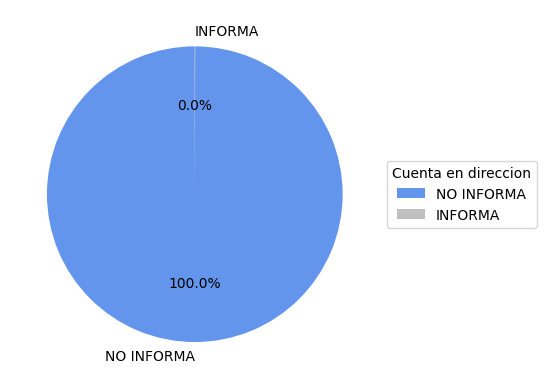

In [40]:
# Cantidad de registros por el tipo de genero

# generar conteo de registros por valor único en la columna ESTU_GENERO
df_direccion = df_Ciudadania_digital['DIRECCION'].value_counts()

# establecer etiquetas y colores
etiquetas = ['NO INFORMA', 'INFORMA']
colores = ['#6495ED','#C0C0C0']

# crear gráfico de torta
plt.pie(df_direccion, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)

# agregar leyenda
plt.legend(title='Cuenta en direccion', loc='center left', bbox_to_anchor=(1.0, 0.5))

# mostrar gráfico
plt.show

# imprimir resultados
print(df_direccion)

> se revisa el nivel educativo de las personas que accedieron a capacitacion

In [41]:
df_Ciudadania_digital['NIVEL EDUCATIVO'].value_counts()

NIVEL EDUCATIVO
No registra             520335
Bachillerato            269403
Profesional             126451
Primaria                 66695
T�cnico                  35999
Tecnol�gico              12744
PENDIENTE CLASIFICAR      8238
Especializaci�n           7605
Técnico                   6361
Maestr�a                  2799
Especialización            947
Maestría                   504
Doctorado                  268
Name: count, dtype: int64

> Reemplazar valores

In [43]:
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
        'No registra'			 : 'No registra',
        'Bachillerato'           : 'Bachillerato',
        'Profesional'            : 'Profesional',
        'Primaria'               : 'Primaria',
        'T�cnico'               : 'Tecnico',
        'Tecnol�gico'           : 'Tecnologico',
        'PENDIENTE CLASIFICAR'   : 'No registra',
        'Especializaci�n'       : 'Especializacion',
        'Técnico'                : 'Tecnico',
        'Maestr�a'              : 'Maestria',
        'Especialización'        : 'Especializacion',
        'Maestría'               : 'Maestria',
        'Doctorado'              : 'Doctorado'
}

# Implementar la función .replace
df_Ciudadania_digital['NIVEL EDUCATIVO'].replace(replace_dict, inplace=True)
df_Ciudadania_digital['NIVEL EDUCATIVO'].value_counts()

NIVEL EDUCATIVO
No registra        528573
Bachillerato       269403
Profesional        126451
Primaria            66695
Tecnico             42360
Tecnologico         12744
Especializacion      8552
Maestria             3303
Doctorado             268
Name: count, dtype: int64

> Se realiza grafico del nivel educativo

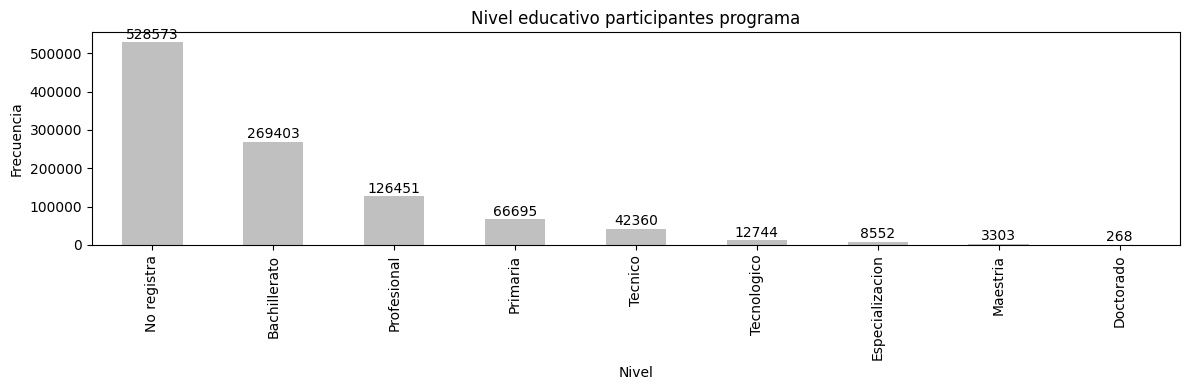

In [44]:
# Obtener valores únicos y su frecuencia en la columna 'ESTU_TIPODOCUMENTO'
nivel_educativo_counts = df_Ciudadania_digital['NIVEL EDUCATIVO'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(12, 4))
ax = nivel_educativo_counts.plot(kind='bar', color='#C0C0C0')

# Añadir la cantidad en cada barra
for i, v in enumerate(nivel_educativo_counts):
    ax.text(i, v + 1000, str(v), ha='center', va='bottom', fontsize=10)

# Títulos y etiquetas
plt.title('Nivel educativo participantes programa')
plt.xlabel('Nivel')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

> Sector al que pertenecen

In [45]:
df_Ciudadania_digital['SECTOR'].value_counts()

SECTOR
Urbano    447115
Rural      53304
0          11806
URBANO      4592
RURAL        522
-             98
Otro           4
Name: count, dtype: int64

> Se realiza la validaciòn y correcciòn de lainformaciòn del sector que realizo el curso

In [47]:
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
        'Urbano'	: 'Urbano',
        'Rural'     : 'Rural',
        '0'         : 'No Informa',
        'URBANO'    : 'Urbano',
        'RURAL'     : 'Rural',
        '-'         : 'No Informa',
        'Otro'      : 'No Informa'
}

# Implementar la función .replace
df_Ciudadania_digital['SECTOR'].replace(replace_dict, inplace=True)
df_Ciudadania_digital['SECTOR'].value_counts()

SECTOR
Urbano        451707
Rural          53826
No Informa     11908
Name: count, dtype: int64

> Se realiza la grafica para ver como se viene presentando la participacion por sectordes donde viven 

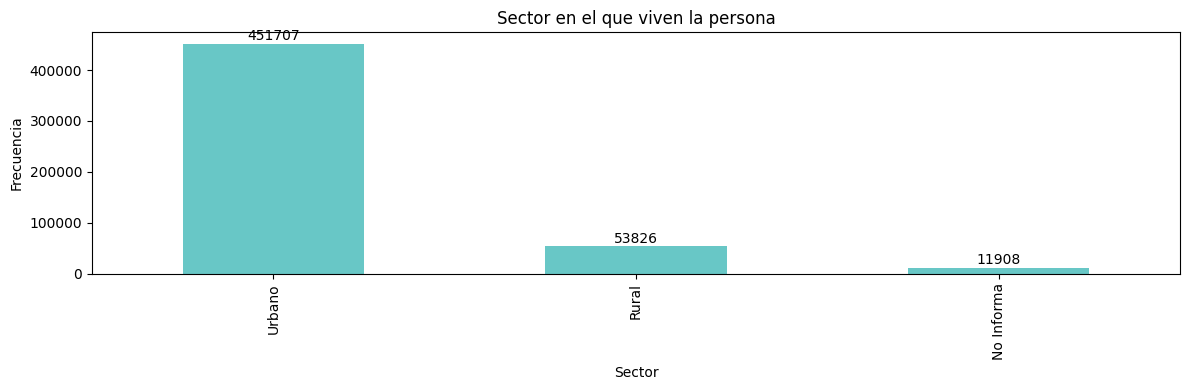

In [48]:
# Obtener valores únicos y su frecuencia en la columna 'ESTU_TIPODOCUMENTO'
sector_counts = df_Ciudadania_digital['SECTOR'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(12, 4))
ax = sector_counts.plot(kind='bar', color='#68C7C6')

# Añadir la cantidad en cada barra
for i, v in enumerate(sector_counts):
    ax.text(i, v + 1000, str(v), ha='center', va='bottom', fontsize=10)

# Títulos y etiquetas
plt.title('Sector en el que viven la persona')
plt.xlabel('Sector')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

> Se realiza la validaciòn del estrato donde viven los participantes

In [49]:
df_Ciudadania_digital['ESTRATO'].value_counts()

ESTRATO
PENDIENTE CLASIFICAR    523664
Estrato 2               202396
Estrato 1               187872
Estrato 3               133769
Estrato 4                 7873
Estrato 5                 1853
Estrato 6                  764
No registra                158
Name: count, dtype: int64

> Se realiza el ajuste para ahorrar memoria computacional, con los estratos

In [51]:
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
        'PENDIENTE CLASIFICAR'	: 'No registra',
        'Estrato 2'           : '2',
        'Estrato 1'           : '1',
        'Estrato 3'           : '3',
        'Estrato 4'           : '4',
        'Estrato 5'           : '5',
        'Estrato 6'           : '6',
        'No registra'         : 'No registra'
}

# Implementar la función .replace
df_Ciudadania_digital['ESTRATO'].replace(replace_dict, inplace=True)
df_Ciudadania_digital['ESTRATO'].value_counts()

ESTRATO
No registra    523822
2              202396
1              187872
3              133769
4                7873
5                1853
6                 764
Name: count, dtype: int64

> Se hace grafico de barrar para ver cuales son los estratos que mas participaron en el programa

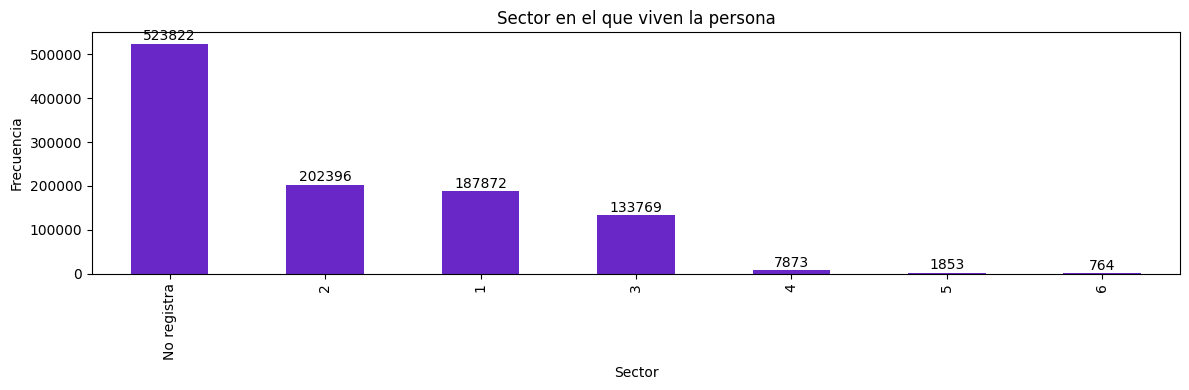

In [52]:
# Obtener valores únicos y su frecuencia en la columna 'ESTU_TIPODOCUMENTO'
estrato_counts = df_Ciudadania_digital['ESTRATO'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(12, 4))
ax = estrato_counts.plot(kind='bar', color='#6827C6')

# Añadir la cantidad en cada barra
for i, v in enumerate(estrato_counts):
    ax.text(i, v + 1000, str(v), ha='center', va='bottom', fontsize=10)

# Títulos y etiquetas
plt.title('Sector en el que viven la persona')
plt.xlabel('Sector')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

> En esta parte vamos a realizar la validacion de fecha

In [53]:
df_Ciudadania_digital['FECHA DE NACIMIENTO'].unique().tolist()

[nan,
 '1942-09-20 00:00:00.0000000',
 '1970-03-19 00:00:00.0000000',
 '1985-11-27 00:00:00.0000000',
 '2000-01-19 00:00:00.0000000',
 '2004-02-13 00:00:00.0000000',
 '1970-07-15 00:00:00.0000000',
 '1979-12-24 00:00:00.0000000',
 '1989-05-18 00:00:00.0000000',
 '1999-10-10 00:00:00.0000000',
 '1990-05-31 00:00:00.0000000',
 '1985-07-13 00:00:00.0000000',
 '1995-08-02 00:00:00.0000000',
 '1961-01-13 00:00:00.0000000',
 '1989-05-21 00:00:00.0000000',
 '1963-08-15 00:00:00.0000000',
 '1984-04-21 00:00:00.0000000',
 '1983-04-25 00:00:00.0000000',
 '1980-01-01 00:00:00.0000000',
 '1990-09-27 00:00:00.0000000',
 '2001-01-24 00:00:00.0000000',
 '2004-01-27 00:00:00.0000000',
 '1986-11-23 00:00:00.0000000',
 '1987-01-01 00:00:00.0000000',
 '1963-04-29 00:00:00.0000000',
 '1995-08-16 00:00:00.0000000',
 '1989-12-09 00:00:00.0000000',
 '1960-11-20 00:00:00.0000000',
 '1991-02-01 00:00:00.0000000',
 '1998-05-01 00:00:00.0000000',
 '1970-06-09 00:00:00.0000000',
 '1979-08-12 00:00:00.0000000',
 '

> Se realiza la conversiòn del campo para que quede como fecha

In [54]:
# se realiza la conversión del campo
df_Ciudadania_digital['FECHA DE NACIMIENTO'] = pd.to_datetime(df_Ciudadania_digital['FECHA DE NACIMIENTO'], errors='coerce')
# validamos como quedo la fecha en este momento
# mostrar resultados
df_Ciudadania_digital['FECHA DE NACIMIENTO'].value_counts()


FECHA DE NACIMIENTO
1980-01-01    92472
1987-01-01    28296
1989-12-09     5357
1989-11-02     1522
1985-01-21     1517
              ...  
1952-02-27        1
1946-10-06        1
1951-05-01        1
1943-11-04        1
1931-05-06        1
Name: count, Length: 23867, dtype: int64

> se realiza revisión del campo edad para ver a que se refiere este campo, ya que se observa que agrupa algunos registros de edad

In [55]:
df_Ciudadania_digital['EDAD'].unique().tolist()

[nan,
 '8 a 13',
 '18 a 25',
 '14 a 17',
 '28 years 15 days',
 '33 years 15 days',
 '23 years 15 days',
 '57 years 15 days',
 '29 years 15 days',
 '55 years 15 days',
 '38 years 15 days',
 '17 years 15 days',
 '26 a 45',
 '31 years 15 days',
 '0',
 '46 a 59',
 '58 years 15 days',
 '20 years 15 days',
 '53',
 '48 years 15 days',
 '39 years 15 days',
 '35 years 15 days',
 '34',
 '18 years 15 days',
 '56 years 15 days',
 '20',
 '26 years 15 days',
 '56',
 '32 years 15 days',
 '25 years 15 days',
 '36 years 15 days',
 '26',
 '19 years 15 days',
 '13',
 '44 years 15 days',
 '41 years 15 days',
 '34 years 15 days',
 '40 years 15 days',
 '22 years 15 days',
 '42 years 15 days',
 '47 years 15 days',
 '47',
 '54 years 15 days',
 '70 years 15 days',
 '43 years 15 days',
 '59 years 15 days',
 '21 years 15 days',
 '16 years 15 days',
 '15 years 15 days',
 '48',
 '30 years 15 days',
 'De 26 a 45',
 '37 years 15 days',
 '28',
 '24 years 15 days',
 '71 years 15 days',
 '27 years 15 days',
 '64 years 

> Se revisa este registro, y se valida que tiene informaciòn mixta que se puede calcular, por lo que elimina

In [56]:
# Eliminar una columna por su CODIGO DEPARTAMENTO NACIMIENTO
df_Ciudadania_digital = df_Ciudadania_digital.drop(columns=['EDAD'])
print("\nDataFrame después de eliminar la columna 'EDAD':")


DataFrame después de eliminar la columna 'EDAD':


> Se realiza la validaciòn del genero

In [57]:
df_Ciudadania_digital['GENERO'].unique().tolist()

[nan, 'Femenino', 'Masculino', 'PENDIETE CLASIFICAR', 'PENDIENTE CLASIFICAR']

In [59]:
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
        'na'	              : 'No registra',
        'Femenino'             : 'F',
        'Masculino'            : 'M',
        'PENDIETE CLASIFICAR'  : 'No registra',
        'PENDIENTE CLASIFICAR'  : 'No registra'

}

# Implementar la función .replace
df_Ciudadania_digital['GENERO'].replace(replace_dict, inplace=True)
df_Ciudadania_digital['GENERO'].value_counts()

GENERO
F              488038
M              412263
No registra      6532
Name: count, dtype: int64

> Grafica para valdiar el genero quemas cursos toma

GENERO
F              488038
M              412263
No registra      6532
Name: count, dtype: int64


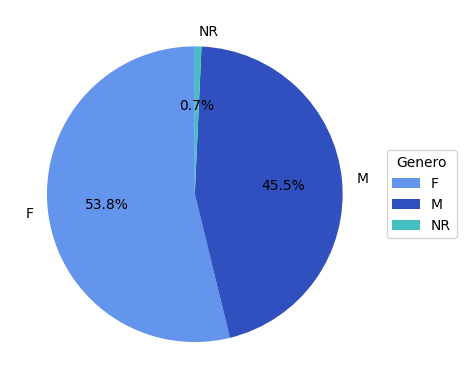

In [61]:
# Cantidad de registros por el tipo de genero

# generar conteo de registros por valor único en la columna ESTU_GENERO
df_genero = df_Ciudadania_digital['GENERO'].value_counts()

# establecer etiquetas y colores
etiquetas = ['F', 'M','NR']
colores = ['#6495ED','#3150C0', '#45C0C0']

# crear gráfico de torta
plt.pie(df_genero, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)

# agregar leyenda
plt.legend(title='Genero', loc='center left', bbox_to_anchor=(1.0, 0.5))

# mostrar gráfico
plt.show

# imprimir resultados
print(df_genero)

> Se realiza la validacion del campo discapacidad

In [62]:
df_Ciudadania_digital['DISCAPACIDAD'].value_counts()

DISCAPACIDAD
No registra               701540
SIN DISCAPACIDAD          352120
DISCAPACIDAD VISUAL         2378
DISCAPACIDAD F�SICA          822
DISCAPACIDAD AUDITIVA        575
DISCAPACIDAD COGNITIVA       368
DISCAPACIDAD MENTAL          275
PENDIENTE CLASIFICAR         153
DISCAPACIDAD SENSORIAL        91
DISCAPACIDAD M�LTIPLE         27
Name: count, dtype: int64

> Se realiza el registro 

In [64]:
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
        'No registra'	          : 'No registra',
        'SIN DISCAPACIDAD'        : 'Sin discapacidad',
        'DISCAPACIDAD VISUAL'     : 'Discapacidad Visual',
        'DISCAPACIDAD F�SICA'     : 'Discapacidad fisica',
        'DISCAPACIDAD AUDITIVA'    : 'Discapacidad auditiva',
        'DISCAPACIDAD COGNITIVA'   : 'Discapacidad cognitiva',
        'DISCAPACIDAD MENTAL'     : 'Discapacidad mental',
        'PENDIENTE CLASIFICAR'    : 'Pendiente clasificar',
        'DISCAPACIDAD SENSORIAL'   : 'Discapacidad sensorial',
        'DISCAPACIDAD M�LTIPLE'    : 'Discapacidad multiple'
}

# Implementar la función .replace
df_Ciudadania_digital['DISCAPACIDAD'].replace(replace_dict, inplace=True)
df_Ciudadania_digital['DISCAPACIDAD'].value_counts()

DISCAPACIDAD
No registra               701540
Sin discapacidad          352120
Discapacidad Visual         2378
Discapacidad fisica          822
Discapacidad auditiva        575
Discapacidad cognitiva       368
Discapacidad mental          275
Pendiente clasificar         153
Discapacidad sensorial        91
Discapacidad multiple         27
Name: count, dtype: int64

> Se realiza grafico de linea para revisar

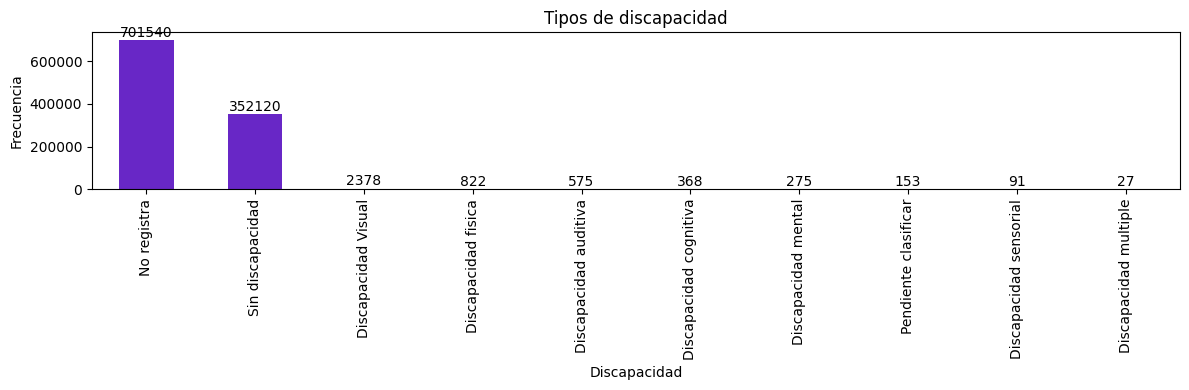

In [65]:
# Obtener valores únicos y su frecuencia en la columna 'ESTU_TIPODOCUMENTO'
discapacidad_counts = df_Ciudadania_digital['DISCAPACIDAD'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(12, 4))
ax = discapacidad_counts.plot(kind='bar', color='#6827C6')

# Añadir la cantidad en cada barra
for i, v in enumerate(discapacidad_counts):
    ax.text(i, v + 1000, str(v), ha='center', va='bottom', fontsize=10)

# Títulos y etiquetas
plt.title('Tipos de discapacidad')
plt.xlabel('Discapacidad')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# VALIDACION CAMPO ALIADOS
> En este aparte se valida dentro del proyecto, cuales fueron los aliados del proceso

In [66]:
df_Ciudadania_digital['ALIADO'].unique().tolist()

[nan,
 'ALIANZA DIGITAL',
 'GENTE ESTRATEGICA',
 'Computadores para Educar',
 'GOBERNACION DEL VALLE DEL CAUC',
 'EdwinQuindio',
 '0 SENA Servicios Nacional de',
 'Escuela Superior de Administra',
 'POLICIA NACIONAL DE COLOMBIA',
 'EdnaIbague',
 'Institución Educativa  Técnica',
 'EGOCITY',
 'IETI Antonio Jose Camacho',
 'MINTIC',
 'UNIVERSIDAD DE LA SABANA',
 'Alcaldía de Buga',
 'Ruta Ciudadanía Digital',
 'ALCALDÍA DE ARMENÍA',
 'NO REGISTRA',
 'AGENCIA NACIONAL DE HIDROCARBU',
 'EJERCITO NACIONAL DE COLOMBIA',
 'Digital Ware SA',
 'Alcaldia de Bucaramanga',
 'FUNADI',
 'INEM Custodio Garcia Rovira',
 'CENSA',
 'Fedesoft',
 'Universidad Tecnológica De Per',
 'AndesBPO',
 'OTRO',
 'Ministerio de Educación Nacion',
 'VENTAS Y SERVICIOS',
 'Alcaldía de Bogotá',
 'Líder Asesor TIC Amazonas',
 'Corporación Técnica Instituto',
 'GOBERNACION DE BOLIVAR',
 'Instituto Servicios Educativos',
 'COS',
 'UNIVERSIDAD REMINGTON',
 'Institución Universitaria Cole',
 'OEI',
 'Universidad Nacional Ab

> Se realiza la filtración y ajuste d ela informaciòn de las entidades que se encargaron de realizar la actividad

In [82]:
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
 'nan'                                 : 'No Registra',
 'ALIANZA DIGITAL'                    : 'Alianza Estrategica',
 'GENTE ESTRATEGICA'                  : 'Gente Estrategica',
 'Computadores para Educar'           : 'Computadores para Educar',
 'GOBERNACION DEL VALLE DEL CAUC'     : 'Gobernacion del Valle del Cauca', 
 'EdwinQuindio'                       : 'Edwin Quindio', 
 '0 SENA Servicios Nacional de'       : 'SENA',
 'Escuela Superior de Administra'     : 'Escuela Superior de Administracion',
 'POLICIA NACIONAL DE COLOMBIA'       : 'Policia Nacional',       
 'EdnaIbague'                         : 'Edna Ibague',
 'Institución Educativa  Técnica'     : 'Institución Educativa Tecnica',
 'EGOCITY'                            : 'Egocity',
 'IETI Antonio Jose Camacho'          : 'IETI Antonio Jose Camacho',  
 'MINTIC'                             : 'MINTIC',
 'UNIVERSIDAD DE LA SABANA'           : 'Universidad de la Sabana',
 'Alcaldía de Buga'                   : 'Alcaldia de Buga',
 'Ruta Ciudadanía Digital'            : 'Ruta Cuidadania Digital',
 'ALCALDÍA DE ARMENÍA'                : 'Alcaldia de Armenia',
 'NO REGISTRA'                        : 'No Registra',
 'AGENCIA NACIONAL DE HIDROCARBU'     : 'Agencia Nacional de Hidrocarburos',
 'EJERCITO NACIONAL DE COLOMBIA'      : 'Ejercito Nacional',
 'Digital Ware SA'                    : 'Digital Ware SA',
 'Alcaldia de Bucaramanga'            : 'Alcaldia de Bucaramanga',
 'FUNADI'                             : 'FUNADI',
 'INEM Custodio Garcia Rovira'        : 'INEM Custodio Garcia Rovira',
 'CENSA'                              : 'CENSA',
 'Fedesoft'                           : 'Fedesoft',
 'Universidad Tecnológica De Per'     : 'Universidad Tecnologica de Pereira',
 'AndesBPO'                           : 'Andes BPO',
  'OTRO'                              : 'No Registra',
 'Ministerio de Educación Nacion'     : 'MINEDUCACION', 
 'VENTAS Y SERVICIOS'                 : 'Ventas y Servicios',
 'Alcaldía de Bogotá'                 : 'Alcaldia de Bogota',
 'Líder Asesor TIC Amazonas'          : 'Lider Asesor TIC',
 'Corporación Técnica Instituto'      : 'Coorporacion Tecnica Instituto',
 'GOBERNACION DE BOLIVAR'             : 'Gobernacion de Bolivar',
 'Instituto Servicios Educativos'     : 'Instituto Servicios Educativos',
 'COS'                                : 'COS',
 'UNIVERSIDAD REMINGTON'              : 'Universidad Remington',
 'Institución Universitaria Cole'     : 'Institución Universitaria Colegio',
 'OEI'                                : 'OEI',
'Universidad Nacional Abierta y'      : 'Universidad Nacional Abierta y a Distancia', 
 'CORPORACION UNIVERSITARIA LATI'     : 'Corporacion Universitaria Latinoamericana',
 'Líder Asesor TIC  Vaupés'           : 'Lider Asesor TIC',
 'Universidad Autónoma del Carib'     : 'Universidad Autonoma del Caribe',
 'Colegio Cafe Madrid Minuto de'      : 'Colegio Cafe Madrid',
 'Universidad Autónoma de Bucara'     : 'Universidad Autonoma de Bucaramanga',
 'IE Villanueva Copacabana'           : 'IE Villanueva Copacabana',
 'Universidad Nacional de Colomb'     : 'UNAL',
 'GOBERNACION DEL GUAVIARE'           : 'Gobernacion del Guaviare',
 'GOBERNACION DEL TOLIMA'             : 'Gobernacion del Tolima', 
 'Universidad Distrital Francisc'     : 'Universidad Distrital Francisco Jose de Caldas',
 'CERAFIN BETANCURT GALLEGO'          : 'Cerafin Betancurt Gallego',
 'Universidad del Cauca'              : 'Universidad del Cauca',
 'GOBERNACION DEL VAUPES'             : 'Gobernacion del Vaupes',
 'Universidad de la Amazonia'         : 'Universidad de la Amazonia',
 'Universidad la Gran Colombia'       : 'Universidad la Gran Colombia',
 'Fundación Virtual Educa Colomb'     : 'Fundacion Virtual Educa Colombia',
 'SENA de Santander'                  : 'SENA',
 'Institución Educativa Técnico'      : 'Institucion Educativa Tecnico',
 'Institución Educativa Técn'         : 'Institucion Educativa Tecnico',
 'METROCALI'                          : 'METROCALI',
 'Fundación Universitaria Del Ár'     : 'Fundacion Universitaria del Area Andina', 
 'SENA Servicio Nacional de Apre'     : 'SENA',
 'Universidad del Bosque'             : 'Universidad del Bosque',
 'ENTERDEV'                           : 'ENTERDEV',
 'Universidad del Valle'              : 'Universidad del Valle',
 'IE Presbiterio Julio Tamayo'        : 'IE Presbiterio Julio Tamayo',
 'Universidad de Medellin'            : 'Universidad de Medellin',
 'Universidad Tecnológica de Bol'     : 'Universidad Tecnologica de Bolivar',
 'Universidad San Buenaventura'       : 'Universidad San Buenaventura',
 'Institución Universitaria de E'     : 'Institucion Universitaria de E',
 'Universidad EAFIT'                  : 'Universidad EAFIT',
 'IE Carlos Arturo Duque Ramirez'     : 'IE Carlos Arturo Duque Ramirez',
 'ZYOS'                               : 'ZYOS',  
 'GOBERNACION DEL NORTE DE SANTA'     : 'Gobernacion del Norte de Santander',
 'Líder Asesor TIC Meta'              : 'Lider Asesor TIC',
 'GOBERNACION DEL CHOCO'              : 'Gobernacion del Choco',
 'Colegio Maria Auxiliadora Casa'     : 'Colegio Maria Auxiliadora',
 'Tecnocentro Somos Pacifico'         : 'Tecnocentro Somos Pacifico',
 'BARRANQUILLA, DISTRITO ESPECIA'     : 'Barranquilla',
 'Marketing Personal'                 : 'Marketing Personal',  
 'Alcaldía de Tuluá'                  : 'Alcaldia de Tulua',
 'IETI Diez de Mayo'                  : 'IETI Diez de Mayo',
 'Universidad La Gran Colombia s'     : 'Universidad la Gran Colombia',
 'Corporación Universitaria Cent'     : 'Corporacion Universitaria Centro Superior',
 'GOBERNACION DE ANTIOQUIA'           : 'Gobernacion de Antioquia',
 'Corporación Universitaria CUDE'     : 'CUDES',
 'EMRU Alcaldía de Cali'              : 'EMRU Alcaldia de Cali',                   
 'Alcaldía de Santander de Quili'     : 'Alcaldia de Santander de Quilichao', 
 'GOBERNACION DE NARIÑO'              : 'Gobernacion de Narino',
 'Fundación Conéctate con la Vid'     : 'Fundacion Conectate con la Vida',
 'GOBERNACION DE CUNDINAMARCA'        : 'Gobernacion de Cundinamarca',
 'Colegio Nacional De Comerc'         : 'Colegio Nacional de Comercio',
 'Institución Educativa Popular'      : 'Institucion Educativa de Comercio',
 'Alcaldía de San Francisco'          : 'Alcaldia de San Francisco',
 'Corporación Universitaria Rafa'     : 'Corporacion Universitaria Rafael Nunez',
 'GOBERNACION DE BOYACA'              : 'Gobernacion de Boyaca',
 'Institución Educativa Técnica'      : 'Institucion Educativa Tecnica',
 'Universidad Sergio Arboleda'        : 'Universidad Sergio Arboleda',
 'DATIC  Periodistas'                 : 'DATIC Periodistas',
 'GOBERNACION DEL CAUCA'              : 'Gobernacion del Cauca',
 'Alcaldía de Amalfi'                 : 'Alcaldia de Amalfi',
 'IETI Comuna Diecisiete Cali'        : 'IETI Comuna Diecisiete Cali',
 'Universidad Santiago de Cali'       : 'Universidad Santiago de Cali',
 'GOBERNACION DEL MAGDALENA'          : 'Gobernacion del Magdalena',
 'Claro Colombia'                     : 'Claro',
 'Fundación Universitaria Catoli'     : 'Fundacion Universitaria Catolica',    
 'Corporación Universitaria de U'     : 'Corporacion Universitaria de U', 
 'Alcaldía de Chigorodó'              : 'Alcaldia de Chigorodo',
 'Asoc Colombiana de Ingenieros'      : 'Asociacion Colombiana de Ingenieros',
 'Comfenalco - Agencia de Empleo'     : 'Comfenalco',
 'Atlántico'                          : 'Atlantico',
 'GOBERNACION DEL ATLANTICO'          : 'Gobernacion del Atlantico', 
 'Agencia Nacional de Tierras'        : 'Agencia Nacional de Tierras',
 'IET Ciudadela Decepaz'              : 'IET Ciudadela Decepaz',
 'Líder Asesor TIC Guaviare'          : 'Lider Asesor TIC',
 'Universidad Autónoma de Occide'     : 'Universidad Autonoma de Occidente',
 'Universidad de San Buenaventur'     : 'Universidad de San Buenaventura',
 'Constructora Nirvana SAS'           : 'Constructora Nirvana SAS',
 'Biblioteca Departamental'           : 'Biblioteca Departamental',
 'Institución Universitaria CESM'     : 'Institucion Universitaria CESM',
 'Colombina'                          : 'Colombina',
 'SIIGO'                              : 'SIIGO',
 'Esumer'                             : 'Esumer',
 'Corporación Universitaria COMF'     : 'Fundacion Universitaria Comfamiliar',
 'Universidad Minuto de Dios'         : 'Universidad Minuto de Dios',
 'Madres Digitales'                   : 'Madres Digitales',
 'Guainianos Digitales Población'     : 'Guainianos Digitales Poblacion',
 'GOBERNACION DEL META'              : 'Gobernacion del Meta',
 'Universidad de Nariño'              : 'Universidad de Narino',
 'GOBERNACION DE CALDAS'              : 'Gobernacion de Caldas',
 'TECNAR'                             : 'TECNAR',
 'Alcaldía de Santa Marta'           : 'Alcaldia de Santa Marta',  
 'Universidad CES'                    : 'Universidad CES',
 'ParqueSoft Colombia'                : 'ParqueSoft Colombia',
 'IE Santo Tomás'                     : 'IE Santo Tomas', 
 'Álvaro Mutis'                       : 'Alvaro Mutis',
 'Universidad del Atlántico'          : 'Universidad del Atlantico',
 'GOBERNACION DE RISARALDA'           : 'Gobernacion de Risaralda',
 'GOBERNACION DEL GUAINIA'            : 'Gobernacion de Guainia',
 'Colegio Restrepo Millan'            : 'Colegio Restrepo Millan',
 'Universidad ICESI'                  : 'Universidad ICESI',
 'Universidad de Antioquia'            : 'Universidad de Antioquia',
 'Francisco Jose de Caldas'           : 'Universidad Distrital Francisco Jose de Caldas',
 'Fundación Universitaria de Pop'     : 'Fundacion Universitaria de Popayan',   
 'GOBERNACION DEL CESAR'              : 'Gobernacion del Cesar',
 'Parque Soft'                        : 'Parque Soft',
 'Corporación Universitaria Autó'     : 'Corporacion Universitaria Autonoma',
 'Politécnico Grancolombiano'         : 'Politecnico Grancolombiano',
 'Cámara de Comercio del Putumay'     : 'Camara de Comercio',
 'GOBERNACION ARCHIPIELAGO DE SA'     : 'Gobernacion de San Andres',
 'Héroes Digitales Fuerzas Milit'     : 'Heroes Digitales Fuerzas Militares',
 'Institución Educativa Manuel C'     : 'Institucion Educativa Manuel C de la Torre', 
 'Atento'                             : 'Atento',
 'Institución Educativa Jorge El'     : 'IE Jorge Eliecer Gaitan',
 'Colegio José Manuel Restrepo'       : 'Colegio Jose Manuel Restrepo',
 'CIME'                              : 'CIME',
 'Universidad de Cartagena'           : 'Universidad de Cartagena',
 'Universidad Pontificia Bolivar'     : 'Universidad Pontificia Bolivariana',
 'Etno Digitales  Comunidades In'     : 'ETNO Digitales',
 'Universidad Libre de Cali'          : 'Universidad Libre de Cali',
 'Fundación Tecnológica Autónoma'     : 'Fundacion Tecnologica Autonoma de Bogota',
 'GOBERNACION DE SUCRE'               : 'Gobernacion de Sucre',
 'IE Antonio Roldan Betancurt'        : 'IE Antonio Roldan Betancurt',
 'Líder Asesor TIC Casanare'         : 'Lider Asesor TIC',
 'Universidad de Caldas'              : 'Universidad de Caldas',
 'Estudiantes Digitales'              : 'Estudiantes Digitales',   
 'Colegio Diocesano Laura Montoy'     : 'Colegio Diocesano Laura Montoya',
 'Institución Universitaria Anto'     : 'UNIAJC', 
'SECRETARIA DE HABITAT'               : 'Secretaria de Habitat',
 'INSTITUTO TECNOLÓGICO METROPOL'     : 'Instituto Tecnologico Metropol',
 'GOBERNACION DEL SANTANDER'          : 'Gobernacion de Santander',
 'INPEC Risaralda / Eje cafetero'     : 'INPEC',
 'Afros Digitales Comunidad Afro'     : 'Afros Digitales',
 'CEDESARROLLO'                       : 'CEDESARROLLO',
 'Universidad Cooperativa de Col'     : 'Universidad Cooperativa de Colombia',  
 'Institución Universitaria'          : 'Institucion Universitaria',
 'Universidad de los Andes'           : 'Universidad de los Andes',
 'IE Antonio José Camacho'            : 'IE Antonio José Camacho',
 'Centro Cultural De Cali'            : 'Centro Cultural de Cali',
 'Colegio San Cristobal Sur IED'      : 'IED San Cristobal Sur',  
 'Líder Asesor TIC Atlántico'         : 'Lider Asesor TIC',
 'Antonio José Escobar'               : 'Antonio José Escobar',
 'Líder Asesor TIC Cundinamarca'      : 'Lider Asesor TIC',
 'IE Gilberto Echeverri Mejia'        : 'IE Gilberto Echeverri Mejia',
 'Instituto Mistrato'                 : 'Instituto Mistrato',
 'RED UNIVERSITARIA DE RISALRALD'     : 'Red Universitaria de Risaralda',
 'GOBERNACION DEL ARAUCA'             : 'Gobernacion de Arauca',
 'InfoCali Cinco'                     : 'InfoCali Cinco',
 'funcionarios Digitales'             : 'Funcionarios Digitales',
 'Aprendices Digitales Sena'          : 'SENA', 
 'Universidad Libre De Pereira'       : 'Universidad Libre de Pereira',
 'Colegio Distrital Arborizadora'     : 'Colegio Distrital Arborizadora',
 'Corporación Universitaria Minu'     : 'Universidad Minuto de Dios',
 'Fundación Universitaria Católi'     : 'Fundacion Universitaria Catolica',
 'PVD plus Duarte Cancino'            : 'PVD Plus Duarte Cancino',
 'Líder Asesor TIC Cauca'             : 'Lider Asesor TIC',
'Instituto Tecnologico Metropol'      : 'Instituto Tecnologico Metropolitano',
 'Universidad Antonio Nariño'         : 'Universidad Antonio Narino',
 'El Sena'                            : 'SENA',
 'Onelink'                            : 'ONELINK',
 'AVON'                               : 'AVON',
 'Corporación Universitaria Sant'     : 'Corporacion Universitaria Sant',   
 'Universidad Autónoma Latinoame'     : 'UNAULA',
 'People Contact'                     : 'People Contact',
 'Tecnologico de Antioquia'           : 'Tecnologico de Antioquia', 
 'GOBERNACION DEL CASANARE'           : 'Gobernacion de Casanare', 
 'Infocali Catorce'                   : 'Infocali Catorce',
 'Colegio Enrique Olaya Herrera'      : 'Colegio Enrique Olaya Herrera',
 'Población Victima'                  : 'Población Victima',
 'Colegio Distrital Paulo Freire'     : 'Colegio Distrital Paulo Freire',
 'Rigoberta Menchú'                   : 'Rigoberta Menchu',
 'Aldeamo'                            : 'Aldeamo',
 'Institución Universitaria Pasc'     : 'Institucion Universitaria Pascual Bravo',
 'Universidad Mariana'                : 'Universidad Mariana',
 'Institución Educativa Luis Lóp'     : 'IED Luis Lopez',
 'Universidad Católica de Maniza'     : 'Universidad Catolica de Manizales',
'CIANDCO'                             : 'CIANDCO',
 'Institución Universitaria Sala'     : 'Institucion Universitaria Salazar y Herrera',
 'SENA de Calatrava Itaguí'           : 'SENA',
 'Institución Educativa Patio Bo'     : 'IED Patio Bonito',
 'IE Integrado Jorge Eliécer Gai'     : 'IE Integrado Jorge Eliecer Gaitan',
 'GOBERNACION DE CORDOBA'             : 'Gobernacion de Cordoba',
 'Corporación Politécnico Marco'      : 'Corporacion Politecnico Marco Fidel Suarez',
 'Instituto Distrital de Ciencia'     : 'IDCBIS',
 'GOBERNACION DE LA GUAJIRA'          : 'Gobernacion de la Guajira',
 'Universidad Santo Tomás sede M'     : 'Universidad Santo Tomas',
 'Líder Asesor TIC Córdoba'           : 'Lider Asesor TIC',
 'Centro Cultural Comuna Diecioc'     : 'Centro Cultural Comuna Dieciocho', 
 'GOBERNACION DEL HUILA'              : 'Gobernacion del Huila',
 'IE Felix Maria Restrepo Londoñ'     : 'IE Felix Maria Restrepo Londono',
 'EMTELCO'                            : 'EMTELCO',
 'Colegio Francisco de Paula San'     : 'Colegio Francisco de Paula Santander',
 'AnyeliAtlantico'                    : 'AnyeliAtlantico',
 'SENA CHIA'                          : 'SENA',
 'Colegio Alfonso Lopez Puma'          : 'Colegio Alfonso Lopez Puma',
 'Fundación Universitaria Luis A'     : 'Fundacion Universitaria Luis Amigo',
 'El Jardín'                          : 'El Jardin',
 'Líder Asesor TIC  Valle del Ca'     : 'Lider Asesor TIC',
 'Población Vulnerable'               : 'Poblacion Vulnerable',
 'IE Escuela Normal Superior de'      : 'IE Escuela Normal Superior',
 'Biblioteca Especializada Depor'     : 'Biblioteca Especializada Deporte',
 'GOBERNACION DEL QUINDIO'            : 'Gobernacion de Quindio',
 'Colegio Diego Echavarria Misas'     : 'Colegio Diego Echavarria Misas',
 'Fundación Centro Colombian'         : 'Fundacion Centro Colombiano',
 'UNIVERSIDAD AUTONOMA LATINOAME'     : 'UNAULA', 
 'Colegio Virginia Gutierrez de'      : 'Colegio Virginia Gutierrez',
 'Universidad Externado de C'         : 'Universidad Externado de Colombia',
 'Unilibre'                           : 'UNILIBRE',
 'Pontificia Universidad Javeria'     : 'Pontificia Universidad Javeriana',
 'Instituto Tecnológico del Putu'     : 'Instituto Tecnologico del Putumayo',
 'Institución Universitaria Escu'     : 'Institucion Universitaria Escuela Nacional del Deporte',
 'Colegio Soles del Saber EU'        : 'Colegio Soles del Saber EU',
 'Alcaldía de San Pedro'              : 'Alcaldia de San Pedro',
 'Fundación Universitaria San Ma'     : 'Fundacion Universitaria San Martin',
 'León De Greiff'                     : 'León De Greiff',
 'Instutución Colegio Mayor de A'     : 'Colegio Mayor de Antioquia',
 'Corporación Universitaria La S'     : 'Corporacion Universitaria La S',
 'Corporación Universitaria Auto'     : 'Corporacion Universitaria Auto',
 'San Luis I'                         : 'San Luis I',
 'Biblioteca Rumenigue Perea Pad'     : 'Biblioteca Publica Rumenigue Perea Padilla',
 'Central Didáctica La Casona'        : 'Central Didáctica La Casona',
 'Instituto Tecnológico Metr'         : 'Instituto Tecnologico Metr',
 'Líder Asesor TIC  Santander'        : 'Lider Asesor TIC',
 'Universidad UNAD Cali'              : 'UNAD CALI',
 'Líder Asesor TIC Antioquia'         : 'Lider Asesor TIC',
 'Fundación CECEP'                    : 'Fundacion CECEP',
 'Líder Asesor TIC Huila'             : 'Lider Asesor TIC',
 'IE Sagrado Corazon de Jesus'        : 'IE Sagrado Corazon de Jesus',
 'Escuela Militar de Aviación'        : 'Escuela Militar de Aviación',
 'Corporación Academia Superior'       : 'Corporación Academia Superior'
}

# Implementar la función .replace
df_Ciudadania_digital['ALIADO'].replace(replace_dict, inplace=True)
df_Ciudadania_digital['ALIADO'].value_counts()

ALIADO
Computadores para Educar                129188
Alianza Estrategica                      74107
Policia Nacional                         14462
SENA                                     11107
Gente Estrategica                         9954
                                         ...  
IE Felix Maria Restrepo Londono              1
Red Universitaria de Risaralda               1
Colegio Francisco de Paula Santander         1
AnyeliAtlantico                              1
Corporación Academia Superior                1
Name: count, Length: 245, dtype: int64

> Revision del sector economico

In [67]:
df_Ciudadania_digital['SECTOR ECONOMICO'].unique().tolist()

['Educaci�n',
 nan,
 'Educación',
 'No registra',
 'Tecnológia',
 'Otro',
 'GOBERNACI�N DE MAGDALENA',
 'GOBERNACI�N DE RISARALDA',
 'Gobierno',
 'UNAD',
 'Policia Nacional',
 'GOBERNACION DEL VALLE',
 'Alcald�a de Envigado � Direccion de Cult',
 'Servicios',
 'Solidario',
 'PRESIDENCIA DE LA REPUBLICA',
 'Financiero',
 'Alcald�a Municipal Paz de Ariporo Casana',
 'Programa Presidencial Colombia Joven',
 'Comercio',
 'FONDO NACIONAL DEL AHORRO',
 'ALCALD�A DEL MEDIO SAN JUAN',
 'Gobernaci�n de Bol�var',
 'Minero',
 'ALCALD�A DE PACHO',
 'INPEC - CASANARE',
 'EJERCITO - DIV02',
 'Alcald�a de Acac�as',
 'ICBF',
 'Industrial',
 'Tecnol�gia',
 'GOBERNACI�N DE SAN ANDR�S Y PROVIDENCIA',
 'Salud',
 'ALCALD�A DE BUCARAMANGA',
 'Concejo Municipal de Paz de Ariporo',
 'ALCALD�A DE YOPAL',
 'Alcald�a de Paz de Ariporo',
 'Construcción',
 'Secretar�a de Salud CASANARE',
 'SECRETARIA DE EDUCACION DE PIEDECUESTA',
 'Corporaci�n Aut�noma Regional de la Orin',
 'MINISTERIO TIC-SINDUSTRIA',
 'INPEC - 

> Se realiza la limpieza de la informacion

In [98]:
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
'Educaci�n': 'Educacion',
'nan'     : 'No registra',
'Educación'  : 'Educacion',
'No registra' : 'No registra',
'Tecnológia' : 'Tecnologia',
'Otro': 'Otro',
'GOBERNACI�N DE MAGDALENA' : 'Gobernacion de Magdalena',
'GOBERNACI�N DE RISARALDA' : 'Gobernacion de Risaralda',
'Gobierno' : 'Gobierno',
'UNAD' : 'UNAD',
'Policia Nacional' : 'Policia Nacional',
'GOBERNACION DEL VALLE' : 'Gobernacion del Valle',
'Alcald�a de Envigado   Direccion de Cult' : 'Alcaldia de Envigado - Direccion de Cultura',
'Servicios' : 'Servicios',
'Solidario': 'Solidario',
'PRESIDENCIA DE LA REPUBLICA': 'Presidencia de la Republica',
'Financiero': 'Financiero',
'Alcald�a Municipal Paz de Ariporo Casana': 'Alcaldia Municipal Paz de Ariporo Casana',
'Programa Presidencial Colombia Joven': 'Programa Presidencial Colombia Joven',
'Comercio': 'Comercio',
'FONDO NACIONAL DEL AHORRO': 'Fondo Nacional del Ahorro',
'ALCALD�A DEL MEDIO SAN JUAN': 'Alcaldia del Medio San Juan',
'Gobernaci�n de Bol var': 'Gobernacion de Bolivar',
'Minero': 'Minero',
'ALCALD�A DE PACHO': 'Alcaldia de Pacho',
'INPEC - CASANARE': 'INPEC - Casanare',
'EJERCITO - DIV02': 'Ejercito - Div02',
'Alcald a de Acac as': 'Alcaldia de Acacias',
'ICBF': 'ICBF',
'Industrial': 'Industrial',
'Tecnol�gia': 'Tecnologico',
'GOBERNACI�N DE SAN ANDR S Y PROVIDENCIA': 'Gobernacion de San Andres y Providencia',
'Salud': 'Salud',
'ALCALD�A DE BUCARAMANGA': 'Alcaldia de Bucaramanga',
'Concejo Municipal de Paz de Ariporo': 'Concejo Municipal de Paz de Ariporo',
'ALCALD�A DE YOPAL': 'Alcaldia de Yopal',
'Alcald�a de Paz de Ariporo': 'Alcaldia de Paz de Ariporo',
'Construcción': 'Construccion',
'Secretar�a de Salud CASANARE': 'Secretaria de Salud Casanare',
'SECRETARIA DE EDUCACION DE PIEDECUESTA': 'Secretaria de Educacion de Piedecuesta',
'Corporaci�n Aut noma Regional de la Orin': 'Corporacion Autonoma Regional de la Orinoquia',
'MINISTERIO TIC-SINDUSTRIA': 'Ministerio TIC-SINDUSTRIA',
'INPEC - TOLIMA': 'INPEC - Tolima',
'Radio Televisi�n Nacional de Colombia RT': 'Radio Television Nacional de Colombia RT',
'CORPORACION AUTONOMA REGIONAL DEL TOLIMA': 'Corporacion Autonoma Regional del Tolima',
'GOBERNACI�N DE CASANARE': 'Gobernacion de Casanare',
'EJ�RCITO NACIONAL - D�CIMA S�PTIMA BRIGA': 'Ejercito Nacional - Decima Septima Brigada',
'ALCALD�A DE BARRANQUILLA': 'Alcaldia de Barranquilla',
'ICBF - DIRECCI�N DE GESTI�N HUMANA': 'ICBF - Direccion de Gestion Humana',
'Alcald�a de Floridablanca': 'Alcaldia de Floridablanca',
'Servicio Nacional de Aprendizaje - Centr': 'Servicio Nacional de Aprendizaje - Centro',
'Sena Centro Agrotur�stico': 'SENA Centro Agroturistico',
'CLINICA GUANE - ALCALDIA FLORIDABLANCA': 'Clinica Guane - Alcaldia Floridablanca',
'Alcald�a de Floridablanca - Salud': 'Alcaldia de Floridablanca - Salud',
'ALCALDIA DE NEMOCON': 'Alcaldia de Nemocom',
'SENA - CALDAS': 'SENA - Caldas',
'ALCALDIA DE FUNZA': 'Alcaldia de Funza',
'Ej�rcito Nacional': 'Ejercito Nacional',
'Municipio de Bello': 'Municipio de Bello',
'Alcald�a de Floridablanca - Tr nsito y T': 'Alcaldia de Floridablanca',
'Presidencia de la Rep�blica': 'Presidencia de la Republica',
'ALCALD�A DE TABIO': 'Alcaldia de Tabio',
'ESE RAFAEL TOVAR POVEDA': 'ESE Rafael Tovar Poveda',
'Construcci�n': 'Construccion',
'IDPAC': 'IDPAC',
'E.S.E. HOSPITAL DE YOPAL': 'ESE Hospital de Yopal',
'Instituto Municipal de Cultura Yumbo - I': 'Instituto Municipal de Cultura Yumbo - I',
'Turismo': 'Turismo',
'SECRETAR�A DE HACIENDA GOBERNACI N DE BO': 'Secretaria de Hacienda Gobernacion de Bolivar',
'GOBERNACI�N DE GUAVIARE': 'Gobernacion de Guaviare',
'SECRETARIA SALUD Y AMBIENTE BUCARAMANGA': 'Secretaria Salud y Ambiente Bucaramanga',
'Grupo de Caballeria Mecanizado No 1 Silv': 'Grupo de Caballeria Mecanizado No 1 Silv',
'ALCALD�A DE MOSQUERA': 'Alcaldia de Mosquera',
'Alcald�a de Sogamoso': 'Alcaldia de Sogamoso',
'DECIMOSEPTIMA BRIGADA': 'Decimoseptima Brigada',
'Alcald�a de Guarne': 'Alcaldia de Guarne',
'Agropecuario': 'Agropecuario',
'METROPOLITANO': 'Metropolitano',
'alcaldia de neiva': 'Alcaldia de Neiva',
'Comunicaciones': 'Comunicaciones',
'SENA - ANTIOQUIA': 'SENA - Antioquia',
'Alcald�a de Ginebra': 'Alcaldia de Ginebra',
'Secretaria de Hacienda Municipal': 'Secretaria de Hacienda Municipal',
'Ejercito Nacional Escuela de Infanteria': 'Ejercito Nacional Escuela de Infanteria',
'Canal TRO': 'Canal TRO',
'MUNICIPIO DE ITAGUI': 'Municipio de Itagui',
'SECRETARIA DESARROLLO SOCIAL BUCARAMANGA': 'Secretaria Desarrollo Social Bucaramanga',
'ESPA ESP': 'Espa ESP',
'INTRASOG': 'INTRASOG',
'SANATORIO CONTRATACI�N': 'Sanatorio Contratacion',
'Teleantioquia': 'Teleantioquia',
'Alcald�a de Carmen de Viboral': 'Alcaldia de Carmen de Viboral',
'Presidencia de la Rep�blica - ACR': 'Presidencia de la Republica',
'ISER': 'ISER',
'DECIMA PRIMERA BRIGADA EJERCITO NACIONAL': 'Decima Primera Brigada Ejercito Nacional',
'Municipio de Copacabana': 'Municipio de Copacabana',
'Direcci�n de Sanidad Ejercito': 'Direccion de Sanidad Ejercito',
'Administraci�n Municipal de Santo Doming': 'Administracion Municipal de Santo Domingo',
'GOBERNACI�N DE ANTIOQUIA': 'Gobernacion de Antioquia',
'ALCALDIA MUNICIPAL DELOS PATIOS': 'Alcaldia Municipal de Los Patios',
'Transito Girardota': 'Transito Girardota',
'Alcaldia de San Juan Giron': 'Alcaldia de San Juan Giron',
'Secretar�a de Salud META': 'Secretaria de Salud Meta',
'Empresa de energ a de Casanare ENERCA S.': 'Empresa de energia de Casanare ENERCA SA.',
'Batall�n Santander': 'Batallon Santander',
'Alcald�a de Duitama': 'Alcaldia de Duitama',
'IE LUIS CARLOS GALAN': 'IE Luis Carlos Galan',
'EJERCITO NOVENA BRIGADA': 'Ejercito Novena Brigada',
'Registraduria Nacional del Estado Civil': 'Registraduria Nacional del Estado Civil',
'MINISTERIO DE MEDIO AMBIENTE': 'Ministerio de Medio Ambiente',
'IE COLEGIO MUNICIPAL GREMIOS UNIDOS': 'IE Colegio Municipal Gremios Unidos',
'Secretaria De Educacion Bello': 'Secretaria de Educacion Bello',
'Alcald�a de Angostura': 'Alcaldia de Angostura',
'SECRETARIA DE HACIENDA - SUBSECRETARIA A': 'Secretaria de Hacienda - Subsecretaria A',
'ALCALD�A DE TAURAMENA': 'Alcaldia de Tauramena',
'IE COLEGIO METROPOLITANO DEL SUR': 'IE Colegio Metropolitano del Sur',
'ESE Hospital San Juan de Dios Anor ': 'ESE Hospital San Juan de Dios',
'Empresas P�blicas de Monterrey S.A E.S.P': 'Empresas Publicas de Monterrey S.A E.S.P',
'ALCALD�A DE OROCU ': 'Alcaldia de Orocue',
'CONTRALOR A GENERAL DE LA REP�BLICA - AN': 'Contraloria General de la Republica',
'GOBERNACI�N DE NARI�O': 'Gobernacion de Narino',
'Alcald�a de Yumbo': 'Alcaldia de Yumbo',
'SEM PITALITO': 'SEM Pitalito',
'GOBERNACI�N DEL HUILA': 'Gobernacion del Huila',
'ALCALD�A DE GIRARDOT': 'Alcaldia de Girardot',
'ALCALD�A DE EL RETIRO': 'Alcaldia de El Retiro',
'ALCALD�A DE ZIPAQUIR ': 'Alcaldia de Zipaquira',
'Batallon de Infanteria N  19 Gr. Joaquin': 'Batallon de Infanteria N 19 Gr. Joaquin',
'CANAPRO': 'CANAPRO',
'BASPC No. 7 ANTONIA SANTOS': 'BASPC No. 7 Antonia Santos',
'Alcald�a de Medina': 'Alcaldia de Medina',
'Gobernaci�n Risaralda': 'Gobernacion Risaralda',
'Ministerio de Salud y Protecci�n Social': 'Ministerio de Salud y Proteccion Social',
'SECRETAR�A DE EDUCACI�N - ANTIOQUIA': 'Secretaria de Educacion - Antioquia',
'Alcald�a de Tibacuy': 'Alcaldia de Tibacuy',
'ALCALD�A DE PIEDECUESTA': 'Alcaldia de Piedecuesta',
'BRIGADA DE APOYO LOGISTICO No 1': 'Brigada de Apoyo Logistico No 1',
'ITI': 'ITI',
'DIRECCION DE SANIDAD EJERCITO': 'Direccion de Sanidad Ejercito',
'Polic�a Nacional- Direcci�n de Sanidad': 'Policia Nacional- Direccion de Sanidad',
'DANE': 'DANE',
'CENTRO DE EDUCACION MILITAR': 'Centro de Educacion Militar',
'REGISTRADURIA NACIONAL DEL ESTADO CIVIL': 'Registraduria Nacional del Estado Civil',
'ONGs': 'ONG',
'ICBF REGIONAL ANTIOQUIA': 'ICBF Regional Antioquia',
'FISCALIA GENERAL DE LA NACI�N': 'Fiscalia General de la Nacion',
'Alcald a Fusagasug�': 'Alcaldia Fusagasuga',
'Universidad de La Guajira': 'Universidad de La Guajira',
'Alcaldia de Villavicencio': 'Alcaldia de Villavicencio',
'Transporte': 'Transporte',
'ALCALD�A DE GUADALAJARA DE BUGA': 'Alcaldia de Guadalajara de Buga',
'ALCALDIA DE MAICAO': 'Alcaldia de Maicao',
'MUNICIPIO MIRANDA': 'Municipio Miranda',
'Ministerio de Defensa': 'Ministerio de Defensa',
'Ministerio de Justicia y del Derecho': 'Ministerio de Justicia y del Derecho',
'ALCALD�A DE IBAGU�': 'Alcaldia de Ibague',
'CONCEJO MUNICIPAL DE RIOHACHA': 'Concejo Municipal de Riohacha',
'SENA GUAVIARE': 'SENA',
'ESE SOR TERESA ADELE SEDE CARTAGENA DEL': 'ESE Sor Teresa Adele Sede Cartagena del',
'REGISTRADURIA NACIONAL - CHOC ': 'Registraduria Nacional',
'Planeaci�n e informaci�n': 'Planeacion e informacion',
'Alcald�a de Sucre': 'Alcaldia de Sucre',
'ALCALD�A DE MEDELL�N': 'Alcaldia de Medellin',
'Ministerio de Ambiente y Desarrollo Sost': 'Ministerio de Ambiente y Desarrollo Sostenible',
'CAPRESOCA EPS': 'Capresoca EPS',
'ELECTRIFICADORA DEL HUILA SECCIONAL PITA': 'Electrificadora del Huila Seccional Pitalito',
'Concejo Municipal de Yumbo': 'Concejo Municipal de Yumbo',
'Batall�n de Infanter a No.26 "Cacique Pi': 'Batallon de Infanteria No.26 "Cacique Pijao"',
'Agencia Presidencial de Cooperaci�n Inte': 'Agencia Presidencial de Cooperacion Internacional',
'Pensionados': 'Pensionados',
'CORPORACI�N SOCIAL DE CUNDINAMARCA': 'Corporacion Social de Cundinamarca',
'Ej�rcito Nacional - Brigada Especial de': 'Ejercito Nacional - Brigada Especial de',
'Secretar�a Cultura Recreaci�n y Deportes': 'Secretaria Cultura Recreacion y Deportes',
'Instituci�n Universitaria de Envigado': 'Institucion Universitaria de Envigado',
'ALCALD�A DE SABANALARGA': 'Alcaldia de Sabanalarga',
'Vigesima tercera brigada': 'Vigesima tercera brigada',
'Inderbu': 'Inderbu',
'Municipio de El Cerrito': 'Municipio de El Cerrito',
'Ejercito Nacional': 'Ejercito Nacional',
'Alcald�a de Puerto Salgar': 'Alcaldia de Puerto Salgar',
'ALCALD�A DE CALAMAR': 'Alcaldia de Calamar',
'EAAAZ ZIPAQUIRA': 'EAAAZ Zipaquira',
'Batall�n de Infanteria N  21 "Batalla Pa': 'Batallon de Infanteria No.21 "Batalla Pantano de Vargas"',
'ESE Hospital San Carlos': 'ESE Hospital San Carlos',
'BENEFICENCIA DE CUNDINAMARCA': 'Beneficencia de Cundinamarca',
'Alcald�a de San Luis de Palenque': 'Alcaldia de San Luis de Palenque',
'DIRECCION TERRITORIAL MINISTERIO DE TRAN': 'Direccion Territorial Ministerio de Transporte',
'INSTITUTO TECNICO AGROPECUARIO JORGE ELI': 'Instituto Tecnico Agropecuario Jorge Eliecer Gaitan',
'ALCALD�A DE NUNCH�A': 'Alcaldia de Nunchia',
'Batallon de Infanteria Aerotransportado': 'Batallon de Infanteria Aerotransportado',
'GOBERNACI�N DE LA GUAJIRA': 'Gobernacion de La Guajira',
'ALCALD�A DE PITALITO': 'Alcaldia de Pitalito',
'ALCALDIA DE GIRARDOT': 'Alcaldia de Girardot',
'INPEC - BOYAC ': 'INPEC - Boyaca',
'institucion educativa pablo sexto': 'Institucion Educativa Pablo Sexto',
'Batallon de Instruccion Entrenamiento Y': 'Batallon de Instruccion Entrenamiento Yarigues',
'Gobernaci n del Valle': 'Gobernacion del Valle',
'DIRECCION DE SANIDAD - POLICIA NACIONAL': 'Direccion de Sanidad - Policia Nacional',
'ICBF REGIONAL CALDAS': 'ICBF Regional Caldas',
'IE JOSE MIGUEL DE RESTREPO Y PUERTA': 'IE Jose Miguel de Restrepo y Puerta',
'SECRETARIA DE EDUCACION': 'Secretaria de Educacion',
'Institucion Educativa Pedro Antonio Elej': 'Institucion Educativa Pedro Antonio Elegido',
'HOSPITAL SAGRADO CORAZON DE JESUS': 'Hospital Sagrado Corazon de Jesus',
'Contralor�a General de Antioquia': 'Contraloria General de Antioquia',
'Alcald�a de Santa Rosa de Osos': 'Alcaldia de Santa Rosa de Osos',
'Tecnol�gico de Antioquia': 'Tecnologico de Antioquia',
'Alcald�a El Retorno': 'Alcaldia El Retorno',
'Policia CENOP': 'Policia CENOP',
'Alcald a de Alejandr a': 'Alcaldia de Alejandria',
'ALCALDIA DE MADRID': 'Alcaldia de Madrid',
'EMPRESA DE ENERG�A DE CASANARE S.A. ESP': 'Empresa de Energia de Casanare S.A. ESP',
'RED SALUD CASANARE ESE': 'Red Salud Casanare ESE',
'CONTRALORIA GENERAL DE LA REPUBLICA - AN': 'Contraloria General de la Republica - AN',
'ALCALD�A DE OBANDO': 'Alcaldia de Obando',
'Rama judicial - Juzgado promiscuo muncip': 'Rama judicial - Juzgado promiscuo municipal',
'Municipio de Medell�n': 'Medellin',
'Secretaria de Educaci�n de Chigorod ': 'Secretaria de Educacion de Chigorodo',
'Empresa de Energia ENERGUAVIARE SA ESP': 'Empresa de Energia ENERGUAVIARE SA ESP',
'Alcald�a de Marsella': 'Alcaldia de Marsella',
'FONDO NACIONAL DEL AHORRO-ANTIOQUIA': 'Fondo Nacional del Ahorro-Antioquia',
'ALCALD�A DE LA ESTRELLA': 'Alcaldia de La Estrella',
'Empresa de Vivienda Municipal de Acac as': 'Empresa de Vivienda Municipal de Acacias',
'Empresas Varias de Medell�n': 'Empresas Varias de Medellin',
'ESE Hospital San Juan de Dios Titirib�': 'ESE Hospital San Juan de Dios Titiribi',
'Batallon de Sanidad SL. Jose Maria Herna': 'Batallon de Sanidad SL. Jose Maria Hernandez',
'ESE HOSPITAL LA INMACULADA DE GUATAP ': 'ESE Hospital La Inmaculada de Guatape',
'GOBERNACI�N DE CALDAS': 'Gobernacion de Caldas',
'CONCEJO MUNICIPAL DE GUADALAJARA DE BUGA': 'Concejo Municipal de Guadalajara de Buga',
'COREDI': 'Coredi',
'SERVICIUDAD ESP': 'SERVICIUDAD ESP',
'GOBERNACI�N DE CAQUET ': 'Gobernacion de Caqueta',
'IE La Floresta': 'IE La Floresta',
'EJ�RCITO NACIONAL - DIRECCION DE PLANEAC': 'Ejercito Nacional - Direccion de Planeacion',
'Gobernaci�n del Meta': 'Gobernacion del Meta',
'E.S.E Hopital San Juan de Dios de Anori': 'E.S.E Hospital San Juan de Dios de Anori',
'MUNICIPIO DE DOSQUEBRADAS': 'Municipio de Dosquebradas',
'Alcald�a de Restrepo': 'Alcaldia de Restrepo',
'PERSONERIA - SANTO DOMINGO': 'Personeria - Santo Domingo',
'ICBF REGIONAL CUNDINAMARCA': 'ICBF Regional Cundinamarca',
'ESCUELA DE INTELIGENCIA Y CONTRAINTELIGE': 'Escuela de Inteligencia y Contrainteligencia',
'Alcaldia de Neiva- secretaria de Educaci': 'Alcaldia de Neiva- Secretaria de Educacion',
'Alcald�a de Chaparral': 'Alcaldia de Chaparral',
'INSTITTO DE SEGUROS SOCIALES': 'Instituto de Seguros Sociales',
'HOSPITAL UNIVERSITARIO DEL VALLE': 'Hospital Universitario del Valle',
'SECRETARIA DE EDUCACION DE BOYACA': 'Secretaria de Educacion de Boyaca',
'CIDM': 'CIDM',
'SECRETARIA DE GOBIERNO MUNICIPAL': 'Secretaria de Gobierno Municipal',
'SEM Uribia': 'SEM Uribia',
'Secretaria de Educaci�n Departamental de': 'Secretaria de Educacion Departamental',
'Personeria Municipal de Zipaquira': 'Personeria Municipal de Zipaquira',
'MINISTERIO TIC-Metodologias': 'Ministerio TIC',
'INPEC': 'INPEC',
'Secretaria Distrital de Gobierno Bogot�': 'Secretaria Distrital de Gobierno Bogota',
'INDEPORTES BOYACA': 'INDEPORTES BOYACA',
'CA ASGORDAS ALCALDIA MUNICIPAL': 'Canasgordas Alcaldia Municipal',
'San Jos� De La Florida': 'San Jose De La Florida',
'E.S.E. Hospital San Carlos': 'E.S.E. Hospital San Carlos',
'Caprecom territorial Guaviare': 'Caprecom territorial Guaviare',
'Alcald�a de Peque': 'Alcaldia de Peque',
'Alcald�a de San Lu s': 'Alcaldia de San Luis',
'Alcald�a de Santiago de Cali' : 'Alcaldia de Santiago de Cali',
'Corporaci�n Aut noma para el Desarrollo': 'Corporacion Autonoma para el Desarrollo',
'DEPARTAMENTO PARA LA PROSPERIDAD SOCIAL': 'Departamento para la Prosperidad Social',
'INCODER': 'INCODER',
'ESE DE PRIMER NIVEL': 'Ese de primer nivel',
'ALCALD�A DE MONTERREY': 'Alcaldia de Monterrey',
'SECRETARIA DE SALUD GUAVIARE': 'Secretaria de Salud Guaviare',
'Ej�rcito Nacional- Cuarta Divisi n HOMIO': 'Ejercito Nacional- Cuarta Division HOMIO',
'Biblioteca P�blica Municipal Alvaro Garz': 'Biblioteca Publica Municipal Alvaro Garzon',
'Tr�nsito de Bello': 'Transito de Bello',
'AMCO': 'AMCO',
'UNIVERSIDAD DE LA AMAZONIA': 'Uuniversidad de la Amazonia',
'DEPARTAMENTO ADMINISTRATIVO DEL SERVICIO': 'Departamento Administrativo del Servicio',
'IMCRDZ ZIPAQUIRA': 'IMCRDZ Zipaquira',
'SENA - CENTRO CASA - NORTE DE SANTANDER': 'SENA',
'CONCEJO MUNICIPAL DE BEL�N DE LOS ANDAQU': 'Concejo Municipal de Belen de los Andaquies',
'Cl�nica Guane': 'Clinica Guane',
'GOBERNACI�N DE BOYAC�': 'Gobernacion de Boyaca',
'EJ�RCITO - JEFATURA DE INGENIEROS': 'Ejercito - Jefatura de Ingenieros',
'ALCALD�A DE MAN�': 'Alcaldia de Mani',
'GOBERNACION DE CASANARE': 'Gobernacion de Casanare',
'Alcald�a de La Mesa': 'Alcaldia de La Mesa',
'Alcaldia Municipal La Salina Casanare': 'Alcaldia Municipal La Salina Casanare',
'ALCALD�A DE LA SALINA': 'Alcaldia de La Salina',
'POLICIA METROPOLITANA DE CUCUTA': 'Policia Metropolitana de Cucuta',
'EJERCITO BR22': 'Ejercito BR22',
'SECRETARIA EDUCACION DE BOYACA': 'Secretaria Educacion de Boyaca',
'ALCALDIA DE VALLE DEL GUAMUEZ': 'Alcaldia de Valle del Guamuez',
'Brigada Catorce': 'Brigada Catorce',
'BISUC': 'BISUC',
'Casa de Justicia de Yopal': 'Casa de Justicia de Yopal',
'ICBF REGIONAL GUAVIARE': 'ICBF Regional Guaviare',
'MINISTERIO DE CULTURA - BIBLIOTECA NACIO': 'Ministerio de Cultura - Biblioteca Nacional',
'AGENCIA LOGISTICA FF.MM. REGIONAL LLANOS': 'Agencia Logistica FF.MM. Regional Llanos',
'Instituto San Bernardo Floridablanca': 'Instituto San Bernardo Floridablanca',
'SED BOYACA': 'SED Boyaca',
'TESORERIA MUNICIPAL BUCARAMANGA': 'Tesoria Municipal Bucaramanga',
'Empresa de Servicios Publicos de Boyaca': 'Empresa de Servicios Publicos de Boyaca',
'EJERCITO NACIONAL - DIV06-BR12-BASPC12': 'Ejercito Nacional - DIV06-BR12-BASPC12',
'Secretaria de Educación y Cultura de Vic': 'Secretaria de Educacion y Cultura de Vic',
'ESCUELA DE POLICIA MILITAR': 'Escuela de Policia Militar',
'CEGAFRIM - Alcaldia de Restrepo': 'CEGAFRIM - Alcaldia de Restrepo',
'ICA': 'ICA',
'EJERCITO NACIONAL - DIRECCI N DE BIENEST': 'Ejercito Nacional - Direccion de Bienestar',
'Escuela Militar de Suboficiales "Sargent': 'Escuela Militar de Suboficiales "Sargento"',
'MINISTERIO TIC-Corportic': 'Ministerio TIC-Corportic',
'Universidad Nacional de Colombia': 'Universidad Nacional de Colombia',
'Gobernaci�n de Norte de Santander': 'Gobernacion de Norte de Santander',
'Contralor�a Departamental del Cauca': 'Contraloria Departamental del Cauca',
'ALCALD�A DE PALMIRA': 'Alcaldia de Palmira',
'CONTRALORIA GENERAL DE LA REPUBLICA': 'Contraloria General de la Republica',
'Universidad del Cauca': 'Universidad del Cauca',
'FUNDAR': 'FUNDAR',
'Secretaria de Cultura Recreacion y Depor': 'Secretaria de Cultura Recreacion y Deporte',
'Decimaprimera Brigada': 'Decima primera Brigada',
'EMPRESA DE SERVICIOS PUBLICOS': 'Empresa de Servicios Publicos',
'UNIDAD ADMINISTRATIVA ESPECIAL DE ORGANI': 'Unidad Administrativa Especial de Organizacion',
'IGAC': 'IGAC',
'Concejo Municipal de Sabanalarga': 'Concejo Municipal de Sabanalarga',
'INVISBU': 'INVISBU',
'instituci�n educativa CDR': 'Institucion Educativa CDR',
'ALCALD�A DE AGUAZUL': 'Alcaldia de Aguazul',
'ICETEX': 'ICETEX',
'Alcald�a de Santa Mar a': 'Alcaldia de Santa Maria',
'ESCUELA DE COMUNICACIONES': 'Escuela de Comunicaciones',
'SUBOFICIAL DEL BATALLON DE MANTENIMIENTO': 'Suboficial del Batallon de Mantenimiento',
'OFICIAL DEL BATALLON DE MANTENIMIENTO EJ': 'Oficial del Batallon de Mantenimiento Ej',
'CORMADES - GOBERNACI N DEL META': 'CORMADES - Gobernacion del Meta',
'GOBERNACI�N DE CUNDINAMARCA': 'Gobernacion de Cundinamarca',
'ALCALD�A DE NEIVA': 'Alcaldia de Neiva',
'ALCALD�A DE RIOHACHA': 'Alcaldia de Riohacha',
'GOBERNACION DE LA GUAJIRA': 'Gobernacion de La Guajira',
'SECRETAR�A DE EDUCACI N - FLORIDABLANCA': 'Secretaria de Educacion - Floridablanca',
'IMEBU': 'IMEBU',
'PIEDECUESTANA DE SERVICIOS P�BLICOS': 'Piedecuestana de Servicios Publicos',
'Alcaldia de Floridablanca Secretaria de': 'Alcaldia de Floridablanca Secretaria de',
'GONZALO JIMENEZ NAVAS': 'Gonzalo Jimenez Navas',
'EJ�RCITO NACIONAL - DIRECCI N DE BIENEST': 'Ejercito Nacional - Direccion de Bienestar',
'ESPY Empresa Servicios Publicos De Yumbo': 'ESPY Empresa Servicios Publicos De Yumbo',
'Fuerza de Tarea Pegaso': 'Fuerza de Tarea Pegaso',
'ALCALDIA DE CUMARAL': 'Alcaldia de Cumaral',
'Concejo Municipal de Monterrey': 'Concejo Municipal de Monterrey',
'Instituto Madre del Buen Consejo Sede A': 'Instituto Madre del Buen Consejo Sede A',
'EJERCITO NACIONAL SEPTIMA BRIGADA': 'Ejercito Nacional Septima Brigada',
'COLEGIO NUESTRA SE ORA DE LA CONCEPCION': 'Colegio Nuestra Señora de la Concepcion',
'Policia Nacional - MECUC': 'Policia Nacional - MECUC',
'ICBF REGIONAL CAQUETA': 'ICBF Regional Caqueta',
'E.S.E. DEL MUNICIPIO DE MAGANGUE': 'E.S.E. del Municipio de Magangue',
'ALCALD A DE TRINIDAD': 'Alcaldia de Trinidad',
'Gmistral': 'Gmistral',
'Instituto Jos� Antonio Gal�n': 'Instituto Jose Antonio Galan',
'SENA CIDM': 'SENA',
'IE ALFONSO L�PEZ PUMAREJO': 'IE Alfonso Lopez Pumarejo',
'SED CUNDINAMARCA': 'SED Cundinamarca',
'SEGAFRIN RESTREPO META': 'SEGAFRIN Restrepo Meta',
'ICBF - LIDERES RUB': 'ICBF',
'Alcald�a de G�mez Plata': 'Alcaldia de Gomez Plata',
'ALCALD�A DE CHIGOROD ': 'Alcaldia de Chigorodo',
'Alcald�a de Uramita': 'Alcaldia de Uramita',
'Hospital San Juan de Dios de Santa Rosa': 'Hospital San Juan de Dios de Santa Rosa',
'INPEC - CUNDINAMARCA': 'INPEC - CUNDINAMARCA',
'Alcald�a de Topaip ': 'Alcaldia de Topaipi',
'SENA TECNOPARQUE': 'SENA',
'ICBF - GESTORES RUB': 'ICBF',
'Concejo de Floridablanca': 'Concejo de Floridablanca',
'DASALUD CHOC ': 'DASALUD Choco',
'ALCALD�A DE COPER': 'Alcaldia de Coper',
'Secretar�a de Educaci�n Municipal': 'Secretaria de Educacion Municipal',
'I.E SAN JOSE DE LOMA VERDE SEDE PPAL': 'I.E San Jose de Loma Verde Sede Ppal',
'ICBF Centro Zonal Manizales Uno': 'ICBF',
'UNAD (prueba)': 'UNAD',
'SENA': 'SENA',
'CORNARE': 'Coronare',
'I.E.Urbana San Jos�': 'I.E.Urbana San Jose',
'BATALLON DE ASPC N 14 CASIQUE PIPATON': 'Batallon de Aspc N 14 Casique Pipaton',
'INDER Medell�n': 'INDER Medellin',
'ALCALD�A DE CAREPA': 'Alcaldia de Carepa',
'Alcald�a de Dabeiba': 'Alcaldia de Dabeiba',
'ALCALD�A DE MACEO': 'Alcaldia de Maceo',
'IE JUAN HENRIQUE WHITE': 'IE Juan Henrique White',
'Alcald�a de Aipe': 'Alcaldia de Aipe',
'ESE Hopsital Luis Felipe Arbelaez': 'ESE Hopsital Luis Felipe Arbelaez',
'Alcald�a de Tipacoque': 'Alcaldia de Tipacoque',
'CER MARIA GONZALEZ DE ANGEL': 'CER Maria Gonzalez de Angel',
'Alcald�a de El Doncello': 'Alcaldia de El Doncello',
'CONCEJO MUNICIPAL DE PIEDECUESTA': 'Concejo Municipal de Piedecuesta',
'Alcald�a de San Pedro de los Milagros': 'Alcaldia de San Pedro de los Milagros',
'COMFACASANARE': 'COMFACASANARE',
'Registradur�a Nacional - Delegaci n de A': 'Registraduria Nacional',
'SENA - SANTANDER': 'SENA - Santander',
'INPEC - HUILA': 'INPEC - HUILA',
'Alcald�a de Envigado   Secretaria de Edu': 'Alcaldia de Envigado - Secretaria de Educacion',
'BATALLON DE ASPC N  23': 'BATALLON DE ASPC N  23',
'Biblioteca publica municipal Alfonso sie': 'Biblioteca publica municipal Alfonso sie',
'AGUAS DE BUGA S.A. E.S.P': 'Aguas de Buga S.A. E.S.P',
'E.S.E. ACEVEDO': 'E.S.E. ACEVEDO',
'SECRETARIA DE EDUCACION DEPARTAMENTAL': 'Secretaria de Educacion Departamental',
'INPEC - SUCRE': 'INPEC - Sucre',
'Rama Judicial - Florencia': 'Rama Judicial - Florencia',
'Alcald�a de Girardota': 'Alcaldia de Girardota',
'ESE SOLUCION SALUD CENTRO DE ATENCION RE': 'Ese Solucion Salud Centro de Atencion Re',
'Armada Nacional': 'Armada Nacional',
'Alcald�a de Norcasia': 'Alcaldia de Norcasia',
'Universidad de Antioquia': 'Universidad de Antioquia',
'Alcald a de Envigado   Planeacion': 'Alcaldia de Envigado - Planeacion',
'Municipio de Ansermanuevo': 'Municipio de Ansermanuevo',
'Municipio de Guatap ': 'Municipio de Guatape',
'BATALLON ESPECIAL ENERGETICO Y VIAL No.': 'Batallon Especial Energetico y Vial No.',
'EJRCITO NACIONAL DECIMO QUINTA BRIGADA': 'Ejercito Nacional Decimo Quinta Brigada',
'Alcald�a de Santuario': 'Alcaldia de Santuario',
'EJERCITO NACIONAL JEFATURA DE INGENIEROS': 'Ejercito Nacional Jefatura de Ingenieros',
'SECRETAR�A DE CULTURA RECREACI N Y DEPOR': 'Secretaria de Cultura Recreacion y Deporte',
'Batall n de Intendencia N  1 las Juanas': 'Batallon de Intendencia N  1 las Juanas',
'Colegio Jose Elias Puyana': 'Colegio Jose Elias Puyana',
'Agustiniano': 'Agustiniano',
'OFICINA ASESORA DE PLANEACION MUNICIPAL': 'Oficina Asesora de Planeacion Municipal',
'IE Francisco Walter': 'IE Francisco Walter',
'ESCUELA DE CABALLERIA': 'Escuela de Caballeria',
'Alcald�a de Albania Guajira': 'Alcaldia de Albania Guajira',
'EMPRESA ACUEDUCTO ALCANTARILLADO Y ASEO': 'Empresa Acueducto Alcantarillado y Aseo',
'INSTITUTO SEGURO SOCIAL EN LIQUIDACION': 'Instituto Seguro Social en Liquidacion',
'INSTITUCION EDUCATIVA CARDENAL ANIBAL MU': 'Institucion Educativa Cardenal Anibal Mu',
'Concejo Municipal Medina Cundinamarca': 'Concejo Municipal Medina Cundinamarca',
'ESE hospital del Sur Itagui': 'ESE hospital del Sur Itagui',
'INDERCAS': 'INDERCAS',
'ESCUELA DE INFANTERIA': 'Escuela de Infanteria',
'SECRETARIA DE EDUCACION DISTRITAL': 'Secretaria de Educacion Distrital',
'IE Angel Ricardo Acosta': 'IE Angel Ricardo Acosta',
'ESE Nuestra Se ora de las Mercedes': 'ESE Nuestra Se ora de las Mercedes',
'SED BOL�VAR': 'Sed Bolivar',
'SECRETAR�A DE GOBIERNO - FLORENCIA': 'Secretaria de Gobierno - Florencia',
'Alcald�a de Puerto Triunfo': 'Alcaldia de Puerto Triunfo',
'Gobernacion del Choco': 'Gobernacion del Choco',
'Alcald�a de Quibd ': 'Alcaldia de Quibdo',
'Departamento Administrativo de la Presid': 'Departamento Administrativo de la Presidencia',
'Universidad Surcolombiana': 'Universidad Surcolombiana',
'Secretaria Departamental de Salud del Ca': 'Secretaria Departamental de Salud del Caqueta',
'Defensoria del Pueblo': 'Defensoria del Pueblo',
'Empresa de Vivienda de Antioquia VIVA': 'Empresa de Vivienda de Antioquia VIVA',
'Infraestructura - Floridablanca': 'Infraestructura - Floridablanca',
'Agricola': 'Agricola',
'EMPRESA DE SERVICIOS P�BLICOS DE AGUAZUL': 'Empresa de Servicios Publicos de Aguazul',
'Batall�n Bol var': 'Batallon Bolivar',
'Canal Capital': 'Canal Capital',
'Colegio Tecnico la Presentaci�n': 'Colegio Tecnico la Presentacion',
'EMSERFUSA E.S.P': 'EMSERFUSA E.S.P',
'SECRETARIA DE EDUCACION DEL MAGDALENA': 'Secretaria de Educacion del Magdalena',
'Secretar�a de Salud MAGDALENA': 'Secretaria de Salud Magdalena',
'Departamento Administrativo del Servicio': 'Departamento Administrativo del Servicio',
'SENA - NORTE DE SANTANDER': 'SENA',
'IDESAN': 'IDESAN',
'Alcald�a de Tunja': 'Alcaldia de Tunja',
'ALCALDIA DE FLORENCIA CAQUETA': 'Alcaldia de Florencia Caqueta',
'Paz de Ariporo S.A. E.S.P.': 'Paz de Ariporo S.A. E.S.P.',
'MINISTERIO TIC-Vig y Ctrl': 'Ministerio TIC-Vig y Ctrl',
'ALCALD�A DE SAN JUANITO': 'Alcaldia de San Juanito',
'Instituci�n Educativa Concentraci�n de D': 'Institucion Educativa Concentracion de D',
'Insituto la Cumbre Floridablanca': 'Instituto la Cumbre Floridablanca',
'IE Eduardo Camacho Ga': 'IE Eduardo Camacho Ga',
'MINISTERIO DE DEFENSA EJERCITO NACIONAL': 'Ministerio de Defensa Ejercito Nacional',
'Direccion de transito y transporte de fl': 'Direccion de transito y transporte de Floridablanca',
'CONTRALORIA DE BOGOT ': 'Contraloria de Bogota',
'Alcaldia Municipal de Riohacha La Guajir': 'Alcaldia Municipal de Riohacha La Guajira',
'IE Tulio Enrique Tasc n': 'IE Tulio Enrique Tascon',
'GOBERNACI�N DE CHOC ': 'Gobernacion de Choco',
'Alcald�a de Fusagasug ': 'Alcaldia de Fusagasuga',
'Alcald�a de Puerto Rico': 'Alcaldia de Puerto Rico',
'BIBLIOTECA PUBLICA CONCHITA NAMEN': 'Biblioteca Publica Conchita Namen',
'AGENCIA LOGISTICA FF.MM. REGIONAL SUROCC': 'Agencia Logistica Ff.Mm. Regional Suroccidente',
'ESCUELA DE LAS ARMAS Y SERVICIOS': 'Escuela de las Armas y Servicios',
'ALCALD�A DE TITIRIB�': 'Alcaldia de Titiribi',
'Alcald�a de Entrerr os': 'Alcaldia de Entrerrios',
'INSTITUCI�N EDUCATIVA SAN LUIS GONZAGA C': 'Institucion Educativa San Luis Gonzaga de C',
'Corporaci�n Industrial Minuto de Dios': 'Corporacion Industrial Minuto de Dios',
'Universidad del Valle': 'Universidad del Valle',
'Promotora de vivienda de Risaralda': 'Promotora de vivienda de Risaralda',
'Instituto Departamental de Deportes del': 'Instituto Departamental de Deportes del',
'ESE HOSPITAL SAN PEDRO DE SABANALARGA': 'ESE Hospital San Pedro de Sabanalarga',
'Alcald a de Armenia': 'Alcaldia de Armenia',
'MINISTERIO TIC': 'Ministerio TIC',
'E.S.P FRONTINO': 'E.S.P Frontino',
'SECRETARIA DE MOVILIDAD VILLAVICENCIO': 'Secretaria de Movilidad Villavicencio',
'NOTARIA DIECISEIS DE MEDELLIN': 'Notaria Dieciseis De Medellin',
'OFICINA ASESORA SISTEMAS BUCARAMANGA': 'Oficina Asesora Sistemas Bucaramanga',
'Metrolinea S.A.': 'Metrolinea S.A.',
'RAMA JUDICIAL TITIRIB ': 'Rama Judicial Titiribo',
'Laboratorio de salud publica de Risarald': 'Laboratorio de salud publica de Risaralda',
'AGENCIA LOGISTICA FF.MM. REGIONAL ANTIOQ': 'Agencia Logistica Ff.Mm. Regional Antioquia',
'Biblioteca Municipal Miguel  ngel L pez': 'Biblioteca Municipal Miguel Angel Lopez',
'CUARTA BRIGADA EJERCITO': 'Cuarta Brigada Ejercito',
'CA ASGORDAS RED UNIDOS': 'Canasgordas Red Unidos',
'ALCALDIA MUNICIPAL DE BAGADO': 'Alcaldia Municipal De Bagado',
'Alcald a de San Jos  del Guaviare': 'Alcaldia de San Jose del Guaviare',
'CONTRALOR A DE MANIZALES': 'Contraloria de Manizales',
'MINISTERIO DE HACIENDA Y CREDITO PUBLICO': 'Ministerio de Hacienda y Credito Publico',
'E.S.E RAFAEL TOVAR POVEDA': 'E.S.E Rafael Tovar Poveda',
'ALCALD A DE LOS PATIOS - Secretaria Gene': 'Alcaldia de los Patios - Secretaria General',
'IE COLEGIO madre del buen consejo': 'IE COLEGIO madre del buen consejo',
'SED - COLEGIO ALEXANDER FLEMING IED': 'SED - Colegio Alexander Fleming IED',
'IE Fontidue o Jaime Arango Rojas': 'IE Fontidue o Jaime Arango Rojas',
'ESCUELA DE LOGISTICA': 'Escuela de Logistica',
'Alcald�a de Envigado': 'Alcaldia de Envigado',
'Alcald�a de Bel�n de los Andaqu es': 'Alcaldia de Belen de los Andaquies',
'DECIMA CUARTA BRIGADA': 'Decima Cuarta Brigada',
'IMCT - Instituto Municipal de Cultura y': 'IMCT - Instituto Municipal de Cultura y',
'OFICINA ASESORA CONTROL INTERNO - BUCARA': 'Oficina Asesora Control Interno - Bucaramanga',
'RED UNIDOS GUAVIARE': 'RED Unidos Guaviare',
'EJ�RCITO NACIONAL - ESCUELA DE COMUNICAC': 'Ejercito Nacional - Escuela de Comunicaciones',
'EJERCITO NACIONAL - DIRECCION DE BIENEST': 'Ejercito Nacional - Direccion de Bienestar',
'Agencia Presidencial de ooperaci n Inter': 'Agencia Presidencial de Cooperacion Inter',
'Inpector de policia Municipio de Madrid': 'Inspector de policia Municipio de Madrid',
'CORPORACION AUTONOMA DE LA MESETA DE BUC': 'Corporacion Autonoma de la Meseta de Bucaramanga',
'Empresa Municipal de Servicios Publicos': 'Empresa Municipal de Servicios Publicos',
'GOBERNACI�N DE SANTANDER': 'Gobernacion de Santander',
'Alcald�a de Caicedonia': 'Alcaldia de Caicedonia',
'Alcald�a de Palermo': 'Alcaldia de Palermo',
'COLEGIO CUSTODIO GARC�A ROVIRA': 'Colegio Custodio Garcia Rovira',
'Empresa Municipal de Sevicios Publicos d': 'Empresa Municipal de Servicios Publicos de',
'Infitulua': 'Infitulua',
'BATALLON DE APOYO Y SERVICIOS PARA LA ED': 'Batallon de Apoyo y Servicios para la Educacion',
'Alcald�a de Frontino': 'Alcaldia de Frontino',
'Escuela Superior de Administraci�n P bli': 'Escuela Superior de Administracion Publica',
'Alcald�a de Puerto Mil�n': 'Alcaldia de Puerto Milon',
'COLEGIO INTEGRADO MESA DE JERIDAS': 'Colegio Integrado Mesa de Jeridas',
'ALCALDIA MUNICIPAL EL DONCELLO': 'Alcaldia Municipal el Doncello',
'RECEPCION CASA DE JUSTICIA - FLORIDABLAN': 'Recepcion Casa de Justicia - Floridablanca',
'Batall�n de Apoyo y Servicios N. 1': 'Batallon de Apoyo y Servicios No. 1',
'EMPRESA DE ACUEDUCTO ALCANTARILLADO ZIPA': 'Empresa de Acueducto Alcantarillado Zipaquira',
'AGENCIA LOGISTICA FF.MM. OFICINA PRINCIP': 'Agencia Logistica Ff.Mm. Oficina Principal',
'Acueducto de Madrid Cundinamarca': 'Acueducto de Madrid Cundinamarca',
'CE Amigos del Ambiente': 'CE Amigos del Ambiente',
'ESCUELA DE INGENIEROS MILITARES': 'Escuela de Ingenieros Militares',
'FONDO NACIONAL DEL AHORRO - NARI O': 'Fondo Nacional del Ahorro',
'E.S.E. Hospital Francisco Luis Jimenez M': 'E.S.E. Hospital Francisco Luis Jimenez Montilla',
'septima brigada': 'Septima Brigada',
'Ej�rcito Nacional- Sexta Divisi n': 'Ejercito Nacional- Sexta Division',
'U.T.CH': 'U.T.CH',
'PERSONERIA - SABANALARGA': 'Personeria - Sabanalarga',
'DEPARTAMENTO ADMINISTRATIVO DE PLANEACI ': 'Departamento Administrativo de Planeacion',
'EMPRESAS PUBLICAS DE DABEIBA S.A.S E.S.P': 'Empresas Publicas de Dabeiba S.A.S E.S.P',
'CASUR': 'CASUR',
'Alcaldia de Miranda': 'Alcaldia de Miranda',
'BATALLON DE TRANSPORTES No1': 'Batallon de Transportes No1',
'EMPRESA FRIGORIFICO DE ZIPAQUIRA': 'Empresa Frigorifico de Zipaquira',
'Alcald�a de Cartagena del Chair ': 'Alcaldia de Cartagena del Chair',
'ALCALD�A DE CH MEZA': 'Alcaldia DE Chameza',
'cruz roja colombiana municipio de aipe': 'cruz roja colombiana municipio de aipe',
'TERMINAL DE TRANSPORTES': 'Terminal de Transportes',
'ALCALD�A DE ARAUCA': 'Alcaldia de Arauca',
'IE SAN LUIS': 'IE San Luis',
'Secretar�a de Educacion de Riohacha': 'Secretaria de Educacion de Riohacha',
'INPEC - CAUCA': 'INPEC',
'alcaldia de calamar -guaviare': 'alcaldia de calamar',
'ALCALD�A DE LOS PATIOS - secretaria de c': 'Alcaldia de LOS PATIOS - secretaria de c',
'Instituto Municipal de Cultura de Yumbo': 'Instituto Municipal de Cultura de Yumbo',
'Secretara de Educacion Colegio Isidro': 'Secretaria de Educacion Colegio Isidro',
'CONCEJO MUNICIPAL DE ITAG� ': 'Concejo Municipal de Itagui',
'Alcald�a de San Andr�s de Cuerquia': 'Alcaldia de San Andres de Cuerquia',
'ALCALD�A DE T�MARA': 'Alcaldia de Tamara',
'BIBLIOTECA DEPARTAMENTAL VALLE DEL CAUCA': 'Biblioteca Departamental Valle del Cauca',
'BRIGADA ESEPECIAL DE COMUNICACIONES': 'Brigada Esepecial de Comunicaciones',
'PERSONERIA - HERVEO': 'PERSONERIA - Herveo',
'Gobernacion de Santander': 'Gobernacion de Santander',
'ALCALDIA MUNICIPAL DE SABOYA': 'Alcaldia Municipal de Saboya',
'ESE DEPARTAMENTAL': 'ESE Departamental',
'SECRETARIA DE PLANEACION': 'Secretaria de Planeacion',
'Alcaldia Municipal Trinidad Casanare': 'Alcaldia Municipal Trinidad Casanare',
'Contraloria Departamental La Guajira': 'Contraloria Departamental La Guajira',
'Funcionario Floridablanca': 'Funcionario Floridablanca',
'ALCALD�A DE PUERTO COLOMBIA': 'Alcaldia DE Puerto Colombia',
'Asamblea de San Andr s y Providencia': 'Asamblea de San Andres y Providencia',
'MINISTERIO TIC-Radio': 'Ministerio TIC',
'ESCUELA NORMAL SUPERIOR DE JERICO': 'Escuela Normal Superior de Jerico',
'E.S.E. Hospital San Carlos de Ca asgorda': 'E.S.E. Hospital San Carlos de Cañasgorda',
'Alcaldia de Ca asgordas': 'Alcaldia de Cañasgordas',
'Secretaria de Salud SAN ANDR�S': 'Secretaria de Salud San Andres',
'CORPORACION AUTONOMA REGIONAL RIONEGRO N': 'Corporacion Autonoma Regional Rionegro',
'MINISTERIO TIC- Metodologias': 'Ministerio TIC',
'Alcaldia de Buenaventura - Sec Infraestr': 'Alcaldia de Buenaventura',
'CORPONARI�O': 'Corponario',
'Gobernacion de Antioquia - Direccion de': 'Gobernacion de Antioquia - Direccion de',
'SENA - NARI O': 'SENA',
'AGENCIA LOGISTICA FF.MM. REGIONAL TOLIMA': 'Agencia Logistica FF.MM. Regional Tolima',
'SECRETARIA DE HACIENDA PITALITO': 'Secretaria de Hacienda Pitalito',
'Empresas Publicas de Neiva': 'Empresas Publicas de Neiva',
'Alcaldia de Saladoblanco': 'Alcaldia de Saladoblanco',
'MDN EJERCITO NACIONAL': 'MDN Ejercito Nacional',
'SENA - CIPL Lope': 'SENA',
'universidad de pamplona': 'Universidad de Pamplona',
'CORPONOR': 'Corponor',
'BANCO AGRARIO DE COLOMBIA': 'Banco Agrario de Colombia',
'Instituto para el Deporte y la Recreaci ': 'Instituto para el Deporte y la Recreacion',
'PROGRAMA DE CERO A SIEMPRE': 'Programa de Cero a Siempre',
'Institucion Educativa Playon': 'Institucion Educativa Playon',
'Laboratorio de Salud P�blica Departament': 'Laboratorio de Salud Publica Departamental',
'INCODER DT CHOC�': 'INCODER DT Choco',
'Alcaldia de Sop�': 'Alcaldia de Sopo',
'I.E LA ARGENTINA SEDE YANACONA': 'I.E. La Argentina Sede Yanacona',
'BIBLIOTECA PUBLICA MUNICIPAL JUANA VIDES': 'Biblioteca Publica Municipal Juana Vides',
'Alcaldia de Pasca': 'Alcaldia de Pasca',
'ALCALDIA DE TABIO': 'Alcaldia de Tabio',
'Alcaldia de Silvania': 'Alcaldia de Silvania',
'Alcaldia de La Monta�ita': 'Alcaldia de La Montanita',
'Personeria Municipal de Angostura': 'Personeria Municipal de Angostura',
'Institucion Tecnica Educativa Nuestra Se': 'Institucion Tecnica Educativa Nuestra Se',
'IE JUAN PABLO II': 'IE Juan Pablo II',
'ideflorida': 'IDE Florida',
'Empresa Municipal de Servicios P blicos': 'Empresa Municipal de Servicios Publicos',
'Secretaria de Salud CUNDINAMARCA': 'Secretaria de Salud CUNDINAMARCA',
'instituto jose antonio galan': 'Instituto Jose Antonio Galan',
'ALCALDIA DE HERVEO': 'Alcaldia de Herveo',
'ALCALDIA DE RECETOR': 'Alcaldia de Recetor',
'ND': 'No registra',
'CORPORACION': 'Corporacion',
'Casa de la Cultura y Biblioteca Publica': 'Casa de la Cultura y Biblioteca Publica',
'Secretaria de Educacion': 'Secretaria de Educacion',
'ESCUELA SUPERIOR DE ADMINISTRACION PUBLI': 'Esap',
'ALCALDIA DE CACHIPAY': 'Alcaldia de Cachipay',
'CIVIL DEL BATALLON DE MANTENIMIENTO EJER': 'Civil del Batallon de Mantenimiento Ejercito',
'ALCALDIA DE MIRAFLORES': 'Alcaldia de Miraflores',
'ICOHARINAS': 'ICOHARINAS',
'INCODER - LA GUAJIRA': 'INCODER - La Guajira',
'Batallon Pichincha No. 8': 'Batallon Pichincha No. 8',
'IE San Marcos': 'IE San Marcos',
'SECRETARIA DE EDUCACION QUIBDO': 'Secretaria de Educacion Quibdo',
'INSTITUTO DEPARTAMENTAL DE CULTURA DEPOR': 'Instituto Departamental de Cultura y Deporte',
'SECRETARIA DEL HABITAT': 'Secretaria del Habitat',
'Alcaldia de Pereira': 'Alcaldia de Pereira',
'INSTITUCION EDUCATIVA DEPARTAMENTAL AGUS': 'Institucion Educativa Departamental AGUS',
'Concejo Municipal de Zipaquir ': 'Concejo Municipal de Zipaquira',
'BIBLIOTECA PUBLICA MINICIPAL': 'Biblioteca Publica Municipal',
'Alcaldia de Chigorod ': 'Alcaldia de Chigorodo',
'BIBLIOTECA MUNICIPAL AFRO CONSEJO COMUNI': 'Biblioteca Municipal Afro Consejo Comuni',
'ESCOM': 'ESCOM',
'BRIGADA DE APOYO LOGISTICO BAABS 1': 'Brigada de Apoyo Logistico BAABS 1',
'GOBERNACION DE VICHADA': 'Gobernacion de Vichada',
'Presidencia de la Republica Casa Militar': 'Presidencia de la Republica Casa Militar',
'IET INDUSTRIAL MARCO AURELIO BERNAL': 'IET Industrial Marco Aurelio Bernal',
'Instituto de Deporte y Recreaci�n de Cas': 'Instituto de Deporte y Recreacion de Cas',
'Gobernacion del Guaviare secretaria depa': 'Gobernacion del Guaviare Secretaria Depa',
'HACIENDA': 'Hacienda',
'Escuela de Equitacion del Ejercito Nacio': 'Escuela de Equitacion del Ejercito Nacio',
'SECRETARIA DE SALUD': 'Secretaria de Salud',
'Concejo Municipal de Duitama': 'Concejo Municipal de Duitama',
'E.I.C.E TERMINAL DE TRANSPORTES DE FUSAG': 'E.I.C.E Terminal de Transportes de Fusagas',
'MINISTERIO TIC-PYZ': 'Ministerio TIC - PYZ',
'CAPRESOCA': 'CAPRESOCA',
'ILUD': 'ILUD',
'EJ�RCITO NACIONAL - JEFATURA DE INGENIER': 'Ejercito Nacional',
'Red Salud Casanare': 'Red Salud Casanare',
'ejercito nacional - batallon de infanter': 'Ejercito Nacional',
'HOSPITAL LOCAL DE VILLANUEVA': 'Hospital Local de Villanueva',
'ALCALDIA DE ARBOLETES': 'Alcaldia de Arboletes',
'SECRETAR�A DE DESARROLLO SOCIAL - PIEDEC': 'Secretaria de Desarrollo Social',
'ejercito nacional decimo quinta brigada': 'Ejercito Nacional',
'INSTITUTO FINANCIERO DE CASANARE': 'Instituto Financiero de Casanare',
'Gobernacion de Caquet Secretaria de Sal': 'Gobernacion de Caqueta',
'Alcaldia de Sabanalarga Antioquia': 'Alcaldia de Sabanalarga Antioquia',
'Concejo Municipal de Bucaramanga': 'Concejo Municipal de Bucaramanga',
'Ministerio de TIC': 'Ministerio de TIC',
'INPEC - SANTANDER': 'INPEC',
'FISCALIA GENERAL DE LA NACION SECCIONAL': 'Fiscalia General de la Nacion Seccional',
'PERSONERIA - SAN LUIS DE PALENQUE': 'Personeria - San Luis de Palenque',
'CORPORACION CDA': 'Corporacion CDA',
'Gobernacion del Guaviare - Secretaria de': 'Gobernacion del Guaviare',
'Institucion Educativa San Agustin': 'Institucion Educativa San Agustin',
'Clinica de la Policia': 'Clinica de la Policia',
'Red Unidos Antioquia': 'Red Unidos Antioquia',
'Empresa de Acueducto Alcantarillado y As': 'Empresa de Acueducto Alcantarillado y Aseo',
'ejercito nacional - decimo quinta brigad': 'Ejercito Nacional',
'ALCALDIA DE ZIPAQUIRA': 'Alcaldia de Zipaquirá',
'MINISTERIO TIC-Administrativa': 'Ministerio TIC',
'Alcaldia Municipal Sabanalarga Casanare': 'Alcaldia Municipal Sabanalarga',
'SED GUAVIARE': 'SED Guaviare',
'SECRETARIA DISTRITAL DE INTEGRACION SOCI': 'Secretaria Distrital de Integracion Social',
'Alcaldia de Apartad�': 'Alcaldia de Apartad',
'EJERCITO GAULA MILITAR BR09 NEIVA HUILA': 'Ejercito Gaula Militar BR09 Neiva Huila',
'ALCALDIA DE SOLANO': 'Alcaldia de Solano',
'Secretaria de Educacion Maicao': 'Secretaria de Educacion Maicao',
'Aguas de San Andres': 'Aguas de San Andres',
'Biblioteca Publica Municipal Jesus Anton': 'Biblioteca Publica Municipal Jesus Anton',
'ALCALDIA MUNICIPAL TONA SANTANDER': 'Alcaldia Municipal Tona Santander',
'institucion educativa distrital nuestra': 'Institucion Educativa Distrital Nuestra',
'Procuraduria - Quibd ': 'Procuraduria',
'HELION PINEDO RIOS': 'Helion Pinedo Rios',
'Sierra Nevada': 'Sierra Nevada',
'INSTRAM': 'INSTRAM',
'Cuarta Division': 'Cuarta Division',
'SECRETARIA DE SALUD MUNICIPAL': 'Secretaria de Salud Municipal',
'Ecopetrol S. A.': 'Ecopetrol S.A.',
'OFICINA DE TRIBUTOS - FLORENCIA': 'Oficina de Tributos - Florencia',
'ALCALDIA DE CONCEPCION': 'Alcaldia de Concepcion',
'Batallon de Intendencia N 1 "las Juanas': 'Batallon de Intendencia N 1 "Las Juanas"',
'OFICINA ASESORA ESPACIO PUBLICO - BUCARA': 'Oficina Asesora Espacio Publico - Bucara',
'AGENCIA LOGISTICA FF.MM. REGIONAL ATLANT': 'Agencia Logistica FF.MM.',
'Alcaldia de Restrepo - IMDERCULTUR': 'Alcaldia de Restrepo',
'ALCALDIA DE PORE': 'Alcaldia de Pore',
'SECRETARIA DE INFRAESTRUCTURA BUCARMANGA': 'Secretaria de Infraestructura Bucaramanga',
'SATENA S.A. - San Vicente del Cagu�n': 'SATENA S.A.',
'batallon de infanteria n batalla de boya': 'Batallon de Infanteria N Batalla de Boya',
'Alcaldia de Almeida': 'Alcaldia de Almeida',
'IE SANTA ELENA': 'IE Santa Elena',
'CONTRALORIA DEPARTAMENTAL DEL CHOC�': 'Contraloria Departamental del Choco',
'Alcaldia de Duitama Concejo Municipal': 'Alcaldia de Duitama',
'IE TOM�S V�SQUEZ RODR�GUEZ': 'IE Tomas Vazquez Rodriguez',
'Secretaria de Educacion y cultura': 'Secretaria de Educacion y Cultura',
'Alcaldia de Eb�jico': 'Alcaldia de Ebejico',
'Seduca Antioquia': 'Seduca Antioquia',
'Institucion Educativa Colombia': 'Institucion Educativa Colombia',
'SECRETARIA DE EDUCACI�N DE MEDELL N': 'Secretaria de Educacion de Medellin',
'IE NICOL�S GAVIRIA': 'IE Nicolas Gaviria',
'SECRETARIA DE EDUCACI�N RISARALDA': 'Secretaria de Educacion Risaralda',
'IE JOSE MIGUEL DE RESTREPO Y PUERTA-COPA': 'IE Jose Miguel de Restrepo y Puerta-COPA',
'INSTITUCI�N EDUCATIVA JAVIERA LONDO O': 'Institucion Educativa Javiera Londono',
'GOBERNACI�N DEL TOLIMA': 'Gobernacion del Tolima',
'red salud': 'Red Salud',
'Batall�n de Policia Militar No.3': 'Batallon de Policia Militar No.3',
'SENA REGIONAL META': 'SENA',
'CA ASGORDAS ESE SAN CARLOS': 'Ca Asgordas Ese San Carlos',
'Cuerpo de Bomberos Voluntarios de Aipe': 'Cuerpo de Bomberos Voluntarios de Aipe',
'ELISA BORRERO DE PASTRANA': 'Elisa Borrero de Pastrana',
'EJ�RCITO NACIONAL - CENTRO EDUCACI�N MIL': 'Ejercito Nacional',
'EJERCITO NACIONAL - BATALLON SANTANDER': 'Ejercito Nacional - Batallon Santander',
'Secretar�a de Salud VICHADA': 'Secretaria de Salud Vichada',
'BIBLIOTECA PUBLICA MUNICIPAL DE SAN CARL': 'Biblioteca Publica Municipal de San Carlos',
'FONDO PENSIONAL TERRITORIAL DE BOYAC ': 'Fondo Pensional Territorial de Boyac',
'Invias Territorial Risaralda': 'Invias Territorial Risaralda',
'EMPRESA DE SERVICIOS PUBLICOS DE FUSAGAS': 'Empresa de Servicios Publicos de Fusagas',
'OFICINA DE REGISTRO DE INSTRUMENTOS PUBL': 'Oficina de Registro de Instrumentos Publicos',
'Ej�rcito Nacional - Escuela de Derechos': 'Ejercito Nacional - Escuela de Derechos',
'Asamblea de Cundinamarca': 'Asamblea de Cundinamarca',
'Jose Antonio Galan - Floridablanca': 'Jose Antonio Galan - Floridablanca',
'ESCUELA DE LAS ARMAS Y LOS SERVICIOS': 'Escuela de las Armas y los Servicios',
'ALCALD�A DE TORIB�O': 'Alcaldia de Toribo',
'Secretar a de Turismo - San Andr s': 'Secretaria de Turismo - San Andres',
'GOBERNACI�N ATL�NTICO': 'Gobernacion Atlantico',
'HOSPITAL SAN ANTONIO DE TARQUI HUILA': 'Hospital San Antonio de Tarqui Huila',
'DNP-SISBEN': 'DNP-SISBEN',
'I.E PUERTO QUINCHANA SEDE MARBELLA': 'IE Puerto Quinchana Sede Marbella',
'Gobernaci�n de Caquet Instituto de Cult': 'Gobernacion de Caquet Instituto de Cult',
'Instituto Municipal de Obras Civiles': 'Instituto Municipal de Obras Civiles',
'CONTRALOR�A DE FLORENCIA': 'Contraloria de Florencia',
'Agencia Colombiana para la Reintegraci�n': 'Agencia Colombiana para la Reintegracion',
'Batall�n de Infanter a No. 26 "Cacique P': 'Batallon de Infanteria No. 26 "Cacique P',
'Departamento del Servicio Civil Distrita': 'Departamento del Servicio Civil Distrita',
'Alcald�a de S�cama': 'Alcaldia de Sacama',
'ESAP': 'Esap',
'IMDERTY': 'IMDERTY',
'BIBLIOPARQUE FUNZA': 'Biblioparque Funza',
'Concejo Municipal de Recetor': 'Concejo Municipal de Recetor',
'ALCALD�A DE HATO COROZAL': 'Alcaldia de Hato Corozal',
'ALCALD�A DE GACHANCIP�': 'Alcaldia de Gachancipa',
'UPTC - ADMTIVO': 'UPTC',
'Empresas Publicas de Recetor Casanare': 'Empresas Publicas de Recetor Casanare',
'Juzgado Promiscuo Municipal Recetor': 'Juzgado Promiscuo Municipal Recetor',
'IE T CNICA PABLO SEXT': 'IE Tecnica Pablo Sexto',
'ITBOY': 'ITBOY',
'ej�rcito nacional d�cimo quinta brigada': 'Ejercito Nacional',
'ALCALD�A DE LOS PATIOS - SECRETARIA DE S': 'Alcaldia de Los Patios',
'ALCALD�A DE GUADALAJARA DE BUGA (SECRETA': 'Alcaldia de Guadalajara de Buga',
'Concejo Municipal de Santo Domingo': 'Concejo Municipal de Santo Domingo',
'Empresa de Servicios P�blicos de Ebejico': 'Empresa de Servicios Publicos de Ebejico',
'Alcald�a de Envigado   Bienestar Social': 'Alcaldia de Envigado',
'EJERCITO - DIRECCI�N DE BIENESTAR Y DISC': 'Ejercito - Direccion De Bienestar Y Disc',
'EJ�RCITO NACIONAL - DIV02': 'Ejercito Nacional - DIV02',
'IE TECNICA AGROPECUAR': 'IE Tecnica Agropecuar',
'ESE SALUD YOPAL': 'ESE Salud Yopal',
'Alcald�a de Boavita': 'Alcaldia de Boavita',
'Alcald�a de Surata': 'Alcaldia de Surata',
'MINISTERIO TIC-VDR': 'Ministerio TIC',
'Alcaldia de Girardota': 'Alcaldia de Girardota',
'FUERZA AEREA COLOMBIANA': 'Fuerza Aerea Colombiana',
'FONDO MIXTO PARA LA PROMOCION DE LA CULT': 'Fondo Mixto Para La Promocion de La Cultura',
'Corporaci�n Centro de Promoci�n y Cultur': 'Corporacion Centro de Promocion y Cultura',
'I.E.JUAN BAUTISTA ARNAUD': 'I.E. Juan Bautista Arnaud',
 'BOMBEROS SAN JOS  DEL GUAVIARE': 'Bomberos San José del Guaviare',
 'ALCALD�A DE LOS PATIOS - SEC. HACIENDA': 'Alcaldia de Los Patios - Sec. Hacienda',
 'caja de previsi�n social de comunicacion': 'Caja de Prevision Social de Comunicacion',
 'Universidad del Tolima': 'Universidad del Tolima',
 'Instituto de Desarrollo Urbano y Rural d': 'Instituto de Desarrollo Urbano y Rural de',
 'MINISTERIO TIC-Jur dica': 'Ministerio TIC',
 'Alcaldia Municipal Yopal Casanare': 'Alcaldia Municipal Yopal Casanare',
 'IE RURAL SABIO CALDAS': 'IE Rural Sabio Caldas',
 'Ministerio de Vivienda Ciudad y Territor': 'Ministerio de Vivienda Ciudad y Territorio',
 'CONCEJO MUNICIPAL DE MIRANDA': 'Concejo Municipal de Miranda',
 'Instituci�n Educativa la Esperanza': 'Institucion Educativa la Esperanza',
 'I. E. El Limonar': 'IE El Limonar',
 'Ejercito nacional batallon Joaquin Paris': 'Ejercito Nacional',
 'Secretaria para el Deporte y la recreaci': 'Secretaria para el Deporte y la Recreacion',
 'IE LA LIBERTAD': 'IE La Libertad',
 'Concejo de Aipe': 'Concejo de Aipe',
 'ICBF REGIONAL VICHADA': 'ICBF',
 'Alcaldia Municipal de Cucaita': 'Alcaldia Municipal de Cucaita',
 'ICBF REGIONAL META': 'ICBF',
 'ALCALD�A DE CUCAITA': 'Alcaldia de Cucaita',
 'Secretar�a de Educaci�n Sogamoso': 'Secretaria de Educacion Sogamoso',
 'Septima Division del Ejercito': 'Séptima Division del Ejército',
 'MINISTERIO TIC-Contratacion': 'Ministerio TIC',
 'Alcald�a de S�cama Casanare': 'Alcaldia de Sácama Casanare',
 'Educativa Tulio Enrique Tascon': 'Educativa Tulio Enrique Tascon',
 'APC Colombia': 'APC Colombia',
 'ALCALD A DE SAN JUAN NEPOMUCENO': 'Alcaldia de San Juan Nepomuceno',
 'POSITIVA COMPA  A DE SEGUROS S. A. - LA': 'Positiva Compa  A de Seguros S. A. - La',
 'NUESTRA SE ORA DE LAS MERCEDES': 'Nuestra Señora de las Mercedes',
 'Casa de Cultura de Ch�a': 'Casa de Cultura de Chia',
 'Tercera Division': 'Tercera Division',
 'CONTRALORIA MUNICIPAL DE FLORIDABLANCA': 'Contraloria Municipal de Floridablanca',
 'BIBLIOTECA PUBLICA MUNICIPAL DE SAMACA': 'Biblioteca Publica Municipal de Samacá',
 'Secretar�a de Salud ANTIOQUIA': 'Secretaria de Salud Antioquia',
 'INSTITUCION EDUCATIVA MANUELA BELTRAN': 'Institucion Educativa Manuela Beltrán',
 'IE TECNICO INDUSTRIAL SANTIAGO': 'IE Técnico Industrial Santiago',
 'Alcald�a de Garagoa': 'Alcaldia de Garagoa',
 'INSTITUTO AGUSTIN CODAZZI BICARAMANGA CA': 'Instituto Agustin Codazzi',
 'PUNTO VIVE DIGITAL PASTO': 'Punto Vive Digital Pasto',
 'ALCALD�A DE RIOFR�O': 'Alcaldia de Riofrio',
 'Subsecretaria Calidad - San Juan de Past': 'Subsecretaria Calidad - San Juan de Past',
 'Secretaria I.E.Misael Pastrana Borrero': 'Secretaria IE Misael Pastrana Borrero',
 'IE Agr�cola': 'IE Agricola',
 'INPEC - META': 'INPEC',
 'CODECHOCO': 'CODECHOCO',
 'OFICINA DE DESARROLLO COMUNITARIO CASA D': 'Oficina de Desarrollo Comunitario Casa D',
 'DEFENSA CIVIL JUNTA VILLALUZ': 'Defensa Civil Junta Villaluz',
 'Casa de la Cultura Cumaral Meta': 'Casa de la Cultura Cumaral Meta',
 'HOSPITAL DE VICHADA': 'Hospital de Vichada',
 'Secretaria Distrital De Movilidad De Bar': 'Secretaria Distrital De Movilidad De Bar',
 'Escuela de inteligencia y contra intelig': 'Escuela de Inteligencia y Contra Inteligencia',
 'COMPUTADORES PARA EDUCAR': 'Computadores Para Educar',
 'IE COLEGIO Isidro Caballero Delgado': 'IE Colegio Isidro Caballero Delgado',
 'FONPRECON': 'FONPRECON',
 'Concejo Municipal de Ch meza': 'Concejo Municipal de Chámeza',
 'Fuerzas Militares de Colombia': 'Fuerzas Militares',
 'AGENCIA LOGISTICA FF.MM. REGIONAL CENTRO': 'Agencia Logistica Ff.Mm. Regional Centro',
 'SEBOG POLICIA NACIONAL': 'Sebog Policia Nacional',
 'Biblioteca P�blica Municipal de Clemenci': 'Biblioteca Publica Municipal de Clemencia',
 'Universidad del Valle Sede Pacifico': 'Universidad del Valle Sede Pacifico',
 'Concejo Municipal de Valle del Guamuez': 'Concejo Municipal de Valle del Guamuez',
 'Red Unidos Putumayo': 'Red Unidos Putumayo',
 'armada nacional': 'Armada Nacional',
 'SENA - CIDM': 'SENA',
 'CONTROL INTERNO': 'Control Interno',
 'DIAN': 'DIAN',
 'Politecnico Colombiano Jaime Isaza Cadav': 'Politécnico Colombiano Jaime Isaza Cadav',
 'CORPRODINCO BUCARAMANGA': 'Corprodinco Bucaramanga',
 'ALCALD�A MUNICIPAL ELIAS': 'Alcaldia Municipal Elias',
 'INSTITUCION ESDUCATIVA NUESTRA SE�ORA DE': 'Institucion Esducativa Nuestra Senora De',
 'IED DENIS HERRERA DE VILLA CRA. 13 NO. 8': 'IED Denis Herrera de Villa Cra. 13 No. 8',
 'IGAC Floridablanca': 'IGAC Floridablanca',
 'Instituto Municipal de Deportes, Recreac': 'Instituto Municipal de Deportes, Recreacion',
 'Centro Educativo Cantabara Manchadores': 'Centro Educativo Cantabara Manchadores',
 'IE MARIA MONTESORI': 'IE Maria Montesori',
 'IE VILLANUEVA': 'IE Villanueva',
 'HOSPITAL MILITAR DE ORIENTE': 'Hospital Militar de Oriente',
 'BATALL�N SANTANDER': 'Batallon Santander',
 'CLINICA GUANE': 'Clinica Guane',
 'Septima Brigada': 'Séptima Brigada',
 'AGENCIA LOGISTICA FF.MM. REGIONAL NORTE': 'Agencia Logistica Ff.Mm. Regional Norte',
 'ALCALD�A DE ALBANIA': 'Alcaldia de Albania',
 'SECRETARIA DE EDUCACION DE NEIVA': 'Secretaria de Educacion de Neiva',
 'SECRETARIA DE EDUCACI N META': 'Secretaria de Educacion Meta',
 'Mintic-Dircom': 'Ministerio TIC',
 'BIBLIOTECA PUBLICA MUNICIPAL EUDOXIO BAR': 'Biblioteca Publica Municipal Eudoxio Bar',
 'Biblioteca Publica Municipal': 'Biblioteca Publica Municipal',
 'SENA REGIONAL RISARALDA': 'SENA',
 'INPEC - CESAR': 'INPEC',
 'IE PBRO BERNARDO MONTOYA GIRALDO': 'IE Pbro Bernardo Montoya Giraldo',
 'batallon': 'Batallon',
 'LA MESA CUNDINAMARCA': 'La Mesa Cundinamarca',
 'Concejo Municipal de La Salina': 'Concejo Municipal de La Salina',
 'IPS SAN JOSE DEL FRAGUA': 'IPS San Jose del Fragua',
 'IE SAN JOSE DE NAZARETH': 'IE San Jose de Nazareth',
 'I.E.R LA BALSITA': 'I.E.R La Balsita',
 'BIBLIOTECA PUBLICA MUNICIPAL DE LOS CORD': 'Biblioteca Publica Municipal De Los Cord',
 'PERSONERIA - RECETOR': 'Personeria - Recetor',
 'Alcald�a de Morelia': 'Alcaldia de Morelia',
 'ejercito batallon tenerife': 'Ejército Batallon Tenerife',
 'ALCALD�A DE GUAPOT ': 'Alcaldia de Guapota',
 'Secretaria de Educaci�n Municipal de Iba': 'Secretaria de Educacion Municipal de Iba',
 'DIRECCI�N DE BIENESTAR SOCIAL - POLIC A': 'Direccion de Bienestar Social - Policia',
 'Programa Gobierno en l�nea': 'Programa Gobierno en linea',
 'IED DEL BARRIO SIMON BOLIVAR ALCALDI': 'IED Del Barrio Simon Bolivar Alcaldia',
 'ESCUELA DE ARMAS Y SERVICIOS': 'Escuela De Armas Y Servicios',
 'Instituto de vivienda de Bucaramanga': 'Instituto de Vivienda de Bucaramanga',
 'Instituto T�cnico Industrial Rafael Reye': 'Instituto Técnico Industrial Rafael Reyes',
 'Direccion local de educacion tunjuelito': 'Direccion local de educacion Tunjuelito',
 'ALCALD�A DE ACEVEDO': 'Alcaldia de Acevedo',
 'Orquesta Filarm�nica de Bogot�': 'Orquesta Filarmonica de Bogotá',
 'INPEC - RISARALDA': 'INPEC',
 'IE REPUBLICA DE URUGUAY- MEDELLIN': 'IE Republica de Uruguay- Medellin',
 'ARMADA NACIONAL-SERVICIOS GENERALES COMA': 'Armada Nacional',
 'EMPRESAS PUBLICAS DE MEDELLIN': 'Empresas Publicas de Medellin',
 'Alcald�a de Santa Marta': 'Alcaldia de Santa Marta',
 'MINISTERIO TIC- Cartera': 'Ministerio TIC',
 'BIBLIOPARQUE MARQUES DE SAN JORGE': 'Biblioparque Marques de San Jorge',
 'Empresa de Servicios P�blicos EMSERPUCAR': 'Empresa de Servicios Publicos EMSERPUCAR',
 'Alcald�a de Buenaventura - Secretar a de': 'Alcaldia de Buenaventura - Secretaria de',
 'agencia logistica de las fuerzas militar': 'Agencia Logistica de las Fuerzas Militares',
 'IE COLEGIO NIEVES CORTES PICON': 'IE Colegio Nieves Cortes Picon',
 'ALCALDIA MUNICIPAL': 'Alcaldia Municipal',
 'Concejo de Ebejico': 'Concejo de Ebejico',
 'Instituto Municipal de Deporte y Recreac': 'Instituto Municipal de Deporte y Recreacion',
 'Alcald�a de Heliconia': 'Alcaldia de Heliconia',
 'SECRETAR�A PARTICIPACI N Y DEMOCRACIA GO': 'Secretaria Participacion y Democracia Go',
 'ALCALD�A DE EL CASTILLO': 'Alcaldia de El Castillo',
 'Comisaria de Familia de Guamal': 'Comisaria de Familia de Guamal',
 'PERSONERIA - SILVANIA': 'Personeria - Silvania',
 'IED BRISAS DEL RIO': 'IED Brisas del Rio',
 'Direccion de Salud Departamental del Ama': 'Direccion de Salud Departamental del Ama',
 'EMQUILICHAO': 'Emquilichao',
 'INSTITUCION EDUCATIVA RURAL PORFIRIO BAR': 'Institucion Educativa Rural Porfirio Bar',
 'SECCIONAL TRANSITO Y TRANSPORTE VALLE DE': 'Seccional Transito Y Transporte Valle De',
 'SALUCOOP - M laga': 'SALUCOOP - Málaga',
 'INPEC - CAQUET ': 'INPEC - Caqueta',
 'ALCALD A DE MACARAVITA': 'Alcaldia de Macaravita',
 'Centro de Salud Chameza': 'Centro de Salud Chameza',
 'INSTITUTO DISTRITAL DE PATRIMONIO CULTUR': 'Instituto Distrital de Patrimonio Cultural',
 'Alcald�a de Granada': 'Alcaldia de Granada',
 'Escuela de Idiomas - Universidad de Anti': 'Escuela de Idiomas - Universidad de Anti',
 'Contralor�a de Pereira': 'Contraloria de Pereira',
 'I.E.MARIANO J.VILLEGAS': 'IE Mariano J.Villegas',
 'IE MADRE LAURA MONTOYA': 'IE Madre Laura Montoya',
 'Secretaria Distrital de Hacienda Bogot ': 'Secretaria Distrital de Hacienda Bogotá',
 'programa de atencion a la primera infanc': 'Programa de Atencion a la Primera Infancia',
 'AGENCIA LOGISTICA DE LAS FUERZA MILITARE': 'Agencia Logistica de Las Fuerza Militares',
 'BIBLIOTECA PUBLICA MUNICIPAL DE LA BOQUI': 'Biblioteca Publica Municipal De La Boqui',
 'IE. PROCESA DELGADO': 'IE Procesa Delgado',
 'Educativa Santa Catalina': 'Educativa Santa Catalina',
 'ALCALD�A DE CARACOL ': 'Alcaldia de Caracol',
 'CASA DE LA CULTURA PIEDRA DEL SOL DE FLO': 'Casa de La Cultura Piedra del Sol De Flo',
 'USUARIOS NOVENA BRIGADA': 'Usuarios Novena Brigada',
 'BASER 7 EJERCITO NACIONAL': 'Baser 7 Ejercito Nacional',
 'Concejo Municipal de Angostura': 'Concejo Municipal de Angostura',
 'vivienda departamental CASANARE': 'Vivienda Departamental Casanare',
 'Secretaria de Educaci n Municipal': 'Secretaria de Educacion Municipal',
 'Colegio Oficial Nuestra Se ora del Rosar': 'Colegio Oficial Nuestra Señora del Rosar',
 'Secretar�a de Educaci n Departamental de': 'Secretaria de Educacion Departamental de',
 'Secretaria de obras publicas CASANARE': 'Secretaria de Obras Publicas Casanare',
 'Alcald�a de Toledo': 'Alcaldia de Toledo',
 'PRIMERA BRIGADA TUNJA': 'Primera Brigada Tunja',
 'SENA - META': 'SENA',
 'Rama Judicial - Morelia': 'Rama Judicial - Morelia',
 'EMPACEVEDO': 'Empacevedo',
 'IE HUMBERTO TAFUR CHARRY': 'IE Humberto Tafur Charry',
 'Departamento para la Prosperidad Social': 'Departamento para la Prosperidad Social',
 'OFICINA DE COMUNICACIONES - SAN JUAN DE': 'Oficina de Comunicaciones - San Juan de',
 'GOBERNACION DE AMAZONAS': 'Gobernacion de Amazonas',
 'I.E SAN LUIS GONZAGA': 'IE San Luis Gonzaga',
 'E.P.D': 'E.P.D',
 'Comisaria de Familia de Casanare': 'Comisaria de Familia de Casanare',
 'I.E. Normal Superior Sor Josefa del Cast': 'I.E. Normal Superior Sor Josefa del Cast',
 'Secretar�a de Salud Departamental de Bol': 'Secretaria de Salud Departamental de Bol',
 'IE ECOLOGICO': 'IE Ecologico',
 'Alcald�a Municipal de Guachet  Cundinama': 'Alcaldia Municipal de Guachet  Cundinama',
 'SECRETARIA DE EDUCACION PITALITO': 'Secretaria de Educacion Pitalito',
 'Biblioteca P�blica Municipal Carlos Roja': 'Biblioteca Publica Municipal Carlos Roja',
 'CONCEJO MUNCIPAL DUITAMA': 'Concejo Muncipal Duitama',
 'Min TIC': 'Miniserio TIC',
 'IE Divino Ni�o Cormal': 'IE Divino Niño Cormal',
 'ALCALDIA DE FLORIDABLANCA': 'Alcaldia de Floridablanca',
 'EJ�RCITO NACIONAL - Escuela Militar de C': 'Ejercito Nacional',
 'Instituto Distrital de las Artes - IDART': 'Idartes',
 'INDERBU': 'INDERBU',
 'AGUSTIN CODAZZI': 'Agustin Codazzi',
 'IE TECNICA PUERTO VENECIA': 'IE Tecnica Puerto Venecia',
 'Secretar�a Departamental de Salud del Ca': 'Secretaria Departamental de Salud del Ca',
 'Direccion de Nucleo Educativo': 'Direccion de Nucleo Educativo',
 'Secretar�a de Salud VALLE DEL CAUCA': 'Secretaria de Salud Valle del Cauca',
 'defensa civil colombiana municipio de ai': 'Defensa Civil Colombiana Municipio de Ai',
 'SCR': 'SCR',
 'Alcald�a de Envigado   Oficina del emple': 'Alcaldia de Envigado Oficina del empleo',
 'IE SANTA MARIA': 'IE Santa Maria',
 'edif.de la gobernacion': 'Edificio de la Gobernacion',
 'Banco de la Rep�blica': 'Banco de la Republica',
 'CASA DE LA CULTURA Y BIBIOTECA P�BLICA M': 'Casa de La Cultura Y Bibioteca Publica M',
 'SECRETARIA DE PLANEACION SANTANDER': 'Secretaria de Planeacion Santander',
 'SENA - CUNDINAMARCA': 'SENA',
 'IGUANA BIENES RAICES S.A.S': 'Iguana Bienes Raices S.A.S',
 'INPEC - VALLE DEL CAUCA': 'INPEC',
 'EMPRESA DE ASEO DE CHIGORODO': 'Empresa de Aseo De Chigorodo',
 'MINISTERIO DEL TRABAJO': 'Ministerio del Trabajo',
 'biblioteca publica manuela beltran': 'biblioteca publica manuela beltran',
 'Programas Sociales': 'Programas Sociales',
 'Municipio de Floresta': 'Municipio de Floresta',
 'IE Distrital para el': 'IE Distrital para el',
 'ALCALD�A DE CARAMANTA': 'Alcaldia de Caramanta',
 'ICBF - Comunicaciones': 'ICBF',
 'NUCLEO EDUCATIVO SANTO DOMINGO': 'Nucleo Educativo Santo Domingo',
 'IE LAURA VICU�A': 'IE Laura Vicuna',
 'Gobernaci�n de Casanare - Secretaria de': 'Gobernacion de Casanare - Secretaria de',
 'Alcald�a de San Vicente del Cagu n': 'Alcaldia de San Vicente del Caguán',
 'Hospital Local San Martin, E.S.E.': 'Hospital Local San Martin, E.S.E.',
 'COLEGIO MAYOR': 'Colegio Mayor',
 'Colegio Ecologia Alcaldia de Floridablan': 'Colegio Ecologia Alcaldia de Floridablan',
 'IE COLEGIO GONZALO JIMENEZ NAVAS': 'IE Colegio Gonzalo Jimenez Navas',
 'SENA BOYAC ': 'SENA',
 'Concejo Municipio de Nunch�a': 'Concejo Municipio de Nunchia',
 'Presidencia de la Rep�blica Programa Pre': 'Presidencia de la Republica',
 'INTITUCION EDUCATIVA DISTRITAL CALITO AL': 'Intitucion Educativa Distrital Calito Al',
 'SECRETARIA DE SALUD DE BELLO': 'Secretaria de Salud de Bello',
 'Paco': 'Paco',
 'ALCALD�A DISTRITAL' : 'Alcaldia Distrital',
 'ALCALDIA DE MOLAGAVITA' : 'Alcaldia de Molagavita',
 'IE SAN LORENZO' : 'IE San Lorenzo',
 'Biblioteca Municipal de Puerto Boyac�' : 'Biblioteca Municipal de Puerto Boyaca'
}

# Implementar la función .replace
df_Ciudadania_digital['SECTOR ECONOMICO'].replace(replace_dict, inplace=True)
df_Ciudadania_digital['SECTOR ECONOMICO'].value_counts()

SECTOR ECONOMICO
No registra                              174595
Educacion                                156522
Gobierno                                  19255
Otro                                      16730
Servicios                                  9704
                                          ...  
Alcaldia de Molagavita                        1
IE San Lorenzo                                1
Instituto Agricola                            1
Alcaldia Distrital                            1
Biblioteca Municipal de Puerto BOyaca         1
Name: count, Length: 1791, dtype: int64

> REvision de la ocupacion de los participantes

In [68]:
df_Ciudadania_digital['OCUPACION'].unique().tolist()

['Docente',
 'Ama de casa',
 nan,
 'Estudiante',
 'Estudiante -',
 'Trabajador independiente',
 'Empleado',
 'Desempleado -',
 'independiente',
 'estudiante',
 'AMADECASA',
 'empleado',
 'ciudadana',
 'docente',
 'Servidor P�blico',
 'Docente -',
 'Empleado sector p�blico',
 'Sector informal -',
 'profesional contratista',
 'Oficios varios',
 'trabajador',
 'apoyo tecnico',
 'Administrador Publico',
 'Independiente',
 'Policia',
 'Empleado -',
 'vulnerable',
 'Desempleado',
 'Desempleado, Miembros del',
 'otro',
 'funcionario',
 'auxiliar administrativo',
 'ama de casa',
 'Agricultor -',
 'Empleado sector privado',
 'policia',
 'Funcionario publico -',
 'Independiente -',
 'DOCENTE',
 'obrero',
 'ESTUDIANTE',
 'Estuduante',
 'Otro - Ama de Casa',
 'Labores de hogar -',
 'ESTIUDIANTE',
 'Servidor público',
 'AMA DE CASA',
 'Cajero',
 'Empresario independiente',
 'EMPLEADO',
 'Estudiante de fisioterapia',
 'INTENDENTE DE LA POLICIA NACIO',
 'Desempleado, Estudiante -',
 'Mecánico Industr

> Se realiza limpieza de la informaciòn para contar solamente con datos que optimizan la maquina

In [86]:
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
	'Docente'   : 'Docente',
	'Ama de casa'   : 'Amo de casa',
	'nan'        : 'No Registra',
	'Estudiante'   : 'Estudiante',
	'Estudiante -'   : 'Estudiante',
	'Trabajador independiente'   : 'Independiente',
	'Empleado'   : 'Empleado',
	'Desempleado -'   : 'Desempleado',
	'independiente'   : 'Independiente',
	'estudiante'   : 'Estudiante',
	'AMADECASA'   : 'Ama de casa',
	'empleado'   : 'Empleado',
	'ciudadana'   : 'Desempleado',
	'docente'   : 'Docente',
	'Servidor P�blico'   : 'Servidor Publico',
	'Docente -'   : 'Docente',
	'Empleado sector p�blico'   : 'Servidor Publico',
	'Sector informal -'   : 'Independiente',
	'profesional contratista'   : 'Contratista',
	'Oficios varios'   : 'Oficios varios',
	'trabajador'   : 'Empleado',
	'apoyo tecnico'   : 'Tecnico',
	'Administrador Publico'   : 'Servidor Publico',
	'Independiente'   : 'Independiente',
	'Policia'   : 'Policia',
	'Empleado -'   : 'Empleado',
	'vulnerable'   : 'Desempleado',
	'Desempleado'   : 'Desempleado',
	'Desempleado, Miembros del'   : 'Desempleado',
	'otro'   : 'No registra',
	'funcionario'   : 'Servidor Publico',
	'auxiliar administrativo'   : 'Auxiliar Administrativo',
	'ama de casa'   : 'Ama de casa',
	'Agricultor -'   : 'Agricultor',
	'Empleado sector privado'   : 'Empleado',
	'policia'   : 'Policia',
	'Funcionario publico -'   : 'Servidor Publico',
	'Independiente -'   : 'Independiente',
	'DOCENTE'   : 'Docente',
	'obrero'   : 'Obrero',
	'ESTUDIANTE'   : 'Estudiante',
	'Estuduante'   : 'Estudiante',
	'Otro - Ama de Casa'   : 'Ama de Casa',
	'Labores de hogar -'   : 'Ama de Casa',
	'ESTIUDIANTE'   : 'Estudiante',
	'Servidor público'   : 'Servidor Publico',
	'AMA DE CASA'   : 'Ama de Casa',
	'Cajero'   : 'Cajero',
	'Empresario independiente'   : 'Independiente',
	'EMPLEADO'   : 'Empleado',
	'Estudiante de fisioterapia'   : 'Estudiante',
	'INTENDENTE DE LA POLICIA NACIO'   : 'Policia',
	'Desempleado, Estudiante -'   : 'Estudiante',
	'Mecánico Industrial'   : 'Mecanico Industrial',
	'hogar'   : 'Ama de Casa',
	'Fuerza pública'   : 'Policia',
	'mayor del ejertito'   : 'Militar',
	'Contratista SENA'   : 'Contratista',
	'GERENTE DE UNIVERSIDAD'   : 'Gerente',
	'tecnico en servico de policia'   : 'Policia',
	'Patrullero'   : 'Policia',
	'Trabajador'   : 'Empleado',
	'conductor'   : 'Conductor',
	'No registra'   : 'No Registra',
	'Otro - conductor'   : 'Conductor',
	'Empleado, Estudiante -'   : 'Estudiante',
	'Desempleado, Independient'   : 'Independiente',
	'INVSTIGADOR'   : 'Investigador',
	'CONTRATISTA INDEPENDIENTE'   : 'Contratista',
	'desempleado'   : 'Desempleado',
	'INTENDENTE POLICÍA NACIONAL'   : 'Policia',
	'INDEPENDIENTE'   : 'Independiente',
	'AUXILIAR ADMISNITRATIVO'   : 'Auxiliar Administrativo',
	'CASA'   : 'Ama de casa',
	'Estudiante, Independiente -'   : 'Estudiante',
	'Agricultor, Labores de ho'   : 'Agricultor',
	'Independiente, Labores de'   : 'Independiente',
	'Comerciante, Independiente -'   : 'Comerciante',
	'soldado profesional'   : 'Militar',
	'SISTEMAS'   : 'Informatica',
	'comerciante'   : 'Comerciante',
	'TERCERA EDAD'   : 'Tercera edad',
	'vigilante'   : 'Vigilante',
	'aprendiz'   : 'Estudiante',
	'HOGAR'   : 'Ama de casa',
	'agricultor'   : 'Agricultor',
	'Independiente, Labores de hogar -'   : 'Independiente',
	'alumno EMSUB'   : 'Estudiante',
	'funcionario publico'   : 'Servidor Publico',
	'Agricultor, Estudiante -'   : 'Agricultor',
	'PROFESIONAL'   : 'Profesional',
	'Empleado, Sector informal -'   : 'Empleado',
	'ciudadano'   : 'No informa',
	'tecnico'   : 'Tecnico',
	'Comerciante, Sector informal -'   : 'Comerciante',
	'ingeniero de sistemas'   : 'Ingeniero de Sistemas',
	'intendente'   : 'Policia',
	'asesor'   : 'Asesor',
	'ASESOR'   : 'Asesor',
	'abogado'   : 'Abogado',
	'contratista'   : 'Contratista',
	'Comerciante -'   : 'Comerciante',
	'Ingeniera Química'   : 'Ingenieria Quimica',
	'polic'   : 'Policia',
	'Trabajar'   : 'Empleado',
	'SERVIDOR PUBLICO'   : 'Servidor Publico',
	'Comerciante, Otro - aseso'   : 'Comerciante',
	'Electricista'   : 'Electricista',
	'militar'   : 'Militar',
	'Agricultor, Comerciante -'   : 'Agricultor',
	'Otro'   : 'No informa',
	'obrerp'   : 'Obrero',
	'Trabajadora Social'   : 'Trabajador Social',
	'Comerciante, Empleado -'   : 'Comerciante',
	'tecnico une'   : 'Tecnico',
	'Tecnico'   : 'Tecnico',
	'FUNCIONARIA PÚBLICA'   : 'Servidor Publico',
	'tecnologo'   : 'Tecnologo',
	'POLICIA NACIONAL'   : 'Policia',
	'pensionado'   : 'Pensionado',
	'Directivo Docente  Coordinador'   : 'Coordinador',
	'Microbióloga'   : 'Microbiologa',
	'ESTUDIATE'   : 'Estudiante',
	'SARGENTO'   : 'Policia',
	'minero'   : 'Minero',
	'EMPLEADA PUBLICA'   : 'Servidor Publico',
	'AUXILIAR DE BIBLIOTECA'   : 'Auxiliar de Biblioteca',
	'investigador'   : 'Investigador',
	'Administradora Punto Vive Digi'   : 'Gestor Tic',
	'tecnóloga'   : 'Tecnologa',
	'AUXILIAR PEDAGOGICA'   : 'Auxiliar pedagogico',
	'SUBOFICIAL'   : 'Policia',
	'vigilancia'   : 'Vigilante',
	'luisagmailcom'   : 'No informa',
	'Ingeniera de Sistemas'   : 'Ingeniera de Sistemas',
	'alumno emsub'   : 'Estudiante',
	'Líder Social'   : 'Lider Social',
	'COMERCIANTE'   : 'Comerciante',
	'psicologa'   : 'Psicologa',
	'Politóloga'   : 'Politologa',
	'Contador'   : 'Contador',
	'Mesera'   : 'Mesera',
	'Instructor SENA'   : 'Docente',
	'varios'   : 'No informa',
	'Militar'   : 'Militar',
	'productor de radio'   : 'Productor de Radio',
	'asistente'   : 'Asistente',
	'INFORMAL'   : 'Independiente',
	'Empleado, Funcionario pub'   : 'Servidor Publico',
	'POLICIA'   : 'Policia',
	'vendedor'   : 'Vendedor',
	'oficios varios'   : 'Oficios Varios',
	'Hogar'   : 'Ama de Casa',
	'Policia Nacional de Colombia'   : 'Policia',
	'Ejercito'   : 'Militar',
	'Empleado, Juntas de acci�n comunal -'   : 'Junta de accion comunal',
	'Administrador de Empresas'   : 'Administrador de Empresas',
	'Auxiliar'   : 'Auxiliar',
	'policía nacional'   : 'Policia',
	'Tecnico en operaciones lpgisti'   : 'Tecnico',
	'INTENDENTE DE LA PONAL'   : 'Policia',
	'Administrador'   : 'Administrador',
	'independinet'   : 'Independiente',
	'Trabajadora'   : 'Empleado',
	'celador'   : 'Seguridad',
	'Estudiante Universitario'   : 'Estudiante',
	'Funcionario P�blico'   : 'Servidor Publico',
	'Cabo Tercero'   : 'Policia',
	'Informatica'   : 'Informatica',
	'PONAL'   : 'Policia',
	'DESEMPLEADA'   : 'Desempleada',
	'asesor comercial'   : 'Asesor Comercial',
	'AUXILIAR'   : 'Auxiliar',
	'lider comunitaria'   : 'Lider Comunitaria',
	'administradora de empresas'   : 'Administrador de Empresas',
	'Policía'   : 'Policia',
	'patrullera'   : 'Policia',
	'ingeniera'   : 'Ingeniera',
	'Alumna EMSUB'   : 'Estudiante',
	'alianza digital'   : 'Gestor TIC',
	'Operaria de maquina'   : 'Operaria de maquina',
	'Contratista soporte de sistema'   : 'Contratista',
	'Asesor de servicio al cliente'   : 'Asesor Servicio al Cliente',
	'Policia Nacional'   : 'Policia',
	'ALUMNO EMSUB'   : 'Estudiante',
	'Desarrollador'   : 'Desarrollador',
	'estdiante'   : 'Estudiante',
	'ALUMNO'   : 'Estudiante',
	'ingeniero'   : 'Ingeniero',
	'diseñador grafico'   : 'Diseñador Grafico',
	'asesor acreditación'   : 'Contratista',
	'Instructor'   : 'Docente',
	'empleada'   : 'Empelada',
	'AGRICULTOTOR'   : 'Agricultor',
	'PENSIONADO'   : 'Pensionado',
	'Otro - MADRE COMUNITARIA'   : 'Madre Comunitaria',
	'Operador logistico'   : 'Operador Logistico',
	'bibliotecaria'   : 'Bibliotecaria',
	'CONSTRUCTOR'   : 'Constructor',
	'integrante Policía Nacional'   : 'Policia',
	'Docente Unversitario'   : 'Docente',
	'Estudiando'   : 'Estudiante',
	'Auxiliar de enfermería'   : 'Auxiliar de enfermeria',
	'educacion'   : 'Docente',
	'tecnólogo'   : 'Tecnologo',
	'cabo segundo'   : 'Policia',
	'Otro - POLICIA'   : 'Policia',
	'EMPLEADO PONAL'   : 'Policia',
	'Líder GEL'   : 'Lider de Gobierno en Linea',
	'MILITAR'   : 'Militar',
	'estilista'   : 'Estilista',
	'AGRICULTOR'   : 'Agricultor',
	'Comerciante'   : 'Comerciante',
	'Ingeniero en Electrónica y Tel'   : 'Ingeniero en Electronica',
	'Desempleado, Labores de hogar -'   : 'Desempleado',
	'arquitecto'   : 'Arquitecto',
	'diseñadora gráfica'   : 'Diseñadora Grafica',
	'Soldado profesional'   : 'Militar',
	'Ingeniero de Sistemas'   : 'Ingeniero de Sistemas',
	'Ingeniera de sistemas'   : 'Ingeniera de Sistemas',
	'ARQUITECTO'   : 'Arquitecto',
	'empleado publico'   : 'Servidor Publico',
	'profesora'   : 'Docente',
	'guarda seguridad'   : 'Seguridad',
	'Desarrollador de aplicaciones'   : 'Desarrollador',
	'VARIOS'   : 'No registra',
	'Entrenador de tenis'   : 'Entrenador',
	'ingeniera de sistemas'   : 'Ingeniera de Sistemas',
	'Auxiliar administrativa'   : 'Auxiliar Administrativa',
	'ESTUDIAR'   : 'Estudiante',
	'Empleada'   : 'Empleado',
	'Emleado'   : 'Empleado',
	'Docente y empresario'   : 'Docente',
	'EMPLEADA'   : 'Empelado',
	'ingeniero de desarrollo'   : 'Desarrollador',
	'bogota'   : 'No Registra',
	'Microempresario'   : 'Microempresario',
	'FUERZA PUBLICA'   : 'Fuerza Publica',
	'alumno ensub'   : 'Estudiante',
	'Aprendiz Sena'   : 'Estudiante',
	'AUXILIAR DE ENFERMERIA'   : 'Auxiliar de Enfermeria',
	'Licenciado en Informatica'   : 'Docente',
	'ANTONIO JOSE CAMACHO'   : 'No Registra',
	'FUNCIONARIA PUBLICA'   : 'Servidor Publico',
	'Servicio dom�stico -'   : 'Servicio Domestico',
	'Pensionado -'   : 'Pensionado',
	'Universitaria'   : 'Estudiante',
	'soldado bachiller'   : 'Militar',
	'vendedora'   : 'Vendedor',
	'oficial de acabados'   : 'Obrero',
	'Pescador -'   : 'Pescador',
	'Soldado Bachiller'   : 'Militar',
	'carpintero'   : 'Carpintero',
	'GERENTE DE HOGAR'   : 'Amo de Casa',
	'Otro - Recluso Establecim'   : 'Recluso',
	'Otro - Madre Comunitaria'   : 'Madre Comunitaria',
	'Servidor Público'   : 'Servidor Pubico',
	'empleda'   : 'Empleado',
	'ESTUDIANDO'   : 'Estudiante',
	'asistencial'   : 'Servidor Publico',
	'OBRERO'   : 'Obrero',
	'servidor publico docente'   : 'Docente',
	'vendedora ambulante'   : 'Vendedor Ambulante',
	'CONTADORA PUBLICA'   : 'Contador Publico',
	'Ingeniero'   : 'Ingeniero',
	'Docente Periodista'   : 'Docente',
	'auxiliar de policia'   : 'Policia',
	'Desempleado, Labores de h'   : 'Desempleado',
	'asesor financiero e Inmobiliar'   : 'Asesor Financiero',
	'Estudiante de Ingenieria indus'   : 'Estudiante',
	'INGENIERO DE SISTEMAS'   : 'Ingeniero de Sistemas',
	'Asesora Coomeva'   : 'Asesor',
	'ABOGADA'   : 'Abogado',
	'Comandante estacion de policia'   : 'Policia',
	'Auxiliar Administrativa'   : 'Auxiliar Administartiva',
	'Belleza'   : 'elleza',
	'Estudiante, Labores de ho'   : 'Estudiante',
	'desempleada'   : 'Desempleado',
	'Docente, Empleado, Funcio'   : 'Docente',
	'call center'   : 'Agente Call Center',
	'Empleador'   : 'Empleado',
	'Analista'   : 'Analista',
	'funcionario público'   : 'Servidor Publico',
	'POLICÍA'   : 'Policia',
	'Estudiante profesional'   : 'Estudiante',
	'Ingeniero electricista'   : 'Ingeniero electricista',
	'operaria'   : 'Operaria',
	'Microempresario/a -'   : 'Microempresario',
	'cocinero'   : 'Cocinero',
	'Profesional en Salud Ocupacion'   : 'Profesional Salud Ocupacional',
	'trabajadora independiente'   : 'Independiente',
	'RADIOLOGIA'   : 'Radiologia',
	'TAXISTA'   : 'Taxista',
	'Patrullera'   : 'Policia',
	'ingeniero mecanico'   : 'Ingeniero Mecanico',
	'Comunicadora social y periodis'   : 'Periodista',
	'Técnico de Telefonía Móvil'   : 'Tecnico',
	'trabajadora social'   : 'Trabajador Social',
	'profesor'   : 'Docente',
	'Otro - Asesora de Ventas'   : 'Asesor de Ventas',
	'Ama de Casa'   : 'Ama de Casa',
	'AIATENTE ADMON'   : 'Asistemte Administracion',
	'estudiante profesional'   : 'Estudiante',
	'TUTORA'   : 'Docente',
	'Alcaldia'   : 'Servidor Publico',
	'COORDINADOR ALMACEN Y ARCHIVO'   : 'Coordinador',
	'estudiante orofesional'   : 'Estudiante',
	'soldado profecional'   : 'Militar',
	'Labores de hogar, Miembro'   : 'Servicio Domestico',
	'Informal'   : 'Independiente',
	'TECNICO DE CELULARES'   : 'Tecnico',
	'Labores de hogar, Servicio dom�stico -'   : 'Servicio Domestico',
	'auxiliar pedagogica'   : 'Auxiliar Pedagogico',
	'Contratista prestación de serv'   : 'Contratista',
	'alumno'   : 'Estudiante',
	'Carpintero'   : 'Carpintero',
	'Mecánico'   : 'Mecanico',
	'OFICIOS VARIOS'   : 'Oficios Varios',
	'Estudiante, Ganadero -'   : 'Estudiante',
	'Contratista Profesional Invest'   : 'Contratista',
	'manicurista'   : 'Manicurista',
	'trabajo'   : 'Empleado',
	'BOMBERO'   : 'Bombero',
	'Mantenimiento de sistemas'   : 'Mantenimiento de sistemas',
	'PATRULLERO POLICIA NACIONAL'   : 'Policia',
	'mienbro de la policia nacional'   : 'Policia',
	'Servidor Publico'   : 'Servidor Publico',
	'DESEMPLEADO'   : 'Desempleado',
	'Profesional'   : 'Servidor Publico',
	'plomero'   : 'Plomero',
	'dragoniante'   : 'Militar',
	'militar emsub'   : 'Militar',
	'madre comunitaria'   : 'Madre Comunitaria',
	'CENSA'   : 'Estudiante',
	'Estudiantes'   : 'Estudiante',
	'Juntas de acci�n comunal, Labores de hogar -'   : 'Junta de Accion Comunal',
	'Ingeniero Industrial'   : 'Ingeniero Industrial',
	'COGESTOR SOCIAL'   : 'Gestor Social',
	'ibague'   : 'Servidor Publico',
	'administrador de empresas'   : 'Administrador de Empresas',
	'Aprendiz'   : 'Estudiante',
	'MINERIA'   : 'Minero',
	'GUARDA DE SEGURIDAD'   : 'Seguridad',
	'estugiante'   : 'Estudiante',
	'Agricultor, Empleado -'   : 'Agricultor',
	'estudinte'   : 'Estudiante',
	'patrullera ponal'   : 'Policia',
	'estudio'   : 'Estudiante',
	'POLICÍA NACIONAL'   : 'Policia',
	'CONTRATISTA'   : 'Contratista',
	'Profesional en Seguridad y Sal'   : 'Seguridad y Salud en el Trabajo',
	'Otro - Pedagogia Infantil'   : 'Docente',
	'Independiente, Juntas de acci�n comunal -'   : 'Independiente',
	'Otro - OFICIOS VARIOS'   : 'Oficios Varios',
	'servidor publico'   : 'Servidor Publico',
	'Juntas De Acci�n Comunal'   : 'Juntas de Accion Comunal',
	'Agricultor'   : 'Agricultor',
	'Generación  y administración d'   : 'Administrador',
	'INGENIERA DE SISTEMAS'   : 'Ingenieria de Sistemas',
	'Asesor'   : 'Asesor',
	'servidor publio'   : 'Servidor Publico',
	'trabajador independiente'   : 'Independiente',
	'profesional'   : 'Servidor Publico',
	'aprendiz  sena'   : 'Estudiante',
	'secretaria'   : 'Secretaria',
	'Agricultor, Juntas de acc'   : 'Agricultor',
	'Publicista y Diseñadora gráfic'   : 'Diseñador Grafico',
	'OPERARIO INDUSTRIAL'   : 'Operario Industrial',
	'CONDUCTOR'   : 'Conductor',
	'auxiliar administrativa'   : 'Auxiliar Administrativa',
	'Community Manager'   : 'Community Manager',
	'estudiante emsub'   : 'Estudiante',
	'tecnico de sistemas'   : 'Tecnico de Sistemas',
	'Otro - ama de casa'   : 'Ama de Casa',
	'musico'   : 'Musico',
	'Otro - vigilante'   : 'Vigilante',
	'Cabo segundo'   : 'Policia',
	'tecnico en sistemas'   : 'Tecnico en Sistemas',
	'AUXILIAR DE POLICIA'   : 'Policia',
	'Policía nacional'   : 'Policia',
	'ADMINISTRADOR PUBLICO'   : 'Servidor Publico',
	'indigena'   : 'Indigena',
	'Otro - SERVICIO MILITAR'   : 'Servicio Militar',
	'arquitec'   : 'Arquitecto',
	'Consultor'   : 'Consultor',
	'Gestor de paz y cultura ciudad'   : 'Gestor de Paz',
	'estuduante'   : 'Estudiante',
	'servidor Publico'   : 'Servidor Publico',
	'servicios generales'   : 'Servicios Generales',
	'Asesora'   : 'Asesora',
	'Sargento Segundo'   : 'Militar',
	'Administradora de Empresas'   : 'Administradora de Empresas',
	'PATRULLERA'   : 'Policia',
	'CAPITAN'   : 'Capitan',
	'Docentes'   : 'Docente',
	'ADMINISTRADOR DE EMPRESAS Y NE'   : 'Administrador de Empresas',
	'auxiliar de policía'   : 'Policia',
	'Empleado, Independiente -'   : 'Independiente',
	'Agente de soporte'   : 'Agente de Soporte',
	'Otro - obrero'   : 'Obrero',
	'Tecnico en Recursos Humanos'   : 'Recursos Humanos',
	'Otro -'   : 'No Registra',
	'Tecnologa en salud ocupacional'   : 'Tecnologa en Salud Ocupacional',
	'chef'   : 'Chef',
	'estudiar'   : 'Estudiante',
	'Construcción'   : 'Constructor',
	'CHEF'   : 'Chef',
	'CONSTRUCCION'   : 'Constructor',
	'vendedor de confites'   : 'Vendedor',
	'Docente en Sistemas'   : 'Docente',
	'indepediente'   : 'Independiente',
	'bachiller militar'   : 'Militar',
	'Comerciante, Juntas de acci�n comunal -'   : 'Comerciante',
	'Programador de sistemas inform'   : 'Programador',
	'ornamentador'   : 'Ornamentador',
	'Profesional Universitario'   : 'Servidor Publico',
	'Empleadora'   : 'Empleadora',
	'Agricultor, Labores de hogar -'   : 'Agricultor',
	'Alumno'   : 'Estudiante',
	'SERVIDORA PUBLICA'   : 'Servidor Publico',
	'abogada'   : 'Abogado',
	'mantenimiento ang'   : 'Mantenimiento',
	'asesora de ventas'   : 'Asesor de Ventas',
	'CONTADOR'   : 'Contador',
	'alcaldia'   : 'Servidor Publico',
	'Gestor De Tic'   : 'Gestor de Tic',
	'Comunicadora social'   : 'Periodista',
	'Auxiliar de policia'   : 'Policia',
	'Otro - indigena'   : 'Indigena',
	'Vigilancia'   : 'Seguridad',
	'AGRICULTURA'   : 'Agricultor',
	'Taxista'   : 'Taxista',
	'coordinadora de talento humano'   : 'Coordinadora',
	'Otro - MILITAR'   : 'Militar',
	'fisioterapeuta'   : 'Fisioterapeuta',
	'ASESOR COMERCIAL'   : 'Asesor Comercial',
	'pensionada'   : 'Pensionado',
	'Comerciante, Microempresa'   : 'Comerciante',
	'APRENDIZ'   : 'Estudiante',
	'Profesional Seguridad y Salud'   : 'Servidor Publico',
	'operario de maquinaria pesada'   : 'Operario',
	'comunicadora social y periodis'   : 'Periodista',
	'Patrullera Policía Nacional de'   : 'Policia',
	'trabajadora'   : 'Empleado',
	'Digital Ware'   : 'Digital Ware',
	'CONTADOR PUBLICO'   : 'Contador Publico',
	'Funcionario Público'   : 'Servidor Publico',
	'gestora tic'   : 'Gestor de Tic',
	'INGENIERA TOPOGRAFICA'   : 'Ingeniera Tipografica',
	'comercio'   : 'Comerciante',
	'estuadiante'   : 'Estudiante',
	'Técnico en Sistemas'   : 'Tecnico en Sistemas',
	'Comunicación social'   : 'Periodista',
	'Juntas de acci�n comunal -'   : 'Junta de Accion Comunal',
	'soldado'   : 'Militar',
	'censa'   : 'Estudiante',
	'sociologa'   : 'Sociologa',
	'MEDICO'   : 'Medico',
	'Estudiante, Labores de hogar -'   : 'Estudiante',
	'Empleo en varios'   : 'Oficios Varios',
	'Otro - estudiante'   : 'Estudiante',
	'vendedor de almacen'   : 'Vendedor',
	'empleados'   : 'Empleado',
	'TUTOR'   : 'Docente',
	'TECNOLOGO'   : 'Tecnologo',
	'Analista TI'   : 'Analista TI',
	'tenico'   : 'Tecnico',
	'Conducto'   : 'Conductor',
	'Electrónico'   : 'Electronico',
	'Empleada ARL Positiva'   : 'Empleado',
	'Empleado, Otro - Cogestor social Red Unidos'   : 'Cogestor Social',
	'patrullero'   : 'Policia',
	'constructor'   : 'Constructor',
	'LABORATORIO'   : 'Laboratorio',
	'Agricultor, Comerciante,'   : 'Agricultor',
	'MUSICO'   : 'Musico',
	'Analista de desarrollo móvil'   : 'Analista TI',
	'Funcionario público'   : 'Servidor Publico',
	'ponal'   : 'Policia',
	'ZOOTECNISTA'   : 'Zootecnista',
	'DIBUJANTE'   : 'Dibujante',
	'Medico'   : 'Medico',
	'Oficios Varios'   : 'Oficios Varios',
	'habitante'   : 'Habitante de la Calle',
	'Analista creativo'   : 'Analista',
	'Agricultor, Sector inform'   : 'Agricultor',
	'Educadora'   : 'Docente',
	'Administradora Industrial'   : 'Administrador Industrial',
	'AUXILIAR DE POLICIAA'   : 'Policia',
	'Ingeniera Ambiental y Sanitari'   : 'Ingenieria Ambiental y Sanitaria',
	'asesora de servicios'   : 'Asesor',
	'Auxiliar administrativo'   : 'Auxiliar Administrativo',
	'gestora'   : 'Gestor',
	'Ganadero -'   : 'Ganadero',
	'policia nacional'   : 'Policia',
	'AUXILIAR ADMINISTRATIVO'   : 'Auxiliar Administrativo',
	'Biologo'   : 'Biologo',
	'EJERCITO'   : 'Militar',
	'Estudiante de noveno grado'   : 'Estudiante',
	'manipuladora de alimentos'   : 'Manipulador de Alimentos',
	'TECNICO ADMINISTRATIVO'   : 'Servidor Publico',
	'bacteriologa'   : 'Bacteriologa',
	'Productor de sonido'   : 'Productor de Sonido',
	'Ejecutiva Comercial'   : 'Ejecutiva Comercial',
	'AUXILIAR ADMINISTRATIVA'   : 'Auxiliar Administrativa',
	'alumno de la EMSUB'   : 'Estudiante',
	'Ingeniero de sistemas'   : 'Ingeniero de Sistemas',
	'Docente universitario'   : 'Docente',
	'Profesional Independiente'   : 'Independiente',
	'Otro - Cogestor Social'   : 'Cogestor Social',
	'asistente administrativo'   : 'Asistente Administrativo',
	'docente en danzas'   : 'Docente',
	'medico'   : 'Medico',
	'practicante'   : 'Practicante',
	'Comunicador Social'   : 'Periodista',
	'GESTIÓJ SOCIAL'   : 'Gestor Social',
	'Auxiliar Contable'   : 'Auxiliar Contable',
	'prendiz'   : 'Estudiante',
	'COMUNICADORA SOCIAL'   : 'Periodista',
	'AGENTE EDUCADORA'   : 'Docente',
	'ADMINISTRADORA'   : 'Administrador',
	'EMPLEADOR'   : 'Empleador',
	'esrtudiante'   : 'Estudiante',
	'Enfermera'   : 'Enfermera',
	'Instructora'   : 'Docente',
	'Comunicador social y periodist'   : 'Periodista',
	'Juntas de acci�n comunal'   : 'Junta de Accion Comunal',
	'Labores de hogar, Servici'   : 'Servicios del Hogar',
	'ADMINISTRADOR FINANCIERO'   : 'Administrador Financiero',
	'SOLDADOR'   : 'Soldador',
	'Auxiliar tecnico'   : 'Auxiliar Tecnico',
	'maestro obra civil'   : 'Constructor',
	'periodista'   : 'Periodista',
	'FUNCIONARIO'   : 'Servidor Publico',
	'Vendedora'   : 'Vendedor',
	'asesora comercial'   : 'Asesor Comercial',
	'estudiente'   : 'Estudiante',
	'Diseñadora'   : 'Diseñadora',
	'cajera'   : 'Cajera',
	'Contratista'   : 'Contratista',
	'Estudiante de enfermeria auxil'   : 'Estudiante',
	'coordinadora observatorio del'   : 'Coordinador',
	'asesora'   : 'Asesor',
	'Empresario/a -'   : 'Empresario',
	'CONTRATISTA TOPOGRAFO'   : 'Contratista',
	'tecnico de apoyo sec planeacio'   : 'Tecnico',
	'Psicologa'   : 'Psicologa',
	'asistente contable'   : 'Asistente Contable',
	'Trabajo'   : 'Empleado',
	'Analista de Calidad'   : 'Analista de Calidad',
	'FUNCIONARIO PÚBLICO'   : 'Servidor Publico',
	'MADRE COMUNITARIA'   : 'Madre Comunitaria',
	'Asesora call center'   : 'Asesor Call Center',
	'Servidor publico'   : 'Servidor Publico',
	'técnico profesional en servici'   : 'Tecnico',
	'estudiantes'   : 'Estudiante',
	'Pensionada'   : 'Pensionada',
	'emplado'   : 'Empleado',
	'comunicadora social'   : 'Periodista',
	'Auxiliar Servicios Generales'   : 'Auxiliar Servicios Generales',
	'Empleado publico'   : 'Servidor Publico',
	'CASSA'   : 'Ama de casa',
	'auxiliar de enfermeria'   : 'Auxiliar de Enfermeria',
	'coord cultivarte'   : 'Coordinador',
	'Esteticista'   : 'Esteticista',
	'tecnica'   : 'Tecnico',
	'Administrador de Red'   : 'Administrador',
	'Arquitecta'   : 'Arquitecta',
	'Community manager'   : 'Community manager',
	'Contadora Pública'   : 'Contador Publico',
	'Sistemas'   : 'Informatica',
	'secretaria ejecutiva'   : 'Secretaria Ejecutiva',
	'Independiente, Sector informal -'   : 'Independiente',
	'Asistente administrativo'   : 'Asistente Administrativo',
	'EMPLEADO PUBLICO'   : 'Servidor Publico',
	'sastre'   : 'Sastre',
	'Policia nacional'   : 'Policia',
	'trabajador y estudiante'   : 'Estudiante',
	'ENLACE MUNICIPAL DEL PROGRAMA'   : 'Gestor de Tic',
	'ALUMNOS DE LA EMSUB'   : 'Estudiante',
	'instructor'   : 'Docente',
	'Jefe de Personal'   : 'Jefe de Personal',
	'Bombero'   : 'Bombero',
	'PSICOLOGA'   : 'Psicologa',
	'OFICIOS BARIOS'   : 'Oficios Varios',
	'SOPORTE EN SITIO'   : 'Soporte',
	'cocinera'   : 'Cocinera',
	'arquitecta'   : 'Arquitecta',
	'alumnos de suboficial'   : 'Estudiante',
	'publico'   : 'Servidor Publico',
	'Labores de hogar, Sector informal -'   : 'Independiente',
	'Ingeniero Mecatronico'   : 'Ingeniero Mecatronico',
	'Habitante'   : 'Habitante de la Calle',
	'panadero'   : 'Panadero',
	'FACILITADORA'   : 'Docente',
	'auxiliar pedagogico hcbf'   : 'Docente',
	'agente educativo'   : 'Docente',
	'T Social'   : 'Trabajador Social',
	'sargento mayor'   : 'Militar',
	'EJECUTIVO ADMINISTRATIVO'   : 'Ejecutivo Administrativo',
	'comunicadora grafica'   : 'Diseñador Grafico',
	'ARTESANA'   : 'Artesana',
	'CABO PRIMERO'   : 'Militar',
	'Abogada'   : 'Abogado',
	'dragoneante'   : 'Militar',
	'ENFERMERA PROFESIONAL'   : 'Enfermera',
	'Supervisor'   : 'Supervisor',
	'Empleado, Labores de hogar -'   : 'Empleado',
	'Educacion'   : 'Docente',
	'ama de  casa'   : 'Ama de Casa',
	'Manager'   : 'Manager',
	'prestador de servicios'   : 'Contratista',
	'Ingeniero Agrónomo'   : 'Ingeniero Agronomo',
	'funcionaria pública'   : 'Servidor Publico',
	'ingeniero informatico'   : 'Informatica',
	'TESORERIA'   : 'Tesorera',
	'Estudiante universitario'   : 'Estudiante',
	'Servidora Publica'   : 'Servidor Publico',
	'TRABAJO INDEPENDIENTE'   : 'Independiente',
	'profesional especializada'   : 'Independiente',
	'Alumno EMSUB'   : 'Estudiante',
	'esudiante'   : 'Estudiante',
	'INDIGENA'   : 'Indigena',
	'vendedor ambulante'   : 'Vendedor',
	'Varios'   : 'Oficios Varios',
	'Comunicadora Social'   : 'Periodista',
	'esgtudiante'   : 'Estudiante',
	'Sector informal, Otro - G'   : 'Independiente',
	'MECANICO'   : 'Mecanico',
	'Otro - construccion'   : 'Costructor',
	'Colaborador'   : 'Empleado',
	'patrullero policia nacional'   : 'Policia',
	'construccion'   : 'Constructor',
	'pintor'   : 'Pintor',
	'AUXILIAR CONTABLE'   : 'Auxiliar Contable',
	'ALUMNOS EMSUB'   : 'Estudiante',
	'Periodista'   : 'Periodista',
	'Country manager'   : 'Country Manager',
	'Entrenador'   : 'Docente',
	'Tecnico Profesional En Servici'   : 'Tecnico',
	'estudio y trabajo'   : 'Estudiante',
	'emplleado'   : 'Empleado',
	'emprendedor'   : 'Emprendedor',
	'Administrador pvd'   : 'Administrador',
	'Secretario Ejecutivo del Despa'   : 'Secretario',
	'Auxiliar de Policia'   : 'Policia',
	'cabeza de hogar'   : 'Cabeza de Hogar',
	'comunicaciones'   : 'Periodista',
	'OTRO'   : 'Oficios Varios',
	'auxiliar contable'   : 'Auxiliar Contable',
	'estudiante de ingeniería de si'   : 'Estudiante',
	'Tecnico Telecomunicaciones'   : 'Tecnico',
	'enfermera'   : 'Enfermera',
	'Desempleada'   : 'Desempleada',
	'Admin PVD'   : 'Administrador',
	'eSTUDIANTE'   : 'Estudiante',
	'soldado regular'   : 'Militar',
	'desocupado'   : 'Desocupado',
	'Diseñadora gráfica'   : 'Diseñadora Grafica',
	'LIC EN EDUCACIÓN FÍSICA RECREA'   : 'Docente',
	'empleado y estudiante'   : 'Empleado',
	'Otro - Reclusa'   : 'Recluso',
	'almacenista'   : 'Almacenista',
	'EDUCADORA CONFERENCISTA'   : 'Docente',
	'universitario'   : 'Estudiante',
	'Guarda seguridad'   : 'Seguridad',
	'artista plastico'   : 'Artista',
	'Funcionario uniformado de Poli'   : 'Policia',
	'Agente servicio cliente'   : 'Agente',
	'Desarrollador web'   : 'Desarrolaldor',
	'Empleado, Estudiante, Independiente -'   : 'Empleado',
	'Dragoniante Emsub'   : 'Militar',
	'En formacion'   : 'Docente',
	'Comerciante, Microempresario/a -'   : 'Comerciante',
	'INGENIERO INDUSTRIAL'   : 'Ingeniero Industrial',
	'tecnologo industrial'   : 'Tecnologo',
	'TRABAJADOR'   : 'Empleado',
	'Jubilado'   : 'Pensionado',
	'MADRE DE FAMILIA'   : 'Madre Cabeza de Familia',
	'Secretaría'   : 'Secretaria',
	'Ingeniero Civil'   : 'Ingeniero Civil',
	'sargento segundo'   : 'Militar',
	'estudiantil'   : 'Estudiante',
	'Directora Administrativa'   : 'Director Administrativo',
	'Asesora comercial'   : 'Asesor Comercial',
	'tecnico profecional en servici'   : 'Tecnico',
	'COGESTOR SOCIAL  PRESIDENTE JA'   : 'Cogestor Social',
	'Apoyo administrativo'   : 'Apoyo Administrativo',
	'EMPLEADA DOMESTICA'   : 'Empleada Domestica',
	'PROFESORA'   : 'Docente',
	'ingeniero de sistema'   : 'Ingeniero de Sistemas',
	'carnicero'   : 'Carnicero',
	'manicurita'   : 'Manicurista',
	'Funcionario Publico'   : 'Servidor Publico',
	'Independiente, Otro - Emp'   : 'Independiente',
	'ASESORA CONTACT CENTER'   : 'Asesor Contact Center',
	'Profesional de Apoyo'   : 'Contratista',
	'Auxiliar produccion'   : 'Auxiliar Produccion',
	'comunicador'   : 'Periodista',
	'ASESORA'   : 'Asesor',
	'impulsadora'   : 'Impulsador',
	'Comerciante, Estudiante -'   : 'Comerciante',
	'PROFESIONAL EN CIENCIAS DEL DE'   : 'Profesional',
	'INGENIERA AMBIENTAL'   : 'Ingeniera Ambiental',
	'auxiliar de archivo'   : 'Auxiliar de Archivo',
	'ADMINISTRADORA PUBLICA'   : 'Servidor Publico',
	'recepcionista'   : 'Recepcionista',
	'Ingeniero informático IE'   : 'Informatica',
	'HERRERO'   : 'Herrero',
	'confeciones'   : 'Confeccion',
	'tecnico profesional en servici'   : 'Tecnico',
	'estudiaNTE'   : 'Estudiante',
	'chofer'   : 'Chofer',
	'Estudiante Trabajadora indepen'   : 'Estudiante',
	'aprediz'   : 'Estudiante',
	'Auxiliar Administrativo grado'   : 'Auxiliar Administrativo',
	'modista'   : 'Modista',
	'Analista de pruebas'   : 'Analista de Pruebas',
	'Estudiante Sena'   : 'Estudiante',
	'Otro - Gestor cultural'   : 'Gestor Cultural',
	'Comunicador Social y Periodist'   : 'Periodista',
	'Escritor'   : 'Escritor',
	'ASISTENTE'   : 'Asistente',
	'Estudiante de Tecnico en Music'   : 'Estudiante',
	'Tecnico Profesional Ing Sistem'   : 'Tecnico',
	'presidente de junta comunal'   : 'Juntas de Accion Comunal',
	'INSTRUCTORA SENA'   : 'Docente',
	'Abogado'   : 'Abogado',
	'sastre y musico'   : 'Sastre',
	'Ingeniera civil'   : 'Ingenieria Civil',
	'Auxiliar SST'   : 'Auxiliar SST',
	'Agricultor, Independiente'   : 'Agricultor',
	'Productor Audiovisual'   : 'Productor Audiovisual',
	'Auxiliar Administrativo'   : 'Auxiliar Administrativo',
	'Contador Público'   : 'Contador Publico',
	'empleado privado'   : 'Empleado',
	'guarda de seguridad'   : 'Seguridad',
	'ING CIVIL'   : 'Ingeniero Civil',
	'Asesor Comercial'   : 'Asesor Comercial',
	'contabilidad'   : 'Contador',
	'estudiante y trabajo'   : 'Estudiante',
	'coordinador sg sst'   : 'Coordinador SST',
	'DISCAPACITADO'   : 'Discapacitado',
	'MERCADOLOGO'   : 'Mercadologo',
	'Jefe de hogar'   : 'Amo de Casa',
	'Auxiliar de caja'   : 'Auxiliar de Caja',
	'TEXTILES'   : 'Textiles',
	'empleado de vendedor confites'   : 'Empleado',
	'Ingeniero industrial'   : 'Ingeniero Industrial',
	'Docente, Independiente -'   : 'Docente',
	'plicia'   : 'Policia',
	'ADMINSTRADOR DE EMPRESAS'   : 'Administrador de Empresas',
	'odontologa'   : 'Odontologa',
	'subintendente'   : 'Policia',
	'ALUMNA EMSUB'   : 'Estudiante',
	'Patrullero Policía Nacional'   : 'Policia',
	'Auxiliar DE policia'   : 'Policia',
	'Estudiante de bachillerato'   : 'Estudiante',
	'Agente'   : 'Policia',
	'Programador de Software'   : 'Desarrollador',
	'AYUDANTE CONSTRUCCION'   : 'Construccion',
	'sastreria'   : 'Sastre',
	'Pensionado'   : 'Pensionado',
	'CONSULTORIAS y ASESORIAS'   : 'Consultor',
	'ENFERMERA'   : 'Enfermera',
	'Alcaldia de Saldaña'   : 'Servidor Publico',
	'INSTRUCTOR'   : 'Docente',
	'secretario'   : 'Secretario',
	'gestor'   : 'Gestor',
	'Mercaderista'   : 'Mercaderista',
	'Agronomo'   : 'Agronomo',
	'tecnico en equipos de impresio'   : 'Tecnico',
	'vendedora puerta puerta'   : 'Vendedor',
	'Otro - En responsabilidad'   : 'No Registra',
	'recuperador ambiental'   : 'Recuperador Ambiental',
	'COORDINADOR DE TALENTO HUMANO'   : 'Coordiandor',
	'OFICIAL DE POLICIA'   : 'Policia',
	'Estudiante, Otro -'   : 'Estudiante',
	'imdependiente'   : 'Independiente',
	'Ingeniera Industrial'   : 'Ingeniera Industrial',
	'Recepcionista'   : 'Recepcionista',
	'DESEMPLADA'   : 'Desempleada',
	'PROFESIONAL EN COMERCIALIZACIÓ'   : 'Profesional',
	'ayudante'   : 'Ayudante',
	'Practicante'   : 'Practicante',
	'ingeniero en electronica'   : 'Ingeniero Electronica',
	'SERVIDOR PÚBLICO'   : 'Servidor Publico',
	'operario'   : 'Operario',
	'SOLDADO REGULAR'   : 'Militar',
	'sector defensa'   : 'Servidor Publico',
	'Administrador financiero y de'   : 'Administrador Financiero',
	'Ingeniera de Sistemas y Teleco'   : 'Ingeniero de Sistemas',
	'funcinario publico'   : 'Servidor Publico',
	'C OMERCIANTE'   : 'Comerciante',
	'Otro - AMA DE CASA'   : 'Ama de Casa',
	'MESERA'   : 'Mesera',
	'POLICIA  NACIONAL'   : 'Policia',
	'Estudiante de cultura física'   : 'Estudiante',
	'Maestra'   : 'Docente',
	'Dibujante'   : 'Dibujante',
	'PASANTE'   : 'Practicante',
	'SOLDADO PROFESIONAL'   : 'Militar',
	'ASESORA COMERCIAL'   : 'Asesor Comercial',
	'Jefe de plataformas Digitales'   : 'Tecnologia',
	'DOCENTE DE INGLES'   : 'Docente',
	'soldador'   : 'Soldador',
	'estudiando'   : 'Estudiante',
	'ASISTENTE ADMINISTRATIVO'   : 'Asistente Administrativo',
	'ECONOMISTA'   : 'Economista',
	'Comerciante, Labores de h'   : 'Comerciante',
	'Estudio'   : 'Estudiante',
	'Técnico en Soporte'   : 'Tecnico de Soporte',
	'estuante'   : 'Estudiante',
	'decente'   : 'Docente',
	'Obrero'   : 'Obrero',
	'Bacteriologa'   : 'Bacteriologa',
	'asistente abministrativa'   : 'Asistente Administrativa',
	'Tecnico Sistemas'   : 'Tecnico en Sistemas',
	'Estudiante de criminalistica e'   : 'Estudiante',
	'BACHILLER'   : 'Estudiante',
	'trabajo y estudio'   : 'Empelado',
	'Otro - Secretaria'   : 'Secretaria',
	'Orientadora'   : 'Orientador',
	'Funcionario publico'   : 'Servidor Publico',
	'Operaria de confecion'   : 'Operario de Confeccion',
	'Patrullero en la policia nacio'   : 'Policia',
	'Alumno de la EMSUB'   : 'Estudiante',
	'tecnico admon'   : 'Tecnico',
	'Otro - Tec. En Salud Oral'   : 'Tecnico',
	'cosmetologa'   : 'Cosmetologa',
	'Coordinador de diseño'   : 'Coordinador',
	'Gobierno'   : 'Servidor Publico',
	'Estudiante de Bachillerato'   : 'Estudiante',
	'Economista'   : 'Economista',
	'suboficial'   : 'Militar',
	'Mercadeo Publicidad TIC'   : 'Publicidad',
	'Docente, Estudiante -'   : 'Docente',
	'Vendedor'   : 'Vendedor',
	'Servidora pública'   : 'Servidor Publico',
	'Prácticante'   : 'Practicante',
	'Empelada'   : 'Empleada',
	'EDUCACION'   : 'Estudiante',
	'conductor escolar'   : 'Conductor',
	'Analista de Desarrollo'   : 'Desarrollador',
	'DISEÑADOR DE PRENDAS DE VESTIR'   : 'Disenador',
	'Soldado Bachillier'   : 'Militar',
	'FUNCIONARIO PUBLICO'   : 'Servidor Publico',
	'FINANCIERO'   : 'Financiero',
	'Auxiliar Gestion humana'   : 'Auxiliar Gestion Humana',
	'Empleado, Servicio dom�stico -'   : 'Empleado',
	'educadora'   : 'Docente',
	'Empleado Publico'   : 'Servidor Publico',
	'ADMINISTRADOR EMPRESAS'   : 'Administrador Empresas',
	'EStudiante'   : 'Estudiante',
	'Profesional Universitario  Nom'   : 'Servidor Publico',
	'PROFESIONAL DE POLICIA'   : 'Policia',
	'Docente universitaria'   : 'Docente',
	'PATRULLERA DE LA POLICÍA NACIO'   : 'Policia',
	'Minero -'   : 'Minero',
	'acsor comrcial'   : 'Asesor Comercial',
	'GESTOR TIC'   : 'Gestor Tic',
	'DEPORTES Y RECREACION'   : 'Docente',
	'AGRICULTORA'   : 'Agricultor',
	'Líder de requisitos'   : 'Lider de Requisitos',
	'Empleado, Labores de hoga'   : 'Empleado',
	'Estudiante y trabajador'   : 'Estudiante',
	'Epidemiologa'   : 'Epidemiologa',
	'AGENTE POLICIA NACIONAL'   : 'Policia',
	'Arquitecto'   : 'Arquitecto',
	'Juntas de acci�n comunal,'   : 'Junta de Accion Comunal',
	'Técnico en sistemas'   : 'Tecnico en Sistemas',
	'delineante de arquitectura e i'   : 'Arquitectura',
	'auxiliar de odontología'   : 'Auixiliar de Odontologia',
	'Independiente, Miembros del voluntariado de o'   : 'Independiente',
	'Educador Popular'   : 'Docente',
	'Soldado Profesional'   : 'Militar',
	'Otro - operaria'   : 'Operaria',
	'Desempleado, Independiente -'   : 'Desempleado',
	'casa'   : 'Ama de Casa',
	'SUPERVISOR DE CAMPO'   : 'Supervisor',
	'contadora'   : 'Contador',
	'Contador Publico'   : 'Contador',
	'Empleada Pública'   : 'Servidor Publico',
	'gestión'   : 'Gestor',
	'bachiller'   : 'Estudiante',
	'albañil'   : 'Albanil',
	'Bibliotecólogo y Archivísta'   : 'Bibliotecologo',
	'administrador'   : 'Administrador',
	'junio'   : 'No informa',
	'Desarrollador de video juegos'   : 'Desarrollador',
	'auxiliar de recurso humano'   : 'Auxiliar de Recursos Humanos',
	'Auxiliar de docente de atencio'   : 'Docente',
	'Auxiliar de inventarios'   : 'Auxiliar',
	'Oficial de la Policia'   : 'Policia',
	'Bacterióloga'   : 'Bacteriologa',
	'ingeniera domestica'   : 'Ama de Casa',
	'electrico'   : 'Electronico',
	'asesora de servicio al cliente'   : 'Asesor',
	'Reciclar'   : 'Reciclador',
	'VENDEDORA'   : 'Vendedor',
	'Otro - CONDUCTOR'   : 'Conductor',
	'Comunicador Social  Periodista'   : 'Periodista',
	'Soldado'   : 'Militar',
	'Gestor Ambiental  Estudiante'   : 'Gestor Ambiental',
	'supervisor'   : 'Supervisor',
	'INGENIERA AGRO AMBIENTAL'   : 'Ingeniera AgroAmbiental',
	'Aprendiz SENA'   : 'Estudiante',
	'Asistente administrativa'   : 'Asistente Administartiva',
	'Coordinadora'   : 'Coordinadora',
	'Soldado Regular'   : 'Militar',
	'oficial de estructura'   : 'Construccion',
	'intendente policia nacional'   : 'Policia',
	'AGENTE DE CALL CENTER'   : 'Agente de Call Center',
	'Otro - SOLDADO REGULAR'   : 'Militar',
	'estudiante EMSUB'   : 'Estudiante',
	'estudiante universitario'   : 'Estudiante',
	'Estudiante, Otro - ama de casa'   : 'Estudiante',
	'PRACTICANTE'   : 'Practicante',
	'Ingeniero en telecomunicacione'   : 'Ingeniera en Telecomunicaciones',
	'Agricultor, Comerciante, Estudiante -'   : 'Agricultor',
	'ingeniera industrial'   : 'Ingeniera Industrial',
	'profesional en salud ocupacion'   : 'Profesional',
	'Técnico Operativo'   : 'Tecnico',
	'Trabajador Independiente'   : 'Independiente',
	'Analista de sistemas informati'   : 'Analista de Sistemas',
	'INGENIERO DE FACTU'   : 'Ingeniero',
	'Comunity manager'   : 'Community Manager',
	'Estilista y estudiante'   : 'Estilista',
	'coordinadora kiosco vive digit'   : 'Gestor de Tic',
	'Otro - Recluso'   : 'Recluso',
	'Vigilante'   : 'Seguridad',
	'Tecnica'   : 'Tecnico',
	'VENDEDOR'   : 'Vendedor',
	'PROFESIONAL UNIVERSITARIO'   : 'Servidor Publico',
	'sistemas'   : 'Informatica',
	'REGENTE DE FARMACIAS'   : 'Regente de farmacias',
	'Asesora Comercial'   : 'Asesor Comercial',
	'Ingeniero Informático'   : 'Ingeniero en Sistemas',
	'Estilista'   : 'Estilista',
	'Confeccion'   : 'Confeccion',
	'auxiliar de servicios generale'   : 'Auxiliar',
	'Tecnico profesional en servici'   : 'Tecnico',
	'Coordinador de sistemas Alcald'   : 'Servidor Publico',
	'TECNICO EN ELECTRONICA'   : 'Tecnico en Electronica',
	'auxiliar de contratacion'   : 'Auxiliar',
	'enlace de mas familias en acci'   : 'Servidor Publico',
	'Conductor'   : 'Conductor',
	'Aprendiz Informatica'   : 'Estudiante',
	'Ing Desarrollo'   : 'Desarrollador',
	'Soldado profecional'   : 'Militar',
	'Comunicadora Social y  Docente'   : 'Periodista',
	'industria'   : 'Empleado',
	'Profesional en administración'   : 'Profesional',
	'Ingeniero de desarrollo'   : 'Desarrollador',
	'Docente, Empleado -'   : 'Docente',
	'RESPONSABLE OFICINA DE ATENCIÓ'   : 'Servidor Publico',
	'Comerciante, Independiente, Juntas de acci�n'   : 'Comerciante',
	'Tecnico Mantenimiento'   : 'TEcnico en Mantenimiento',
	'auxiliar de  archivo'   : 'Auxiliar de Archivo',
	'Independiente, Otro - ASOCIACION DE PADRES DE'   : 'Independiente',
	'Suboficial Policía Nacional'   : 'Policia',
	'Agricultor, Empleado, Est'   : 'Agricultor',
	'ESEMPLEADO'   : 'Empleado',
	'auxiliar servicios generales'   : 'Auxiliar',
	'soporte'   : 'Soporte',
	'auxiliar policia'   : 'Policia',
	'tutor'   : 'Docente',
	'Docente  Tutor'   : 'Docente',
	'ENLACE MUNICIPAL OIM'   : 'Servidor Publico',
	'Administrador de empresa'   : 'Administrador de Empresas',
	'CONTADORA'   : 'Contador',
	'soldado bachicher'   : 'Militar',
	'Apoyo de Gestión Personería Mu'   : 'Contratista',
	'TECNICO ENCARGADO'   : 'Tecnico',
	'Otro - Estudiante'   : 'Estudiante',
	'tecnólogo en seguridad e higie'   : 'Tecnologo en Seguridad e Higiene',
	'Coordinador'   : 'Coordinador',
	'tecnico administrativo'   : 'Tecnico',
	'tecnica en investigación crimi'   : 'Tecnico',
	'Desempleado, Otro - representante de la asoci'   : 'Desempleado',
	'Diseñador Multimedia'   : 'Diseñador Multimedia',
	'SUPERVISOR SEGURIDAD'   : 'Supervisor',
	'ejercito'   : 'Militar',
	'Soldado Profecional'   : 'Militar',
	'Odontologo'   : 'Odontologo',
	'asesora financiera'   : 'Asesor Financiero',
	'Salubrista Ocupacional'   : 'Salubrista Ocupacional',
	'asistente de inventarios'   : 'Asistente',
	'soldado recular'   : 'Militar',
	'formador'   : 'Docente',
	'ABOGADO'   : 'Abogado',
	'Ingeniero Electrónico'   : 'Ingeniero Electronico',
	'alumnos EMSUB'   : 'Estudiante',
	'COORDINADORA DEPORTIVA'   : 'Coordinador',
	'GESTOR TIC MUNICIPIO DE SABANA'   : 'Gestor de Tic',
	'Comunicadora digital'   : 'Comunicador Digital',
	'Comerciante/Estudiante'   : 'Comerciante',
	'Ingeniera agroindustrial'   : 'Ingeniero Agroindustrial',
	'Produccion Audiovisual'   : 'Produccion Audiovisual',
	'seguridad'   : 'Seguridad'
}

# Implementar la función .replace
df_Ciudadania_digital['OCUPACION'].replace(replace_dict, inplace=True)
df_Ciudadania_digital['OCUPACION'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_7304\1400928767.py:1008: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Ciudadania_digital['OCUPACION'].replace(replace_dict, inplace=True)


OCUPACION
Docente                             236365
Estudiante                          221368
Servidor Publico                     74106
Independiente                        36123
Empleado                             35322
                                     ...  
Atencion al cliente                      1
Otro - ATENCION PRIMERA INFANCIA         1
asesor contac center                     1
Opereria                                 1
Otro - Desempleado                       1
Name: count, Length: 5475, dtype: int64

In [74]:
df_Ciudadania_digital['FECHA DE REGISTRO'].unique().tolist()

[nan,
 '2019-09-26 00:00:00.0000000',
 '2017-09-08 00:00:00.0000000',
 '2017-10-12 00:00:00.0000000',
 '2017-11-14 00:00:00.0000000',
 '2017-10-21 00:00:00.0000000',
 '2017-09-26 00:00:00.0000000',
 '2017-11-26 00:00:00.0000000',
 '2017-11-24 00:00:00.0000000',
 '2017-10-18 00:00:00.0000000',
 '2017-11-21 00:00:00.0000000',
 '2017-11-19 00:00:00.0000000',
 '2017-12-09 00:00:00.0000000',
 '2011-12-02 00:00:00.0000000',
 '2017-11-25 00:00:00.0000000',
 '2018-10-17 00:00:00.0000000',
 '2017-12-08 00:00:00.0000000',
 '2017-12-07 00:00:00.0000000',
 '2018-10-28 00:00:00.0000000',
 '2017-09-20 00:00:00.0000000',
 '2012-02-17 00:00:00.0000000',
 '2018-10-29 00:00:00.0000000',
 '2017-11-16 00:00:00.0000000',
 '2017-11-08 00:00:00.0000000',
 '2018-11-19 00:00:00.0000000',
 '2017-10-14 00:00:00.0000000',
 '2017-12-19 00:00:00.0000000',
 '2017-11-23 00:00:00.0000000',
 '2017-12-12 00:00:00.0000000',
 '2011-12-22 00:00:00.0000000',
 '2018-11-26 00:00:00.0000000',
 '2018-10-04 00:00:00.0000000',
 '

In [75]:
df_Ciudadania_digital['COMUNIDAD ETNICA'].unique().tolist()

[nan,
 'Ninguno',
 'Raizales',
 'Indigena',
 'Afrodescendientes',
 'Negro',
 'Afrocolombiano',
 'Afrodescendiente',
 'Ninguna',
 'Ind�genas',
 'Indígenas',
 'Indígena',
 'Rom',
 'Palenqueros',
 '-',
 'Palenquero',
 'Raizal',
 'IndÃ\xadgena',
 'ROM',
 'Indigenas',
 'Gitano',
 'Sin Pertenencia �tnica']

> Se realiza limpieza de informacion para que queden los registros de maenra correcta

In [88]:
# Reemplazar valores de registros para el ahorro de recurso compuracional

# Crear un diccionario
replace_dict = {
        'nan'                   :'Ninguno',
        'Ninguno'               :'Ninguno',
        'Raizales'              :'Raizales',
        'Indigena'              :'Indigena',
        'Afrodescendientes'     :'Afrodescendiente',
        'Negro'                 :'Negro',
        'Afrocolombiano'        :'Afrocolombiano',
        'Afrodescendiente'      :'Afrodecendiente',
        'Ninguna'               :'Ninguno',
        'Ind�genas'            :'Indigena',
        'Indígenas'             :'Indigena',
        'Indígena'              :'Indigena',
        'Rom'                   :'Rom',
        'Palenqueros'           :'Palenquero',
        '-'                     :'Ninguno',
        'Palenquero'            :'Palenquero',
        'Raizal'                :'Raizal',
        'IndÃ\xadgena'          :'Indigena',
        'ROM'                   :'Rom',
        'Indigenas'             :'Indigena',
        'Gitano'                :'Rom',
        'Sin Pertenencia �tnica'        :'Ninguno'
}

# Implementar la función .replace
df_Ciudadania_digital['COMUNIDAD ETNICA'].replace(replace_dict, inplace=True)
df_Ciudadania_digital['COMUNIDAD ETNICA'].value_counts()

COMUNIDAD ETNICA
Ninguno            500829
Indigena            18018
Afrodecendiente     16172
Raizales             6773
Negro                2700
Palenquero            461
Rom                   434
Raizal                373
Afrocolombiano        282
Name: count, dtype: int64

> Se realiza grafico para validar como se muestra la participacion segun la comunidad etnica en la que pertenecen

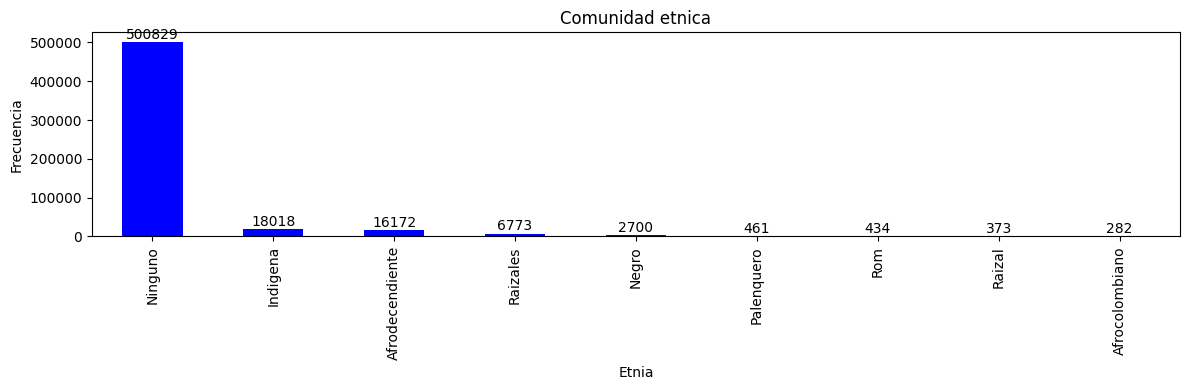

In [89]:
# Obtener valores únicos y su frecuencia en la columna 'Comunidad Etnica'
comunidad_etnica_counts = df_Ciudadania_digital['COMUNIDAD ETNICA'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(12, 4))
ax = comunidad_etnica_counts.plot(kind='bar', color='blue')

# Añadir la cantidad en cada barra
for i, v in enumerate(comunidad_etnica_counts):
    ax.text(i, v + 1000, str(v), ha='center', va='bottom', fontsize=10)

# Títulos y etiquetas
plt.title('Comunidad etnica')
plt.xlabel('Etnia')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

> Validacion del campo F TICS, para ver si esta informaciòn nos permite realizar un analisis

In [92]:
df_Ciudadania_digital['F TICS'].value_counts()

F TICS
0    1039479
1      18870
Name: count, dtype: int64

> Este campo no cuenta con una explicacion clara, por lo que no es clara la informacion que contiene, por lo que se procede a realizar la eliminacion del campo para optimizar la maquina

In [93]:
# Eliminar una columna por su CODIGO DEPARTAMENTO NACIMIENTO
df_Ciudadania_digital = df_Ciudadania_digital.drop(columns=['F TICS'])
print("\nDataFrame después de eliminar la columna 'F TICS':")


DataFrame después de eliminar la columna 'F TICS':


> Se realiza validacion de los datos del campo de DINAMIZADOR

In [99]:
df_Ciudadania_digital['DINAMIZADOR'].unique().tolist()

[nan,
 'ANGELA VANESSA  GONZALEZ',
 'ANWAR JOSE AGUDELO IBARRA',
 'ARIEL  JOSUE   DAZA CHARRIS',
 'DIEGO FERNANDO CHAPARRO AYALA',
 'OSCAR JAVIER  GARZON',
 'KATHERINE PATRICIA MONTERO ALB',
 '-',
 'VANESSA MAYA CERON',
 'MARIA  FULVIA RIOS  LONDOÑO',
 'JAVIER FELIPE DIAZ SALGUERO',
 'ELMER JAVIER AMADOR CORONADO',
 'MARGARITA JULIANA PINZON MARIÑ',
 'ANYI VIVIANA CADENA BURGOS',
 'EDGAR ALBERTO ORJUELA GARZON',
 'JESUS FRANCISCO MENDOZA PASTRA',
 'JAVIN EDGARDO MANZANO DUQUE',
 'JUAN JOSE FAJARDO FAJARDO',
 '0',
 'ALVARO TEJADA RUBIO',
 'CLAUDIA MARCELA PEÑARANDA CARD',
 'ROBERTO CARLOS CALLE SALCEDO',
 'ADRIANA  FERNANDA GONZALEZ  GU',
 'NURY ARGENIS TOLEDO',
 'JENNIFER AUDREY DAVID VELEZ',
 'CRISTIAN CAMILO QUIROGA VELAND',
 'LAURA MARIA HOLGUIN HERRERA',
 'GLENIA  YANETH PACHECO  LAGUAD',
 'VIVIANA  FERNANDEZ ORTEGON',
 'BREINER MANUEL CERVANTES MORAL',
 'ANDREA  PATRICIA SALGADO  MUÑO',
 'DANIEL FELIPE JIMENEZ ROLDAN',
 'MARIA ANTONIA VILLAMIZAR RIVER',
 'CAROLINA HENAO MURILLO',


> Para este caso se va a realizar la transformacion de los tres registros que no corresponden

In [100]:
# reemplazar valores
df_Ciudadania_digital['DINAMIZADOR'] = df_Ciudadania_digital['DINAMIZADOR'].replace('nan','No registra')
df_Ciudadania_digital['DINAMIZADOR'] = df_Ciudadania_digital['DINAMIZADOR'].replace('-','No registra')
df_Ciudadania_digital['DINAMIZADOR'] = df_Ciudadania_digital['DINAMIZADOR'].replace('0','No registra')
df_Ciudadania_digital['DINAMIZADOR'].unique().tolist()

[nan,
 'ANGELA VANESSA  GONZALEZ',
 'ANWAR JOSE AGUDELO IBARRA',
 'ARIEL  JOSUE   DAZA CHARRIS',
 'DIEGO FERNANDO CHAPARRO AYALA',
 'OSCAR JAVIER  GARZON',
 'KATHERINE PATRICIA MONTERO ALB',
 'No registra',
 'VANESSA MAYA CERON',
 'MARIA  FULVIA RIOS  LONDOÑO',
 'JAVIER FELIPE DIAZ SALGUERO',
 'ELMER JAVIER AMADOR CORONADO',
 'MARGARITA JULIANA PINZON MARIÑ',
 'ANYI VIVIANA CADENA BURGOS',
 'EDGAR ALBERTO ORJUELA GARZON',
 'JESUS FRANCISCO MENDOZA PASTRA',
 'JAVIN EDGARDO MANZANO DUQUE',
 'JUAN JOSE FAJARDO FAJARDO',
 'ALVARO TEJADA RUBIO',
 'CLAUDIA MARCELA PEÑARANDA CARD',
 'ROBERTO CARLOS CALLE SALCEDO',
 'ADRIANA  FERNANDA GONZALEZ  GU',
 'NURY ARGENIS TOLEDO',
 'JENNIFER AUDREY DAVID VELEZ',
 'CRISTIAN CAMILO QUIROGA VELAND',
 'LAURA MARIA HOLGUIN HERRERA',
 'GLENIA  YANETH PACHECO  LAGUAD',
 'VIVIANA  FERNANDEZ ORTEGON',
 'BREINER MANUEL CERVANTES MORAL',
 'ANDREA  PATRICIA SALGADO  MUÑO',
 'DANIEL FELIPE JIMENEZ ROLDAN',
 'MARIA ANTONIA VILLAMIZAR RIVER',
 'CAROLINA HENAO MURILL

# Se realiza la validacion de datos que estan validados como 1 o 0, con el fin de ver la estadistica que se pueda analizar de condiciones particulares de la poblacion que ingresa a estas capacitaciones

> Validacion del registro de personas que estan en pobreza, revisando si es un valor signigicativo

In [101]:
df_Ciudadania_digital['POBREZA'].value_counts()

POBREZA
0    1049032
1       9317
Name: count, dtype: int64

> Se valida el campo de Cabeza de hogar

In [102]:
df_Ciudadania_digital['CABEZA DE HOGAR'].value_counts()

CABEZA DE HOGAR
0    975137
1     83212
Name: count, dtype: int64

> Se revisa el campo de Victima de la violencia

In [103]:
df_Ciudadania_digital['VICTIMA DE VIOLENCIA'].value_counts()

VICTIMA DE VIOLENCIA
0    1052450
1       5899
Name: count, dtype: int64

> Se revisa el campo de Victima por factores del invierno

In [104]:
df_Ciudadania_digital['VICTIMA INVIERNO'].value_counts()

VICTIMA INVIERNO
0    1057485
1        864
Name: count, dtype: int64

> Se revisa el campo de LGBTI

In [105]:
df_Ciudadania_digital['LGBTI'].value_counts()

LGBTI
0    1056546
1       1803
Name: count, dtype: int64

> Se revisa la informacion de personas que vivan cerca a las fronteras

In [106]:
df_Ciudadania_digital['VIVIENDA FRONTERIZA'].value_counts()

VIVIENDA FRONTERIZA
0    1055945
1       2404
Name: count, dtype: int64

> Personas en situacion de calle

In [107]:
df_Ciudadania_digital['SITUACION DE CALLE'].value_counts()

SITUACION DE CALLE
0    1058076
1        273
Name: count, dtype: int64

> Se revisa las personas en condicion de desplazamiento

In [108]:
df_Ciudadania_digital['DESPLAZADO'].value_counts()

DESPLAZADO
0    1051688
1       6661
Name: count, dtype: int64

> Personas desmovilizadas

In [109]:
df_Ciudadania_digital['DESMOVILIZADO REINSERTADO'].value_counts()

DESMOVILIZADO REINSERTADO
0    1058081
1        268
Name: count, dtype: int64

> Se revisa las ceriticaciones de las personas que ingresan al programa

In [110]:
df_Ciudadania_digital['CERTIFICACIONES'].value_counts()

CERTIFICACIONES
False    1058349
Name: count, dtype: int64

* Este campo no es significativo, ya que al revisar la informacion que tiene, indica que no nos brinda una informaciòn para ser analizada, y por lo cual se procede a su eliminacion

In [111]:
# Eliminar una columna por su CODIGO DEPARTAMENTO NACIMIENTO
df_Ciudadania_digital = df_Ciudadania_digital.drop(columns=['CERTIFICACIONES'])
print("\nDataFrame después de eliminar la columna 'CERTIFICACIONES':")


DataFrame después de eliminar la columna 'CERTIFICACIONES':


> Se revisa el campo de TIPO

In [113]:
df_Ciudadania_digital['TIPO'].unique().tolist()

[nan, 'VIRTUAL', 'PRESENCIAL', '-']

* Para este caso se cuenta cuantos campos hay por cada registro

In [114]:
df_Ciudadania_digital['TIPO'].value_counts()

TIPO
VIRTUAL       29483
-             22409
PRESENCIAL    10629
Name: count, dtype: int64

* Por ahora no se elimina el registro, pero se observa que el tipo, la mayoria de datos es nulo

> Se revisa el campo de cursos presencial

In [115]:
df_Ciudadania_digital['PRESENCIAL'].value_counts()

PRESENCIAL
0    955751
1    102598
Name: count, dtype: int64

> Se revisa el registro de cursos virtuales

In [116]:
df_Ciudadania_digital['VIRTUAL'].value_counts()

VIRTUAL
0     820714
1     178925
3      13961
2      13862
4       7474
5       5195
10      3411
6       3220
8       1680
7       1666
12       900
9        851
11       673
25       604
13       575
22       503
14       429
15       382
27       351
26       336
20       333
17       326
24       321
19       305
16       286
18       278
21       274
23       251
33       127
28        32
32        29
30        27
31        23
29        23
34         2
Name: count, dtype: int64

* Por los numeros que aparecen en este registro, se puede presumir que son la cantidad de cursos que fueron tomados por las diferentes personas, no se elimina mientras se termina de realizar el cruce de la información.

> Se realiza la validacion del campo Id Indicador

In [117]:
df_Ciudadania_digital['ID INDICADOR'].value_counts()

ID INDICADOR
3987    732834
4783    262994
6632     40112
5857     22409
Name: count, dtype: int64

* Se realiza la revision del campo, a la ausencia de diccionario de datos, no se elimina, ya que se requiere investigar que significan estos codigos

>Se valida el campo Fecha Corte

In [118]:
df_Ciudadania_digital['FechaCorte'].value_counts()

FechaCorte
2013-12-31    365941
2017-12-31    262994
2014-12-31    182355
2012-12-31    151516
2019-12-31     40112
2011-12-31     31294
2018-12-31     22409
2016-12-31      1728
Name: count, dtype: int64

> Se valida la fecha de vigencia

In [119]:
df_Ciudadania_digital['FECHA VIGENCIA'].value_counts()

FECHA VIGENCIA
2013-12-31    365941
2017-12-31    262994
2014-12-31    182355
2012-12-31    151516
2019-12-31     40112
2011-12-31     31294
2018-12-31     22409
2016-12-31      1728
Name: count, dtype: int64

* Se encuentra que la fecha de corte y la fecha de vigencia es la mima, para el presente analisis vamos a trabajar con la fecha de vigencia, por lo que se procede con la eliminaciòn del campo FechaCorte

In [120]:
# Eliminar una columna por su CODIGO DEPARTAMENTO NACIMIENTO
df_Ciudadania_digital = df_Ciudadania_digital.drop(columns=['FechaCorte'])
print("\nDataFrame después de eliminar la columna 'FechaCorte':")


DataFrame después de eliminar la columna 'FechaCorte':
